In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

# Non-parametric models

In [4]:
# df_non_parametric = pd.read_csv('/content/drive/My Drive/Datasets/non_parametric.csv')

df_non_parametric = pd.read_csv('non_parametric.csv')

df_non_parametric.head()

Unnamed: 0  Gender  Age  Educ_level  SES_level  MMSE_Group  eTIV   nWBV  \
0           0       1   74         1.0        2.0           1  1344  0.743   
1           1       1   55         3.0        0.0           1  1147  0.810   
2           2       1   73         3.0        2.0           1  1454  0.708   
3           3       0   74         4.0        1.0           1  1636  0.689   
4           4       1   52         2.0        1.0           1  1321  0.827   

     ASF  Group  
0  1.306      0  
1  1.531      0  
2  1.207      1  
3  1.073      0  
4  1.329      0

In [5]:
df_non_parametric.drop('Unnamed: 0', axis=1, inplace=True)
df_non_parametric.head()

Gender  Age  Educ_level  SES_level  MMSE_Group  eTIV   nWBV    ASF  Group
0       1   74         1.0        2.0           1  1344  0.743  1.306      0
1       1   55         3.0        0.0           1  1147  0.810  1.531      0
2       1   73         3.0        2.0           1  1454  0.708  1.207      1
3       0   74         4.0        1.0           1  1636  0.689  1.073      0
4       1   52         2.0        1.0           1  1321  0.827  1.329      0

In [6]:
df_non_parametric.shape

(608, 9)

In [7]:
X = df_non_parametric.drop('Group', axis=1)
y = df_non_parametric['Group']

In [9]:
X.head()

Gender  Age  Educ_level  SES_level  MMSE_Group  eTIV   nWBV    ASF
0       1   74         1.0        2.0           1  1344  0.743  1.306
1       1   55         3.0        0.0           1  1147  0.810  1.531
2       1   73         3.0        2.0           1  1454  0.708  1.207
3       0   74         4.0        1.0           1  1636  0.689  1.073
4       1   52         2.0        1.0           1  1321  0.827  1.329

In [10]:
y

0      0
1      0
2      1
3      0
4      0
      ..
603    1
604    1
605    0
606    0
607    0
Name: Group, Length: 608, dtype: int64

In [8]:
#split the data into train and test split
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [53]:
X_np_train.shape, X_np_test.shape

((425, 8), (183, 8))

## Decision Tree Classifier Algorithm

Accuracy Score:  0.7486338797814208
ROC AUC Score:  0.7499401913875599


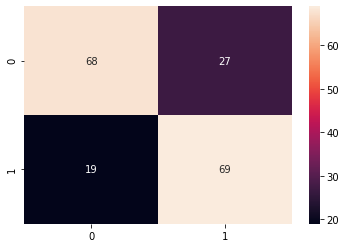

In [55]:
DT = DecisionTreeClassifier(random_state=10)
DT.fit(X_np_train, y_np_train)
y_DT_pred = DT.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_DT_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, DT.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_DT_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [56]:
#initiate number of splits/folds
kf = KFold(n_splits=3, shuffle=True, random_state=10)

## Decision Tree - Hyperparameter Tuning

In [57]:
params = {
    'max_depth': range(1, 21),  
    'criterion': ['entropy', 'gini'],
         }

gs_DT = GridSearchCV(DT, param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_DT.fit(X_np_train, y_np_train)

DT_tuned = gs_DT.best_estimator_
print("Decision Tree TUNED MODEL: ", DT_tuned)
scores = cross_val_score(DT_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Decision Tree TUNED SCORES: ", scores)
print("Decision Tree Tuned Bias Error: ", 1 - np.mean(scores))
print("Decision Tree Tuned Variance Error: ", np.std(scores, ddof = 1))

Decision Tree TUNED MODEL:  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)
Decision Tree TUNED SCORES:  [0.85606061 0.76603926 0.82853084]
Decision Tree Tuned Bias Error:  0.18312309549217565
Decision Tree Tuned Variance Error:  0.04612831310355157


In [58]:
#predict on test data
y_pred_test_DT = DT_tuned.predict(X_np_test)

In [59]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_test_DT))
print(classification_report(y_np_test, y_pred_test_DT))
print(roc_auc_score(y_np_test, DT_tuned.predict_proba(X_np_test)[:,1]))

[[79 16]
 [40 48]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.74        95
           1       0.75      0.55      0.63        88

    accuracy                           0.69       183
   macro avg       0.71      0.69      0.68       183
weighted avg       0.71      0.69      0.69       183

0.7690191387559808


The decision tree is overfitting on the train data but results are better than the previous models.

## Random Forest Classifier Algorithm

Accuracy Score:  0.8360655737704918
ROC AUC Score:  0.927811004784689


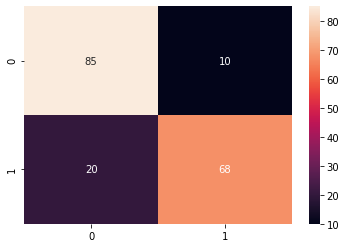

In [60]:
RF = RandomForestClassifier(random_state=10)

RF.fit(X_np_train, y_np_train)
y_RF_pred = RF.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_RF_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, RF.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_RF_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## Random Forest - Hyperparameter Tuning

In [61]:
params = {
    'max_depth': range(1, 11), 
    'n_estimators': range(1, 101), 
    'criterion': ['entropy', 'gini']
         }

gs_RF = GridSearchCV(RF, param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = -1)
gs_RF.fit(X_np_train, y_np_train)

RF_tuned = gs_RF.best_estimator_
print("Random Forest TUNED MODEL: ", RF_tuned)
scores = cross_val_score(RF_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = -1)

print("Random Forest TUNED SCORES: ", scores)
print("Random Forest Tuned Bias Error: ", 1 - np.mean(scores))
print("Random Forest Tuned Variance Error: ", np.std(scores, ddof = 1))

Random Forest TUNED MODEL:  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=61,
                       random_state=10)
Random Forest TUNED SCORES:  [0.92550505 0.85903663 0.91883117]
Random Forest Tuned Bias Error:  0.0988757161343683
Random Forest Tuned Variance Error:  0.03660140690416626


In [62]:
#predict on the test set
y_pred_test_rf = RF_tuned.predict(X_np_test)

In [63]:
#calculate the metrics on test data
print(roc_auc_score(y_np_test, RF_tuned.predict_proba(X_np_test)[:,1]))
print(confusion_matrix(y_np_test, y_pred_test_rf))
print(classification_report(y_np_test, y_pred_test_rf))

0.9074162679425838
[[83 12]
 [21 67]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        95
           1       0.85      0.76      0.80        88

    accuracy                           0.82       183
   macro avg       0.82      0.82      0.82       183
weighted avg       0.82      0.82      0.82       183



We are getting roc auc score of 0.9074 on the test set.

## Adaboost Classifier Algorithm

Accuracy Score:  0.7103825136612022
ROC AUC Score:  0.8071172248803828


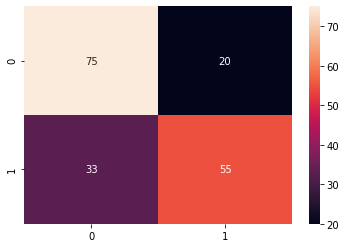

In [64]:
AB = AdaBoostClassifier(random_state=10)

AB.fit(X_np_train, y_np_train)
y_AB_pred = AB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_AB_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, AB.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_AB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## AdaBoost - Hyperparameter Tuning

In [65]:
params = {
    'base_estimator': [DT, RF],
    'n_estimators': range(1, 120),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_AB = GridSearchCV(AB, param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = -1)
gs_AB.fit(X_np_train, y_np_train)

AB_tuned = gs_AB.best_estimator_
print("Adaboost TUNED MODEL: ", AB_tuned)
scores = cross_val_score(AB_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = -1)

print("Ada Boost Classifier TUNED SCORES: ", scores)
print("Ada Boost Classifier  Tuned Bias Error: ", 1 - np.mean(scores))
print("Ada Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Adaboost TUNED MODEL:  AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=10),
                   learning_rate=0.1, n_estimators=1, random_state=10)
Ada Boost Classifier TUNED SCORES:  [0.91593013 0.85013155 0.90726461]
Ada Boost Classifier  Tuned Bias Error:  0.10889123420430336
Ada Boost Classifier Tuned Variance Error:  0.03575083000638214


In [66]:
#predict on the test data
y_pred_ab_test = AB_tuned.predict(X_np_test)

In [68]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_ab_test))
print(classification_report(y_np_test, y_pred_ab_test))
print(roc_auc_score(y_np_test, AB_tuned.predict_proba(X_np_test)[:,1]))

[[83 12]
 [22 66]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        95
           1       0.85      0.75      0.80        88

    accuracy                           0.81       183
   macro avg       0.82      0.81      0.81       183
weighted avg       0.82      0.81      0.81       183

0.9213516746411483


In [ ]:
#Best model so far

## Gradient Boosting Algorithm

Accuracy Score:  0.7814207650273224
ROC AUC Score:  0.8729665071770335


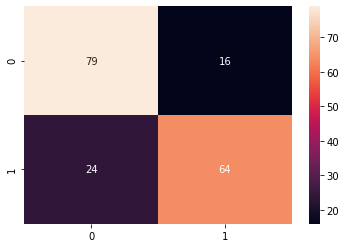

In [70]:
GB = GradientBoostingClassifier(random_state=10)

GB.fit(X_np_train, y_np_train)
y_GB_pred = GB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_GB_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, GB.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_GB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## Gradient Boosting - Hyperparameter Tuning

In [71]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_GB = GridSearchCV(GradientBoostingClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', 
                     n_jobs = 1)
gs_GB.fit(X_np_train, y_np_train)

GB_tuned = gs_GB.best_estimator_
print("Gradient Boosting TUNED MODEL: ", GB_tuned)
scores = cross_val_score(GB_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Gradient Boosting Classifier TUNED SCORES: ", scores)
print("Gradient Boosting Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("Gradient Boosting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Gradient Boosting TUNED MODEL:  GradientBoostingClassifier(learning_rate=0.15, n_estimators=95, random_state=10)
Gradient Boosting Classifier TUNED SCORES:  [0.91245791 0.83647035 0.89366883]
Gradient Boosting Classifier Tuned Bias Error:  0.11913430208056808
Gradient Boosting Classifier Tuned Variance Error:  0.039578625201325726


In [72]:
#predict on test data
y_pred_test_gbm = GB_tuned.predict(X_np_test)

In [73]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_test_gbm))
print(classification_report(y_np_test, y_pred_test_gbm))
print(roc_auc_score(y_np_test, GB_tuned.predict_proba(X_np_test)[:,1]))

[[79 16]
 [23 65]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.80      0.74      0.77        88

    accuracy                           0.79       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.79      0.79      0.79       183

0.8715311004784689


## XG Boost Algorithm

[12:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.7978142076502732
ROC AUC Score:  0.8760765550239233


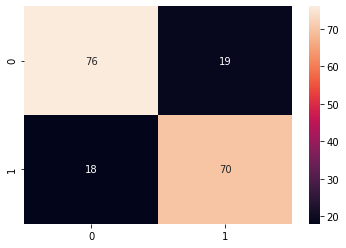

In [74]:
XGB = XGBClassifier(random_state=10)

XGB.fit(X_np_train, y_np_train)
y_XGB_pred = XGB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_XGB_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, XGB.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_XGB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## XG Boost - Hyperparameter Tuning

In [75]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_XGB = GridSearchCV(XGBClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = -1)
gs_XGB.fit(X_np_train, y_np_train)

XGB_tuned = gs_XGB.best_estimator_
print("XG Boost TUNED MODEL: ", XGB_tuned)
scores = cross_val_score(XGB_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("XG Boost Classifier TUNED SCORES: ", scores)
print("XG Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("XG Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

[12:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost TUNED MODEL:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=96, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[12:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.

In [82]:
#predict on test data
y_pred_test_xgb = XGB_tuned.predict(X_np_test)

In [83]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_test_xgb))
print(classification_report(y_np_test, y_pred_test_xgb))
print(roc_auc_score(y_np_test, XGB_tuned.predict_proba(X_np_test)[:,1]))

[[79 16]
 [20 68]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        95
           1       0.81      0.77      0.79        88

    accuracy                           0.80       183
   macro avg       0.80      0.80      0.80       183
weighted avg       0.80      0.80      0.80       183

0.8918660287081339


## Light GBM Algorithm

Accuracy Score:  0.8032786885245902
ROC AUC Score:  0.8789473684210527


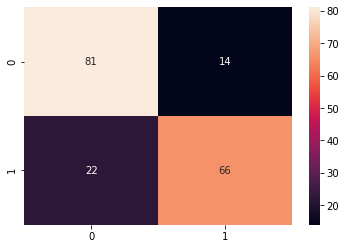

In [78]:
LGBM = LGBMClassifier(random_state=10)
LGBM.fit(X_np_train, y_np_train)
y_LGBM_pred = LGBM.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_LGBM_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, LGBM.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_LGBM_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## Light GBM - Hyperparameter Tuning

In [80]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_LGBM = GridSearchCV(LGBMClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_LGBM.fit(X_np_train, y_np_train)

LGBM_tuned = gs_LGBM.best_estimator_
print("LGBM TUNED MODEL: ", LGBM_tuned)
scores = cross_val_score(LGBM_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("LGBM Classifier TUNED SCORES: ", scores)
print("LGBM Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("LGBM Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

LGBM TUNED MODEL:  LGBMClassifier(n_estimators=99, random_state=10)
LGBM Classifier TUNED SCORES:  [0.90740741 0.84051811 0.88900162]
LGBM Boost Classifier Tuned Bias Error:  0.12102428515793717
LGBM Boost Classifier Tuned Variance Error:  0.034553343300128714


In [84]:
#predict on test data
y_pred_test_lgbm = LGBM_tuned.predict(X_np_test)

In [85]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_test_lgbm))
print(classification_report(y_np_test, y_pred_test_lgbm))
print(roc_auc_score(y_np_test, LGBM_tuned.predict_proba(X_np_test)[:,1]))

[[81 14]
 [22 66]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.82      0.75      0.79        88

    accuracy                           0.80       183
   macro avg       0.81      0.80      0.80       183
weighted avg       0.80      0.80      0.80       183

0.8785885167464114


## Catboost Algorithm

Learning rate set to 0.007149
0:	learn: 0.6883521	total: 3.6ms	remaining: 3.6s
1:	learn: 0.6838484	total: 5.47ms	remaining: 2.73s
2:	learn: 0.6800140	total: 7.03ms	remaining: 2.34s
3:	learn: 0.6752730	total: 8.41ms	remaining: 2.09s
4:	learn: 0.6706812	total: 9.97ms	remaining: 1.98s
5:	learn: 0.6662582	total: 10.8ms	remaining: 1.79s
6:	learn: 0.6624207	total: 12.2ms	remaining: 1.72s
7:	learn: 0.6588533	total: 13.2ms	remaining: 1.64s
8:	learn: 0.6547109	total: 14.6ms	remaining: 1.61s
9:	learn: 0.6506996	total: 16.1ms	remaining: 1.59s
10:	learn: 0.6466837	total: 17.5ms	remaining: 1.57s
11:	learn: 0.6426491	total: 19.1ms	remaining: 1.57s
12:	learn: 0.6383888	total: 20.6ms	remaining: 1.56s
13:	learn: 0.6343476	total: 22ms	remaining: 1.55s
14:	learn: 0.6313700	total: 22.7ms	remaining: 1.49s
15:	learn: 0.6282368	total: 24.1ms	remaining: 1.48s
16:	learn: 0.6245335	total: 25.6ms	remaining: 1.48s
17:	learn: 0.6216317	total: 26.8ms	remaining: 1.46s
18:	learn: 0.6177915	total: 28.2ms	remaining: 1.

271:	learn: 0.3364629	total: 346ms	remaining: 927ms
272:	learn: 0.3360492	total: 348ms	remaining: 926ms
273:	learn: 0.3357642	total: 349ms	remaining: 926ms
274:	learn: 0.3353386	total: 351ms	remaining: 924ms
275:	learn: 0.3349725	total: 352ms	remaining: 923ms
276:	learn: 0.3343623	total: 353ms	remaining: 921ms
277:	learn: 0.3337202	total: 354ms	remaining: 920ms
278:	learn: 0.3333530	total: 355ms	remaining: 918ms
279:	learn: 0.3330491	total: 357ms	remaining: 917ms
280:	learn: 0.3325416	total: 358ms	remaining: 916ms
281:	learn: 0.3320214	total: 359ms	remaining: 915ms
282:	learn: 0.3313758	total: 361ms	remaining: 913ms
283:	learn: 0.3310899	total: 362ms	remaining: 912ms
284:	learn: 0.3306290	total: 363ms	remaining: 911ms
285:	learn: 0.3302758	total: 365ms	remaining: 911ms
286:	learn: 0.3299561	total: 367ms	remaining: 911ms
287:	learn: 0.3295893	total: 368ms	remaining: 909ms
288:	learn: 0.3293426	total: 369ms	remaining: 908ms
289:	learn: 0.3288674	total: 370ms	remaining: 907ms
290:	learn: 

549:	learn: 0.2540051	total: 703ms	remaining: 575ms
550:	learn: 0.2538536	total: 704ms	remaining: 574ms
551:	learn: 0.2536023	total: 706ms	remaining: 573ms
552:	learn: 0.2534252	total: 707ms	remaining: 572ms
553:	learn: 0.2531902	total: 708ms	remaining: 570ms
554:	learn: 0.2530453	total: 710ms	remaining: 569ms
555:	learn: 0.2526712	total: 711ms	remaining: 568ms
556:	learn: 0.2526021	total: 712ms	remaining: 566ms
557:	learn: 0.2523552	total: 713ms	remaining: 565ms
558:	learn: 0.2520590	total: 714ms	remaining: 564ms
559:	learn: 0.2517886	total: 716ms	remaining: 562ms
560:	learn: 0.2515156	total: 717ms	remaining: 561ms
561:	learn: 0.2511184	total: 718ms	remaining: 560ms
562:	learn: 0.2507158	total: 720ms	remaining: 559ms
563:	learn: 0.2504444	total: 721ms	remaining: 558ms
564:	learn: 0.2503436	total: 723ms	remaining: 557ms
565:	learn: 0.2500287	total: 724ms	remaining: 555ms
566:	learn: 0.2496927	total: 725ms	remaining: 554ms
567:	learn: 0.2493408	total: 727ms	remaining: 553ms
568:	learn: 

822:	learn: 0.1991721	total: 1.06s	remaining: 228ms
823:	learn: 0.1990073	total: 1.06s	remaining: 227ms
824:	learn: 0.1987203	total: 1.06s	remaining: 226ms
825:	learn: 0.1984170	total: 1.06s	remaining: 224ms
826:	learn: 0.1983336	total: 1.07s	remaining: 223ms
827:	learn: 0.1981303	total: 1.07s	remaining: 222ms
828:	learn: 0.1979172	total: 1.07s	remaining: 220ms
829:	learn: 0.1977245	total: 1.07s	remaining: 219ms
830:	learn: 0.1976526	total: 1.07s	remaining: 218ms
831:	learn: 0.1974511	total: 1.07s	remaining: 217ms
832:	learn: 0.1973322	total: 1.07s	remaining: 215ms
833:	learn: 0.1971379	total: 1.07s	remaining: 214ms
834:	learn: 0.1968156	total: 1.08s	remaining: 213ms
835:	learn: 0.1967081	total: 1.08s	remaining: 212ms
836:	learn: 0.1965738	total: 1.08s	remaining: 210ms
837:	learn: 0.1963615	total: 1.08s	remaining: 209ms
838:	learn: 0.1960537	total: 1.08s	remaining: 208ms
839:	learn: 0.1959238	total: 1.08s	remaining: 206ms
840:	learn: 0.1958423	total: 1.08s	remaining: 205ms
841:	learn: 

Accuracy Score:  0.8415300546448088
ROC AUC Score:  0.9059808612440191


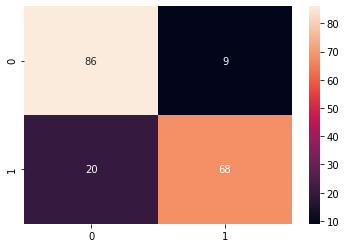

In [86]:
CB = CatBoostClassifier(random_state=10)
CB.fit(X_np_train, y_np_train)
y_CB_pred = CB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_CB_pred))
print("ROC AUC Score: ", roc_auc_score(y_np_test, CB.predict_proba(X_np_test)[:,1]))

cm = confusion_matrix(y_np_test, y_CB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

## Catboost - Hyperparameter Tuning

In [87]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_CB = GridSearchCV(CatBoostClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_CB.fit(X_np_train, y_np_train)

CB_tuned = gs_CB.best_estimator_
print("Catboost TUNED MODEL: ", CB_tuned)
scores = cross_val_score(CB_tuned, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Catboost Classifier TUNED SCORES: ", scores)
print("Catboost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Catboost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

0:	learn: 0.6749096	total: 3.08ms	remaining: 0us
0:	learn: 0.6645203	total: 1.06ms	remaining: 0us
0:	learn: 0.6697027	total: 1.06ms	remaining: 0us
0:	learn: 0.6749096	total: 15.5ms	remaining: 15.5ms
1:	learn: 0.6580833	total: 16.8ms	remaining: 0us
0:	learn: 0.6645203	total: 12.3ms	remaining: 12.3ms
1:	learn: 0.6326748	total: 13.2ms	remaining: 0us
0:	learn: 0.6697027	total: 4.51ms	remaining: 4.51ms
1:	learn: 0.6468736	total: 5.73ms	remaining: 0us
0:	learn: 0.6749096	total: 16.7ms	remaining: 33.4ms
1:	learn: 0.6580833	total: 18.1ms	remaining: 9.06ms
2:	learn: 0.6412077	total: 19.2ms	remaining: 0us
0:	learn: 0.6645203	total: 12.6ms	remaining: 25.2ms
1:	learn: 0.6326748	total: 13.4ms	remaining: 6.68ms
2:	learn: 0.6091864	total: 14.2ms	remaining: 0us
0:	learn: 0.6697027	total: 3.09ms	remaining: 6.18ms
1:	learn: 0.6468736	total: 4.46ms	remaining: 2.23ms
2:	learn: 0.6297218	total: 5.71ms	remaining: 0us
0:	learn: 0.6749096	total: 1.13ms	remaining: 3.4ms
1:	learn: 0.6580833	total: 2.33ms	remain

0:	learn: 0.6749096	total: 33.3ms	remaining: 333ms
1:	learn: 0.6580833	total: 34.6ms	remaining: 156ms
2:	learn: 0.6412077	total: 35.7ms	remaining: 95.2ms
3:	learn: 0.6292292	total: 37ms	remaining: 64.7ms
4:	learn: 0.6168657	total: 38.1ms	remaining: 45.7ms
5:	learn: 0.6038698	total: 39.3ms	remaining: 32.7ms
6:	learn: 0.5914180	total: 39.8ms	remaining: 22.7ms
7:	learn: 0.5783924	total: 40.9ms	remaining: 15.3ms
8:	learn: 0.5685820	total: 41.9ms	remaining: 9.31ms
9:	learn: 0.5572886	total: 42.9ms	remaining: 4.29ms
10:	learn: 0.5480389	total: 43.9ms	remaining: 0us
0:	learn: 0.6645203	total: 1.16ms	remaining: 11.6ms
1:	learn: 0.6326748	total: 1.94ms	remaining: 8.72ms
2:	learn: 0.6091864	total: 2.75ms	remaining: 7.33ms
3:	learn: 0.5935310	total: 3.87ms	remaining: 6.77ms
4:	learn: 0.5795219	total: 4.93ms	remaining: 5.92ms
5:	learn: 0.5640193	total: 6.05ms	remaining: 5.04ms
6:	learn: 0.5490934	total: 7.08ms	remaining: 4.04ms
7:	learn: 0.5351518	total: 7.89ms	remaining: 2.96ms
8:	learn: 0.524135

0:	learn: 0.6697027	total: 1.16ms	remaining: 16.3ms
1:	learn: 0.6468736	total: 2.34ms	remaining: 15.2ms
2:	learn: 0.6297218	total: 3.4ms	remaining: 13.6ms
3:	learn: 0.6149671	total: 4.52ms	remaining: 12.4ms
4:	learn: 0.5996871	total: 5.52ms	remaining: 11ms
5:	learn: 0.5847381	total: 6.46ms	remaining: 9.7ms
6:	learn: 0.5696958	total: 6.85ms	remaining: 7.83ms
7:	learn: 0.5586616	total: 7.87ms	remaining: 6.88ms
8:	learn: 0.5484299	total: 8.89ms	remaining: 5.93ms
9:	learn: 0.5382455	total: 9.96ms	remaining: 4.98ms
10:	learn: 0.5269420	total: 11ms	remaining: 4ms
11:	learn: 0.5187181	total: 11.9ms	remaining: 2.98ms
12:	learn: 0.5103921	total: 13ms	remaining: 2ms
13:	learn: 0.5025347	total: 14.1ms	remaining: 1.01ms
14:	learn: 0.4944262	total: 14.7ms	remaining: 0us
0:	learn: 0.6749096	total: 5.91ms	remaining: 88.6ms
1:	learn: 0.6580833	total: 7ms	remaining: 49ms
2:	learn: 0.6412077	total: 8.02ms	remaining: 34.8ms
3:	learn: 0.6292292	total: 9.18ms	remaining: 27.6ms
4:	learn: 0.6168657	total: 10

0:	learn: 0.6645203	total: 6.64ms	remaining: 119ms
1:	learn: 0.6326748	total: 7.49ms	remaining: 63.6ms
2:	learn: 0.6091864	total: 8.31ms	remaining: 44.3ms
3:	learn: 0.5935310	total: 9.48ms	remaining: 35.6ms
4:	learn: 0.5795219	total: 10.7ms	remaining: 29.8ms
5:	learn: 0.5640193	total: 11.7ms	remaining: 25.3ms
6:	learn: 0.5490934	total: 12.8ms	remaining: 21.9ms
7:	learn: 0.5351518	total: 13.6ms	remaining: 18.7ms
8:	learn: 0.5241356	total: 14.6ms	remaining: 16.2ms
9:	learn: 0.5139281	total: 15.6ms	remaining: 14ms
10:	learn: 0.5049397	total: 16.5ms	remaining: 12ms
11:	learn: 0.4940425	total: 17.4ms	remaining: 10.2ms
12:	learn: 0.4842369	total: 18ms	remaining: 8.33ms
13:	learn: 0.4761417	total: 18.5ms	remaining: 6.6ms
14:	learn: 0.4684320	total: 18.8ms	remaining: 5ms
15:	learn: 0.4615934	total: 19.6ms	remaining: 3.68ms
16:	learn: 0.4554204	total: 20.6ms	remaining: 2.42ms
17:	learn: 0.4500366	total: 21.2ms	remaining: 1.18ms
18:	learn: 0.4454864	total: 22ms	remaining: 0us
0:	learn: 0.6697027

0:	learn: 0.6749096	total: 3.23ms	remaining: 67.9ms
1:	learn: 0.6580833	total: 4.62ms	remaining: 46.2ms
2:	learn: 0.6412077	total: 5.75ms	remaining: 36.4ms
3:	learn: 0.6292292	total: 6.79ms	remaining: 30.6ms
4:	learn: 0.6168657	total: 7.82ms	remaining: 26.6ms
5:	learn: 0.6038698	total: 8.94ms	remaining: 23.8ms
6:	learn: 0.5914180	total: 9.42ms	remaining: 20.2ms
7:	learn: 0.5783924	total: 10.4ms	remaining: 18.2ms
8:	learn: 0.5685820	total: 11.4ms	remaining: 16.5ms
9:	learn: 0.5572886	total: 12.4ms	remaining: 14.9ms
10:	learn: 0.5480389	total: 13.4ms	remaining: 13.4ms
11:	learn: 0.5391062	total: 14.3ms	remaining: 11.9ms
12:	learn: 0.5308554	total: 15.2ms	remaining: 10.5ms
13:	learn: 0.5241095	total: 16.2ms	remaining: 9.27ms
14:	learn: 0.5165947	total: 16.8ms	remaining: 7.82ms
15:	learn: 0.5087262	total: 17.8ms	remaining: 6.67ms
16:	learn: 0.5016288	total: 18.8ms	remaining: 5.54ms
17:	learn: 0.4949782	total: 19.8ms	remaining: 4.4ms
18:	learn: 0.4887976	total: 20.7ms	remaining: 3.27ms
19:	

0:	learn: 0.6697027	total: 22.6ms	remaining: 520ms
1:	learn: 0.6468736	total: 24ms	remaining: 264ms
2:	learn: 0.6297218	total: 25.2ms	remaining: 177ms
3:	learn: 0.6149671	total: 26.3ms	remaining: 132ms
4:	learn: 0.5996871	total: 27.3ms	remaining: 104ms
5:	learn: 0.5847381	total: 28.5ms	remaining: 85.4ms
6:	learn: 0.5696958	total: 28.9ms	remaining: 70.2ms
7:	learn: 0.5586616	total: 30ms	remaining: 60ms
8:	learn: 0.5484299	total: 31.1ms	remaining: 51.9ms
9:	learn: 0.5382455	total: 32.2ms	remaining: 45.1ms
10:	learn: 0.5269420	total: 33.6ms	remaining: 39.7ms
11:	learn: 0.5187181	total: 34.7ms	remaining: 34.7ms
12:	learn: 0.5103921	total: 35.8ms	remaining: 30.3ms
13:	learn: 0.5025347	total: 36.8ms	remaining: 26.3ms
14:	learn: 0.4944262	total: 37.3ms	remaining: 22.4ms
15:	learn: 0.4875749	total: 37.7ms	remaining: 18.9ms
16:	learn: 0.4801775	total: 38.6ms	remaining: 15.9ms
17:	learn: 0.4740112	total: 39.4ms	remaining: 13.1ms
18:	learn: 0.4679470	total: 40.2ms	remaining: 10.6ms
19:	learn: 0.4

12:	learn: 0.5103921	total: 60.4ms	remaining: 60.4ms
13:	learn: 0.5025347	total: 61.8ms	remaining: 52.9ms
14:	learn: 0.4944262	total: 62.5ms	remaining: 45.9ms
15:	learn: 0.4875749	total: 63.1ms	remaining: 39.4ms
16:	learn: 0.4801775	total: 64.2ms	remaining: 34ms
17:	learn: 0.4740112	total: 65.3ms	remaining: 29ms
18:	learn: 0.4679470	total: 66.4ms	remaining: 24.5ms
19:	learn: 0.4601404	total: 67.4ms	remaining: 20.2ms
20:	learn: 0.4554769	total: 68.4ms	remaining: 16.3ms
21:	learn: 0.4502894	total: 69.4ms	remaining: 12.6ms
22:	learn: 0.4441691	total: 70.4ms	remaining: 9.18ms
23:	learn: 0.4397670	total: 71.4ms	remaining: 5.95ms
24:	learn: 0.4350573	total: 72.4ms	remaining: 2.9ms
25:	learn: 0.4313110	total: 73.5ms	remaining: 0us
0:	learn: 0.6749096	total: 36.8ms	remaining: 957ms
1:	learn: 0.6580833	total: 38.1ms	remaining: 476ms
2:	learn: 0.6412077	total: 39.2ms	remaining: 314ms
3:	learn: 0.6292292	total: 40.3ms	remaining: 232ms
4:	learn: 0.6168657	total: 41.5ms	remaining: 183ms
5:	learn: 0

13:	learn: 0.5241095	total: 42.7ms	remaining: 45.7ms
14:	learn: 0.5165947	total: 43.6ms	remaining: 40.7ms
15:	learn: 0.5087262	total: 45.1ms	remaining: 36.7ms
16:	learn: 0.5016288	total: 46.2ms	remaining: 32.6ms
17:	learn: 0.4949782	total: 47.4ms	remaining: 29ms
18:	learn: 0.4887976	total: 48.4ms	remaining: 25.5ms
19:	learn: 0.4820231	total: 49.5ms	remaining: 22.3ms
20:	learn: 0.4765583	total: 50.6ms	remaining: 19.3ms
21:	learn: 0.4695875	total: 51.7ms	remaining: 16.4ms
22:	learn: 0.4651157	total: 52.7ms	remaining: 13.8ms
23:	learn: 0.4598647	total: 53.7ms	remaining: 11.2ms
24:	learn: 0.4556523	total: 54.9ms	remaining: 8.78ms
25:	learn: 0.4524370	total: 55.5ms	remaining: 6.4ms
26:	learn: 0.4464341	total: 56.6ms	remaining: 4.2ms
27:	learn: 0.4424925	total: 57.9ms	remaining: 2.07ms
28:	learn: 0.4370629	total: 59.1ms	remaining: 0us
0:	learn: 0.6645203	total: 1.07ms	remaining: 30.1ms
1:	learn: 0.6326748	total: 1.67ms	remaining: 22.6ms
2:	learn: 0.6091864	total: 2.42ms	remaining: 21ms
3:	le

30:	learn: 0.4289060	total: 58.7ms	remaining: 0us
0:	learn: 0.6645203	total: 2.63ms	remaining: 78.8ms
1:	learn: 0.6326748	total: 3.3ms	remaining: 47.9ms
2:	learn: 0.6091864	total: 4.1ms	remaining: 38.2ms
3:	learn: 0.5935310	total: 5.14ms	remaining: 34.7ms
4:	learn: 0.5795219	total: 6.1ms	remaining: 31.7ms
5:	learn: 0.5640193	total: 7.14ms	remaining: 29.7ms
6:	learn: 0.5490934	total: 8.25ms	remaining: 28.3ms
7:	learn: 0.5351518	total: 9ms	remaining: 25.9ms
8:	learn: 0.5241356	total: 9.98ms	remaining: 24.4ms
9:	learn: 0.5139281	total: 11ms	remaining: 23ms
10:	learn: 0.5049397	total: 12.1ms	remaining: 22.1ms
11:	learn: 0.4940425	total: 13.2ms	remaining: 20.9ms
12:	learn: 0.4842369	total: 14ms	remaining: 19.4ms
13:	learn: 0.4761417	total: 14.5ms	remaining: 17.6ms
14:	learn: 0.4684320	total: 14.9ms	remaining: 15.9ms
15:	learn: 0.4615934	total: 15.8ms	remaining: 14.8ms
16:	learn: 0.4554204	total: 16.8ms	remaining: 13.8ms
17:	learn: 0.4500366	total: 17.2ms	remaining: 12.4ms
18:	learn: 0.44548

0:	learn: 0.6749096	total: 1.25ms	remaining: 40.1ms
1:	learn: 0.6580833	total: 2.35ms	remaining: 36.5ms
2:	learn: 0.6412077	total: 3.59ms	remaining: 35.9ms
3:	learn: 0.6292292	total: 4.71ms	remaining: 34.2ms
4:	learn: 0.6168657	total: 5.74ms	remaining: 32.1ms
5:	learn: 0.6038698	total: 6.62ms	remaining: 29.8ms
6:	learn: 0.5914180	total: 7.06ms	remaining: 26.2ms
7:	learn: 0.5783924	total: 8.21ms	remaining: 25.6ms
8:	learn: 0.5685820	total: 9.38ms	remaining: 25ms
9:	learn: 0.5572886	total: 10.5ms	remaining: 24.1ms
10:	learn: 0.5480389	total: 11.4ms	remaining: 22.9ms
11:	learn: 0.5391062	total: 12.4ms	remaining: 21.7ms
12:	learn: 0.5308554	total: 13.3ms	remaining: 20.5ms
13:	learn: 0.5241095	total: 14.2ms	remaining: 19.3ms
14:	learn: 0.5165947	total: 14.8ms	remaining: 17.7ms
15:	learn: 0.5087262	total: 15.8ms	remaining: 16.8ms
16:	learn: 0.5016288	total: 16.8ms	remaining: 15.8ms
17:	learn: 0.4949782	total: 17.7ms	remaining: 14.8ms
18:	learn: 0.4887976	total: 18.6ms	remaining: 13.7ms
19:	l

0:	learn: 0.6697027	total: 2.61ms	remaining: 86ms
1:	learn: 0.6468736	total: 3.96ms	remaining: 63.4ms
2:	learn: 0.6297218	total: 5.1ms	remaining: 52.7ms
3:	learn: 0.6149671	total: 6.23ms	remaining: 46.7ms
4:	learn: 0.5996871	total: 7.24ms	remaining: 42ms
5:	learn: 0.5847381	total: 8.14ms	remaining: 38ms
6:	learn: 0.5696958	total: 8.61ms	remaining: 33.2ms
7:	learn: 0.5586616	total: 9.62ms	remaining: 31.2ms
8:	learn: 0.5484299	total: 10.6ms	remaining: 29.5ms
9:	learn: 0.5382455	total: 11.4ms	remaining: 27.4ms
10:	learn: 0.5269420	total: 12.3ms	remaining: 25.7ms
11:	learn: 0.5187181	total: 13.3ms	remaining: 24.3ms
12:	learn: 0.5103921	total: 14.2ms	remaining: 23ms
13:	learn: 0.5025347	total: 15.1ms	remaining: 21.6ms
14:	learn: 0.4944262	total: 15.6ms	remaining: 19.7ms
15:	learn: 0.4875749	total: 15.9ms	remaining: 17.9ms
16:	learn: 0.4801775	total: 16.8ms	remaining: 16.8ms
17:	learn: 0.4740112	total: 17.7ms	remaining: 15.7ms
18:	learn: 0.4679470	total: 18.6ms	remaining: 14.7ms
19:	learn: 0

0:	learn: 0.6697027	total: 3.31ms	remaining: 116ms
1:	learn: 0.6468736	total: 4.48ms	remaining: 76.2ms
2:	learn: 0.6297218	total: 5.54ms	remaining: 60.9ms
3:	learn: 0.6149671	total: 6.63ms	remaining: 53.1ms
4:	learn: 0.5996871	total: 7.61ms	remaining: 47.2ms
5:	learn: 0.5847381	total: 8.62ms	remaining: 43.1ms
6:	learn: 0.5696958	total: 9.1ms	remaining: 37.7ms
7:	learn: 0.5586616	total: 10.2ms	remaining: 35.5ms
8:	learn: 0.5484299	total: 11.1ms	remaining: 33.4ms
9:	learn: 0.5382455	total: 12.1ms	remaining: 31.4ms
10:	learn: 0.5269420	total: 13.1ms	remaining: 29.7ms
11:	learn: 0.5187181	total: 14ms	remaining: 28ms
12:	learn: 0.5103921	total: 14.9ms	remaining: 26.3ms
13:	learn: 0.5025347	total: 15.8ms	remaining: 24.9ms
14:	learn: 0.4944262	total: 16.4ms	remaining: 23ms
15:	learn: 0.4875749	total: 16.8ms	remaining: 21ms
16:	learn: 0.4801775	total: 17.6ms	remaining: 19.7ms
17:	learn: 0.4740112	total: 18.6ms	remaining: 18.6ms
18:	learn: 0.4679470	total: 19.6ms	remaining: 17.6ms
19:	learn: 0.

21:	learn: 0.4277169	total: 48.8ms	remaining: 35.5ms
22:	learn: 0.4237349	total: 50.1ms	remaining: 32.7ms
23:	learn: 0.4158808	total: 51.1ms	remaining: 29.8ms
24:	learn: 0.4084789	total: 52.4ms	remaining: 27.3ms
25:	learn: 0.4042865	total: 53.6ms	remaining: 24.7ms
26:	learn: 0.3991345	total: 54.5ms	remaining: 22.2ms
27:	learn: 0.3958187	total: 55.5ms	remaining: 19.8ms
28:	learn: 0.3919180	total: 56.4ms	remaining: 17.5ms
29:	learn: 0.3864558	total: 57.3ms	remaining: 15.3ms
30:	learn: 0.3818920	total: 58.3ms	remaining: 13.2ms
31:	learn: 0.3772055	total: 59.3ms	remaining: 11.1ms
32:	learn: 0.3746932	total: 59.8ms	remaining: 9.06ms
33:	learn: 0.3711582	total: 60.5ms	remaining: 7.11ms
34:	learn: 0.3664142	total: 61.5ms	remaining: 5.27ms
35:	learn: 0.3632081	total: 62.5ms	remaining: 3.47ms
36:	learn: 0.3601660	total: 63.5ms	remaining: 1.72ms
37:	learn: 0.3573565	total: 64.6ms	remaining: 0us
0:	learn: 0.6697027	total: 2.6ms	remaining: 96.1ms
1:	learn: 0.6468736	total: 3.66ms	remaining: 65.9ms

0:	learn: 0.6749096	total: 2.45ms	remaining: 95.6ms
1:	learn: 0.6580833	total: 3.66ms	remaining: 69.5ms
2:	learn: 0.6412077	total: 4.71ms	remaining: 58.1ms
3:	learn: 0.6292292	total: 5.7ms	remaining: 51.3ms
4:	learn: 0.6168657	total: 6.73ms	remaining: 47.1ms
5:	learn: 0.6038698	total: 7.8ms	remaining: 44.2ms
6:	learn: 0.5914180	total: 8.28ms	remaining: 39ms
7:	learn: 0.5783924	total: 9.38ms	remaining: 37.5ms
8:	learn: 0.5685820	total: 10.3ms	remaining: 35.6ms
9:	learn: 0.5572886	total: 11.4ms	remaining: 34.1ms
10:	learn: 0.5480389	total: 12.3ms	remaining: 32.5ms
11:	learn: 0.5391062	total: 13.2ms	remaining: 30.8ms
12:	learn: 0.5308554	total: 14.1ms	remaining: 29.3ms
13:	learn: 0.5241095	total: 15.1ms	remaining: 28ms
14:	learn: 0.5165947	total: 15.6ms	remaining: 25.9ms
15:	learn: 0.5087262	total: 16.5ms	remaining: 24.7ms
16:	learn: 0.5016288	total: 17.3ms	remaining: 23.4ms
17:	learn: 0.4949782	total: 18.2ms	remaining: 22.2ms
18:	learn: 0.4887976	total: 19ms	remaining: 21ms
19:	learn: 0.

0:	learn: 0.6645203	total: 2.86ms	remaining: 115ms
1:	learn: 0.6326748	total: 3.51ms	remaining: 68.5ms
2:	learn: 0.6091864	total: 4.24ms	remaining: 53.6ms
3:	learn: 0.5935310	total: 5.23ms	remaining: 48.4ms
4:	learn: 0.5795219	total: 6.18ms	remaining: 44.5ms
5:	learn: 0.5640193	total: 7.17ms	remaining: 41.9ms
6:	learn: 0.5490934	total: 8.2ms	remaining: 39.8ms
7:	learn: 0.5351518	total: 8.82ms	remaining: 36.4ms
8:	learn: 0.5241356	total: 9.74ms	remaining: 34.6ms
9:	learn: 0.5139281	total: 10.7ms	remaining: 33.2ms
10:	learn: 0.5049397	total: 11.8ms	remaining: 32.1ms
11:	learn: 0.4940425	total: 12.7ms	remaining: 30.7ms
12:	learn: 0.4842369	total: 13.4ms	remaining: 28.8ms
13:	learn: 0.4761417	total: 13.9ms	remaining: 26.7ms
14:	learn: 0.4684320	total: 14.2ms	remaining: 24.6ms
15:	learn: 0.4615934	total: 15.1ms	remaining: 23.6ms
16:	learn: 0.4554204	total: 15.9ms	remaining: 22.5ms
17:	learn: 0.4500366	total: 16.4ms	remaining: 20.9ms
18:	learn: 0.4454864	total: 17.2ms	remaining: 19.9ms
19:	l

0:	learn: 0.6749096	total: 2.29ms	remaining: 96.3ms
1:	learn: 0.6580833	total: 3.44ms	remaining: 70.6ms
2:	learn: 0.6412077	total: 4.49ms	remaining: 59.9ms
3:	learn: 0.6292292	total: 5.56ms	remaining: 54.2ms
4:	learn: 0.6168657	total: 6.64ms	remaining: 50.5ms
5:	learn: 0.6038698	total: 7.71ms	remaining: 47.6ms
6:	learn: 0.5914180	total: 8.25ms	remaining: 42.4ms
7:	learn: 0.5783924	total: 9.35ms	remaining: 40.9ms
8:	learn: 0.5685820	total: 10.5ms	remaining: 39.8ms
9:	learn: 0.5572886	total: 11.7ms	remaining: 38.5ms
10:	learn: 0.5480389	total: 12.7ms	remaining: 37.1ms
11:	learn: 0.5391062	total: 13.8ms	remaining: 35.7ms
12:	learn: 0.5308554	total: 14.9ms	remaining: 34.3ms
13:	learn: 0.5241095	total: 15.9ms	remaining: 32.9ms
14:	learn: 0.5165947	total: 16.5ms	remaining: 30.7ms
15:	learn: 0.5087262	total: 17.6ms	remaining: 29.7ms
16:	learn: 0.5016288	total: 18.8ms	remaining: 28.7ms
17:	learn: 0.4949782	total: 19.9ms	remaining: 27.6ms
18:	learn: 0.4887976	total: 21.7ms	remaining: 27.5ms
19:

14:	learn: 0.4684320	total: 56.3ms	remaining: 109ms
15:	learn: 0.4615934	total: 57.6ms	remaining: 101ms
16:	learn: 0.4554204	total: 58.9ms	remaining: 93.5ms
17:	learn: 0.4500366	total: 59.6ms	remaining: 86.1ms
18:	learn: 0.4454864	total: 60.6ms	remaining: 79.8ms
19:	learn: 0.4395929	total: 61.7ms	remaining: 74ms
20:	learn: 0.4322904	total: 62.8ms	remaining: 68.8ms
21:	learn: 0.4277169	total: 63.9ms	remaining: 63.9ms
22:	learn: 0.4237349	total: 65ms	remaining: 59.4ms
23:	learn: 0.4158808	total: 65.9ms	remaining: 54.9ms
24:	learn: 0.4084789	total: 67ms	remaining: 50.9ms
25:	learn: 0.4042865	total: 68.2ms	remaining: 47.2ms
26:	learn: 0.3991345	total: 69.2ms	remaining: 43.6ms
27:	learn: 0.3958187	total: 70.1ms	remaining: 40.1ms
28:	learn: 0.3919180	total: 71.1ms	remaining: 36.8ms
29:	learn: 0.3864558	total: 72.2ms	remaining: 33.7ms
30:	learn: 0.3818920	total: 73.3ms	remaining: 30.7ms
31:	learn: 0.3772055	total: 74.2ms	remaining: 27.8ms
32:	learn: 0.3746932	total: 74.6ms	remaining: 24.9ms
3

0:	learn: 0.6749096	total: 16.9ms	remaining: 763ms
1:	learn: 0.6580833	total: 18.3ms	remaining: 402ms
2:	learn: 0.6412077	total: 19.5ms	remaining: 279ms
3:	learn: 0.6292292	total: 20.7ms	remaining: 217ms
4:	learn: 0.6168657	total: 21.8ms	remaining: 179ms
5:	learn: 0.6038698	total: 22.9ms	remaining: 153ms
6:	learn: 0.5914180	total: 23.5ms	remaining: 131ms
7:	learn: 0.5783924	total: 24.7ms	remaining: 117ms
8:	learn: 0.5685820	total: 25.8ms	remaining: 106ms
9:	learn: 0.5572886	total: 26.9ms	remaining: 97ms
10:	learn: 0.5480389	total: 28ms	remaining: 89.2ms
11:	learn: 0.5391062	total: 29ms	remaining: 82.2ms
12:	learn: 0.5308554	total: 30.5ms	remaining: 77.5ms
13:	learn: 0.5241095	total: 31.7ms	remaining: 72.4ms
14:	learn: 0.5165947	total: 32.3ms	remaining: 66.8ms
15:	learn: 0.5087262	total: 33.4ms	remaining: 62.7ms
16:	learn: 0.5016288	total: 34.6ms	remaining: 59.1ms
17:	learn: 0.4949782	total: 35.8ms	remaining: 55.7ms
18:	learn: 0.4887976	total: 36.8ms	remaining: 52.3ms
19:	learn: 0.48202

0:	learn: 0.6697027	total: 26.8ms	remaining: 1.23s
1:	learn: 0.6468736	total: 28.1ms	remaining: 632ms
2:	learn: 0.6297218	total: 29.2ms	remaining: 428ms
3:	learn: 0.6149671	total: 30.3ms	remaining: 326ms
4:	learn: 0.5996871	total: 31.5ms	remaining: 264ms
5:	learn: 0.5847381	total: 32.6ms	remaining: 223ms
6:	learn: 0.5696958	total: 33.2ms	remaining: 190ms
7:	learn: 0.5586616	total: 34.2ms	remaining: 167ms
8:	learn: 0.5484299	total: 35.1ms	remaining: 148ms
9:	learn: 0.5382455	total: 36.1ms	remaining: 133ms
10:	learn: 0.5269420	total: 37.1ms	remaining: 121ms
11:	learn: 0.5187181	total: 38ms	remaining: 111ms
12:	learn: 0.5103921	total: 39ms	remaining: 102ms
13:	learn: 0.5025347	total: 40.1ms	remaining: 94.6ms
14:	learn: 0.4944262	total: 40.7ms	remaining: 86.8ms
15:	learn: 0.4875749	total: 41.2ms	remaining: 79.7ms
16:	learn: 0.4801775	total: 42.1ms	remaining: 74.3ms
17:	learn: 0.4740112	total: 43.1ms	remaining: 69.5ms
18:	learn: 0.4679470	total: 44.2ms	remaining: 65.1ms
19:	learn: 0.4601404

0:	learn: 0.6749096	total: 7.35ms	remaining: 353ms
1:	learn: 0.6580833	total: 8.49ms	remaining: 200ms
2:	learn: 0.6412077	total: 9.66ms	remaining: 148ms
3:	learn: 0.6292292	total: 10.7ms	remaining: 121ms
4:	learn: 0.6168657	total: 11.8ms	remaining: 104ms
5:	learn: 0.6038698	total: 12.8ms	remaining: 91.6ms
6:	learn: 0.5914180	total: 13.2ms	remaining: 79.2ms
7:	learn: 0.5783924	total: 14.2ms	remaining: 73ms
8:	learn: 0.5685820	total: 15.2ms	remaining: 67.6ms
9:	learn: 0.5572886	total: 16.3ms	remaining: 63.6ms
10:	learn: 0.5480389	total: 17.4ms	remaining: 60.3ms
11:	learn: 0.5391062	total: 18.6ms	remaining: 57.3ms
12:	learn: 0.5308554	total: 19.7ms	remaining: 54.6ms
13:	learn: 0.5241095	total: 20.8ms	remaining: 52ms
14:	learn: 0.5165947	total: 21.3ms	remaining: 48.4ms
15:	learn: 0.5087262	total: 22.3ms	remaining: 45.9ms
16:	learn: 0.5016288	total: 23.3ms	remaining: 43.8ms
17:	learn: 0.4949782	total: 24.2ms	remaining: 41.7ms
18:	learn: 0.4887976	total: 25.1ms	remaining: 39.6ms
19:	learn: 0

1:	learn: 0.6326748	total: 33.4ms	remaining: 801ms
2:	learn: 0.6091864	total: 34.4ms	remaining: 538ms
3:	learn: 0.5935310	total: 35.6ms	remaining: 410ms
4:	learn: 0.5795219	total: 36.8ms	remaining: 331ms
5:	learn: 0.5640193	total: 37.9ms	remaining: 278ms
6:	learn: 0.5490934	total: 39.1ms	remaining: 240ms
7:	learn: 0.5351518	total: 39.8ms	remaining: 209ms
8:	learn: 0.5241356	total: 40.9ms	remaining: 186ms
9:	learn: 0.5139281	total: 41.9ms	remaining: 168ms
10:	learn: 0.5049397	total: 43.1ms	remaining: 153ms
11:	learn: 0.4940425	total: 44.2ms	remaining: 140ms
12:	learn: 0.4842369	total: 45.1ms	remaining: 128ms
13:	learn: 0.4761417	total: 45.7ms	remaining: 118ms
14:	learn: 0.4684320	total: 46.2ms	remaining: 108ms
15:	learn: 0.4615934	total: 47.3ms	remaining: 100ms
16:	learn: 0.4554204	total: 48.4ms	remaining: 93.9ms
17:	learn: 0.4500366	total: 49.1ms	remaining: 87.2ms
18:	learn: 0.4454864	total: 50.3ms	remaining: 82.1ms
19:	learn: 0.4395929	total: 51.6ms	remaining: 77.5ms
20:	learn: 0.4322

0:	learn: 0.6697027	total: 2.97ms	remaining: 149ms
1:	learn: 0.6468736	total: 4.42ms	remaining: 108ms
2:	learn: 0.6297218	total: 5.6ms	remaining: 89.6ms
3:	learn: 0.6149671	total: 6.83ms	remaining: 80.2ms
4:	learn: 0.5996871	total: 7.88ms	remaining: 72.5ms
5:	learn: 0.5847381	total: 8.85ms	remaining: 66.4ms
6:	learn: 0.5696958	total: 9.34ms	remaining: 58.7ms
7:	learn: 0.5586616	total: 10.5ms	remaining: 56.2ms
8:	learn: 0.5484299	total: 11.4ms	remaining: 53.4ms
9:	learn: 0.5382455	total: 12.4ms	remaining: 50.9ms
10:	learn: 0.5269420	total: 13.4ms	remaining: 48.6ms
11:	learn: 0.5187181	total: 14.3ms	remaining: 46.6ms
12:	learn: 0.5103921	total: 15.3ms	remaining: 44.8ms
13:	learn: 0.5025347	total: 16.3ms	remaining: 43ms
14:	learn: 0.4944262	total: 16.9ms	remaining: 40.5ms
15:	learn: 0.4875749	total: 17.3ms	remaining: 37.9ms
16:	learn: 0.4801775	total: 18.4ms	remaining: 36.9ms
17:	learn: 0.4740112	total: 19.5ms	remaining: 35.7ms
18:	learn: 0.4679470	total: 20.4ms	remaining: 34.4ms
19:	lear

35:	learn: 0.3986140	total: 44.6ms	remaining: 19.8ms
36:	learn: 0.3958897	total: 45.7ms	remaining: 18.5ms
37:	learn: 0.3930830	total: 47.1ms	remaining: 17.3ms
38:	learn: 0.3915239	total: 48.4ms	remaining: 16.1ms
39:	learn: 0.3889562	total: 49.5ms	remaining: 14.8ms
40:	learn: 0.3860619	total: 50.6ms	remaining: 13.6ms
41:	learn: 0.3841058	total: 51ms	remaining: 12.1ms
42:	learn: 0.3809671	total: 52ms	remaining: 10.9ms
43:	learn: 0.3774679	total: 53ms	remaining: 9.64ms
44:	learn: 0.3742476	total: 54.1ms	remaining: 8.41ms
45:	learn: 0.3722400	total: 55.4ms	remaining: 7.23ms
46:	learn: 0.3708520	total: 56.3ms	remaining: 5.99ms
47:	learn: 0.3677822	total: 57.2ms	remaining: 4.77ms
48:	learn: 0.3652265	total: 58.2ms	remaining: 3.56ms
49:	learn: 0.3629330	total: 59.1ms	remaining: 2.37ms
50:	learn: 0.3606796	total: 60.1ms	remaining: 1.18ms
51:	learn: 0.3577988	total: 61.2ms	remaining: 0us
0:	learn: 0.6749096	total: 1.25ms	remaining: 65.2ms
1:	learn: 0.6580833	total: 2.33ms	remaining: 59.4ms
2:	l

0:	learn: 0.6645203	total: 3.48ms	remaining: 184ms
1:	learn: 0.6326748	total: 4.23ms	remaining: 110ms
2:	learn: 0.6091864	total: 5.03ms	remaining: 85.5ms
3:	learn: 0.5935310	total: 6.18ms	remaining: 77.3ms
4:	learn: 0.5795219	total: 7.24ms	remaining: 70.9ms
5:	learn: 0.5640193	total: 8.34ms	remaining: 66.7ms
6:	learn: 0.5490934	total: 9.49ms	remaining: 63.8ms
7:	learn: 0.5351518	total: 10.2ms	remaining: 58.9ms
8:	learn: 0.5241356	total: 11.2ms	remaining: 56.2ms
9:	learn: 0.5139281	total: 12.3ms	remaining: 54.2ms
10:	learn: 0.5049397	total: 13.4ms	remaining: 52.2ms
11:	learn: 0.4940425	total: 14.3ms	remaining: 50.1ms
12:	learn: 0.4842369	total: 15ms	remaining: 47.4ms
13:	learn: 0.4761417	total: 15.5ms	remaining: 44.4ms
14:	learn: 0.4684320	total: 15.9ms	remaining: 41.3ms
15:	learn: 0.4615934	total: 16.8ms	remaining: 39.9ms
16:	learn: 0.4554204	total: 17.7ms	remaining: 38.5ms
17:	learn: 0.4500366	total: 18.2ms	remaining: 36.4ms
18:	learn: 0.4454864	total: 19.1ms	remaining: 35.2ms
19:	lea

0:	learn: 0.6697027	total: 2.65ms	remaining: 143ms
1:	learn: 0.6468736	total: 3.88ms	remaining: 103ms
2:	learn: 0.6297218	total: 4.87ms	remaining: 84.4ms
3:	learn: 0.6149671	total: 6.05ms	remaining: 77.2ms
4:	learn: 0.5996871	total: 7.12ms	remaining: 71.2ms
5:	learn: 0.5847381	total: 8.26ms	remaining: 67.5ms
6:	learn: 0.5696958	total: 8.75ms	remaining: 60ms
7:	learn: 0.5586616	total: 9.99ms	remaining: 58.7ms
8:	learn: 0.5484299	total: 11ms	remaining: 56.3ms
9:	learn: 0.5382455	total: 12ms	remaining: 54.2ms
10:	learn: 0.5269420	total: 13.2ms	remaining: 52.7ms
11:	learn: 0.5187181	total: 14.4ms	remaining: 51.5ms
12:	learn: 0.5103921	total: 15.6ms	remaining: 50.4ms
13:	learn: 0.5025347	total: 16.9ms	remaining: 49.5ms
14:	learn: 0.4944262	total: 17.7ms	remaining: 47.2ms
15:	learn: 0.4875749	total: 18.2ms	remaining: 44.4ms
16:	learn: 0.4801775	total: 19.3ms	remaining: 43.1ms
17:	learn: 0.4740112	total: 20.4ms	remaining: 41.8ms
18:	learn: 0.4679470	total: 21.5ms	remaining: 40.8ms
19:	learn: 

55:	learn: 0.3104996	total: 52.9ms	remaining: 0us
0:	learn: 0.6697027	total: 29.7ms	remaining: 1.63s
1:	learn: 0.6468736	total: 31.1ms	remaining: 839ms
2:	learn: 0.6297218	total: 32.2ms	remaining: 569ms
3:	learn: 0.6149671	total: 33.3ms	remaining: 433ms
4:	learn: 0.5996871	total: 34.5ms	remaining: 352ms
5:	learn: 0.5847381	total: 35.6ms	remaining: 297ms
6:	learn: 0.5696958	total: 36ms	remaining: 252ms
7:	learn: 0.5586616	total: 37.1ms	remaining: 223ms
8:	learn: 0.5484299	total: 38.2ms	remaining: 200ms
9:	learn: 0.5382455	total: 39.2ms	remaining: 180ms
10:	learn: 0.5269420	total: 40.2ms	remaining: 164ms
11:	learn: 0.5187181	total: 41.1ms	remaining: 151ms
12:	learn: 0.5103921	total: 42.1ms	remaining: 139ms
13:	learn: 0.5025347	total: 43.1ms	remaining: 129ms
14:	learn: 0.4944262	total: 43.7ms	remaining: 119ms
15:	learn: 0.4875749	total: 44.1ms	remaining: 110ms
16:	learn: 0.4801775	total: 45ms	remaining: 103ms
17:	learn: 0.4740112	total: 46ms	remaining: 97.2ms
18:	learn: 0.4679470	total: 4

0:	learn: 0.6697027	total: 5.68ms	remaining: 318ms
1:	learn: 0.6468736	total: 6.82ms	remaining: 188ms
2:	learn: 0.6297218	total: 7.83ms	remaining: 141ms
3:	learn: 0.6149671	total: 8.8ms	remaining: 117ms
4:	learn: 0.5996871	total: 10.3ms	remaining: 107ms
5:	learn: 0.5847381	total: 11.3ms	remaining: 96.3ms
6:	learn: 0.5696958	total: 11.8ms	remaining: 84.3ms
7:	learn: 0.5586616	total: 12.9ms	remaining: 79.2ms
8:	learn: 0.5484299	total: 14.1ms	remaining: 75.3ms
9:	learn: 0.5382455	total: 15.2ms	remaining: 71.3ms
10:	learn: 0.5269420	total: 16.2ms	remaining: 67.8ms
11:	learn: 0.5187181	total: 17.1ms	remaining: 64.3ms
12:	learn: 0.5103921	total: 18.2ms	remaining: 61.5ms
13:	learn: 0.5025347	total: 19.1ms	remaining: 58.8ms
14:	learn: 0.4944262	total: 19.7ms	remaining: 55ms
15:	learn: 0.4875749	total: 20ms	remaining: 51.3ms
16:	learn: 0.4801775	total: 20.9ms	remaining: 49.2ms
17:	learn: 0.4740112	total: 21.8ms	remaining: 47.3ms
18:	learn: 0.4679470	total: 22.7ms	remaining: 45.5ms
19:	learn: 0.

13:	learn: 0.5025347	total: 29.4ms	remaining: 92.4ms
14:	learn: 0.4944262	total: 30.3ms	remaining: 86.8ms
15:	learn: 0.4875749	total: 31ms	remaining: 81.3ms
16:	learn: 0.4801775	total: 32ms	remaining: 77.2ms
17:	learn: 0.4740112	total: 33.6ms	remaining: 74.6ms
18:	learn: 0.4679470	total: 34.5ms	remaining: 70.8ms
19:	learn: 0.4601404	total: 35.5ms	remaining: 67.4ms
20:	learn: 0.4554769	total: 36.5ms	remaining: 64.3ms
21:	learn: 0.4502894	total: 37.5ms	remaining: 61.3ms
22:	learn: 0.4441691	total: 38.4ms	remaining: 58.5ms
23:	learn: 0.4397670	total: 39.4ms	remaining: 55.8ms
24:	learn: 0.4350573	total: 40.4ms	remaining: 53.3ms
25:	learn: 0.4313110	total: 41.3ms	remaining: 50.9ms
26:	learn: 0.4274711	total: 42.4ms	remaining: 48.6ms
27:	learn: 0.4241911	total: 43.4ms	remaining: 46.5ms
28:	learn: 0.4203561	total: 44.4ms	remaining: 44.4ms
29:	learn: 0.4157998	total: 45.4ms	remaining: 42.4ms
30:	learn: 0.4132087	total: 46.5ms	remaining: 40.5ms
31:	learn: 0.4103130	total: 47.7ms	remaining: 38.7

0:	learn: 0.6697027	total: 3.59ms	remaining: 209ms
1:	learn: 0.6468736	total: 4.97ms	remaining: 142ms
2:	learn: 0.6297218	total: 6.09ms	remaining: 114ms
3:	learn: 0.6149671	total: 7.31ms	remaining: 100ms
4:	learn: 0.5996871	total: 8.46ms	remaining: 91.4ms
5:	learn: 0.5847381	total: 9.45ms	remaining: 83.5ms
6:	learn: 0.5696958	total: 9.97ms	remaining: 74.1ms
7:	learn: 0.5586616	total: 11ms	remaining: 70.1ms
8:	learn: 0.5484299	total: 11.9ms	remaining: 66.2ms
9:	learn: 0.5382455	total: 12.9ms	remaining: 63.2ms
10:	learn: 0.5269420	total: 13.9ms	remaining: 60.6ms
11:	learn: 0.5187181	total: 14.9ms	remaining: 58.4ms
12:	learn: 0.5103921	total: 15.8ms	remaining: 56ms
13:	learn: 0.5025347	total: 16.8ms	remaining: 54.1ms
14:	learn: 0.4944262	total: 17.4ms	remaining: 50.9ms
15:	learn: 0.4875749	total: 17.7ms	remaining: 47.6ms
16:	learn: 0.4801775	total: 18.6ms	remaining: 46.1ms
17:	learn: 0.4740112	total: 19.6ms	remaining: 44.7ms
18:	learn: 0.4679470	total: 20.5ms	remaining: 43.3ms
19:	learn: 

0:	learn: 0.6749096	total: 30.8ms	remaining: 1.84s
1:	learn: 0.6580833	total: 32.1ms	remaining: 947ms
2:	learn: 0.6412077	total: 33.3ms	remaining: 644ms
3:	learn: 0.6292292	total: 34.5ms	remaining: 491ms
4:	learn: 0.6168657	total: 35.7ms	remaining: 400ms
5:	learn: 0.6038698	total: 37ms	remaining: 339ms
6:	learn: 0.5914180	total: 37.5ms	remaining: 289ms
7:	learn: 0.5783924	total: 38.7ms	remaining: 257ms
8:	learn: 0.5685820	total: 39.8ms	remaining: 230ms
9:	learn: 0.5572886	total: 41.1ms	remaining: 209ms
10:	learn: 0.5480389	total: 42.2ms	remaining: 192ms
11:	learn: 0.5391062	total: 43.4ms	remaining: 177ms
12:	learn: 0.5308554	total: 44.6ms	remaining: 165ms
13:	learn: 0.5241095	total: 45.6ms	remaining: 153ms
14:	learn: 0.5165947	total: 46.2ms	remaining: 142ms
15:	learn: 0.5087262	total: 47.3ms	remaining: 133ms
16:	learn: 0.5016288	total: 48.4ms	remaining: 125ms
17:	learn: 0.4949782	total: 49.3ms	remaining: 118ms
18:	learn: 0.4887976	total: 50.3ms	remaining: 111ms
19:	learn: 0.4820231	tot

44:	learn: 0.3742476	total: 45.7ms	remaining: 16.2ms
45:	learn: 0.3722400	total: 47ms	remaining: 15.3ms
46:	learn: 0.3708520	total: 47.9ms	remaining: 14.3ms
47:	learn: 0.3677822	total: 48.9ms	remaining: 13.3ms
48:	learn: 0.3652265	total: 49.9ms	remaining: 12.2ms
49:	learn: 0.3629330	total: 50.9ms	remaining: 11.2ms
50:	learn: 0.3606796	total: 51.8ms	remaining: 10.2ms
51:	learn: 0.3577988	total: 52.8ms	remaining: 9.13ms
52:	learn: 0.3558070	total: 53.7ms	remaining: 8.11ms
53:	learn: 0.3539002	total: 54.7ms	remaining: 7.08ms
54:	learn: 0.3523358	total: 55.6ms	remaining: 6.06ms
55:	learn: 0.3494659	total: 56.7ms	remaining: 5.06ms
56:	learn: 0.3459700	total: 57.6ms	remaining: 4.04ms
57:	learn: 0.3431252	total: 58.7ms	remaining: 3.04ms
58:	learn: 0.3405650	total: 59.7ms	remaining: 2.02ms
59:	learn: 0.3388569	total: 60.9ms	remaining: 1.01ms
60:	learn: 0.3365963	total: 61.9ms	remaining: 0us
0:	learn: 0.6749096	total: 43ms	remaining: 2.63s
1:	learn: 0.6580833	total: 44.2ms	remaining: 1.33s
2:	l

5:	learn: 0.6038698	total: 8.72ms	remaining: 82.8ms
6:	learn: 0.5914180	total: 9.51ms	remaining: 76.1ms
7:	learn: 0.5783924	total: 10.5ms	remaining: 72.2ms
8:	learn: 0.5685820	total: 11.6ms	remaining: 69.6ms
9:	learn: 0.5572886	total: 12.7ms	remaining: 67.1ms
10:	learn: 0.5480389	total: 13.7ms	remaining: 64.6ms
11:	learn: 0.5391062	total: 14.6ms	remaining: 61.9ms
12:	learn: 0.5308554	total: 15.6ms	remaining: 59.8ms
13:	learn: 0.5241095	total: 16.5ms	remaining: 57.7ms
14:	learn: 0.5165947	total: 17ms	remaining: 54.5ms
15:	learn: 0.5087262	total: 18.1ms	remaining: 53ms
16:	learn: 0.5016288	total: 19.1ms	remaining: 51.7ms
17:	learn: 0.4949782	total: 20.1ms	remaining: 50.2ms
18:	learn: 0.4887976	total: 21ms	remaining: 48.6ms
19:	learn: 0.4820231	total: 21.9ms	remaining: 47.1ms
20:	learn: 0.4765583	total: 22.9ms	remaining: 45.9ms
21:	learn: 0.4695875	total: 23.9ms	remaining: 44.6ms
22:	learn: 0.4651157	total: 25.1ms	remaining: 43.6ms
23:	learn: 0.4598647	total: 26.1ms	remaining: 42.5ms
24:	

14:	learn: 0.5165947	total: 25.4ms	remaining: 82.8ms
15:	learn: 0.5087262	total: 26.8ms	remaining: 80.4ms
16:	learn: 0.5016288	total: 28ms	remaining: 77.3ms
17:	learn: 0.4949782	total: 29.1ms	remaining: 74.3ms
18:	learn: 0.4887976	total: 30.1ms	remaining: 71.3ms
19:	learn: 0.4820231	total: 31.2ms	remaining: 68.7ms
20:	learn: 0.4765583	total: 32.2ms	remaining: 66ms
21:	learn: 0.4695875	total: 33.2ms	remaining: 63.4ms
22:	learn: 0.4651157	total: 34.3ms	remaining: 61.1ms
23:	learn: 0.4598647	total: 35.2ms	remaining: 58.7ms
24:	learn: 0.4556523	total: 36.2ms	remaining: 56.5ms
25:	learn: 0.4524370	total: 36.8ms	remaining: 53.7ms
26:	learn: 0.4464341	total: 37.8ms	remaining: 51.9ms
27:	learn: 0.4424925	total: 38.9ms	remaining: 50ms
28:	learn: 0.4370629	total: 39.9ms	remaining: 48.2ms
29:	learn: 0.4327137	total: 41.1ms	remaining: 46.6ms
30:	learn: 0.4289060	total: 42.4ms	remaining: 45.2ms
31:	learn: 0.4253278	total: 43.4ms	remaining: 43.4ms
32:	learn: 0.4221777	total: 44.3ms	remaining: 41.6ms

50:	learn: 0.3700616	total: 48.7ms	remaining: 13.4ms
51:	learn: 0.3678844	total: 49.9ms	remaining: 12.5ms
52:	learn: 0.3640422	total: 50.8ms	remaining: 11.5ms
53:	learn: 0.3615312	total: 51.8ms	remaining: 10.6ms
54:	learn: 0.3590085	total: 52.8ms	remaining: 9.6ms
55:	learn: 0.3561876	total: 53.7ms	remaining: 8.63ms
56:	learn: 0.3544066	total: 54.6ms	remaining: 7.67ms
57:	learn: 0.3504231	total: 55.6ms	remaining: 6.71ms
58:	learn: 0.3470896	total: 56.6ms	remaining: 5.75ms
59:	learn: 0.3449080	total: 57.7ms	remaining: 4.8ms
60:	learn: 0.3425951	total: 58.7ms	remaining: 3.85ms
61:	learn: 0.3403619	total: 59.7ms	remaining: 2.89ms
62:	learn: 0.3367439	total: 60.6ms	remaining: 1.92ms
63:	learn: 0.3337073	total: 61.5ms	remaining: 961us
64:	learn: 0.3318668	total: 62.5ms	remaining: 0us
0:	learn: 0.6645203	total: 2.73ms	remaining: 175ms
1:	learn: 0.6326748	total: 3.33ms	remaining: 105ms
2:	learn: 0.6091864	total: 3.98ms	remaining: 82.2ms
3:	learn: 0.5935310	total: 5.05ms	remaining: 77.1ms
4:	le

27:	learn: 0.4424925	total: 27.1ms	remaining: 36.7ms
28:	learn: 0.4370629	total: 28.3ms	remaining: 36.1ms
29:	learn: 0.4327137	total: 29.3ms	remaining: 35.2ms
30:	learn: 0.4289060	total: 30.3ms	remaining: 34.3ms
31:	learn: 0.4253278	total: 31.2ms	remaining: 33.1ms
32:	learn: 0.4221777	total: 32.1ms	remaining: 32.1ms
33:	learn: 0.4186636	total: 33.2ms	remaining: 31.2ms
34:	learn: 0.4158226	total: 34.1ms	remaining: 30.2ms
35:	learn: 0.4124713	total: 35ms	remaining: 29.2ms
36:	learn: 0.4089052	total: 36ms	remaining: 28.2ms
37:	learn: 0.4049984	total: 37ms	remaining: 27.3ms
38:	learn: 0.4026038	total: 38ms	remaining: 26.3ms
39:	learn: 0.3994156	total: 39ms	remaining: 25.3ms
40:	learn: 0.3969027	total: 40ms	remaining: 24.4ms
41:	learn: 0.3941251	total: 41.2ms	remaining: 23.5ms
42:	learn: 0.3902235	total: 42.2ms	remaining: 22.6ms
43:	learn: 0.3873930	total: 42.7ms	remaining: 21.3ms
44:	learn: 0.3836060	total: 43.6ms	remaining: 20.4ms
45:	learn: 0.3805906	total: 44.5ms	remaining: 19.4ms
46:	l

65:	learn: 0.3242444	total: 64.3ms	remaining: 0us
0:	learn: 0.6749096	total: 1.26ms	remaining: 83ms
1:	learn: 0.6580833	total: 2.49ms	remaining: 80.9ms
2:	learn: 0.6412077	total: 3.67ms	remaining: 78.3ms
3:	learn: 0.6292292	total: 5.31ms	remaining: 83.6ms
4:	learn: 0.6168657	total: 6.65ms	remaining: 82.4ms
5:	learn: 0.6038698	total: 8.24ms	remaining: 83.8ms
6:	learn: 0.5914180	total: 9.08ms	remaining: 77.9ms
7:	learn: 0.5783924	total: 10.3ms	remaining: 75.8ms
8:	learn: 0.5685820	total: 11.5ms	remaining: 74.2ms
9:	learn: 0.5572886	total: 12.6ms	remaining: 71.9ms
10:	learn: 0.5480389	total: 13.6ms	remaining: 69.1ms
11:	learn: 0.5391062	total: 14.6ms	remaining: 66.8ms
12:	learn: 0.5308554	total: 16.2ms	remaining: 67.2ms
13:	learn: 0.5241095	total: 17.2ms	remaining: 65.1ms
14:	learn: 0.5165947	total: 17.7ms	remaining: 61.4ms
15:	learn: 0.5087262	total: 18.8ms	remaining: 59.8ms
16:	learn: 0.5016288	total: 19.8ms	remaining: 58.2ms
17:	learn: 0.4949782	total: 20.8ms	remaining: 56.6ms
18:	lear

37:	learn: 0.4049984	total: 47.8ms	remaining: 37.8ms
38:	learn: 0.4026038	total: 49.1ms	remaining: 36.5ms
39:	learn: 0.3994156	total: 50.3ms	remaining: 35.2ms
40:	learn: 0.3969027	total: 51.2ms	remaining: 33.7ms
41:	learn: 0.3941251	total: 52.2ms	remaining: 32.3ms
42:	learn: 0.3902235	total: 53.2ms	remaining: 31ms
43:	learn: 0.3873930	total: 53.7ms	remaining: 29.3ms
44:	learn: 0.3836060	total: 54.7ms	remaining: 28ms
45:	learn: 0.3805906	total: 55.6ms	remaining: 26.6ms
46:	learn: 0.3777281	total: 56.6ms	remaining: 25.3ms
47:	learn: 0.3760486	total: 57.6ms	remaining: 24ms
48:	learn: 0.3747459	total: 58.5ms	remaining: 22.7ms
49:	learn: 0.3715751	total: 59.6ms	remaining: 21.5ms
50:	learn: 0.3700616	total: 60.6ms	remaining: 20.2ms
51:	learn: 0.3678844	total: 61.5ms	remaining: 18.9ms
52:	learn: 0.3640422	total: 62.5ms	remaining: 17.7ms
53:	learn: 0.3615312	total: 63.7ms	remaining: 16.5ms
54:	learn: 0.3590085	total: 64.7ms	remaining: 15.3ms
55:	learn: 0.3561876	total: 65.7ms	remaining: 14.1ms

1:	learn: 0.6580833	total: 32ms	remaining: 1.07s
2:	learn: 0.6412077	total: 33.2ms	remaining: 731ms
3:	learn: 0.6292292	total: 34.4ms	remaining: 559ms
4:	learn: 0.6168657	total: 35.5ms	remaining: 455ms
5:	learn: 0.6038698	total: 36.5ms	remaining: 384ms
6:	learn: 0.5914180	total: 37ms	remaining: 328ms
7:	learn: 0.5783924	total: 38.3ms	remaining: 292ms
8:	learn: 0.5685820	total: 39.5ms	remaining: 263ms
9:	learn: 0.5572886	total: 40.6ms	remaining: 239ms
10:	learn: 0.5480389	total: 41.7ms	remaining: 220ms
11:	learn: 0.5391062	total: 42.8ms	remaining: 203ms
12:	learn: 0.5308554	total: 43.8ms	remaining: 189ms
13:	learn: 0.5241095	total: 44.9ms	remaining: 177ms
14:	learn: 0.5165947	total: 45.5ms	remaining: 164ms
15:	learn: 0.5087262	total: 46.7ms	remaining: 155ms
16:	learn: 0.5016288	total: 47.9ms	remaining: 146ms
17:	learn: 0.4949782	total: 49ms	remaining: 139ms
18:	learn: 0.4887976	total: 50.1ms	remaining: 132ms
19:	learn: 0.4820231	total: 51.2ms	remaining: 126ms
20:	learn: 0.4765583	total:

0:	learn: 0.6749096	total: 27.3ms	remaining: 1.89s
1:	learn: 0.6580833	total: 28.7ms	remaining: 976ms
2:	learn: 0.6412077	total: 30ms	remaining: 670ms
3:	learn: 0.6292292	total: 31.1ms	remaining: 513ms
4:	learn: 0.6168657	total: 32.3ms	remaining: 420ms
5:	learn: 0.6038698	total: 33.4ms	remaining: 356ms
6:	learn: 0.5914180	total: 34ms	remaining: 306ms
7:	learn: 0.5783924	total: 35ms	remaining: 271ms
8:	learn: 0.5685820	total: 36.2ms	remaining: 245ms
9:	learn: 0.5572886	total: 37.3ms	remaining: 224ms
10:	learn: 0.5480389	total: 38.4ms	remaining: 206ms
11:	learn: 0.5391062	total: 39.5ms	remaining: 191ms
12:	learn: 0.5308554	total: 40.6ms	remaining: 178ms
13:	learn: 0.5241095	total: 41.8ms	remaining: 167ms
14:	learn: 0.5165947	total: 42.4ms	remaining: 156ms
15:	learn: 0.5087262	total: 43.6ms	remaining: 147ms
16:	learn: 0.5016288	total: 45.1ms	remaining: 140ms
17:	learn: 0.4949782	total: 46.2ms	remaining: 133ms
18:	learn: 0.4887976	total: 47.2ms	remaining: 127ms
19:	learn: 0.4820231	total: 

16:	learn: 0.5016288	total: 18.6ms	remaining: 59.1ms
17:	learn: 0.4949782	total: 19.8ms	remaining: 58.2ms
18:	learn: 0.4887976	total: 20.7ms	remaining: 56.8ms
19:	learn: 0.4820231	total: 21.9ms	remaining: 55.9ms
20:	learn: 0.4765583	total: 23ms	remaining: 54.8ms
21:	learn: 0.4695875	total: 24.1ms	remaining: 53.7ms
22:	learn: 0.4651157	total: 25.2ms	remaining: 52.6ms
23:	learn: 0.4598647	total: 26.2ms	remaining: 51.4ms
24:	learn: 0.4556523	total: 27.2ms	remaining: 50ms
25:	learn: 0.4524370	total: 27.7ms	remaining: 48ms
26:	learn: 0.4464341	total: 28.7ms	remaining: 46.8ms
27:	learn: 0.4424925	total: 29.7ms	remaining: 45.6ms
28:	learn: 0.4370629	total: 30.6ms	remaining: 44.4ms
29:	learn: 0.4327137	total: 32.3ms	remaining: 44.2ms
30:	learn: 0.4289060	total: 33.3ms	remaining: 43ms
31:	learn: 0.4253278	total: 34.2ms	remaining: 41.7ms
32:	learn: 0.4221777	total: 35.3ms	remaining: 40.6ms
33:	learn: 0.4186636	total: 36.3ms	remaining: 39.5ms
34:	learn: 0.4158226	total: 37.3ms	remaining: 38.3ms
3

29:	learn: 0.4327137	total: 55.8ms	remaining: 78.2ms
30:	learn: 0.4289060	total: 57.1ms	remaining: 75.5ms
31:	learn: 0.4253278	total: 58.2ms	remaining: 72.8ms
32:	learn: 0.4221777	total: 59.2ms	remaining: 70ms
33:	learn: 0.4186636	total: 60.2ms	remaining: 67.3ms
34:	learn: 0.4158226	total: 61.2ms	remaining: 64.7ms
35:	learn: 0.4124713	total: 62.2ms	remaining: 62.2ms
36:	learn: 0.4089052	total: 63.2ms	remaining: 59.7ms
37:	learn: 0.4049984	total: 64.1ms	remaining: 57.4ms
38:	learn: 0.4026038	total: 65.1ms	remaining: 55.1ms
39:	learn: 0.3994156	total: 66.2ms	remaining: 52.9ms
40:	learn: 0.3969027	total: 67.1ms	remaining: 50.8ms
41:	learn: 0.3941251	total: 68.1ms	remaining: 48.6ms
42:	learn: 0.3902235	total: 69.1ms	remaining: 46.6ms
43:	learn: 0.3873930	total: 69.6ms	remaining: 44.3ms
44:	learn: 0.3836060	total: 70.6ms	remaining: 42.4ms
45:	learn: 0.3805906	total: 71.7ms	remaining: 40.5ms
46:	learn: 0.3777281	total: 72.9ms	remaining: 38.8ms
47:	learn: 0.3760486	total: 74.3ms	remaining: 37

34:	learn: 0.4158226	total: 38.6ms	remaining: 41.9ms
35:	learn: 0.4124713	total: 39.7ms	remaining: 40.8ms
36:	learn: 0.4089052	total: 40.7ms	remaining: 39.6ms
37:	learn: 0.4049984	total: 41.6ms	remaining: 38.3ms
38:	learn: 0.4026038	total: 42.8ms	remaining: 37.3ms
39:	learn: 0.3994156	total: 44ms	remaining: 36.3ms
40:	learn: 0.3969027	total: 45ms	remaining: 35.1ms
41:	learn: 0.3941251	total: 46ms	remaining: 33.9ms
42:	learn: 0.3902235	total: 46.9ms	remaining: 32.7ms
43:	learn: 0.3873930	total: 47.3ms	remaining: 31.2ms
44:	learn: 0.3836060	total: 48.3ms	remaining: 30.1ms
45:	learn: 0.3805906	total: 49.4ms	remaining: 29ms
46:	learn: 0.3777281	total: 50.4ms	remaining: 27.9ms
47:	learn: 0.3760486	total: 51.4ms	remaining: 26.8ms
48:	learn: 0.3747459	total: 52.4ms	remaining: 25.7ms
49:	learn: 0.3715751	total: 53.5ms	remaining: 24.6ms
50:	learn: 0.3700616	total: 54.5ms	remaining: 23.5ms
51:	learn: 0.3678844	total: 55.6ms	remaining: 22.4ms
52:	learn: 0.3640422	total: 56.6ms	remaining: 21.4ms
5

49:	learn: 0.3629330	total: 55.3ms	remaining: 25.4ms
50:	learn: 0.3606796	total: 56.4ms	remaining: 24.3ms
51:	learn: 0.3577988	total: 57.5ms	remaining: 23.2ms
52:	learn: 0.3558070	total: 58.4ms	remaining: 22.1ms
53:	learn: 0.3539002	total: 59.3ms	remaining: 20.9ms
54:	learn: 0.3523358	total: 60.3ms	remaining: 19.7ms
55:	learn: 0.3494659	total: 61.2ms	remaining: 18.6ms
56:	learn: 0.3459700	total: 62ms	remaining: 17.4ms
57:	learn: 0.3431252	total: 63ms	remaining: 16.3ms
58:	learn: 0.3405650	total: 64.1ms	remaining: 15.2ms
59:	learn: 0.3388569	total: 65ms	remaining: 14.1ms
60:	learn: 0.3365963	total: 66.2ms	remaining: 13ms
61:	learn: 0.3338326	total: 67.1ms	remaining: 11.9ms
62:	learn: 0.3321098	total: 68.1ms	remaining: 10.8ms
63:	learn: 0.3290145	total: 69.3ms	remaining: 9.74ms
64:	learn: 0.3273560	total: 70.5ms	remaining: 8.67ms
65:	learn: 0.3242444	total: 71.9ms	remaining: 7.63ms
66:	learn: 0.3230092	total: 73ms	remaining: 6.53ms
67:	learn: 0.3217999	total: 73.9ms	remaining: 5.43ms
68:

59:	learn: 0.3018254	total: 82ms	remaining: 19.1ms
60:	learn: 0.2989641	total: 83.2ms	remaining: 17.7ms
61:	learn: 0.2968292	total: 84.2ms	remaining: 16.3ms
62:	learn: 0.2947558	total: 85.1ms	remaining: 14.9ms
63:	learn: 0.2921779	total: 86.1ms	remaining: 13.5ms
64:	learn: 0.2900941	total: 87.1ms	remaining: 12.1ms
65:	learn: 0.2887901	total: 88.1ms	remaining: 10.7ms
66:	learn: 0.2867763	total: 89.1ms	remaining: 9.31ms
67:	learn: 0.2853671	total: 90.2ms	remaining: 7.96ms
68:	learn: 0.2837812	total: 91.1ms	remaining: 6.6ms
69:	learn: 0.2821148	total: 92ms	remaining: 5.26ms
70:	learn: 0.2802673	total: 93ms	remaining: 3.93ms
71:	learn: 0.2774181	total: 94ms	remaining: 2.61ms
72:	learn: 0.2763289	total: 95.1ms	remaining: 1.3ms
73:	learn: 0.2750566	total: 96.2ms	remaining: 0us
0:	learn: 0.6697027	total: 28.9ms	remaining: 2.11s
1:	learn: 0.6468736	total: 30.1ms	remaining: 1.08s
2:	learn: 0.6297218	total: 31.1ms	remaining: 736ms
3:	learn: 0.6149671	total: 32.1ms	remaining: 561ms
4:	learn: 0.59

0:	learn: 0.6645203	total: 1.16ms	remaining: 85.9ms
1:	learn: 0.6326748	total: 2.29ms	remaining: 83.5ms
2:	learn: 0.6091864	total: 3.1ms	remaining: 74.5ms
3:	learn: 0.5935310	total: 4.5ms	remaining: 80ms
4:	learn: 0.5795219	total: 5.99ms	remaining: 83.9ms
5:	learn: 0.5640193	total: 7.3ms	remaining: 84ms
6:	learn: 0.5490934	total: 8.44ms	remaining: 82ms
7:	learn: 0.5351518	total: 9.25ms	remaining: 77.5ms
8:	learn: 0.5241356	total: 10.3ms	remaining: 75.9ms
9:	learn: 0.5139281	total: 11.4ms	remaining: 74ms
10:	learn: 0.5049397	total: 12.5ms	remaining: 72.5ms
11:	learn: 0.4940425	total: 13.5ms	remaining: 70.7ms
12:	learn: 0.4842369	total: 14.2ms	remaining: 67.9ms
13:	learn: 0.4761417	total: 14.8ms	remaining: 64.4ms
14:	learn: 0.4684320	total: 15.1ms	remaining: 60.3ms
15:	learn: 0.4615934	total: 16ms	remaining: 59ms
16:	learn: 0.4554204	total: 16.8ms	remaining: 57.5ms
17:	learn: 0.4500366	total: 17.3ms	remaining: 54.7ms
18:	learn: 0.4454864	total: 18.2ms	remaining: 53.6ms
19:	learn: 0.43959

14:	learn: 0.5165947	total: 18.6ms	remaining: 75.7ms
15:	learn: 0.5087262	total: 20.3ms	remaining: 76ms
16:	learn: 0.5016288	total: 21.8ms	remaining: 75.6ms
17:	learn: 0.4949782	total: 22.9ms	remaining: 73.8ms
18:	learn: 0.4887976	total: 23.8ms	remaining: 71.5ms
19:	learn: 0.4820231	total: 24.7ms	remaining: 69.3ms
20:	learn: 0.4765583	total: 25.7ms	remaining: 67.3ms
21:	learn: 0.4695875	total: 26.7ms	remaining: 65.5ms
22:	learn: 0.4651157	total: 27.7ms	remaining: 63.8ms
23:	learn: 0.4598647	total: 28.6ms	remaining: 62.1ms
24:	learn: 0.4556523	total: 29.6ms	remaining: 60.4ms
25:	learn: 0.4524370	total: 30.2ms	remaining: 58.1ms
26:	learn: 0.4464341	total: 31.3ms	remaining: 56.8ms
27:	learn: 0.4424925	total: 32.4ms	remaining: 55.5ms
28:	learn: 0.4370629	total: 33.4ms	remaining: 54.1ms
29:	learn: 0.4327137	total: 34.4ms	remaining: 52.8ms
30:	learn: 0.4289060	total: 35.7ms	remaining: 51.9ms
31:	learn: 0.4253278	total: 37ms	remaining: 50.8ms
32:	learn: 0.4221777	total: 38ms	remaining: 49.6ms

12:	learn: 0.5308554	total: 33.5ms	remaining: 165ms
13:	learn: 0.5241095	total: 34.8ms	remaining: 157ms
14:	learn: 0.5165947	total: 35.5ms	remaining: 147ms
15:	learn: 0.5087262	total: 36.7ms	remaining: 140ms
16:	learn: 0.5016288	total: 37.8ms	remaining: 133ms
17:	learn: 0.4949782	total: 39ms	remaining: 128ms
18:	learn: 0.4887976	total: 40.1ms	remaining: 122ms
19:	learn: 0.4820231	total: 41ms	remaining: 117ms
20:	learn: 0.4765583	total: 41.9ms	remaining: 112ms
21:	learn: 0.4695875	total: 42.9ms	remaining: 107ms
22:	learn: 0.4651157	total: 44ms	remaining: 103ms
23:	learn: 0.4598647	total: 45ms	remaining: 99.5ms
24:	learn: 0.4556523	total: 46ms	remaining: 95.6ms
25:	learn: 0.4524370	total: 46.5ms	remaining: 91.3ms
26:	learn: 0.4464341	total: 47.5ms	remaining: 88ms
27:	learn: 0.4424925	total: 48.6ms	remaining: 85.1ms
28:	learn: 0.4370629	total: 49.7ms	remaining: 82.2ms
29:	learn: 0.4327137	total: 50.9ms	remaining: 79.7ms
30:	learn: 0.4289060	total: 52ms	remaining: 77.2ms
31:	learn: 0.42532

28:	learn: 0.4203561	total: 35.5ms	remaining: 58.8ms
29:	learn: 0.4157998	total: 36.7ms	remaining: 57.5ms
30:	learn: 0.4132087	total: 37.8ms	remaining: 56.1ms
31:	learn: 0.4103130	total: 38.8ms	remaining: 54.6ms
32:	learn: 0.4074919	total: 39.8ms	remaining: 53ms
33:	learn: 0.4044075	total: 40.6ms	remaining: 51.4ms
34:	learn: 0.4013110	total: 41.6ms	remaining: 49.9ms
35:	learn: 0.3986140	total: 42.5ms	remaining: 48.4ms
36:	learn: 0.3958897	total: 43.4ms	remaining: 46.9ms
37:	learn: 0.3930830	total: 44.4ms	remaining: 45.6ms
38:	learn: 0.3915239	total: 45.3ms	remaining: 44.1ms
39:	learn: 0.3889562	total: 46.3ms	remaining: 42.8ms
40:	learn: 0.3860619	total: 47.3ms	remaining: 41.5ms
41:	learn: 0.3841058	total: 47.6ms	remaining: 39.7ms
42:	learn: 0.3809671	total: 48.7ms	remaining: 38.5ms
43:	learn: 0.3774679	total: 49.8ms	remaining: 37.3ms
44:	learn: 0.3742476	total: 50.9ms	remaining: 36.2ms
45:	learn: 0.3722400	total: 52ms	remaining: 35ms
46:	learn: 0.3708520	total: 52.8ms	remaining: 33.7ms

1:	learn: 0.6468736	total: 4.93ms	remaining: 188ms
2:	learn: 0.6297218	total: 6.28ms	remaining: 157ms
3:	learn: 0.6149671	total: 7.45ms	remaining: 138ms
4:	learn: 0.5996871	total: 8.55ms	remaining: 125ms
5:	learn: 0.5847381	total: 9.65ms	remaining: 116ms
6:	learn: 0.5696958	total: 10.2ms	remaining: 103ms
7:	learn: 0.5586616	total: 11.8ms	remaining: 103ms
8:	learn: 0.5484299	total: 12.9ms	remaining: 98.8ms
9:	learn: 0.5382455	total: 14ms	remaining: 95ms
10:	learn: 0.5269420	total: 15ms	remaining: 91.4ms
11:	learn: 0.5187181	total: 16ms	remaining: 88.2ms
12:	learn: 0.5103921	total: 17.2ms	remaining: 85.8ms
13:	learn: 0.5025347	total: 18.3ms	remaining: 83.6ms
14:	learn: 0.4944262	total: 18.9ms	remaining: 79.5ms
15:	learn: 0.4875749	total: 19.5ms	remaining: 75.6ms
16:	learn: 0.4801775	total: 20.5ms	remaining: 73.7ms
17:	learn: 0.4740112	total: 21.6ms	remaining: 72.1ms
18:	learn: 0.4679470	total: 22.7ms	remaining: 70.5ms
19:	learn: 0.4601404	total: 23.8ms	remaining: 69ms
20:	learn: 0.455476

1:	learn: 0.6326748	total: 8.67ms	remaining: 334ms
2:	learn: 0.6091864	total: 9.51ms	remaining: 241ms
3:	learn: 0.5935310	total: 10.7ms	remaining: 200ms
4:	learn: 0.5795219	total: 11.6ms	remaining: 172ms
5:	learn: 0.5640193	total: 12.7ms	remaining: 155ms
6:	learn: 0.5490934	total: 13.8ms	remaining: 142ms
7:	learn: 0.5351518	total: 14.4ms	remaining: 128ms
8:	learn: 0.5241356	total: 15.4ms	remaining: 120ms
9:	learn: 0.5139281	total: 16.4ms	remaining: 113ms
10:	learn: 0.5049397	total: 17.4ms	remaining: 108ms
11:	learn: 0.4940425	total: 18.4ms	remaining: 103ms
12:	learn: 0.4842369	total: 19.2ms	remaining: 97.3ms
13:	learn: 0.4761417	total: 19.7ms	remaining: 91.7ms
14:	learn: 0.4684320	total: 20.1ms	remaining: 85.8ms
15:	learn: 0.4615934	total: 21.1ms	remaining: 83.1ms
16:	learn: 0.4554204	total: 22.1ms	remaining: 80.7ms
17:	learn: 0.4500366	total: 22.7ms	remaining: 77ms
18:	learn: 0.4454864	total: 23.7ms	remaining: 74.9ms
19:	learn: 0.4395929	total: 24.8ms	remaining: 73.1ms
20:	learn: 0.43

13:	learn: 0.5241095	total: 18.4ms	remaining: 86.6ms
14:	learn: 0.5165947	total: 19.1ms	remaining: 82.8ms
15:	learn: 0.5087262	total: 20.4ms	remaining: 81.6ms
16:	learn: 0.5016288	total: 21.5ms	remaining: 79.6ms
17:	learn: 0.4949782	total: 22.7ms	remaining: 78.2ms
18:	learn: 0.4887976	total: 23.8ms	remaining: 76.3ms
19:	learn: 0.4820231	total: 24.7ms	remaining: 74.2ms
20:	learn: 0.4765583	total: 25.8ms	remaining: 72.3ms
21:	learn: 0.4695875	total: 26.8ms	remaining: 70.6ms
22:	learn: 0.4651157	total: 27.8ms	remaining: 68.8ms
23:	learn: 0.4598647	total: 28.7ms	remaining: 66.9ms
24:	learn: 0.4556523	total: 29.7ms	remaining: 65.2ms
25:	learn: 0.4524370	total: 30.2ms	remaining: 62.7ms
26:	learn: 0.4464341	total: 31.2ms	remaining: 61.3ms
27:	learn: 0.4424925	total: 32.3ms	remaining: 60ms
28:	learn: 0.4370629	total: 33.3ms	remaining: 58.6ms
29:	learn: 0.4327137	total: 34.3ms	remaining: 57.2ms
30:	learn: 0.4289060	total: 35.5ms	remaining: 56.2ms
31:	learn: 0.4253278	total: 36.6ms	remaining: 54

0:	learn: 0.6749096	total: 33.4ms	remaining: 2.67s
1:	learn: 0.6580833	total: 34.6ms	remaining: 1.36s
2:	learn: 0.6412077	total: 35.7ms	remaining: 928ms
3:	learn: 0.6292292	total: 36.9ms	remaining: 710ms
4:	learn: 0.6168657	total: 38.1ms	remaining: 578ms
5:	learn: 0.6038698	total: 39.2ms	remaining: 490ms
6:	learn: 0.5914180	total: 39.8ms	remaining: 421ms
7:	learn: 0.5783924	total: 40.8ms	remaining: 373ms
8:	learn: 0.5685820	total: 41.9ms	remaining: 335ms
9:	learn: 0.5572886	total: 42.9ms	remaining: 305ms
10:	learn: 0.5480389	total: 43.8ms	remaining: 279ms
11:	learn: 0.5391062	total: 44.8ms	remaining: 258ms
12:	learn: 0.5308554	total: 45.9ms	remaining: 240ms
13:	learn: 0.5241095	total: 46.9ms	remaining: 224ms
14:	learn: 0.5165947	total: 47.5ms	remaining: 209ms
15:	learn: 0.5087262	total: 48.4ms	remaining: 197ms
16:	learn: 0.5016288	total: 49.5ms	remaining: 186ms
17:	learn: 0.4949782	total: 50.5ms	remaining: 177ms
18:	learn: 0.4887976	total: 51.4ms	remaining: 168ms
19:	learn: 0.4820231	t

1:	learn: 0.6468736	total: 21.5ms	remaining: 849ms
2:	learn: 0.6297218	total: 22.9ms	remaining: 595ms
3:	learn: 0.6149671	total: 24.1ms	remaining: 464ms
4:	learn: 0.5996871	total: 25.4ms	remaining: 385ms
5:	learn: 0.5847381	total: 26.4ms	remaining: 330ms
6:	learn: 0.5696958	total: 27ms	remaining: 285ms
7:	learn: 0.5586616	total: 28.1ms	remaining: 256ms
8:	learn: 0.5484299	total: 29.2ms	remaining: 234ms
9:	learn: 0.5382455	total: 30.4ms	remaining: 216ms
10:	learn: 0.5269420	total: 31.5ms	remaining: 201ms
11:	learn: 0.5187181	total: 32.6ms	remaining: 188ms
12:	learn: 0.5103921	total: 34.3ms	remaining: 180ms
13:	learn: 0.5025347	total: 35.4ms	remaining: 169ms
14:	learn: 0.4944262	total: 36.1ms	remaining: 159ms
15:	learn: 0.4875749	total: 36.7ms	remaining: 149ms
16:	learn: 0.4801775	total: 37.8ms	remaining: 142ms
17:	learn: 0.4740112	total: 38.9ms	remaining: 136ms
18:	learn: 0.4679470	total: 40.1ms	remaining: 131ms
19:	learn: 0.4601404	total: 41.3ms	remaining: 126ms
20:	learn: 0.4554769	to

0:	learn: 0.6645203	total: 26.2ms	remaining: 2.12s
1:	learn: 0.6326748	total: 27ms	remaining: 1.08s
2:	learn: 0.6091864	total: 27.8ms	remaining: 731ms
3:	learn: 0.5935310	total: 28.9ms	remaining: 563ms
4:	learn: 0.5795219	total: 29.9ms	remaining: 461ms
5:	learn: 0.5640193	total: 31.2ms	remaining: 395ms
6:	learn: 0.5490934	total: 32.4ms	remaining: 348ms
7:	learn: 0.5351518	total: 33.3ms	remaining: 308ms
8:	learn: 0.5241356	total: 34.3ms	remaining: 278ms
9:	learn: 0.5139281	total: 35.4ms	remaining: 255ms
10:	learn: 0.5049397	total: 36.5ms	remaining: 235ms
11:	learn: 0.4940425	total: 37.6ms	remaining: 219ms
12:	learn: 0.4842369	total: 38.4ms	remaining: 204ms
13:	learn: 0.4761417	total: 39.1ms	remaining: 190ms
14:	learn: 0.4684320	total: 39.4ms	remaining: 176ms
15:	learn: 0.4615934	total: 40.5ms	remaining: 167ms
16:	learn: 0.4554204	total: 41.5ms	remaining: 159ms
17:	learn: 0.4500366	total: 42.1ms	remaining: 150ms
18:	learn: 0.4454864	total: 43.1ms	remaining: 143ms
19:	learn: 0.4395929	tot

0:	learn: 0.6749096	total: 19.9ms	remaining: 1.63s
1:	learn: 0.6580833	total: 21.1ms	remaining: 854ms
2:	learn: 0.6412077	total: 22.4ms	remaining: 598ms
3:	learn: 0.6292292	total: 23.6ms	remaining: 466ms
4:	learn: 0.6168657	total: 24.6ms	remaining: 384ms
5:	learn: 0.6038698	total: 25.8ms	remaining: 331ms
6:	learn: 0.5914180	total: 26.2ms	remaining: 285ms
7:	learn: 0.5783924	total: 27.4ms	remaining: 257ms
8:	learn: 0.5685820	total: 28.5ms	remaining: 234ms
9:	learn: 0.5572886	total: 29.5ms	remaining: 216ms
10:	learn: 0.5480389	total: 30.6ms	remaining: 201ms
11:	learn: 0.5391062	total: 31.7ms	remaining: 188ms
12:	learn: 0.5308554	total: 32.8ms	remaining: 177ms
13:	learn: 0.5241095	total: 34ms	remaining: 168ms
14:	learn: 0.5165947	total: 34.7ms	remaining: 157ms
15:	learn: 0.5087262	total: 35.9ms	remaining: 150ms
16:	learn: 0.5016288	total: 37ms	remaining: 144ms
17:	learn: 0.4949782	total: 38.2ms	remaining: 138ms
18:	learn: 0.4887976	total: 39.3ms	remaining: 132ms
19:	learn: 0.4820231	total

1:	learn: 0.6468736	total: 14.5ms	remaining: 586ms
2:	learn: 0.6297218	total: 15.7ms	remaining: 418ms
3:	learn: 0.6149671	total: 16.9ms	remaining: 335ms
4:	learn: 0.5996871	total: 18.1ms	remaining: 282ms
5:	learn: 0.5847381	total: 19ms	remaining: 244ms
6:	learn: 0.5696958	total: 19.6ms	remaining: 212ms
7:	learn: 0.5586616	total: 20.5ms	remaining: 193ms
8:	learn: 0.5484299	total: 21.7ms	remaining: 178ms
9:	learn: 0.5382455	total: 22.8ms	remaining: 166ms
10:	learn: 0.5269420	total: 23.9ms	remaining: 156ms
11:	learn: 0.5187181	total: 24.9ms	remaining: 148ms
12:	learn: 0.5103921	total: 26ms	remaining: 140ms
13:	learn: 0.5025347	total: 27.1ms	remaining: 134ms
14:	learn: 0.4944262	total: 27.8ms	remaining: 126ms
15:	learn: 0.4875749	total: 28.3ms	remaining: 118ms
16:	learn: 0.4801775	total: 29.5ms	remaining: 114ms
17:	learn: 0.4740112	total: 30.7ms	remaining: 111ms
18:	learn: 0.4679470	total: 31.9ms	remaining: 107ms
19:	learn: 0.4601404	total: 33.3ms	remaining: 105ms
20:	learn: 0.4554769	tota

9:	learn: 0.5139281	total: 8.81ms	remaining: 65.2ms
10:	learn: 0.5049397	total: 9.94ms	remaining: 65.9ms
11:	learn: 0.4940425	total: 10.9ms	remaining: 65.2ms
12:	learn: 0.4842369	total: 11.5ms	remaining: 62.9ms
13:	learn: 0.4761417	total: 12.1ms	remaining: 60.6ms
14:	learn: 0.4684320	total: 12.5ms	remaining: 57.4ms
15:	learn: 0.4615934	total: 13.7ms	remaining: 58.3ms
16:	learn: 0.4554204	total: 14.6ms	remaining: 57.6ms
17:	learn: 0.4500366	total: 15.1ms	remaining: 55.4ms
18:	learn: 0.4454864	total: 16ms	remaining: 54.6ms
19:	learn: 0.4395929	total: 16.9ms	remaining: 54.1ms
20:	learn: 0.4322904	total: 17.8ms	remaining: 53.5ms
21:	learn: 0.4277169	total: 18.7ms	remaining: 52.8ms
22:	learn: 0.4237349	total: 19.6ms	remaining: 52ms
23:	learn: 0.4158808	total: 20.5ms	remaining: 51.3ms
24:	learn: 0.4084789	total: 21.4ms	remaining: 50.5ms
25:	learn: 0.4042865	total: 22.3ms	remaining: 49.8ms
26:	learn: 0.3991345	total: 23.3ms	remaining: 49.1ms
27:	learn: 0.3958187	total: 24.2ms	remaining: 48.5m

1:	learn: 0.6580833	total: 35.4ms	remaining: 1.47s
2:	learn: 0.6412077	total: 36.8ms	remaining: 1.01s
3:	learn: 0.6292292	total: 38.1ms	remaining: 771ms
4:	learn: 0.6168657	total: 39.2ms	remaining: 627ms
5:	learn: 0.6038698	total: 40.3ms	remaining: 531ms
6:	learn: 0.5914180	total: 40.8ms	remaining: 455ms
7:	learn: 0.5783924	total: 41.9ms	remaining: 403ms
8:	learn: 0.5685820	total: 42.9ms	remaining: 363ms
9:	learn: 0.5572886	total: 44.1ms	remaining: 331ms
10:	learn: 0.5480389	total: 45ms	remaining: 303ms
11:	learn: 0.5391062	total: 46.2ms	remaining: 281ms
12:	learn: 0.5308554	total: 47.2ms	remaining: 262ms
13:	learn: 0.5241095	total: 48.3ms	remaining: 245ms
14:	learn: 0.5165947	total: 49ms	remaining: 229ms
15:	learn: 0.5087262	total: 50.1ms	remaining: 216ms
16:	learn: 0.5016288	total: 51.2ms	remaining: 205ms
17:	learn: 0.4949782	total: 52.4ms	remaining: 195ms
18:	learn: 0.4887976	total: 53.7ms	remaining: 186ms
19:	learn: 0.4820231	total: 54.9ms	remaining: 178ms
20:	learn: 0.4765583	tota

1:	learn: 0.6468736	total: 9.82ms	remaining: 408ms
2:	learn: 0.6297218	total: 11.2ms	remaining: 307ms
3:	learn: 0.6149671	total: 12.4ms	remaining: 250ms
4:	learn: 0.5996871	total: 13.4ms	remaining: 215ms
5:	learn: 0.5847381	total: 14.4ms	remaining: 190ms
6:	learn: 0.5696958	total: 15ms	remaining: 167ms
7:	learn: 0.5586616	total: 16.1ms	remaining: 155ms
8:	learn: 0.5484299	total: 17.2ms	remaining: 145ms
9:	learn: 0.5382455	total: 18.3ms	remaining: 137ms
10:	learn: 0.5269420	total: 19.3ms	remaining: 130ms
11:	learn: 0.5187181	total: 20.3ms	remaining: 123ms
12:	learn: 0.5103921	total: 21.4ms	remaining: 118ms
13:	learn: 0.5025347	total: 22.5ms	remaining: 114ms
14:	learn: 0.4944262	total: 23.1ms	remaining: 108ms
15:	learn: 0.4875749	total: 23.6ms	remaining: 102ms
16:	learn: 0.4801775	total: 24.6ms	remaining: 98.2ms
17:	learn: 0.4740112	total: 25.5ms	remaining: 95.1ms
18:	learn: 0.4679470	total: 26.8ms	remaining: 93ms
19:	learn: 0.4601404	total: 28.2ms	remaining: 91.6ms
20:	learn: 0.4554769	

0:	learn: 0.6645203	total: 4.56ms	remaining: 388ms
1:	learn: 0.6326748	total: 5.28ms	remaining: 222ms
2:	learn: 0.6091864	total: 5.93ms	remaining: 164ms
3:	learn: 0.5935310	total: 7.12ms	remaining: 146ms
4:	learn: 0.5795219	total: 8.28ms	remaining: 134ms
5:	learn: 0.5640193	total: 9.66ms	remaining: 129ms
6:	learn: 0.5490934	total: 10.7ms	remaining: 121ms
7:	learn: 0.5351518	total: 11.4ms	remaining: 111ms
8:	learn: 0.5241356	total: 12.4ms	remaining: 106ms
9:	learn: 0.5139281	total: 13.4ms	remaining: 102ms
10:	learn: 0.5049397	total: 14.4ms	remaining: 98.4ms
11:	learn: 0.4940425	total: 15.5ms	remaining: 95.6ms
12:	learn: 0.4842369	total: 16.2ms	remaining: 91.1ms
13:	learn: 0.4761417	total: 16.7ms	remaining: 85.8ms
14:	learn: 0.4684320	total: 17ms	remaining: 80.5ms
15:	learn: 0.4615934	total: 18ms	remaining: 78.7ms
16:	learn: 0.4554204	total: 19ms	remaining: 77.3ms
17:	learn: 0.4500366	total: 19.6ms	remaining: 74.1ms
18:	learn: 0.4454864	total: 20.5ms	remaining: 72.1ms
19:	learn: 0.439592

1:	learn: 0.6580833	total: 10.7ms	remaining: 454ms
2:	learn: 0.6412077	total: 12ms	remaining: 335ms
3:	learn: 0.6292292	total: 13.3ms	remaining: 276ms
4:	learn: 0.6168657	total: 14.3ms	remaining: 235ms
5:	learn: 0.6038698	total: 15.4ms	remaining: 208ms
6:	learn: 0.5914180	total: 15.9ms	remaining: 182ms
7:	learn: 0.5783924	total: 17ms	remaining: 168ms
8:	learn: 0.5685820	total: 18.1ms	remaining: 157ms
9:	learn: 0.5572886	total: 19.2ms	remaining: 148ms
10:	learn: 0.5480389	total: 20.4ms	remaining: 141ms
11:	learn: 0.5391062	total: 21.5ms	remaining: 134ms
12:	learn: 0.5308554	total: 22.5ms	remaining: 128ms
13:	learn: 0.5241095	total: 23.6ms	remaining: 123ms
14:	learn: 0.5165947	total: 24.3ms	remaining: 116ms
15:	learn: 0.5087262	total: 25.4ms	remaining: 113ms
16:	learn: 0.5016288	total: 26.6ms	remaining: 109ms
17:	learn: 0.4949782	total: 27.8ms	remaining: 106ms
18:	learn: 0.4887976	total: 28.8ms	remaining: 103ms
19:	learn: 0.4820231	total: 29.9ms	remaining: 100ms
20:	learn: 0.4765583	tota

1:	learn: 0.6468736	total: 6.67ms	remaining: 283ms
2:	learn: 0.6297218	total: 7.94ms	remaining: 222ms
3:	learn: 0.6149671	total: 9.23ms	remaining: 192ms
4:	learn: 0.5996871	total: 10.3ms	remaining: 169ms
5:	learn: 0.5847381	total: 11.3ms	remaining: 153ms
6:	learn: 0.5696958	total: 11.8ms	remaining: 135ms
7:	learn: 0.5586616	total: 12.9ms	remaining: 127ms
8:	learn: 0.5484299	total: 14ms	remaining: 121ms
9:	learn: 0.5382455	total: 15ms	remaining: 115ms
10:	learn: 0.5269420	total: 16.1ms	remaining: 111ms
11:	learn: 0.5187181	total: 17.1ms	remaining: 107ms
12:	learn: 0.5103921	total: 18.3ms	remaining: 104ms
13:	learn: 0.5025347	total: 19.3ms	remaining: 101ms
14:	learn: 0.4944262	total: 19.9ms	remaining: 95.8ms
15:	learn: 0.4875749	total: 20.5ms	remaining: 91ms
16:	learn: 0.4801775	total: 21.6ms	remaining: 88.8ms
17:	learn: 0.4740112	total: 22.7ms	remaining: 86.8ms
18:	learn: 0.4679470	total: 23.7ms	remaining: 84.9ms
19:	learn: 0.4601404	total: 24.7ms	remaining: 82.7ms
20:	learn: 0.4554769	

0:	learn: 0.6645203	total: 30.7ms	remaining: 2.67s
1:	learn: 0.6326748	total: 31.7ms	remaining: 1.36s
2:	learn: 0.6091864	total: 32.5ms	remaining: 922ms
3:	learn: 0.5935310	total: 33.7ms	remaining: 708ms
4:	learn: 0.5795219	total: 34.7ms	remaining: 575ms
5:	learn: 0.5640193	total: 35.7ms	remaining: 488ms
6:	learn: 0.5490934	total: 36.8ms	remaining: 426ms
7:	learn: 0.5351518	total: 37.6ms	remaining: 376ms
8:	learn: 0.5241356	total: 38.6ms	remaining: 339ms
9:	learn: 0.5139281	total: 39.7ms	remaining: 310ms
10:	learn: 0.5049397	total: 40.9ms	remaining: 286ms
11:	learn: 0.4940425	total: 41.9ms	remaining: 265ms
12:	learn: 0.4842369	total: 42.8ms	remaining: 247ms
13:	learn: 0.4761417	total: 43.5ms	remaining: 230ms
14:	learn: 0.4684320	total: 43.9ms	remaining: 214ms
15:	learn: 0.4615934	total: 45.3ms	remaining: 204ms
16:	learn: 0.4554204	total: 46.5ms	remaining: 194ms
17:	learn: 0.4500366	total: 47.2ms	remaining: 184ms
18:	learn: 0.4454864	total: 48.6ms	remaining: 176ms
19:	learn: 0.4395929	t

0:	learn: 0.6749096	total: 2.34ms	remaining: 206ms
1:	learn: 0.6580833	total: 3.71ms	remaining: 161ms
2:	learn: 0.6412077	total: 4.81ms	remaining: 138ms
3:	learn: 0.6292292	total: 5.97ms	remaining: 127ms
4:	learn: 0.6168657	total: 6.99ms	remaining: 117ms
5:	learn: 0.6038698	total: 8.12ms	remaining: 112ms
6:	learn: 0.5914180	total: 8.67ms	remaining: 102ms
7:	learn: 0.5783924	total: 9.71ms	remaining: 98.3ms
8:	learn: 0.5685820	total: 10.9ms	remaining: 96.6ms
9:	learn: 0.5572886	total: 12ms	remaining: 95ms
10:	learn: 0.5480389	total: 13.2ms	remaining: 93.5ms
11:	learn: 0.5391062	total: 14.3ms	remaining: 91.5ms
12:	learn: 0.5308554	total: 15.5ms	remaining: 90.9ms
13:	learn: 0.5241095	total: 16.7ms	remaining: 89.7ms
14:	learn: 0.5165947	total: 17.3ms	remaining: 85.2ms
15:	learn: 0.5087262	total: 18.3ms	remaining: 83.7ms
16:	learn: 0.5016288	total: 19.5ms	remaining: 82.7ms
17:	learn: 0.4949782	total: 20.6ms	remaining: 81.2ms
18:	learn: 0.4887976	total: 21.5ms	remaining: 79.1ms
19:	learn: 0.4

0:	learn: 0.6697027	total: 20.2ms	remaining: 1.77s
1:	learn: 0.6468736	total: 21.6ms	remaining: 941ms
2:	learn: 0.6297218	total: 22.8ms	remaining: 653ms
3:	learn: 0.6149671	total: 23.8ms	remaining: 507ms
4:	learn: 0.5996871	total: 24.8ms	remaining: 417ms
5:	learn: 0.5847381	total: 26ms	remaining: 359ms
6:	learn: 0.5696958	total: 26.6ms	remaining: 311ms
7:	learn: 0.5586616	total: 27.7ms	remaining: 281ms
8:	learn: 0.5484299	total: 28.8ms	remaining: 256ms
9:	learn: 0.5382455	total: 29.8ms	remaining: 236ms
10:	learn: 0.5269420	total: 30.9ms	remaining: 219ms
11:	learn: 0.5187181	total: 31.9ms	remaining: 205ms
12:	learn: 0.5103921	total: 33ms	remaining: 193ms
13:	learn: 0.5025347	total: 34.2ms	remaining: 183ms
14:	learn: 0.4944262	total: 34.8ms	remaining: 172ms
15:	learn: 0.4875749	total: 35.5ms	remaining: 162ms
16:	learn: 0.4801775	total: 36.7ms	remaining: 155ms
17:	learn: 0.4740112	total: 38ms	remaining: 150ms
18:	learn: 0.4679470	total: 39.2ms	remaining: 144ms
19:	learn: 0.4601404	total: 

0:	learn: 0.6645203	total: 5.49ms	remaining: 488ms
1:	learn: 0.6326748	total: 6.32ms	remaining: 278ms
2:	learn: 0.6091864	total: 7.16ms	remaining: 208ms
3:	learn: 0.5935310	total: 8.48ms	remaining: 182ms
4:	learn: 0.5795219	total: 9.52ms	remaining: 162ms
5:	learn: 0.5640193	total: 10.6ms	remaining: 149ms
6:	learn: 0.5490934	total: 11.8ms	remaining: 140ms
7:	learn: 0.5351518	total: 12.6ms	remaining: 129ms
8:	learn: 0.5241356	total: 13.7ms	remaining: 123ms
9:	learn: 0.5139281	total: 14.7ms	remaining: 118ms
10:	learn: 0.5049397	total: 15.8ms	remaining: 114ms
11:	learn: 0.4940425	total: 16.8ms	remaining: 109ms
12:	learn: 0.4842369	total: 17.6ms	remaining: 104ms
13:	learn: 0.4761417	total: 18.2ms	remaining: 99ms
14:	learn: 0.4684320	total: 18.7ms	remaining: 93.6ms
15:	learn: 0.4615934	total: 19.9ms	remaining: 91.9ms
16:	learn: 0.4554204	total: 21.1ms	remaining: 90.8ms
17:	learn: 0.4500366	total: 21.8ms	remaining: 87.4ms
18:	learn: 0.4454864	total: 23.1ms	remaining: 86.3ms
19:	learn: 0.43959

1:	learn: 0.6580833	total: 2.88ms	remaining: 128ms
2:	learn: 0.6412077	total: 4.22ms	remaining: 124ms
3:	learn: 0.6292292	total: 5.43ms	remaining: 118ms
4:	learn: 0.6168657	total: 6.54ms	remaining: 113ms
5:	learn: 0.6038698	total: 7.75ms	remaining: 110ms
6:	learn: 0.5914180	total: 8.29ms	remaining: 99.4ms
7:	learn: 0.5783924	total: 9.29ms	remaining: 96.4ms
8:	learn: 0.5685820	total: 10.4ms	remaining: 94.6ms
9:	learn: 0.5572886	total: 11.5ms	remaining: 93.2ms
10:	learn: 0.5480389	total: 12.6ms	remaining: 91.8ms
11:	learn: 0.5391062	total: 13.8ms	remaining: 90.8ms
12:	learn: 0.5308554	total: 14.8ms	remaining: 88.6ms
13:	learn: 0.5241095	total: 15.9ms	remaining: 87.2ms
14:	learn: 0.5165947	total: 16.5ms	remaining: 83.6ms
15:	learn: 0.5087262	total: 17.6ms	remaining: 82.3ms
16:	learn: 0.5016288	total: 18.7ms	remaining: 81.6ms
17:	learn: 0.4949782	total: 19.8ms	remaining: 80.4ms
18:	learn: 0.4887976	total: 20.9ms	remaining: 79.2ms
19:	learn: 0.4820231	total: 22.1ms	remaining: 78.5ms
20:	lea

0:	learn: 0.6697027	total: 26.3ms	remaining: 2.37s
1:	learn: 0.6468736	total: 27.5ms	remaining: 1.22s
2:	learn: 0.6297218	total: 28.6ms	remaining: 839ms
3:	learn: 0.6149671	total: 29.6ms	remaining: 644ms
4:	learn: 0.5996871	total: 30.7ms	remaining: 528ms
5:	learn: 0.5847381	total: 31.8ms	remaining: 451ms
6:	learn: 0.5696958	total: 32.3ms	remaining: 388ms
7:	learn: 0.5586616	total: 33.3ms	remaining: 346ms
8:	learn: 0.5484299	total: 34.4ms	remaining: 313ms
9:	learn: 0.5382455	total: 35.5ms	remaining: 287ms
10:	learn: 0.5269420	total: 36.5ms	remaining: 266ms
11:	learn: 0.5187181	total: 37.6ms	remaining: 248ms
12:	learn: 0.5103921	total: 38.7ms	remaining: 232ms
13:	learn: 0.5025347	total: 39.8ms	remaining: 219ms
14:	learn: 0.4944262	total: 40.5ms	remaining: 205ms
15:	learn: 0.4875749	total: 41ms	remaining: 192ms
16:	learn: 0.4801775	total: 42.1ms	remaining: 183ms
17:	learn: 0.4740112	total: 43.3ms	remaining: 175ms
18:	learn: 0.4679470	total: 44.4ms	remaining: 168ms
19:	learn: 0.4601404	tot

1:	learn: 0.6326748	total: 7.62ms	remaining: 343ms
2:	learn: 0.6091864	total: 8.66ms	remaining: 257ms
3:	learn: 0.5935310	total: 9.9ms	remaining: 218ms
4:	learn: 0.5795219	total: 11.1ms	remaining: 192ms
5:	learn: 0.5640193	total: 12.3ms	remaining: 177ms
6:	learn: 0.5490934	total: 13.4ms	remaining: 163ms
7:	learn: 0.5351518	total: 14.2ms	remaining: 149ms
8:	learn: 0.5241356	total: 15.3ms	remaining: 141ms
9:	learn: 0.5139281	total: 16.5ms	remaining: 135ms
10:	learn: 0.5049397	total: 17.5ms	remaining: 129ms
11:	learn: 0.4940425	total: 18.7ms	remaining: 124ms
12:	learn: 0.4842369	total: 19.5ms	remaining: 119ms
13:	learn: 0.4761417	total: 20.1ms	remaining: 112ms
14:	learn: 0.4684320	total: 20.5ms	remaining: 105ms
15:	learn: 0.4615934	total: 21.6ms	remaining: 103ms
16:	learn: 0.4554204	total: 22.8ms	remaining: 101ms
17:	learn: 0.4500366	total: 23.5ms	remaining: 96.7ms
18:	learn: 0.4454864	total: 24.7ms	remaining: 94.8ms
19:	learn: 0.4395929	total: 25.8ms	remaining: 92.9ms
20:	learn: 0.432290

0:	learn: 0.6749096	total: 13ms	remaining: 1.2s
1:	learn: 0.6580833	total: 14ms	remaining: 638ms
2:	learn: 0.6412077	total: 15ms	remaining: 451ms
3:	learn: 0.6292292	total: 16ms	remaining: 356ms
4:	learn: 0.6168657	total: 16.9ms	remaining: 297ms
5:	learn: 0.6038698	total: 17.9ms	remaining: 259ms
6:	learn: 0.5914180	total: 18.3ms	remaining: 225ms
7:	learn: 0.5783924	total: 19.3ms	remaining: 205ms
8:	learn: 0.5685820	total: 20.4ms	remaining: 190ms
9:	learn: 0.5572886	total: 21.4ms	remaining: 177ms
10:	learn: 0.5480389	total: 22.3ms	remaining: 166ms
11:	learn: 0.5391062	total: 23.3ms	remaining: 157ms
12:	learn: 0.5308554	total: 24.4ms	remaining: 150ms
13:	learn: 0.5241095	total: 25.5ms	remaining: 144ms
14:	learn: 0.5165947	total: 26.2ms	remaining: 136ms
15:	learn: 0.5087262	total: 27.3ms	remaining: 131ms
16:	learn: 0.5016288	total: 28.4ms	remaining: 127ms
17:	learn: 0.4949782	total: 29.5ms	remaining: 123ms
18:	learn: 0.4887976	total: 30.7ms	remaining: 120ms
19:	learn: 0.4820231	total: 32m

0:	learn: 0.6697027	total: 2.76ms	remaining: 254ms
1:	learn: 0.6468736	total: 4ms	remaining: 182ms
2:	learn: 0.6297218	total: 5ms	remaining: 150ms
3:	learn: 0.6149671	total: 5.93ms	remaining: 132ms
4:	learn: 0.5996871	total: 6.8ms	remaining: 120ms
5:	learn: 0.5847381	total: 7.73ms	remaining: 112ms
6:	learn: 0.5696958	total: 8.16ms	remaining: 100ms
7:	learn: 0.5586616	total: 9.14ms	remaining: 97.1ms
8:	learn: 0.5484299	total: 10ms	remaining: 93.7ms
9:	learn: 0.5382455	total: 11ms	remaining: 91.5ms
10:	learn: 0.5269420	total: 12.1ms	remaining: 90.4ms
11:	learn: 0.5187181	total: 13.1ms	remaining: 88.1ms
12:	learn: 0.5103921	total: 13.9ms	remaining: 85.6ms
13:	learn: 0.5025347	total: 14.9ms	remaining: 83.9ms
14:	learn: 0.4944262	total: 15.5ms	remaining: 80.7ms
15:	learn: 0.4875749	total: 16ms	remaining: 77ms
16:	learn: 0.4801775	total: 16.9ms	remaining: 75.7ms
17:	learn: 0.4740112	total: 17.9ms	remaining: 74.5ms
18:	learn: 0.4679470	total: 19ms	remaining: 73.9ms
19:	learn: 0.4601404	total:

0:	learn: 0.6645203	total: 2.78ms	remaining: 258ms
1:	learn: 0.6326748	total: 3.53ms	remaining: 162ms
2:	learn: 0.6091864	total: 4.49ms	remaining: 136ms
3:	learn: 0.5935310	total: 5.83ms	remaining: 131ms
4:	learn: 0.5795219	total: 6.94ms	remaining: 124ms
5:	learn: 0.5640193	total: 8.05ms	remaining: 118ms
6:	learn: 0.5490934	total: 9.17ms	remaining: 114ms
7:	learn: 0.5351518	total: 9.93ms	remaining: 107ms
8:	learn: 0.5241356	total: 10.9ms	remaining: 103ms
9:	learn: 0.5139281	total: 11.9ms	remaining: 100ms
10:	learn: 0.5049397	total: 12.9ms	remaining: 97.7ms
11:	learn: 0.4940425	total: 13.9ms	remaining: 95.1ms
12:	learn: 0.4842369	total: 14.6ms	remaining: 91.2ms
13:	learn: 0.4761417	total: 15.2ms	remaining: 86.7ms
14:	learn: 0.4684320	total: 15.5ms	remaining: 81.8ms
15:	learn: 0.4615934	total: 16.6ms	remaining: 80.9ms
16:	learn: 0.4554204	total: 17.6ms	remaining: 79.8ms
17:	learn: 0.4500366	total: 18.2ms	remaining: 77ms
18:	learn: 0.4454864	total: 19.4ms	remaining: 76.7ms
19:	learn: 0.43

0:	learn: 0.6749096	total: 12.3ms	remaining: 1.15s
1:	learn: 0.6580833	total: 13.5ms	remaining: 627ms
2:	learn: 0.6412077	total: 14.7ms	remaining: 450ms
3:	learn: 0.6292292	total: 15.8ms	remaining: 360ms
4:	learn: 0.6168657	total: 16.9ms	remaining: 305ms
5:	learn: 0.6038698	total: 18ms	remaining: 267ms
6:	learn: 0.5914180	total: 18.6ms	remaining: 233ms
7:	learn: 0.5783924	total: 19.6ms	remaining: 214ms
8:	learn: 0.5685820	total: 20.7ms	remaining: 198ms
9:	learn: 0.5572886	total: 21.9ms	remaining: 186ms
10:	learn: 0.5480389	total: 22.9ms	remaining: 175ms
11:	learn: 0.5391062	total: 24ms	remaining: 166ms
12:	learn: 0.5308554	total: 25ms	remaining: 158ms
13:	learn: 0.5241095	total: 26.1ms	remaining: 151ms
14:	learn: 0.5165947	total: 26.8ms	remaining: 143ms
15:	learn: 0.5087262	total: 27.9ms	remaining: 138ms
16:	learn: 0.5016288	total: 29ms	remaining: 133ms
17:	learn: 0.4949782	total: 30.8ms	remaining: 132ms
18:	learn: 0.4887976	total: 31.8ms	remaining: 127ms
19:	learn: 0.4820231	total: 32

0:	learn: 0.6697027	total: 7.46ms	remaining: 701ms
1:	learn: 0.6468736	total: 8.77ms	remaining: 408ms
2:	learn: 0.6297218	total: 10ms	remaining: 307ms
3:	learn: 0.6149671	total: 11.1ms	remaining: 252ms
4:	learn: 0.5996871	total: 12.1ms	remaining: 218ms
5:	learn: 0.5847381	total: 13.3ms	remaining: 197ms
6:	learn: 0.5696958	total: 13.8ms	remaining: 174ms
7:	learn: 0.5586616	total: 15ms	remaining: 163ms
8:	learn: 0.5484299	total: 16.1ms	remaining: 154ms
9:	learn: 0.5382455	total: 17.2ms	remaining: 146ms
10:	learn: 0.5269420	total: 18.3ms	remaining: 140ms
11:	learn: 0.5187181	total: 19.4ms	remaining: 134ms
12:	learn: 0.5103921	total: 20.5ms	remaining: 129ms
13:	learn: 0.5025347	total: 21.6ms	remaining: 125ms
14:	learn: 0.4944262	total: 22.3ms	remaining: 119ms
15:	learn: 0.4875749	total: 22.8ms	remaining: 113ms
16:	learn: 0.4801775	total: 24ms	remaining: 110ms
17:	learn: 0.4740112	total: 25.2ms	remaining: 108ms
18:	learn: 0.4679470	total: 26.5ms	remaining: 106ms
19:	learn: 0.4601404	total: 

0:	learn: 0.6645203	total: 2.54ms	remaining: 242ms
1:	learn: 0.6326748	total: 3.2ms	remaining: 150ms
2:	learn: 0.6091864	total: 3.96ms	remaining: 123ms
3:	learn: 0.5935310	total: 5.01ms	remaining: 115ms
4:	learn: 0.5795219	total: 6.08ms	remaining: 111ms
5:	learn: 0.5640193	total: 7.14ms	remaining: 107ms
6:	learn: 0.5490934	total: 8.22ms	remaining: 105ms
7:	learn: 0.5351518	total: 8.93ms	remaining: 98.2ms
8:	learn: 0.5241356	total: 10.6ms	remaining: 103ms
9:	learn: 0.5139281	total: 11.7ms	remaining: 101ms
10:	learn: 0.5049397	total: 12.7ms	remaining: 97.8ms
11:	learn: 0.4940425	total: 13.7ms	remaining: 95.6ms
12:	learn: 0.4842369	total: 14.4ms	remaining: 92.1ms
13:	learn: 0.4761417	total: 15ms	remaining: 87.6ms
14:	learn: 0.4684320	total: 15.4ms	remaining: 83.2ms
15:	learn: 0.4615934	total: 16.5ms	remaining: 82.3ms
16:	learn: 0.4554204	total: 17.4ms	remaining: 81ms
17:	learn: 0.4500366	total: 18ms	remaining: 77.9ms
18:	learn: 0.4454864	total: 19ms	remaining: 77ms
19:	learn: 0.4395929	to

1:	learn: 0.6580833	total: 2.85ms	remaining: 135ms
2:	learn: 0.6412077	total: 4.09ms	remaining: 128ms
3:	learn: 0.6292292	total: 5.26ms	remaining: 122ms
4:	learn: 0.6168657	total: 6.26ms	remaining: 115ms
5:	learn: 0.6038698	total: 7.18ms	remaining: 109ms
6:	learn: 0.5914180	total: 7.62ms	remaining: 98ms
7:	learn: 0.5783924	total: 8.5ms	remaining: 94.5ms
8:	learn: 0.5685820	total: 9.43ms	remaining: 92.2ms
9:	learn: 0.5572886	total: 10.7ms	remaining: 93.1ms
10:	learn: 0.5480389	total: 11.9ms	remaining: 93.2ms
11:	learn: 0.5391062	total: 12.9ms	remaining: 91.5ms
12:	learn: 0.5308554	total: 13.8ms	remaining: 89.4ms
13:	learn: 0.5241095	total: 14.8ms	remaining: 87.7ms
14:	learn: 0.5165947	total: 15.3ms	remaining: 83.8ms
15:	learn: 0.5087262	total: 16.4ms	remaining: 82.8ms
16:	learn: 0.5016288	total: 17.3ms	remaining: 81.6ms
17:	learn: 0.4949782	total: 18.4ms	remaining: 80.6ms
18:	learn: 0.4887976	total: 19.4ms	remaining: 79.5ms
19:	learn: 0.4820231	total: 20.4ms	remaining: 78.5ms
20:	learn:

0:	learn: 0.6697027	total: 30.4ms	remaining: 2.92s
1:	learn: 0.6468736	total: 31.6ms	remaining: 1.5s
2:	learn: 0.6297218	total: 32.7ms	remaining: 1.02s
3:	learn: 0.6149671	total: 33.8ms	remaining: 787ms
4:	learn: 0.5996871	total: 35ms	remaining: 645ms
5:	learn: 0.5847381	total: 36.2ms	remaining: 549ms
6:	learn: 0.5696958	total: 36.7ms	remaining: 472ms
7:	learn: 0.5586616	total: 37.8ms	remaining: 421ms
8:	learn: 0.5484299	total: 39ms	remaining: 382ms
9:	learn: 0.5382455	total: 40.1ms	remaining: 349ms
10:	learn: 0.5269420	total: 41.1ms	remaining: 322ms
11:	learn: 0.5187181	total: 42.2ms	remaining: 299ms
12:	learn: 0.5103921	total: 43.2ms	remaining: 279ms
13:	learn: 0.5025347	total: 44.1ms	remaining: 262ms
14:	learn: 0.4944262	total: 44.7ms	remaining: 244ms
15:	learn: 0.4875749	total: 45.2ms	remaining: 229ms
16:	learn: 0.4801775	total: 46.1ms	remaining: 217ms
17:	learn: 0.4740112	total: 47.1ms	remaining: 207ms
18:	learn: 0.4679470	total: 48.2ms	remaining: 198ms
19:	learn: 0.4601404	total:

1:	learn: 0.6326748	total: 12.5ms	remaining: 601ms
2:	learn: 0.6091864	total: 13.5ms	remaining: 428ms
3:	learn: 0.5935310	total: 14.8ms	remaining: 347ms
4:	learn: 0.5795219	total: 16ms	remaining: 298ms
5:	learn: 0.5640193	total: 17.1ms	remaining: 263ms
6:	learn: 0.5490934	total: 18.3ms	remaining: 238ms
7:	learn: 0.5351518	total: 19ms	remaining: 214ms
8:	learn: 0.5241356	total: 20.2ms	remaining: 200ms
9:	learn: 0.5139281	total: 21.3ms	remaining: 188ms
10:	learn: 0.5049397	total: 22.5ms	remaining: 178ms
11:	learn: 0.4940425	total: 23.6ms	remaining: 169ms
12:	learn: 0.4842369	total: 24.5ms	remaining: 160ms
13:	learn: 0.4761417	total: 25.2ms	remaining: 151ms
14:	learn: 0.4684320	total: 25.7ms	remaining: 142ms
15:	learn: 0.4615934	total: 26.8ms	remaining: 137ms
16:	learn: 0.4554204	total: 28ms	remaining: 134ms
17:	learn: 0.4500366	total: 28.7ms	remaining: 127ms
18:	learn: 0.4454864	total: 29.9ms	remaining: 124ms
19:	learn: 0.4395929	total: 31ms	remaining: 121ms
20:	learn: 0.4322904	total: 3

0:	learn: 0.6749096	total: 2.79ms	remaining: 274ms
1:	learn: 0.6580833	total: 4.11ms	remaining: 200ms
2:	learn: 0.6412077	total: 5.2ms	remaining: 166ms
3:	learn: 0.6292292	total: 6.29ms	remaining: 149ms
4:	learn: 0.6168657	total: 7.47ms	remaining: 140ms
5:	learn: 0.6038698	total: 8.46ms	remaining: 131ms
6:	learn: 0.5914180	total: 8.82ms	remaining: 116ms
7:	learn: 0.5783924	total: 9.86ms	remaining: 112ms
8:	learn: 0.5685820	total: 10.7ms	remaining: 107ms
9:	learn: 0.5572886	total: 11.7ms	remaining: 104ms
10:	learn: 0.5480389	total: 12.8ms	remaining: 102ms
11:	learn: 0.5391062	total: 14ms	remaining: 101ms
12:	learn: 0.5308554	total: 15ms	remaining: 99.2ms
13:	learn: 0.5241095	total: 16.1ms	remaining: 97.7ms
14:	learn: 0.5165947	total: 16.7ms	remaining: 93.7ms
15:	learn: 0.5087262	total: 17.8ms	remaining: 92.3ms
16:	learn: 0.5016288	total: 18.7ms	remaining: 90.2ms
17:	learn: 0.4949782	total: 19.6ms	remaining: 88.4ms
18:	learn: 0.4887976	total: 20.7ms	remaining: 87.1ms
19:	learn: 0.4820231

0:	learn: 0.6697027	total: 1.77ms	remaining: 173ms
1:	learn: 0.6468736	total: 3.08ms	remaining: 149ms
2:	learn: 0.6297218	total: 4.2ms	remaining: 134ms
3:	learn: 0.6149671	total: 5.73ms	remaining: 136ms
4:	learn: 0.5996871	total: 6.75ms	remaining: 127ms
5:	learn: 0.5847381	total: 7.83ms	remaining: 121ms
6:	learn: 0.5696958	total: 8.42ms	remaining: 111ms
7:	learn: 0.5586616	total: 9.37ms	remaining: 107ms
8:	learn: 0.5484299	total: 10.5ms	remaining: 105ms
9:	learn: 0.5382455	total: 11.7ms	remaining: 104ms
10:	learn: 0.5269420	total: 12.7ms	remaining: 102ms
11:	learn: 0.5187181	total: 13.8ms	remaining: 100ms
12:	learn: 0.5103921	total: 15.5ms	remaining: 103ms
13:	learn: 0.5025347	total: 16.5ms	remaining: 99.9ms
14:	learn: 0.4944262	total: 17ms	remaining: 95.2ms
15:	learn: 0.4875749	total: 17.4ms	remaining: 90.5ms
16:	learn: 0.4801775	total: 18.4ms	remaining: 89ms
17:	learn: 0.4740112	total: 19.4ms	remaining: 87.4ms
18:	learn: 0.4679470	total: 20.3ms	remaining: 85.6ms
19:	learn: 0.4601404	

0:	learn: 0.6902060	total: 2.99ms	remaining: 17.9ms
1:	learn: 0.6865658	total: 3.75ms	remaining: 9.36ms
2:	learn: 0.6835063	total: 4.51ms	remaining: 6.02ms
3:	learn: 0.6814158	total: 5.46ms	remaining: 4.1ms
4:	learn: 0.6792522	total: 6.49ms	remaining: 2.59ms
5:	learn: 0.6767280	total: 7.61ms	remaining: 1.27ms
6:	learn: 0.6741629	total: 8.65ms	remaining: 0us
0:	learn: 0.6907334	total: 17.7ms	remaining: 106ms
1:	learn: 0.6881699	total: 19ms	remaining: 47.4ms
2:	learn: 0.6860261	total: 20.1ms	remaining: 26.8ms
3:	learn: 0.6835922	total: 21.4ms	remaining: 16ms
4:	learn: 0.6811757	total: 22.5ms	remaining: 9ms
5:	learn: 0.6788704	total: 23.6ms	remaining: 3.93ms
6:	learn: 0.6761243	total: 24.2ms	remaining: 0us
0:	learn: 0.6912791	total: 3.48ms	remaining: 24.4ms
1:	learn: 0.6891966	total: 4.78ms	remaining: 14.3ms
2:	learn: 0.6871107	total: 6.13ms	remaining: 10.2ms
3:	learn: 0.6855437	total: 7.29ms	remaining: 7.29ms
4:	learn: 0.6837817	total: 8.39ms	remaining: 5.03ms
5:	learn: 0.6818521	total: 

0:	learn: 0.6902060	total: 2.59ms	remaining: 31ms
1:	learn: 0.6865658	total: 3.25ms	remaining: 17.9ms
2:	learn: 0.6835063	total: 3.92ms	remaining: 13.1ms
3:	learn: 0.6814158	total: 4.88ms	remaining: 11ms
4:	learn: 0.6792522	total: 5.89ms	remaining: 9.43ms
5:	learn: 0.6767280	total: 7.09ms	remaining: 8.28ms
6:	learn: 0.6741629	total: 8.22ms	remaining: 7.05ms
7:	learn: 0.6712469	total: 8.98ms	remaining: 5.61ms
8:	learn: 0.6684641	total: 9.83ms	remaining: 4.37ms
9:	learn: 0.6659091	total: 10.9ms	remaining: 3.27ms
10:	learn: 0.6630575	total: 11.3ms	remaining: 2.05ms
11:	learn: 0.6609657	total: 12.3ms	remaining: 1.03ms
12:	learn: 0.6580677	total: 13.3ms	remaining: 0us
0:	learn: 0.6907334	total: 27.2ms	remaining: 326ms
1:	learn: 0.6881699	total: 29ms	remaining: 159ms
2:	learn: 0.6860261	total: 30.2ms	remaining: 101ms
3:	learn: 0.6835922	total: 31.4ms	remaining: 70.6ms
4:	learn: 0.6811757	total: 32.5ms	remaining: 51.9ms
5:	learn: 0.6788704	total: 33.7ms	remaining: 39.3ms
6:	learn: 0.6761243	t

0:	learn: 0.6902060	total: 1.05ms	remaining: 16.8ms
1:	learn: 0.6865658	total: 1.78ms	remaining: 13.4ms
2:	learn: 0.6835063	total: 2.44ms	remaining: 11.4ms
3:	learn: 0.6814158	total: 3.39ms	remaining: 11ms
4:	learn: 0.6792522	total: 4.37ms	remaining: 10.5ms
5:	learn: 0.6767280	total: 5.44ms	remaining: 9.97ms
6:	learn: 0.6741629	total: 6.82ms	remaining: 9.75ms
7:	learn: 0.6712469	total: 7.54ms	remaining: 8.48ms
8:	learn: 0.6684641	total: 8.2ms	remaining: 7.29ms
9:	learn: 0.6659091	total: 9.14ms	remaining: 6.4ms
10:	learn: 0.6630575	total: 9.65ms	remaining: 5.26ms
11:	learn: 0.6609657	total: 10.7ms	remaining: 4.47ms
12:	learn: 0.6580677	total: 11.7ms	remaining: 3.6ms
13:	learn: 0.6552753	total: 12.2ms	remaining: 2.6ms
14:	learn: 0.6528130	total: 12.9ms	remaining: 1.72ms
15:	learn: 0.6499082	total: 13.3ms	remaining: 830us
16:	learn: 0.6477648	total: 14ms	remaining: 0us
0:	learn: 0.6907334	total: 4.04ms	remaining: 64.7ms
1:	learn: 0.6881699	total: 5.19ms	remaining: 38.9ms
2:	learn: 0.68602

0:	learn: 0.6907334	total: 2.75ms	remaining: 52.3ms
1:	learn: 0.6881699	total: 3.94ms	remaining: 35.5ms
2:	learn: 0.6860261	total: 5ms	remaining: 28.4ms
3:	learn: 0.6835922	total: 6.12ms	remaining: 24.5ms
4:	learn: 0.6811757	total: 7.21ms	remaining: 21.6ms
5:	learn: 0.6788704	total: 8.07ms	remaining: 18.8ms
6:	learn: 0.6761243	total: 8.41ms	remaining: 15.6ms
7:	learn: 0.6741072	total: 9.33ms	remaining: 14ms
8:	learn: 0.6714814	total: 10.3ms	remaining: 12.5ms
9:	learn: 0.6688913	total: 10.7ms	remaining: 10.7ms
10:	learn: 0.6670444	total: 11.7ms	remaining: 9.54ms
11:	learn: 0.6647690	total: 12.6ms	remaining: 8.39ms
12:	learn: 0.6627158	total: 13.5ms	remaining: 7.27ms
13:	learn: 0.6605764	total: 14.4ms	remaining: 6.17ms
14:	learn: 0.6587572	total: 15.4ms	remaining: 5.12ms
15:	learn: 0.6562398	total: 15.9ms	remaining: 3.97ms
16:	learn: 0.6542912	total: 16.7ms	remaining: 2.95ms
17:	learn: 0.6523791	total: 17.6ms	remaining: 1.96ms
18:	learn: 0.6504500	total: 18.5ms	remaining: 972us
19:	learn

0:	learn: 0.6907334	total: 13.6ms	remaining: 299ms
1:	learn: 0.6881699	total: 14.9ms	remaining: 157ms
2:	learn: 0.6860261	total: 16.2ms	remaining: 108ms
3:	learn: 0.6835922	total: 17.5ms	remaining: 82.9ms
4:	learn: 0.6811757	total: 18.7ms	remaining: 67.2ms
5:	learn: 0.6788704	total: 19.9ms	remaining: 56.4ms
6:	learn: 0.6761243	total: 20.5ms	remaining: 46.8ms
7:	learn: 0.6741072	total: 21.6ms	remaining: 40.5ms
8:	learn: 0.6714814	total: 22.4ms	remaining: 34.8ms
9:	learn: 0.6688913	total: 23.1ms	remaining: 30ms
10:	learn: 0.6670444	total: 24.2ms	remaining: 26.4ms
11:	learn: 0.6647690	total: 25.4ms	remaining: 23.3ms
12:	learn: 0.6627158	total: 26.6ms	remaining: 20.4ms
13:	learn: 0.6605764	total: 27.8ms	remaining: 17.9ms
14:	learn: 0.6587572	total: 28.8ms	remaining: 15.3ms
15:	learn: 0.6562398	total: 29.3ms	remaining: 12.8ms
16:	learn: 0.6542912	total: 30.4ms	remaining: 10.7ms
17:	learn: 0.6523791	total: 31.4ms	remaining: 8.73ms
18:	learn: 0.6504500	total: 32.5ms	remaining: 6.85ms
19:	lear

0:	learn: 0.6912791	total: 1.26ms	remaining: 31.5ms
1:	learn: 0.6891966	total: 2.64ms	remaining: 31.7ms
2:	learn: 0.6871107	total: 3.77ms	remaining: 28.9ms
3:	learn: 0.6855437	total: 4.96ms	remaining: 27.3ms
4:	learn: 0.6837817	total: 5.98ms	remaining: 25.1ms
5:	learn: 0.6818521	total: 7.08ms	remaining: 23.6ms
6:	learn: 0.6796780	total: 7.7ms	remaining: 20.9ms
7:	learn: 0.6776462	total: 9.07ms	remaining: 20.4ms
8:	learn: 0.6754996	total: 9.81ms	remaining: 18.5ms
9:	learn: 0.6733154	total: 10.4ms	remaining: 16.6ms
10:	learn: 0.6717727	total: 11.3ms	remaining: 15.4ms
11:	learn: 0.6699683	total: 12.4ms	remaining: 14.5ms
12:	learn: 0.6677192	total: 12.7ms	remaining: 12.7ms
13:	learn: 0.6660190	total: 13.7ms	remaining: 11.7ms
14:	learn: 0.6641938	total: 14.7ms	remaining: 10.8ms
15:	learn: 0.6621917	total: 15.7ms	remaining: 9.82ms
16:	learn: 0.6606363	total: 16.7ms	remaining: 8.87ms
17:	learn: 0.6589434	total: 17.8ms	remaining: 7.92ms
18:	learn: 0.6571084	total: 18.8ms	remaining: 6.92ms
19:	

0:	learn: 0.6912791	total: 27.8ms	remaining: 752ms
1:	learn: 0.6891966	total: 29.1ms	remaining: 379ms
2:	learn: 0.6871107	total: 30.3ms	remaining: 252ms
3:	learn: 0.6855437	total: 31.4ms	remaining: 188ms
4:	learn: 0.6837817	total: 32.4ms	remaining: 149ms
5:	learn: 0.6818521	total: 33.4ms	remaining: 122ms
6:	learn: 0.6796780	total: 33.8ms	remaining: 101ms
7:	learn: 0.6776462	total: 34.8ms	remaining: 86.9ms
8:	learn: 0.6754996	total: 35.5ms	remaining: 74.9ms
9:	learn: 0.6733154	total: 36.1ms	remaining: 64.9ms
10:	learn: 0.6717727	total: 37ms	remaining: 57.2ms
11:	learn: 0.6699683	total: 38ms	remaining: 50.7ms
12:	learn: 0.6677192	total: 38.3ms	remaining: 44.2ms
13:	learn: 0.6660190	total: 39.4ms	remaining: 39.4ms
14:	learn: 0.6641938	total: 40.4ms	remaining: 35ms
15:	learn: 0.6621917	total: 41.6ms	remaining: 31.2ms
16:	learn: 0.6606363	total: 42.5ms	remaining: 27.5ms
17:	learn: 0.6589434	total: 43.5ms	remaining: 24.2ms
18:	learn: 0.6571084	total: 44.5ms	remaining: 21.1ms
19:	learn: 0.655

0:	learn: 0.6902060	total: 1.31ms	remaining: 38ms
1:	learn: 0.6865658	total: 2.06ms	remaining: 28.9ms
2:	learn: 0.6835063	total: 2.88ms	remaining: 25.9ms
3:	learn: 0.6814158	total: 4.04ms	remaining: 26.3ms
4:	learn: 0.6792522	total: 5.09ms	remaining: 25.5ms
5:	learn: 0.6767280	total: 6.26ms	remaining: 25ms
6:	learn: 0.6741629	total: 7.34ms	remaining: 24.1ms
7:	learn: 0.6712469	total: 7.93ms	remaining: 21.8ms
8:	learn: 0.6684641	total: 8.5ms	remaining: 19.8ms
9:	learn: 0.6659091	total: 9.37ms	remaining: 18.7ms
10:	learn: 0.6630575	total: 9.8ms	remaining: 16.9ms
11:	learn: 0.6609657	total: 10.7ms	remaining: 16ms
12:	learn: 0.6580677	total: 11.5ms	remaining: 15.1ms
13:	learn: 0.6552753	total: 11.9ms	remaining: 13.6ms
14:	learn: 0.6528130	total: 12.5ms	remaining: 12.5ms
15:	learn: 0.6499082	total: 12.8ms	remaining: 11.2ms
16:	learn: 0.6477648	total: 13.4ms	remaining: 10.2ms
17:	learn: 0.6458390	total: 14.3ms	remaining: 9.5ms
18:	learn: 0.6437405	total: 15.4ms	remaining: 8.9ms
19:	learn: 0.

0:	learn: 0.6907334	total: 1.05ms	remaining: 32.7ms
1:	learn: 0.6881699	total: 2.29ms	remaining: 34.4ms
2:	learn: 0.6860261	total: 3.44ms	remaining: 33.3ms
3:	learn: 0.6835922	total: 4.57ms	remaining: 32ms
4:	learn: 0.6811757	total: 5.68ms	remaining: 30.7ms
5:	learn: 0.6788704	total: 6.68ms	remaining: 28.9ms
6:	learn: 0.6761243	total: 7.58ms	remaining: 27.1ms
7:	learn: 0.6741072	total: 8.57ms	remaining: 25.7ms
8:	learn: 0.6714814	total: 9.25ms	remaining: 23.6ms
9:	learn: 0.6688913	total: 9.69ms	remaining: 21.3ms
10:	learn: 0.6670444	total: 10.6ms	remaining: 20.2ms
11:	learn: 0.6647690	total: 11.6ms	remaining: 19.3ms
12:	learn: 0.6627158	total: 12.7ms	remaining: 18.5ms
13:	learn: 0.6605764	total: 13.6ms	remaining: 17.5ms
14:	learn: 0.6587572	total: 14.5ms	remaining: 16.5ms
15:	learn: 0.6562398	total: 15ms	remaining: 15ms
16:	learn: 0.6542912	total: 15.8ms	remaining: 14ms
17:	learn: 0.6523791	total: 16.8ms	remaining: 13ms
18:	learn: 0.6504500	total: 17.7ms	remaining: 12.1ms
19:	learn: 0.

0:	learn: 0.6902060	total: 6.62ms	remaining: 219ms
1:	learn: 0.6865658	total: 7.36ms	remaining: 118ms
2:	learn: 0.6835063	total: 8.12ms	remaining: 84ms
3:	learn: 0.6814158	total: 9.38ms	remaining: 70.4ms
4:	learn: 0.6792522	total: 10.4ms	remaining: 60.4ms
5:	learn: 0.6767280	total: 11.5ms	remaining: 53.9ms
6:	learn: 0.6741629	total: 12.8ms	remaining: 49.4ms
7:	learn: 0.6712469	total: 13.8ms	remaining: 44.8ms
8:	learn: 0.6684641	total: 14.5ms	remaining: 40.4ms
9:	learn: 0.6659091	total: 15.6ms	remaining: 37.4ms
10:	learn: 0.6630575	total: 16.1ms	remaining: 33.6ms
11:	learn: 0.6609657	total: 17.1ms	remaining: 31.3ms
12:	learn: 0.6580677	total: 18.2ms	remaining: 29.4ms
13:	learn: 0.6552753	total: 18.7ms	remaining: 26.8ms
14:	learn: 0.6528130	total: 19.5ms	remaining: 24.7ms
15:	learn: 0.6499082	total: 20ms	remaining: 22.5ms
16:	learn: 0.6477648	total: 20.7ms	remaining: 20.7ms
17:	learn: 0.6458390	total: 21.8ms	remaining: 19.4ms
18:	learn: 0.6437405	total: 23ms	remaining: 18.1ms
19:	learn: 

28:	learn: 0.6311098	total: 51.7ms	remaining: 10.7ms
29:	learn: 0.6288202	total: 52.2ms	remaining: 8.7ms
30:	learn: 0.6268346	total: 53.4ms	remaining: 6.89ms
31:	learn: 0.6250396	total: 54.4ms	remaining: 5.1ms
32:	learn: 0.6233692	total: 55.3ms	remaining: 3.35ms
33:	learn: 0.6217901	total: 56.2ms	remaining: 1.65ms
34:	learn: 0.6200894	total: 57.1ms	remaining: 0us
0:	learn: 0.6912791	total: 15.3ms	remaining: 537ms
1:	learn: 0.6891966	total: 16.6ms	remaining: 283ms
2:	learn: 0.6871107	total: 17.9ms	remaining: 197ms
3:	learn: 0.6855437	total: 18.9ms	remaining: 151ms
4:	learn: 0.6837817	total: 20ms	remaining: 124ms
5:	learn: 0.6818521	total: 20.9ms	remaining: 105ms
6:	learn: 0.6796780	total: 21.4ms	remaining: 88.5ms
7:	learn: 0.6776462	total: 22.3ms	remaining: 78.2ms
8:	learn: 0.6754996	total: 23ms	remaining: 69ms
9:	learn: 0.6733154	total: 23.5ms	remaining: 61.1ms
10:	learn: 0.6717727	total: 24.5ms	remaining: 55.6ms
11:	learn: 0.6699683	total: 25.5ms	remaining: 51.1ms
12:	learn: 0.6677192

0:	learn: 0.6907334	total: 4.78ms	remaining: 172ms
1:	learn: 0.6881699	total: 6.13ms	remaining: 107ms
2:	learn: 0.6860261	total: 7.3ms	remaining: 82.7ms
3:	learn: 0.6835922	total: 8.56ms	remaining: 70.7ms
4:	learn: 0.6811757	total: 9.7ms	remaining: 62.1ms
5:	learn: 0.6788704	total: 10.8ms	remaining: 55.8ms
6:	learn: 0.6761243	total: 11.5ms	remaining: 49.2ms
7:	learn: 0.6741072	total: 12.7ms	remaining: 45.9ms
8:	learn: 0.6714814	total: 13.4ms	remaining: 41.6ms
9:	learn: 0.6688913	total: 14ms	remaining: 37.7ms
10:	learn: 0.6670444	total: 15ms	remaining: 35.4ms
11:	learn: 0.6647690	total: 16.1ms	remaining: 33.5ms
12:	learn: 0.6627158	total: 17.1ms	remaining: 31.5ms
13:	learn: 0.6605764	total: 18.2ms	remaining: 29.9ms
14:	learn: 0.6587572	total: 19.2ms	remaining: 28.2ms
15:	learn: 0.6562398	total: 19.8ms	remaining: 25.9ms
16:	learn: 0.6542912	total: 20.8ms	remaining: 24.5ms
17:	learn: 0.6523791	total: 21.8ms	remaining: 23ms
18:	learn: 0.6504500	total: 22.6ms	remaining: 21.4ms
19:	learn: 0.

0:	learn: 0.6907334	total: 3.68ms	remaining: 140ms
1:	learn: 0.6881699	total: 4.84ms	remaining: 89.6ms
2:	learn: 0.6860261	total: 5.78ms	remaining: 69.4ms
3:	learn: 0.6835922	total: 6.81ms	remaining: 59.6ms
4:	learn: 0.6811757	total: 7.81ms	remaining: 53.1ms
5:	learn: 0.6788704	total: 8.78ms	remaining: 48.3ms
6:	learn: 0.6761243	total: 9.19ms	remaining: 42ms
7:	learn: 0.6741072	total: 10.2ms	remaining: 39.3ms
8:	learn: 0.6714814	total: 10.8ms	remaining: 36.1ms
9:	learn: 0.6688913	total: 11.4ms	remaining: 33.1ms
10:	learn: 0.6670444	total: 12.5ms	remaining: 31.7ms
11:	learn: 0.6647690	total: 13.3ms	remaining: 29.9ms
12:	learn: 0.6627158	total: 14.2ms	remaining: 28.4ms
13:	learn: 0.6605764	total: 15ms	remaining: 26.8ms
14:	learn: 0.6587572	total: 15.8ms	remaining: 25.3ms
15:	learn: 0.6562398	total: 16.3ms	remaining: 23.4ms
16:	learn: 0.6542912	total: 17.3ms	remaining: 22.3ms
17:	learn: 0.6523791	total: 18.2ms	remaining: 21.2ms
18:	learn: 0.6504500	total: 19.2ms	remaining: 20.2ms
19:	lear

0:	learn: 0.6902060	total: 4.92ms	remaining: 197ms
1:	learn: 0.6865658	total: 5.54ms	remaining: 108ms
2:	learn: 0.6835063	total: 6.31ms	remaining: 80ms
3:	learn: 0.6814158	total: 7.41ms	remaining: 68.5ms
4:	learn: 0.6792522	total: 8.55ms	remaining: 61.5ms
5:	learn: 0.6767280	total: 9.55ms	remaining: 55.7ms
6:	learn: 0.6741629	total: 10.6ms	remaining: 51.6ms
7:	learn: 0.6712469	total: 11.4ms	remaining: 46.9ms
8:	learn: 0.6684641	total: 12.1ms	remaining: 43.1ms
9:	learn: 0.6659091	total: 13.2ms	remaining: 40.8ms
10:	learn: 0.6630575	total: 13.6ms	remaining: 37.1ms
11:	learn: 0.6609657	total: 14.7ms	remaining: 35.4ms
12:	learn: 0.6580677	total: 15.7ms	remaining: 33.9ms
13:	learn: 0.6552753	total: 16.1ms	remaining: 31.1ms
14:	learn: 0.6528130	total: 16.8ms	remaining: 29.1ms
15:	learn: 0.6499082	total: 17.2ms	remaining: 26.8ms
16:	learn: 0.6477648	total: 17.8ms	remaining: 25.1ms
17:	learn: 0.6458390	total: 18.8ms	remaining: 24.1ms
18:	learn: 0.6437405	total: 19.9ms	remaining: 23ms
19:	learn

40:	learn: 0.6095099	total: 39.7ms	remaining: 969us
41:	learn: 0.6077645	total: 40.9ms	remaining: 0us
0:	learn: 0.6912791	total: 20.9ms	remaining: 878ms
1:	learn: 0.6891966	total: 22.2ms	remaining: 455ms
2:	learn: 0.6871107	total: 23.3ms	remaining: 310ms
3:	learn: 0.6855437	total: 24.5ms	remaining: 239ms
4:	learn: 0.6837817	total: 25.6ms	remaining: 195ms
5:	learn: 0.6818521	total: 26.7ms	remaining: 165ms
6:	learn: 0.6796780	total: 27.2ms	remaining: 140ms
7:	learn: 0.6776462	total: 28.3ms	remaining: 124ms
8:	learn: 0.6754996	total: 29.1ms	remaining: 110ms
9:	learn: 0.6733154	total: 29.6ms	remaining: 97.8ms
10:	learn: 0.6717727	total: 30.6ms	remaining: 89.1ms
11:	learn: 0.6699683	total: 31.7ms	remaining: 81.8ms
12:	learn: 0.6677192	total: 32ms	remaining: 73.9ms
13:	learn: 0.6660190	total: 33.1ms	remaining: 68.5ms
14:	learn: 0.6641938	total: 34.1ms	remaining: 63.7ms
15:	learn: 0.6621917	total: 35.2ms	remaining: 59.3ms
16:	learn: 0.6606363	total: 36.2ms	remaining: 55.3ms
17:	learn: 0.65894

0:	learn: 0.6907334	total: 12.5ms	remaining: 538ms
1:	learn: 0.6881699	total: 13.8ms	remaining: 290ms
2:	learn: 0.6860261	total: 15.1ms	remaining: 206ms
3:	learn: 0.6835922	total: 16.3ms	remaining: 163ms
4:	learn: 0.6811757	total: 17.3ms	remaining: 135ms
5:	learn: 0.6788704	total: 18.3ms	remaining: 116ms
6:	learn: 0.6761243	total: 18.9ms	remaining: 99.6ms
7:	learn: 0.6741072	total: 19.8ms	remaining: 89.1ms
8:	learn: 0.6714814	total: 20.4ms	remaining: 79.5ms
9:	learn: 0.6688913	total: 21ms	remaining: 71.4ms
10:	learn: 0.6670444	total: 22.1ms	remaining: 66.3ms
11:	learn: 0.6647690	total: 23.1ms	remaining: 61.7ms
12:	learn: 0.6627158	total: 24.2ms	remaining: 57.7ms
13:	learn: 0.6605764	total: 25.3ms	remaining: 54.1ms
14:	learn: 0.6587572	total: 26.3ms	remaining: 50.9ms
15:	learn: 0.6562398	total: 26.9ms	remaining: 47ms
16:	learn: 0.6542912	total: 27.8ms	remaining: 44.2ms
17:	learn: 0.6523791	total: 28.8ms	remaining: 41.6ms
18:	learn: 0.6504500	total: 29.8ms	remaining: 39.2ms
19:	learn: 0.

13:	learn: 0.6660190	total: 44ms	remaining: 100ms
14:	learn: 0.6641938	total: 45.6ms	remaining: 94.2ms
15:	learn: 0.6621917	total: 46.7ms	remaining: 87.5ms
16:	learn: 0.6606363	total: 47.8ms	remaining: 81.5ms
17:	learn: 0.6589434	total: 48.9ms	remaining: 76ms
18:	learn: 0.6571084	total: 50ms	remaining: 71ms
19:	learn: 0.6551747	total: 51.1ms	remaining: 66.4ms
20:	learn: 0.6534676	total: 52.2ms	remaining: 62.1ms
21:	learn: 0.6516474	total: 53.3ms	remaining: 58.2ms
22:	learn: 0.6499066	total: 54.4ms	remaining: 54.4ms
23:	learn: 0.6478557	total: 54.9ms	remaining: 50.4ms
24:	learn: 0.6460629	total: 56ms	remaining: 47ms
25:	learn: 0.6445658	total: 56.9ms	remaining: 43.7ms
26:	learn: 0.6423171	total: 57.3ms	remaining: 40.3ms
27:	learn: 0.6402511	total: 57.9ms	remaining: 37.2ms
28:	learn: 0.6383829	total: 58.9ms	remaining: 34.5ms
29:	learn: 0.6364962	total: 59.9ms	remaining: 31.9ms
30:	learn: 0.6346033	total: 60.3ms	remaining: 29.2ms
31:	learn: 0.6328566	total: 60.9ms	remaining: 26.6ms
32:	le

0:	learn: 0.6907334	total: 46.3ms	remaining: 2.13s
1:	learn: 0.6881699	total: 47.5ms	remaining: 1.07s
2:	learn: 0.6860261	total: 48.7ms	remaining: 714ms
3:	learn: 0.6835922	total: 49.8ms	remaining: 536ms
4:	learn: 0.6811757	total: 51ms	remaining: 428ms
5:	learn: 0.6788704	total: 52.1ms	remaining: 356ms
6:	learn: 0.6761243	total: 52.7ms	remaining: 301ms
7:	learn: 0.6741072	total: 53.7ms	remaining: 262ms
8:	learn: 0.6714814	total: 54.6ms	remaining: 230ms
9:	learn: 0.6688913	total: 55.2ms	remaining: 204ms
10:	learn: 0.6670444	total: 56.3ms	remaining: 184ms
11:	learn: 0.6647690	total: 57.5ms	remaining: 168ms
12:	learn: 0.6627158	total: 58.6ms	remaining: 153ms
13:	learn: 0.6605764	total: 59.8ms	remaining: 141ms
14:	learn: 0.6587572	total: 60.8ms	remaining: 130ms
15:	learn: 0.6562398	total: 61.3ms	remaining: 119ms
16:	learn: 0.6542912	total: 62.3ms	remaining: 110ms
17:	learn: 0.6523791	total: 63.3ms	remaining: 102ms
18:	learn: 0.6504500	total: 64.3ms	remaining: 94.7ms
19:	learn: 0.6483681	to

0:	learn: 0.6902060	total: 2.4ms	remaining: 115ms
1:	learn: 0.6865658	total: 3.21ms	remaining: 75.5ms
2:	learn: 0.6835063	total: 4.01ms	remaining: 61.4ms
3:	learn: 0.6814158	total: 4.97ms	remaining: 55.9ms
4:	learn: 0.6792522	total: 6.02ms	remaining: 53ms
5:	learn: 0.6767280	total: 6.98ms	remaining: 50ms
6:	learn: 0.6741629	total: 7.89ms	remaining: 47.3ms
7:	learn: 0.6712469	total: 8.51ms	remaining: 43.6ms
8:	learn: 0.6684641	total: 9.11ms	remaining: 40.5ms
9:	learn: 0.6659091	total: 9.98ms	remaining: 38.9ms
10:	learn: 0.6630575	total: 10.5ms	remaining: 36.1ms
11:	learn: 0.6609657	total: 11.4ms	remaining: 35.1ms
12:	learn: 0.6580677	total: 12.2ms	remaining: 33.9ms
13:	learn: 0.6552753	total: 12.7ms	remaining: 31.7ms
14:	learn: 0.6528130	total: 13.3ms	remaining: 30.2ms
15:	learn: 0.6499082	total: 13.6ms	remaining: 28.1ms
16:	learn: 0.6477648	total: 14.2ms	remaining: 26.8ms
17:	learn: 0.6458390	total: 15.1ms	remaining: 26.1ms
18:	learn: 0.6437405	total: 16ms	remaining: 25.2ms
19:	learn: 

49:	learn: 0.5947167	total: 55.8ms	remaining: 0us
0:	learn: 0.6912791	total: 29.5ms	remaining: 1.47s
1:	learn: 0.6891966	total: 30.6ms	remaining: 750ms
2:	learn: 0.6871107	total: 31.7ms	remaining: 507ms
3:	learn: 0.6855437	total: 32.8ms	remaining: 386ms
4:	learn: 0.6837817	total: 33.9ms	remaining: 312ms
5:	learn: 0.6818521	total: 35.1ms	remaining: 263ms
6:	learn: 0.6796780	total: 35.6ms	remaining: 224ms
7:	learn: 0.6776462	total: 36.7ms	remaining: 197ms
8:	learn: 0.6754996	total: 37.5ms	remaining: 175ms
9:	learn: 0.6733154	total: 38.1ms	remaining: 156ms
10:	learn: 0.6717727	total: 39.3ms	remaining: 143ms
11:	learn: 0.6699683	total: 40.4ms	remaining: 131ms
12:	learn: 0.6677192	total: 40.9ms	remaining: 120ms
13:	learn: 0.6660190	total: 42.1ms	remaining: 111ms
14:	learn: 0.6641938	total: 43.1ms	remaining: 103ms
15:	learn: 0.6621917	total: 44.2ms	remaining: 96.7ms
16:	learn: 0.6606363	total: 45.3ms	remaining: 90.5ms
17:	learn: 0.6589434	total: 46.4ms	remaining: 85.1ms
18:	learn: 0.6571084	

48:	learn: 0.6065975	total: 42.1ms	remaining: 2.58ms
49:	learn: 0.6050061	total: 43.3ms	remaining: 1.73ms
50:	learn: 0.6036912	total: 44.5ms	remaining: 872us
51:	learn: 0.6024436	total: 45.5ms	remaining: 0us
0:	learn: 0.6902060	total: 10.9ms	remaining: 554ms
1:	learn: 0.6865658	total: 11.6ms	remaining: 289ms
2:	learn: 0.6835063	total: 12.3ms	remaining: 201ms
3:	learn: 0.6814158	total: 13.3ms	remaining: 160ms
4:	learn: 0.6792522	total: 14.4ms	remaining: 135ms
5:	learn: 0.6767280	total: 15.4ms	remaining: 118ms
6:	learn: 0.6741629	total: 16.5ms	remaining: 106ms
7:	learn: 0.6712469	total: 17.2ms	remaining: 94.5ms
8:	learn: 0.6684641	total: 17.9ms	remaining: 85.4ms
9:	learn: 0.6659091	total: 18.9ms	remaining: 79.5ms
10:	learn: 0.6630575	total: 19.3ms	remaining: 72ms
11:	learn: 0.6609657	total: 20.3ms	remaining: 67.8ms
12:	learn: 0.6580677	total: 21.3ms	remaining: 64ms
13:	learn: 0.6552753	total: 21.7ms	remaining: 58.9ms
14:	learn: 0.6528130	total: 22.4ms	remaining: 55.2ms
15:	learn: 0.64990

1:	learn: 0.6865658	total: 14.7ms	remaining: 374ms
2:	learn: 0.6835063	total: 15.6ms	remaining: 261ms
3:	learn: 0.6814158	total: 16.9ms	remaining: 207ms
4:	learn: 0.6792522	total: 18.1ms	remaining: 174ms
5:	learn: 0.6767280	total: 19.3ms	remaining: 151ms
6:	learn: 0.6741629	total: 20.3ms	remaining: 133ms
7:	learn: 0.6712469	total: 21ms	remaining: 118ms
8:	learn: 0.6684641	total: 21.8ms	remaining: 107ms
9:	learn: 0.6659091	total: 22.9ms	remaining: 98.5ms
10:	learn: 0.6630575	total: 23.4ms	remaining: 89.4ms
11:	learn: 0.6609657	total: 24.5ms	remaining: 83.8ms
12:	learn: 0.6580677	total: 25.5ms	remaining: 78.4ms
13:	learn: 0.6552753	total: 26ms	remaining: 72.5ms
14:	learn: 0.6528130	total: 26.9ms	remaining: 68.2ms
15:	learn: 0.6499082	total: 27.4ms	remaining: 63.4ms
16:	learn: 0.6477648	total: 28.2ms	remaining: 59.7ms
17:	learn: 0.6458390	total: 29.3ms	remaining: 57ms
18:	learn: 0.6437405	total: 30.6ms	remaining: 54.7ms
19:	learn: 0.6416798	total: 31.7ms	remaining: 52.4ms
20:	learn: 0.639

0:	learn: 0.6902060	total: 4.43ms	remaining: 235ms
1:	learn: 0.6865658	total: 5.11ms	remaining: 133ms
2:	learn: 0.6835063	total: 5.76ms	remaining: 97.9ms
3:	learn: 0.6814158	total: 6.72ms	remaining: 84ms
4:	learn: 0.6792522	total: 7.84ms	remaining: 76.9ms
5:	learn: 0.6767280	total: 8.77ms	remaining: 70.1ms
6:	learn: 0.6741629	total: 9.83ms	remaining: 66ms
7:	learn: 0.6712469	total: 10.5ms	remaining: 60.4ms
8:	learn: 0.6684641	total: 11.2ms	remaining: 56.2ms
9:	learn: 0.6659091	total: 12.5ms	remaining: 54.9ms
10:	learn: 0.6630575	total: 13ms	remaining: 50.6ms
11:	learn: 0.6609657	total: 13.9ms	remaining: 48.6ms
12:	learn: 0.6580677	total: 14.8ms	remaining: 46.8ms
13:	learn: 0.6552753	total: 15.2ms	remaining: 43.5ms
14:	learn: 0.6528130	total: 16ms	remaining: 41.6ms
15:	learn: 0.6499082	total: 16.3ms	remaining: 38.7ms
16:	learn: 0.6477648	total: 16.9ms	remaining: 36.9ms
17:	learn: 0.6458390	total: 18ms	remaining: 36ms
18:	learn: 0.6437405	total: 19ms	remaining: 34.9ms
19:	learn: 0.641679

49:	learn: 0.6050061	total: 47.1ms	remaining: 4.71ms
50:	learn: 0.6036912	total: 48.4ms	remaining: 3.8ms
51:	learn: 0.6024436	total: 49.6ms	remaining: 2.86ms
52:	learn: 0.6013363	total: 50.6ms	remaining: 1.91ms
53:	learn: 0.6000978	total: 51.5ms	remaining: 953us
54:	learn: 0.5987636	total: 52.1ms	remaining: 0us
0:	learn: 0.6902060	total: 6.2ms	remaining: 335ms
1:	learn: 0.6865658	total: 6.91ms	remaining: 183ms
2:	learn: 0.6835063	total: 7.75ms	remaining: 134ms
3:	learn: 0.6814158	total: 8.93ms	remaining: 114ms
4:	learn: 0.6792522	total: 10ms	remaining: 100ms
5:	learn: 0.6767280	total: 11.1ms	remaining: 90.8ms
6:	learn: 0.6741629	total: 12.2ms	remaining: 83.9ms
7:	learn: 0.6712469	total: 13ms	remaining: 76.6ms
8:	learn: 0.6684641	total: 13.8ms	remaining: 70.5ms
9:	learn: 0.6659091	total: 14.9ms	remaining: 66.9ms
10:	learn: 0.6630575	total: 15.4ms	remaining: 61.7ms
11:	learn: 0.6609657	total: 16.5ms	remaining: 59.3ms
12:	learn: 0.6580677	total: 17.7ms	remaining: 57.1ms
13:	learn: 0.65527

49:	learn: 0.6050061	total: 47.1ms	remaining: 5.65ms
50:	learn: 0.6036912	total: 48.3ms	remaining: 4.74ms
51:	learn: 0.6024436	total: 49.4ms	remaining: 3.8ms
52:	learn: 0.6013363	total: 50.4ms	remaining: 2.85ms
53:	learn: 0.6000978	total: 51.3ms	remaining: 1.9ms
54:	learn: 0.5987636	total: 51.9ms	remaining: 943us
55:	learn: 0.5973269	total: 52.8ms	remaining: 0us
0:	learn: 0.6902060	total: 14ms	remaining: 770ms
1:	learn: 0.6865658	total: 14.7ms	remaining: 397ms
2:	learn: 0.6835063	total: 15.5ms	remaining: 275ms
3:	learn: 0.6814158	total: 16.7ms	remaining: 217ms
4:	learn: 0.6792522	total: 17.9ms	remaining: 182ms
5:	learn: 0.6767280	total: 19ms	remaining: 158ms
6:	learn: 0.6741629	total: 20.2ms	remaining: 141ms
7:	learn: 0.6712469	total: 21ms	remaining: 126ms
8:	learn: 0.6684641	total: 21.8ms	remaining: 114ms
9:	learn: 0.6659091	total: 22.8ms	remaining: 105ms
10:	learn: 0.6630575	total: 23.3ms	remaining: 95.3ms
11:	learn: 0.6609657	total: 24.5ms	remaining: 89.8ms
12:	learn: 0.6580677	tota

0:	learn: 0.6902060	total: 1.2ms	remaining: 67.4ms
1:	learn: 0.6865658	total: 2.15ms	remaining: 59ms
2:	learn: 0.6835063	total: 3ms	remaining: 54ms
3:	learn: 0.6814158	total: 4.15ms	remaining: 55ms
4:	learn: 0.6792522	total: 5.09ms	remaining: 52.9ms
5:	learn: 0.6767280	total: 6.14ms	remaining: 52.2ms
6:	learn: 0.6741629	total: 7.22ms	remaining: 51.6ms
7:	learn: 0.6712469	total: 7.88ms	remaining: 48.3ms
8:	learn: 0.6684641	total: 8.47ms	remaining: 45.2ms
9:	learn: 0.6659091	total: 9.32ms	remaining: 43.8ms
10:	learn: 0.6630575	total: 9.72ms	remaining: 40.6ms
11:	learn: 0.6609657	total: 10.6ms	remaining: 39.7ms
12:	learn: 0.6580677	total: 11.5ms	remaining: 38.9ms
13:	learn: 0.6552753	total: 11.8ms	remaining: 36.4ms
14:	learn: 0.6528130	total: 12.5ms	remaining: 34.9ms
15:	learn: 0.6499082	total: 12.7ms	remaining: 32.6ms
16:	learn: 0.6477648	total: 13.3ms	remaining: 31.4ms
17:	learn: 0.6458390	total: 14.2ms	remaining: 30.8ms
18:	learn: 0.6437405	total: 15.1ms	remaining: 30.2ms
19:	learn: 0.

0:	learn: 0.6907334	total: 2.81ms	remaining: 160ms
1:	learn: 0.6881699	total: 3.98ms	remaining: 111ms
2:	learn: 0.6860261	total: 5.02ms	remaining: 92.1ms
3:	learn: 0.6835922	total: 6ms	remaining: 81ms
4:	learn: 0.6811757	total: 7.07ms	remaining: 75ms
5:	learn: 0.6788704	total: 8.21ms	remaining: 71.1ms
6:	learn: 0.6761243	total: 8.63ms	remaining: 62.9ms
7:	learn: 0.6741072	total: 9.69ms	remaining: 60.6ms
8:	learn: 0.6714814	total: 10.4ms	remaining: 56.6ms
9:	learn: 0.6688913	total: 10.9ms	remaining: 52.3ms
10:	learn: 0.6670444	total: 11.9ms	remaining: 51ms
11:	learn: 0.6647690	total: 13ms	remaining: 49.8ms
12:	learn: 0.6627158	total: 14.1ms	remaining: 48.8ms
13:	learn: 0.6605764	total: 15.1ms	remaining: 47.6ms
14:	learn: 0.6587572	total: 16.2ms	remaining: 46.5ms
15:	learn: 0.6562398	total: 16.8ms	remaining: 44ms
16:	learn: 0.6542912	total: 17.8ms	remaining: 42.9ms
17:	learn: 0.6523791	total: 18.8ms	remaining: 41.7ms
18:	learn: 0.6504500	total: 19.8ms	remaining: 40.6ms
19:	learn: 0.64836

0:	learn: 0.6907334	total: 4.42ms	remaining: 256ms
1:	learn: 0.6881699	total: 5.67ms	remaining: 162ms
2:	learn: 0.6860261	total: 6.67ms	remaining: 125ms
3:	learn: 0.6835922	total: 7.74ms	remaining: 106ms
4:	learn: 0.6811757	total: 8.81ms	remaining: 95.2ms
5:	learn: 0.6788704	total: 9.72ms	remaining: 85.9ms
6:	learn: 0.6761243	total: 10.2ms	remaining: 75.6ms
7:	learn: 0.6741072	total: 11.2ms	remaining: 71.4ms
8:	learn: 0.6714814	total: 11.8ms	remaining: 65.5ms
9:	learn: 0.6688913	total: 12.3ms	remaining: 60.4ms
10:	learn: 0.6670444	total: 13.3ms	remaining: 58ms
11:	learn: 0.6647690	total: 14.3ms	remaining: 55.9ms
12:	learn: 0.6627158	total: 15.3ms	remaining: 54.1ms
13:	learn: 0.6605764	total: 16.4ms	remaining: 52.8ms
14:	learn: 0.6587572	total: 17.5ms	remaining: 51.3ms
15:	learn: 0.6562398	total: 18ms	remaining: 48.4ms
16:	learn: 0.6542912	total: 19ms	remaining: 47ms
17:	learn: 0.6523791	total: 20.1ms	remaining: 45.8ms
18:	learn: 0.6504500	total: 21ms	remaining: 44.2ms
19:	learn: 0.6483

41:	learn: 0.5983780	total: 65.6ms	remaining: 28.1ms
42:	learn: 0.5962453	total: 66.2ms	remaining: 26.2ms
43:	learn: 0.5947171	total: 67.4ms	remaining: 24.5ms
44:	learn: 0.5933178	total: 68.4ms	remaining: 22.8ms
45:	learn: 0.5912591	total: 68.8ms	remaining: 20.9ms
46:	learn: 0.5892774	total: 69.3ms	remaining: 19.2ms
47:	learn: 0.5875534	total: 70.3ms	remaining: 17.6ms
48:	learn: 0.5858159	total: 71.4ms	remaining: 16ms
49:	learn: 0.5841404	total: 71.9ms	remaining: 14.4ms
50:	learn: 0.5821278	total: 72.9ms	remaining: 12.9ms
51:	learn: 0.5807188	total: 73.9ms	remaining: 11.4ms
52:	learn: 0.5791086	total: 75.1ms	remaining: 9.91ms
53:	learn: 0.5776838	total: 76.3ms	remaining: 8.48ms
54:	learn: 0.5762427	total: 77.5ms	remaining: 7.04ms
55:	learn: 0.5743711	total: 77.9ms	remaining: 5.56ms
56:	learn: 0.5725909	total: 78.4ms	remaining: 4.13ms
57:	learn: 0.5712728	total: 79.4ms	remaining: 2.74ms
58:	learn: 0.5696406	total: 80.2ms	remaining: 1.36ms
59:	learn: 0.5682323	total: 81.2ms	remaining: 0u

37:	learn: 0.6151198	total: 34.2ms	remaining: 20.7ms
38:	learn: 0.6132903	total: 35.3ms	remaining: 19.9ms
39:	learn: 0.6115471	total: 36.4ms	remaining: 19.1ms
40:	learn: 0.6095099	total: 36.7ms	remaining: 17.9ms
41:	learn: 0.6077645	total: 37.6ms	remaining: 17ms
42:	learn: 0.6062950	total: 38.4ms	remaining: 16.1ms
43:	learn: 0.6044093	total: 38.8ms	remaining: 15ms
44:	learn: 0.6025833	total: 39.2ms	remaining: 13.9ms
45:	learn: 0.6010938	total: 40.2ms	remaining: 13.1ms
46:	learn: 0.5992007	total: 40.6ms	remaining: 12.1ms
47:	learn: 0.5976920	total: 41.5ms	remaining: 11.2ms
48:	learn: 0.5963798	total: 42.4ms	remaining: 10.4ms
49:	learn: 0.5947167	total: 43.3ms	remaining: 9.53ms
50:	learn: 0.5931768	total: 44.2ms	remaining: 8.66ms
51:	learn: 0.5918414	total: 45.1ms	remaining: 7.8ms
52:	learn: 0.5900392	total: 45.5ms	remaining: 6.87ms
53:	learn: 0.5886404	total: 46.4ms	remaining: 6.01ms
54:	learn: 0.5871638	total: 47.3ms	remaining: 5.16ms
55:	learn: 0.5857106	total: 48.2ms	remaining: 4.31m

14:	learn: 0.6641938	total: 29.6ms	remaining: 94.8ms
15:	learn: 0.6621917	total: 31ms	remaining: 91.2ms
16:	learn: 0.6606363	total: 32.2ms	remaining: 87ms
17:	learn: 0.6589434	total: 33.3ms	remaining: 83.2ms
18:	learn: 0.6571084	total: 34.3ms	remaining: 79.5ms
19:	learn: 0.6551747	total: 35.3ms	remaining: 75.9ms
20:	learn: 0.6534676	total: 36.3ms	remaining: 72.6ms
21:	learn: 0.6516474	total: 37.4ms	remaining: 69.6ms
22:	learn: 0.6499066	total: 38.3ms	remaining: 66.7ms
23:	learn: 0.6478557	total: 38.9ms	remaining: 63.2ms
24:	learn: 0.6460629	total: 39.9ms	remaining: 60.7ms
25:	learn: 0.6445658	total: 41ms	remaining: 58.3ms
26:	learn: 0.6423171	total: 41.4ms	remaining: 55.3ms
27:	learn: 0.6402511	total: 42ms	remaining: 52.6ms
28:	learn: 0.6383829	total: 43ms	remaining: 50.4ms
29:	learn: 0.6364962	total: 44ms	remaining: 48.4ms
30:	learn: 0.6346033	total: 44.5ms	remaining: 45.9ms
31:	learn: 0.6328566	total: 45ms	remaining: 43.6ms
32:	learn: 0.6311023	total: 45.6ms	remaining: 41.5ms
33:	lea

14:	learn: 0.6641938	total: 63.8ms	remaining: 208ms
15:	learn: 0.6621917	total: 65.2ms	remaining: 196ms
16:	learn: 0.6606363	total: 66.3ms	remaining: 183ms
17:	learn: 0.6589434	total: 67.3ms	remaining: 172ms
18:	learn: 0.6571084	total: 68.4ms	remaining: 162ms
19:	learn: 0.6551747	total: 69.5ms	remaining: 153ms
20:	learn: 0.6534676	total: 70.5ms	remaining: 144ms
21:	learn: 0.6516474	total: 71.5ms	remaining: 136ms
22:	learn: 0.6499066	total: 72.5ms	remaining: 129ms
23:	learn: 0.6478557	total: 73.1ms	remaining: 122ms
24:	learn: 0.6460629	total: 74.1ms	remaining: 116ms
25:	learn: 0.6445658	total: 75ms	remaining: 110ms
26:	learn: 0.6423171	total: 75.5ms	remaining: 103ms
27:	learn: 0.6402511	total: 76.1ms	remaining: 97.8ms
28:	learn: 0.6383829	total: 77ms	remaining: 93ms
29:	learn: 0.6364962	total: 78ms	remaining: 88.4ms
30:	learn: 0.6346033	total: 78.4ms	remaining: 83.5ms
31:	learn: 0.6328566	total: 79ms	remaining: 79ms
32:	learn: 0.6311023	total: 79.6ms	remaining: 74.8ms
33:	learn: 0.62919

48:	learn: 0.6065975	total: 59ms	remaining: 19.2ms
49:	learn: 0.6050061	total: 60.1ms	remaining: 18ms
50:	learn: 0.6036912	total: 61.1ms	remaining: 16.8ms
51:	learn: 0.6024436	total: 62.2ms	remaining: 15.5ms
52:	learn: 0.6013363	total: 63ms	remaining: 14.3ms
53:	learn: 0.6000978	total: 63.9ms	remaining: 13ms
54:	learn: 0.5987636	total: 64.5ms	remaining: 11.7ms
55:	learn: 0.5973269	total: 65.4ms	remaining: 10.5ms
56:	learn: 0.5961457	total: 66.3ms	remaining: 9.3ms
57:	learn: 0.5950193	total: 67.2ms	remaining: 8.11ms
58:	learn: 0.5939529	total: 68.2ms	remaining: 6.93ms
59:	learn: 0.5928582	total: 69.1ms	remaining: 5.76ms
60:	learn: 0.5917113	total: 70ms	remaining: 4.59ms
61:	learn: 0.5905783	total: 70.9ms	remaining: 3.43ms
62:	learn: 0.5892578	total: 71.9ms	remaining: 2.28ms
63:	learn: 0.5880673	total: 72.8ms	remaining: 1.14ms
64:	learn: 0.5867657	total: 73.7ms	remaining: 0us
0:	learn: 0.6902060	total: 30.4ms	remaining: 1.94s
1:	learn: 0.6865658	total: 31.2ms	remaining: 981ms
2:	learn: 0

14:	learn: 0.6641938	total: 32.5ms	remaining: 110ms
15:	learn: 0.6621917	total: 33.9ms	remaining: 106ms
16:	learn: 0.6606363	total: 35.1ms	remaining: 101ms
17:	learn: 0.6589434	total: 36.1ms	remaining: 96.2ms
18:	learn: 0.6571084	total: 37.2ms	remaining: 92ms
19:	learn: 0.6551747	total: 38.2ms	remaining: 87.8ms
20:	learn: 0.6534676	total: 39.3ms	remaining: 84.3ms
21:	learn: 0.6516474	total: 40.4ms	remaining: 80.9ms
22:	learn: 0.6499066	total: 41.6ms	remaining: 77.8ms
23:	learn: 0.6478557	total: 42.2ms	remaining: 73.9ms
24:	learn: 0.6460629	total: 43.2ms	remaining: 70.9ms
25:	learn: 0.6445658	total: 44.3ms	remaining: 68.1ms
26:	learn: 0.6423171	total: 44.7ms	remaining: 64.5ms
27:	learn: 0.6402511	total: 45.2ms	remaining: 61.3ms
28:	learn: 0.6383829	total: 46.1ms	remaining: 58.8ms
29:	learn: 0.6364962	total: 47ms	remaining: 56.4ms
30:	learn: 0.6346033	total: 47.4ms	remaining: 53.6ms
31:	learn: 0.6328566	total: 48ms	remaining: 51ms
32:	learn: 0.6311023	total: 48.5ms	remaining: 48.5ms
33:	

46:	learn: 0.5992007	total: 57.4ms	remaining: 23.2ms
47:	learn: 0.5976920	total: 58.5ms	remaining: 21.9ms
48:	learn: 0.5963798	total: 59.6ms	remaining: 20.7ms
49:	learn: 0.5947167	total: 60.5ms	remaining: 19.4ms
50:	learn: 0.5931768	total: 61.4ms	remaining: 18ms
51:	learn: 0.5918414	total: 62.3ms	remaining: 16.8ms
52:	learn: 0.5900392	total: 62.7ms	remaining: 15.4ms
53:	learn: 0.5886404	total: 63.6ms	remaining: 14.1ms
54:	learn: 0.5871638	total: 64.6ms	remaining: 12.9ms
55:	learn: 0.5857106	total: 65.6ms	remaining: 11.7ms
56:	learn: 0.5845492	total: 66.6ms	remaining: 10.5ms
57:	learn: 0.5832537	total: 67.6ms	remaining: 9.32ms
58:	learn: 0.5820353	total: 68.5ms	remaining: 8.13ms
59:	learn: 0.5806059	total: 69.5ms	remaining: 6.95ms
60:	learn: 0.5791015	total: 70.4ms	remaining: 5.77ms
61:	learn: 0.5776130	total: 71.4ms	remaining: 4.61ms
62:	learn: 0.5762791	total: 72.3ms	remaining: 3.44ms
63:	learn: 0.5747140	total: 73.3ms	remaining: 2.29ms
64:	learn: 0.5735654	total: 74.4ms	remaining: 1.

1:	learn: 0.6891966	total: 38.7ms	remaining: 1.28s
2:	learn: 0.6871107	total: 40.1ms	remaining: 868ms
3:	learn: 0.6855437	total: 41.1ms	remaining: 658ms
4:	learn: 0.6837817	total: 42.2ms	remaining: 532ms
5:	learn: 0.6818521	total: 43.3ms	remaining: 448ms
6:	learn: 0.6796780	total: 43.9ms	remaining: 382ms
7:	learn: 0.6776462	total: 45ms	remaining: 337ms
8:	learn: 0.6754996	total: 45.8ms	remaining: 300ms
9:	learn: 0.6733154	total: 46.5ms	remaining: 270ms
10:	learn: 0.6717727	total: 47.6ms	remaining: 247ms
11:	learn: 0.6699683	total: 48.7ms	remaining: 227ms
12:	learn: 0.6677192	total: 49.2ms	remaining: 208ms
13:	learn: 0.6660190	total: 50.4ms	remaining: 194ms
14:	learn: 0.6641938	total: 51.5ms	remaining: 182ms
15:	learn: 0.6621917	total: 52.6ms	remaining: 171ms
16:	learn: 0.6606363	total: 53.7ms	remaining: 161ms
17:	learn: 0.6589434	total: 54.7ms	remaining: 152ms
18:	learn: 0.6571084	total: 55.7ms	remaining: 144ms
19:	learn: 0.6551747	total: 56.7ms	remaining: 136ms
20:	learn: 0.6534676	to

0:	learn: 0.6912791	total: 3.34ms	remaining: 227ms
1:	learn: 0.6891966	total: 4.49ms	remaining: 151ms
2:	learn: 0.6871107	total: 5.42ms	remaining: 119ms
3:	learn: 0.6855437	total: 6.5ms	remaining: 106ms
4:	learn: 0.6837817	total: 7.55ms	remaining: 96.7ms
5:	learn: 0.6818521	total: 8.57ms	remaining: 90ms
6:	learn: 0.6796780	total: 8.98ms	remaining: 79.6ms
7:	learn: 0.6776462	total: 10.1ms	remaining: 77ms
8:	learn: 0.6754996	total: 10.9ms	remaining: 72.4ms
9:	learn: 0.6733154	total: 11.6ms	remaining: 68.5ms
10:	learn: 0.6717727	total: 12.6ms	remaining: 66.3ms
11:	learn: 0.6699683	total: 13.6ms	remaining: 64.7ms
12:	learn: 0.6677192	total: 13.9ms	remaining: 60.1ms
13:	learn: 0.6660190	total: 15ms	remaining: 58.8ms
14:	learn: 0.6641938	total: 16.1ms	remaining: 58ms
15:	learn: 0.6621917	total: 17.2ms	remaining: 56.9ms
16:	learn: 0.6606363	total: 18.3ms	remaining: 56.1ms
17:	learn: 0.6589434	total: 19.4ms	remaining: 55ms
18:	learn: 0.6571084	total: 20.4ms	remaining: 53.8ms
19:	learn: 0.65517

47:	learn: 0.5976920	total: 56.2ms	remaining: 24.6ms
48:	learn: 0.5963798	total: 57.3ms	remaining: 23.4ms
49:	learn: 0.5947167	total: 58.6ms	remaining: 22.3ms
50:	learn: 0.5931768	total: 59.5ms	remaining: 21ms
51:	learn: 0.5918414	total: 60.5ms	remaining: 19.8ms
52:	learn: 0.5900392	total: 60.9ms	remaining: 18.4ms
53:	learn: 0.5886404	total: 61.9ms	remaining: 17.2ms
54:	learn: 0.5871638	total: 62.8ms	remaining: 16ms
55:	learn: 0.5857106	total: 63.6ms	remaining: 14.8ms
56:	learn: 0.5845492	total: 64.8ms	remaining: 13.6ms
57:	learn: 0.5832537	total: 65.9ms	remaining: 12.5ms
58:	learn: 0.5820353	total: 66.9ms	remaining: 11.3ms
59:	learn: 0.5806059	total: 67.9ms	remaining: 10.2ms
60:	learn: 0.5791015	total: 68.8ms	remaining: 9.03ms
61:	learn: 0.5776130	total: 69.8ms	remaining: 7.88ms
62:	learn: 0.5762791	total: 70.7ms	remaining: 6.73ms
63:	learn: 0.5747140	total: 71.8ms	remaining: 5.61ms
64:	learn: 0.5735654	total: 72.9ms	remaining: 4.49ms
65:	learn: 0.5722206	total: 73.9ms	remaining: 3.36

0:	learn: 0.6907334	total: 2.81ms	remaining: 194ms
1:	learn: 0.6881699	total: 4.11ms	remaining: 140ms
2:	learn: 0.6860261	total: 5.25ms	remaining: 117ms
3:	learn: 0.6835922	total: 6.54ms	remaining: 108ms
4:	learn: 0.6811757	total: 7.69ms	remaining: 100ms
5:	learn: 0.6788704	total: 8.75ms	remaining: 93.4ms
6:	learn: 0.6761243	total: 9.27ms	remaining: 83.4ms
7:	learn: 0.6741072	total: 10.4ms	remaining: 80.8ms
8:	learn: 0.6714814	total: 11ms	remaining: 74.9ms
9:	learn: 0.6688913	total: 11.6ms	remaining: 69.6ms
10:	learn: 0.6670444	total: 12.5ms	remaining: 67.2ms
11:	learn: 0.6647690	total: 13.5ms	remaining: 65.2ms
12:	learn: 0.6627158	total: 14.5ms	remaining: 63.4ms
13:	learn: 0.6605764	total: 15.5ms	remaining: 62ms
14:	learn: 0.6587572	total: 16.5ms	remaining: 60.4ms
15:	learn: 0.6562398	total: 17.3ms	remaining: 58.3ms
16:	learn: 0.6542912	total: 18.3ms	remaining: 57ms
17:	learn: 0.6523791	total: 19.4ms	remaining: 56ms
18:	learn: 0.6504500	total: 20.2ms	remaining: 54.3ms
19:	learn: 0.648

28:	learn: 0.6243120	total: 35.8ms	remaining: 51.9ms
29:	learn: 0.6218434	total: 36.4ms	remaining: 49.7ms
30:	learn: 0.6193768	total: 36.8ms	remaining: 47.4ms
31:	learn: 0.6174111	total: 37.5ms	remaining: 45.7ms
32:	learn: 0.6152313	total: 38ms	remaining: 43.8ms
33:	learn: 0.6131766	total: 38.5ms	remaining: 42ms
34:	learn: 0.6106741	total: 39.2ms	remaining: 40.3ms
35:	learn: 0.6089344	total: 40.1ms	remaining: 39ms
36:	learn: 0.6072444	total: 41.2ms	remaining: 37.9ms
37:	learn: 0.6052324	total: 42.2ms	remaining: 36.6ms
38:	learn: 0.6036978	total: 43.2ms	remaining: 35.4ms
39:	learn: 0.6017779	total: 44.2ms	remaining: 34.3ms
40:	learn: 0.6003212	total: 45.2ms	remaining: 33ms
41:	learn: 0.5983780	total: 46.1ms	remaining: 31.8ms
42:	learn: 0.5962453	total: 46.5ms	remaining: 30.3ms
43:	learn: 0.5947171	total: 47.4ms	remaining: 29.1ms
44:	learn: 0.5933178	total: 48.3ms	remaining: 27.9ms
45:	learn: 0.5912591	total: 48.8ms	remaining: 26.5ms
46:	learn: 0.5892774	total: 49.4ms	remaining: 25.2ms
4

45:	learn: 0.5912591	total: 46.7ms	remaining: 26.4ms
46:	learn: 0.5892774	total: 47.3ms	remaining: 25.2ms
47:	learn: 0.5875534	total: 48.4ms	remaining: 24.2ms
48:	learn: 0.5858159	total: 49.4ms	remaining: 23.2ms
49:	learn: 0.5841404	total: 49.9ms	remaining: 21.9ms
50:	learn: 0.5821278	total: 50.8ms	remaining: 20.9ms
51:	learn: 0.5807188	total: 51.7ms	remaining: 19.9ms
52:	learn: 0.5791086	total: 52.6ms	remaining: 18.9ms
53:	learn: 0.5776838	total: 53.5ms	remaining: 17.8ms
54:	learn: 0.5762427	total: 54.3ms	remaining: 16.8ms
55:	learn: 0.5743711	total: 54.6ms	remaining: 15.6ms
56:	learn: 0.5725909	total: 55ms	remaining: 14.5ms
57:	learn: 0.5712728	total: 56ms	remaining: 13.5ms
58:	learn: 0.5696406	total: 56.7ms	remaining: 12.5ms
59:	learn: 0.5682323	total: 57.6ms	remaining: 11.5ms
60:	learn: 0.5663564	total: 58.5ms	remaining: 10.6ms
61:	learn: 0.5645483	total: 59.1ms	remaining: 9.54ms
62:	learn: 0.5630919	total: 60.1ms	remaining: 8.59ms
63:	learn: 0.5618747	total: 61ms	remaining: 7.62ms

65:	learn: 0.5853651	total: 73.5ms	remaining: 7.79ms
66:	learn: 0.5841070	total: 74.8ms	remaining: 6.7ms
67:	learn: 0.5827747	total: 76.1ms	remaining: 5.59ms
68:	learn: 0.5817335	total: 76.8ms	remaining: 4.45ms
69:	learn: 0.5804851	total: 77.7ms	remaining: 3.33ms
70:	learn: 0.5794670	total: 78.7ms	remaining: 2.22ms
71:	learn: 0.5783174	total: 79.1ms	remaining: 1.1ms
72:	learn: 0.5770948	total: 80.1ms	remaining: 0us
0:	learn: 0.6902060	total: 3.27ms	remaining: 236ms
1:	learn: 0.6865658	total: 4.03ms	remaining: 143ms
2:	learn: 0.6835063	total: 4.81ms	remaining: 112ms
3:	learn: 0.6814158	total: 5.76ms	remaining: 99.5ms
4:	learn: 0.6792522	total: 6.79ms	remaining: 92.3ms
5:	learn: 0.6767280	total: 7.78ms	remaining: 86.9ms
6:	learn: 0.6741629	total: 8.71ms	remaining: 82.1ms
7:	learn: 0.6712469	total: 9.36ms	remaining: 76ms
8:	learn: 0.6684641	total: 10ms	remaining: 71.2ms
9:	learn: 0.6659091	total: 11ms	remaining: 69.5ms
10:	learn: 0.6630575	total: 11.4ms	remaining: 64.5ms
11:	learn: 0.6609

14:	learn: 0.6641938	total: 30ms	remaining: 118ms
15:	learn: 0.6621917	total: 31.3ms	remaining: 114ms
16:	learn: 0.6606363	total: 32.5ms	remaining: 109ms
17:	learn: 0.6589434	total: 33.5ms	remaining: 104ms
18:	learn: 0.6571084	total: 34.6ms	remaining: 100ms
19:	learn: 0.6551747	total: 35.6ms	remaining: 96.2ms
20:	learn: 0.6534676	total: 36.7ms	remaining: 92.7ms
21:	learn: 0.6516474	total: 37.8ms	remaining: 89.3ms
22:	learn: 0.6499066	total: 38.8ms	remaining: 86.1ms
23:	learn: 0.6478557	total: 39.5ms	remaining: 82.2ms
24:	learn: 0.6460629	total: 40.5ms	remaining: 79.5ms
25:	learn: 0.6445658	total: 41.6ms	remaining: 76.8ms
26:	learn: 0.6423171	total: 42.1ms	remaining: 73.3ms
27:	learn: 0.6402511	total: 42.6ms	remaining: 70ms
28:	learn: 0.6383829	total: 43.5ms	remaining: 67.5ms
29:	learn: 0.6364962	total: 44.4ms	remaining: 65.1ms
30:	learn: 0.6346033	total: 44.8ms	remaining: 62.2ms
31:	learn: 0.6328566	total: 45.4ms	remaining: 59.5ms
32:	learn: 0.6311023	total: 45.8ms	remaining: 57ms
33:	

29:	learn: 0.6288202	total: 31.4ms	remaining: 46ms
30:	learn: 0.6268346	total: 32.6ms	remaining: 45.2ms
31:	learn: 0.6250396	total: 33.8ms	remaining: 44.4ms
32:	learn: 0.6233692	total: 35ms	remaining: 43.4ms
33:	learn: 0.6217901	total: 36ms	remaining: 42.3ms
34:	learn: 0.6200894	total: 36.9ms	remaining: 41.2ms
35:	learn: 0.6183373	total: 38ms	remaining: 40.1ms
36:	learn: 0.6166592	total: 39.1ms	remaining: 39.1ms
37:	learn: 0.6151198	total: 40.2ms	remaining: 38ms
38:	learn: 0.6132903	total: 41.2ms	remaining: 36.9ms
39:	learn: 0.6115471	total: 42.1ms	remaining: 35.8ms
40:	learn: 0.6095099	total: 42.4ms	remaining: 34.1ms
41:	learn: 0.6077645	total: 43.4ms	remaining: 33.1ms
42:	learn: 0.6062950	total: 44.3ms	remaining: 31.9ms
43:	learn: 0.6044093	total: 44.7ms	remaining: 30.5ms
44:	learn: 0.6025833	total: 45.3ms	remaining: 29.2ms
45:	learn: 0.6010938	total: 46.3ms	remaining: 28.2ms
46:	learn: 0.5992007	total: 46.7ms	remaining: 26.8ms
47:	learn: 0.5976920	total: 47.7ms	remaining: 25.8ms
48:

43:	learn: 0.6044093	total: 48.2ms	remaining: 33.9ms
44:	learn: 0.6025833	total: 48.9ms	remaining: 32.6ms
45:	learn: 0.6010938	total: 49.9ms	remaining: 31.5ms
46:	learn: 0.5992007	total: 50.4ms	remaining: 30ms
47:	learn: 0.5976920	total: 51.3ms	remaining: 28.9ms
48:	learn: 0.5963798	total: 52.3ms	remaining: 27.8ms
49:	learn: 0.5947167	total: 53.3ms	remaining: 26.7ms
50:	learn: 0.5931768	total: 54.3ms	remaining: 25.6ms
51:	learn: 0.5918414	total: 55.3ms	remaining: 24.4ms
52:	learn: 0.5900392	total: 55.7ms	remaining: 23.1ms
53:	learn: 0.5886404	total: 56.7ms	remaining: 22ms
54:	learn: 0.5871638	total: 57.6ms	remaining: 21ms
55:	learn: 0.5857106	total: 58.6ms	remaining: 19.9ms
56:	learn: 0.5845492	total: 59.6ms	remaining: 18.8ms
57:	learn: 0.5832537	total: 60.5ms	remaining: 17.7ms
58:	learn: 0.5820353	total: 61.6ms	remaining: 16.7ms
59:	learn: 0.5806059	total: 62.5ms	remaining: 15.6ms
60:	learn: 0.5791015	total: 63.6ms	remaining: 14.6ms
61:	learn: 0.5776130	total: 64.6ms	remaining: 13.5ms

65:	learn: 0.5590797	total: 68ms	remaining: 10.3ms
66:	learn: 0.5575432	total: 69.3ms	remaining: 9.31ms
67:	learn: 0.5564431	total: 70.4ms	remaining: 8.28ms
68:	learn: 0.5551603	total: 71.3ms	remaining: 7.24ms
69:	learn: 0.5538879	total: 72.4ms	remaining: 6.2ms
70:	learn: 0.5526448	total: 73.3ms	remaining: 5.16ms
71:	learn: 0.5510499	total: 73.7ms	remaining: 4.09ms
72:	learn: 0.5499301	total: 74.7ms	remaining: 3.07ms
73:	learn: 0.5488434	total: 75.7ms	remaining: 2.05ms
74:	learn: 0.5477046	total: 76.6ms	remaining: 1.02ms
75:	learn: 0.5465704	total: 77.5ms	remaining: 0us
0:	learn: 0.6907334	total: 19.5ms	remaining: 1.46s
1:	learn: 0.6881699	total: 20.7ms	remaining: 766ms
2:	learn: 0.6860261	total: 21.8ms	remaining: 531ms
3:	learn: 0.6835922	total: 22.9ms	remaining: 412ms
4:	learn: 0.6811757	total: 24.1ms	remaining: 343ms
5:	learn: 0.6788704	total: 25.3ms	remaining: 295ms
6:	learn: 0.6761243	total: 25.8ms	remaining: 254ms
7:	learn: 0.6741072	total: 26.9ms	remaining: 229ms
8:	learn: 0.671

1:	learn: 0.6865658	total: 33.8ms	remaining: 1.27s
2:	learn: 0.6835063	total: 34.8ms	remaining: 858ms
3:	learn: 0.6814158	total: 36ms	remaining: 657ms
4:	learn: 0.6792522	total: 37.1ms	remaining: 534ms
5:	learn: 0.6767280	total: 38.2ms	remaining: 452ms
6:	learn: 0.6741629	total: 39.3ms	remaining: 393ms
7:	learn: 0.6712469	total: 40.1ms	remaining: 346ms
8:	learn: 0.6684641	total: 41ms	remaining: 310ms
9:	learn: 0.6659091	total: 42.1ms	remaining: 282ms
10:	learn: 0.6630575	total: 42.6ms	remaining: 256ms
11:	learn: 0.6609657	total: 43.8ms	remaining: 237ms
12:	learn: 0.6580677	total: 44.9ms	remaining: 221ms
13:	learn: 0.6552753	total: 45.4ms	remaining: 204ms
14:	learn: 0.6528130	total: 46.2ms	remaining: 191ms
15:	learn: 0.6499082	total: 46.6ms	remaining: 178ms
16:	learn: 0.6477648	total: 47.4ms	remaining: 167ms
17:	learn: 0.6458390	total: 48.4ms	remaining: 159ms
18:	learn: 0.6437405	total: 49.4ms	remaining: 151ms
19:	learn: 0.6416798	total: 50.5ms	remaining: 144ms
20:	learn: 0.6397622	tota

0:	learn: 0.6902060	total: 1.47ms	remaining: 113ms
1:	learn: 0.6865658	total: 2.33ms	remaining: 88.5ms
2:	learn: 0.6835063	total: 3.08ms	remaining: 77ms
3:	learn: 0.6814158	total: 4.23ms	remaining: 78.3ms
4:	learn: 0.6792522	total: 5.57ms	remaining: 81.4ms
5:	learn: 0.6767280	total: 7.09ms	remaining: 85.1ms
6:	learn: 0.6741629	total: 8.21ms	remaining: 83.2ms
7:	learn: 0.6712469	total: 8.94ms	remaining: 78.2ms
8:	learn: 0.6684641	total: 9.62ms	remaining: 73.7ms
9:	learn: 0.6659091	total: 10.6ms	remaining: 72.4ms
10:	learn: 0.6630575	total: 11.1ms	remaining: 67.7ms
11:	learn: 0.6609657	total: 12ms	remaining: 66.2ms
12:	learn: 0.6580677	total: 13.1ms	remaining: 65.7ms
13:	learn: 0.6552753	total: 13.5ms	remaining: 61.8ms
14:	learn: 0.6528130	total: 14.4ms	remaining: 60.3ms
15:	learn: 0.6499082	total: 15ms	remaining: 58ms
16:	learn: 0.6477648	total: 16ms	remaining: 57.4ms
17:	learn: 0.6458390	total: 17.2ms	remaining: 57.5ms
18:	learn: 0.6437405	total: 18.3ms	remaining: 56.9ms
19:	learn: 0.6

1:	learn: 0.6891966	total: 11.1ms	remaining: 429ms
2:	learn: 0.6871107	total: 12.5ms	remaining: 317ms
3:	learn: 0.6855437	total: 13.7ms	remaining: 257ms
4:	learn: 0.6837817	total: 14.8ms	remaining: 219ms
5:	learn: 0.6818521	total: 15.9ms	remaining: 193ms
6:	learn: 0.6796780	total: 16.4ms	remaining: 169ms
7:	learn: 0.6776462	total: 17.6ms	remaining: 156ms
8:	learn: 0.6754996	total: 18.4ms	remaining: 143ms
9:	learn: 0.6733154	total: 19ms	remaining: 131ms
10:	learn: 0.6717727	total: 20.1ms	remaining: 124ms
11:	learn: 0.6699683	total: 21.2ms	remaining: 119ms
12:	learn: 0.6677192	total: 21.7ms	remaining: 110ms
13:	learn: 0.6660190	total: 22.7ms	remaining: 105ms
14:	learn: 0.6641938	total: 23.8ms	remaining: 102ms
15:	learn: 0.6621917	total: 24.9ms	remaining: 98.1ms
16:	learn: 0.6606363	total: 26ms	remaining: 94.8ms
17:	learn: 0.6589434	total: 27ms	remaining: 91.5ms
18:	learn: 0.6571084	total: 28ms	remaining: 88.6ms
19:	learn: 0.6551747	total: 29ms	remaining: 85.4ms
20:	learn: 0.6534676	total

1:	learn: 0.6881699	total: 37.5ms	remaining: 1.44s
2:	learn: 0.6860261	total: 38.9ms	remaining: 986ms
3:	learn: 0.6835922	total: 40ms	remaining: 751ms
4:	learn: 0.6811757	total: 41.2ms	remaining: 610ms
5:	learn: 0.6788704	total: 42.3ms	remaining: 514ms
6:	learn: 0.6761243	total: 42.8ms	remaining: 440ms
7:	learn: 0.6741072	total: 43.8ms	remaining: 389ms
8:	learn: 0.6714814	total: 44.5ms	remaining: 346ms
9:	learn: 0.6688913	total: 45.2ms	remaining: 312ms
10:	learn: 0.6670444	total: 46.2ms	remaining: 285ms
11:	learn: 0.6647690	total: 47.3ms	remaining: 264ms
12:	learn: 0.6627158	total: 48.3ms	remaining: 245ms
13:	learn: 0.6605764	total: 49.4ms	remaining: 229ms
14:	learn: 0.6587572	total: 50.5ms	remaining: 216ms
15:	learn: 0.6562398	total: 51.2ms	remaining: 202ms
16:	learn: 0.6542912	total: 52.3ms	remaining: 191ms
17:	learn: 0.6523791	total: 53.5ms	remaining: 181ms
18:	learn: 0.6504500	total: 54.6ms	remaining: 172ms
19:	learn: 0.6483681	total: 55.7ms	remaining: 164ms
20:	learn: 0.6464498	to

0:	learn: 0.6902060	total: 4.96ms	remaining: 392ms
1:	learn: 0.6865658	total: 5.82ms	remaining: 227ms
2:	learn: 0.6835063	total: 6.66ms	remaining: 171ms
3:	learn: 0.6814158	total: 7.8ms	remaining: 148ms
4:	learn: 0.6792522	total: 8.98ms	remaining: 135ms
5:	learn: 0.6767280	total: 10.1ms	remaining: 124ms
6:	learn: 0.6741629	total: 11.1ms	remaining: 116ms
7:	learn: 0.6712469	total: 11.8ms	remaining: 107ms
8:	learn: 0.6684641	total: 12.6ms	remaining: 99.4ms
9:	learn: 0.6659091	total: 13.6ms	remaining: 95.4ms
10:	learn: 0.6630575	total: 14.1ms	remaining: 88.3ms
11:	learn: 0.6609657	total: 15ms	remaining: 85ms
12:	learn: 0.6580677	total: 16ms	remaining: 82.5ms
13:	learn: 0.6552753	total: 16.5ms	remaining: 77.8ms
14:	learn: 0.6528130	total: 17.3ms	remaining: 75.2ms
15:	learn: 0.6499082	total: 17.8ms	remaining: 71ms
16:	learn: 0.6477648	total: 18.5ms	remaining: 68.7ms
17:	learn: 0.6458390	total: 19.5ms	remaining: 67.2ms
18:	learn: 0.6437405	total: 20.5ms	remaining: 65.8ms
19:	learn: 0.6416798

1:	learn: 0.6891966	total: 22.1ms	remaining: 871ms
2:	learn: 0.6871107	total: 23.6ms	remaining: 614ms
3:	learn: 0.6855437	total: 24.8ms	remaining: 478ms
4:	learn: 0.6837817	total: 25.9ms	remaining: 394ms
5:	learn: 0.6818521	total: 27ms	remaining: 337ms
6:	learn: 0.6796780	total: 27.5ms	remaining: 291ms
7:	learn: 0.6776462	total: 28.5ms	remaining: 260ms
8:	learn: 0.6754996	total: 29.3ms	remaining: 234ms
9:	learn: 0.6733154	total: 29.9ms	remaining: 212ms
10:	learn: 0.6717727	total: 30.9ms	remaining: 197ms
11:	learn: 0.6699683	total: 31.9ms	remaining: 183ms
12:	learn: 0.6677192	total: 32.3ms	remaining: 169ms
13:	learn: 0.6660190	total: 33.2ms	remaining: 159ms
14:	learn: 0.6641938	total: 34.3ms	remaining: 151ms
15:	learn: 0.6621917	total: 35.4ms	remaining: 144ms
16:	learn: 0.6606363	total: 36.4ms	remaining: 137ms
17:	learn: 0.6589434	total: 37.5ms	remaining: 131ms
18:	learn: 0.6571084	total: 38.5ms	remaining: 126ms
19:	learn: 0.6551747	total: 39.6ms	remaining: 121ms
20:	learn: 0.6534676	to

32:	learn: 0.6233692	total: 31.4ms	remaining: 45.7ms
33:	learn: 0.6217901	total: 32.5ms	remaining: 44.9ms
34:	learn: 0.6200894	total: 33.5ms	remaining: 44ms
35:	learn: 0.6183373	total: 34.5ms	remaining: 43.1ms
36:	learn: 0.6166592	total: 35.4ms	remaining: 42ms
37:	learn: 0.6151198	total: 36.3ms	remaining: 41ms
38:	learn: 0.6132903	total: 37.1ms	remaining: 40ms
39:	learn: 0.6115471	total: 38ms	remaining: 38.9ms
40:	learn: 0.6095099	total: 38.3ms	remaining: 37.4ms
41:	learn: 0.6077645	total: 39.3ms	remaining: 36.5ms
42:	learn: 0.6062950	total: 40.3ms	remaining: 35.6ms
43:	learn: 0.6044093	total: 40.7ms	remaining: 34.3ms
44:	learn: 0.6025833	total: 41.3ms	remaining: 33ms
45:	learn: 0.6010938	total: 42.2ms	remaining: 32.1ms
46:	learn: 0.5992007	total: 42.6ms	remaining: 30.8ms
47:	learn: 0.5976920	total: 43.6ms	remaining: 30ms
48:	learn: 0.5963798	total: 44.6ms	remaining: 29.1ms
49:	learn: 0.5947167	total: 45.5ms	remaining: 28.2ms
50:	learn: 0.5931768	total: 46.5ms	remaining: 27.4ms
51:	lea

31:	learn: 0.6250396	total: 32.5ms	remaining: 50.8ms
32:	learn: 0.6233692	total: 33.6ms	remaining: 49.9ms
33:	learn: 0.6217901	total: 34.6ms	remaining: 48.9ms
34:	learn: 0.6200894	total: 35.6ms	remaining: 47.8ms
35:	learn: 0.6183373	total: 36.5ms	remaining: 46.7ms
36:	learn: 0.6166592	total: 37.5ms	remaining: 45.6ms
37:	learn: 0.6151198	total: 38.5ms	remaining: 44.6ms
38:	learn: 0.6132903	total: 39.4ms	remaining: 43.5ms
39:	learn: 0.6115471	total: 40.3ms	remaining: 42.3ms
40:	learn: 0.6095099	total: 40.7ms	remaining: 40.7ms
41:	learn: 0.6077645	total: 41.7ms	remaining: 39.7ms
42:	learn: 0.6062950	total: 42.6ms	remaining: 38.6ms
43:	learn: 0.6044093	total: 43ms	remaining: 37.2ms
44:	learn: 0.6025833	total: 43.5ms	remaining: 35.7ms
45:	learn: 0.6010938	total: 44.3ms	remaining: 34.7ms
46:	learn: 0.5992007	total: 44.6ms	remaining: 33.2ms
47:	learn: 0.5976920	total: 45.6ms	remaining: 32.3ms
48:	learn: 0.5963798	total: 46.6ms	remaining: 31.4ms
49:	learn: 0.5947167	total: 47.5ms	remaining: 30

30:	learn: 0.6193768	total: 51.1ms	remaining: 85.7ms
31:	learn: 0.6174111	total: 51.9ms	remaining: 82.8ms
32:	learn: 0.6152313	total: 52.6ms	remaining: 79.8ms
33:	learn: 0.6131766	total: 53.3ms	remaining: 76.7ms
34:	learn: 0.6106741	total: 54ms	remaining: 74ms
35:	learn: 0.6089344	total: 54.9ms	remaining: 71.7ms
36:	learn: 0.6072444	total: 55.8ms	remaining: 69.4ms
37:	learn: 0.6052324	total: 56.8ms	remaining: 67.2ms
38:	learn: 0.6036978	total: 57.7ms	remaining: 65.2ms
39:	learn: 0.6017779	total: 58.8ms	remaining: 63.2ms
40:	learn: 0.6003212	total: 59.8ms	remaining: 61.2ms
41:	learn: 0.5983780	total: 60.8ms	remaining: 59.3ms
42:	learn: 0.5962453	total: 61.2ms	remaining: 56.9ms
43:	learn: 0.5947171	total: 62.2ms	remaining: 55.1ms
44:	learn: 0.5933178	total: 63.2ms	remaining: 53.3ms
45:	learn: 0.5912591	total: 63.6ms	remaining: 51.2ms
46:	learn: 0.5892774	total: 64.2ms	remaining: 49.1ms
47:	learn: 0.5875534	total: 65.1ms	remaining: 47.5ms
48:	learn: 0.5858159	total: 66ms	remaining: 45.8ms

4:	learn: 0.6792522	total: 6.59ms	remaining: 104ms
5:	learn: 0.6767280	total: 7.81ms	remaining: 101ms
6:	learn: 0.6741629	total: 9.16ms	remaining: 101ms
7:	learn: 0.6712469	total: 9.99ms	remaining: 94.9ms
8:	learn: 0.6684641	total: 10.8ms	remaining: 90.3ms
9:	learn: 0.6659091	total: 11.9ms	remaining: 88.2ms
10:	learn: 0.6630575	total: 12.4ms	remaining: 82.1ms
11:	learn: 0.6609657	total: 13.3ms	remaining: 80ms
12:	learn: 0.6580677	total: 14.2ms	remaining: 77.4ms
13:	learn: 0.6552753	total: 14.7ms	remaining: 73.3ms
14:	learn: 0.6528130	total: 15.7ms	remaining: 72.4ms
15:	learn: 0.6499082	total: 16.1ms	remaining: 68.6ms
16:	learn: 0.6477648	total: 17ms	remaining: 66.8ms
17:	learn: 0.6458390	total: 17.9ms	remaining: 65.8ms
18:	learn: 0.6437405	total: 18.9ms	remaining: 64.5ms
19:	learn: 0.6416798	total: 19.8ms	remaining: 63.3ms
20:	learn: 0.6397622	total: 20.7ms	remaining: 62.2ms
21:	learn: 0.6379306	total: 21.7ms	remaining: 61.1ms
22:	learn: 0.6360428	total: 22.7ms	remaining: 60.3ms
23:	le

0:	learn: 0.6912791	total: 1.05ms	remaining: 88ms
1:	learn: 0.6891966	total: 2.11ms	remaining: 87.5ms
2:	learn: 0.6871107	total: 3.08ms	remaining: 84.3ms
3:	learn: 0.6855437	total: 4.23ms	remaining: 85.7ms
4:	learn: 0.6837817	total: 6.02ms	remaining: 96.3ms
5:	learn: 0.6818521	total: 7.11ms	remaining: 93.6ms
6:	learn: 0.6796780	total: 7.74ms	remaining: 86.3ms
7:	learn: 0.6776462	total: 8.85ms	remaining: 85.2ms
8:	learn: 0.6754996	total: 9.55ms	remaining: 80.6ms
9:	learn: 0.6733154	total: 10.2ms	remaining: 76.3ms
10:	learn: 0.6717727	total: 11.4ms	remaining: 76.6ms
11:	learn: 0.6699683	total: 12.5ms	remaining: 76ms
12:	learn: 0.6677192	total: 12.9ms	remaining: 71.3ms
13:	learn: 0.6660190	total: 13.9ms	remaining: 70.3ms
14:	learn: 0.6641938	total: 14.8ms	remaining: 69.1ms
15:	learn: 0.6621917	total: 15.8ms	remaining: 68.2ms
16:	learn: 0.6606363	total: 16.8ms	remaining: 67.2ms
17:	learn: 0.6589434	total: 17.7ms	remaining: 65.9ms
18:	learn: 0.6571084	total: 18.7ms	remaining: 64.9ms
19:	lea

1:	learn: 0.6881699	total: 17.9ms	remaining: 742ms
2:	learn: 0.6860261	total: 19.3ms	remaining: 528ms
3:	learn: 0.6835922	total: 20.5ms	remaining: 416ms
4:	learn: 0.6811757	total: 21.6ms	remaining: 345ms
5:	learn: 0.6788704	total: 22.7ms	remaining: 299ms
6:	learn: 0.6761243	total: 23.2ms	remaining: 259ms
7:	learn: 0.6741072	total: 24.1ms	remaining: 232ms
8:	learn: 0.6714814	total: 25.1ms	remaining: 212ms
9:	learn: 0.6688913	total: 25.6ms	remaining: 192ms
10:	learn: 0.6670444	total: 26.7ms	remaining: 180ms
11:	learn: 0.6647690	total: 27.8ms	remaining: 169ms
12:	learn: 0.6627158	total: 28.9ms	remaining: 160ms
13:	learn: 0.6605764	total: 30ms	remaining: 152ms
14:	learn: 0.6587572	total: 31.1ms	remaining: 145ms
15:	learn: 0.6562398	total: 31.8ms	remaining: 137ms
16:	learn: 0.6542912	total: 32.9ms	remaining: 131ms
17:	learn: 0.6523791	total: 33.9ms	remaining: 126ms
18:	learn: 0.6504500	total: 35ms	remaining: 122ms
19:	learn: 0.6483681	total: 36.1ms	remaining: 117ms
20:	learn: 0.6464498	tota

0:	learn: 0.6902060	total: 2.58ms	remaining: 219ms
1:	learn: 0.6865658	total: 3.42ms	remaining: 143ms
2:	learn: 0.6835063	total: 4.36ms	remaining: 121ms
3:	learn: 0.6814158	total: 5.44ms	remaining: 112ms
4:	learn: 0.6792522	total: 6.52ms	remaining: 106ms
5:	learn: 0.6767280	total: 7.64ms	remaining: 102ms
6:	learn: 0.6741629	total: 8.69ms	remaining: 98ms
7:	learn: 0.6712469	total: 9.49ms	remaining: 92.5ms
8:	learn: 0.6684641	total: 10.2ms	remaining: 87.5ms
9:	learn: 0.6659091	total: 11.3ms	remaining: 86.2ms
10:	learn: 0.6630575	total: 11.9ms	remaining: 81.4ms
11:	learn: 0.6609657	total: 13.3ms	remaining: 81.9ms
12:	learn: 0.6580677	total: 14.5ms	remaining: 81.4ms
13:	learn: 0.6552753	total: 15.1ms	remaining: 77.6ms
14:	learn: 0.6528130	total: 15.9ms	remaining: 75.3ms
15:	learn: 0.6499082	total: 16.5ms	remaining: 72.1ms
16:	learn: 0.6477648	total: 17.2ms	remaining: 70ms
17:	learn: 0.6458390	total: 18.4ms	remaining: 69.4ms
18:	learn: 0.6437405	total: 19.7ms	remaining: 69.5ms
19:	learn: 0.

1:	learn: 0.6891966	total: 4.8ms	remaining: 204ms
2:	learn: 0.6871107	total: 6.11ms	remaining: 171ms
3:	learn: 0.6855437	total: 7.48ms	remaining: 155ms
4:	learn: 0.6837817	total: 8.65ms	remaining: 142ms
5:	learn: 0.6818521	total: 9.8ms	remaining: 132ms
6:	learn: 0.6796780	total: 10.3ms	remaining: 117ms
7:	learn: 0.6776462	total: 11.2ms	remaining: 110ms
8:	learn: 0.6754996	total: 12.3ms	remaining: 107ms
9:	learn: 0.6733154	total: 13.3ms	remaining: 102ms
10:	learn: 0.6717727	total: 14.3ms	remaining: 98.7ms
11:	learn: 0.6699683	total: 15.3ms	remaining: 95.4ms
12:	learn: 0.6677192	total: 15.7ms	remaining: 89.2ms
13:	learn: 0.6660190	total: 16.6ms	remaining: 86.8ms
14:	learn: 0.6641938	total: 17.6ms	remaining: 84.7ms
15:	learn: 0.6621917	total: 18.8ms	remaining: 83.6ms
16:	learn: 0.6606363	total: 19.8ms	remaining: 81.7ms
17:	learn: 0.6589434	total: 20.9ms	remaining: 80ms
18:	learn: 0.6571084	total: 21.8ms	remaining: 78ms
19:	learn: 0.6551747	total: 22.7ms	remaining: 76.2ms
20:	learn: 0.6534

0:	learn: 0.6907334	total: 30.1ms	remaining: 2.58s
1:	learn: 0.6881699	total: 31.3ms	remaining: 1.33s
2:	learn: 0.6860261	total: 32.5ms	remaining: 911ms
3:	learn: 0.6835922	total: 33.6ms	remaining: 697ms
4:	learn: 0.6811757	total: 34.7ms	remaining: 569ms
5:	learn: 0.6788704	total: 35.7ms	remaining: 482ms
6:	learn: 0.6761243	total: 36.3ms	remaining: 415ms
7:	learn: 0.6741072	total: 38.1ms	remaining: 376ms
8:	learn: 0.6714814	total: 38.9ms	remaining: 338ms
9:	learn: 0.6688913	total: 39.6ms	remaining: 305ms
10:	learn: 0.6670444	total: 40.6ms	remaining: 281ms
11:	learn: 0.6647690	total: 41.7ms	remaining: 260ms
12:	learn: 0.6627158	total: 42.7ms	remaining: 243ms
13:	learn: 0.6605764	total: 43.8ms	remaining: 228ms
14:	learn: 0.6587572	total: 44.9ms	remaining: 216ms
15:	learn: 0.6562398	total: 45.5ms	remaining: 202ms
16:	learn: 0.6542912	total: 46.6ms	remaining: 192ms
17:	learn: 0.6523791	total: 47.7ms	remaining: 183ms
18:	learn: 0.6504500	total: 48.8ms	remaining: 175ms
19:	learn: 0.6483681	t

4:	learn: 0.6792522	total: 6.58ms	remaining: 109ms
5:	learn: 0.6767280	total: 7.77ms	remaining: 106ms
6:	learn: 0.6741629	total: 8.9ms	remaining: 103ms
7:	learn: 0.6712469	total: 9.98ms	remaining: 99.8ms
8:	learn: 0.6684641	total: 10.7ms	remaining: 93.9ms
9:	learn: 0.6659091	total: 11.7ms	remaining: 91.1ms
10:	learn: 0.6630575	total: 12.1ms	remaining: 84.8ms
11:	learn: 0.6609657	total: 13.1ms	remaining: 83ms
12:	learn: 0.6580677	total: 14ms	remaining: 80.8ms
13:	learn: 0.6552753	total: 14.5ms	remaining: 76.6ms
14:	learn: 0.6528130	total: 15.1ms	remaining: 73.7ms
15:	learn: 0.6499082	total: 15.5ms	remaining: 69.6ms
16:	learn: 0.6477648	total: 16.2ms	remaining: 67.9ms
17:	learn: 0.6458390	total: 17.3ms	remaining: 67.2ms
18:	learn: 0.6437405	total: 18.2ms	remaining: 66.2ms
19:	learn: 0.6416798	total: 19.2ms	remaining: 65.1ms
20:	learn: 0.6397622	total: 20.1ms	remaining: 64.2ms
21:	learn: 0.6379306	total: 21.1ms	remaining: 63.2ms
22:	learn: 0.6360428	total: 22ms	remaining: 62.2ms
23:	learn

7:	learn: 0.6776462	total: 10.7ms	remaining: 109ms
8:	learn: 0.6754996	total: 11.8ms	remaining: 105ms
9:	learn: 0.6733154	total: 12.5ms	remaining: 98.6ms
10:	learn: 0.6717727	total: 13.5ms	remaining: 95.9ms
11:	learn: 0.6699683	total: 14.5ms	remaining: 93.2ms
12:	learn: 0.6677192	total: 14.9ms	remaining: 87.3ms
13:	learn: 0.6660190	total: 16ms	remaining: 85.7ms
14:	learn: 0.6641938	total: 17ms	remaining: 84ms
15:	learn: 0.6621917	total: 18.2ms	remaining: 83ms
16:	learn: 0.6606363	total: 19.5ms	remaining: 82.6ms
17:	learn: 0.6589434	total: 21.2ms	remaining: 83.7ms
18:	learn: 0.6571084	total: 22.4ms	remaining: 82.4ms
19:	learn: 0.6551747	total: 23.4ms	remaining: 80.7ms
20:	learn: 0.6534676	total: 24.5ms	remaining: 79.3ms
21:	learn: 0.6516474	total: 25.5ms	remaining: 77.5ms
22:	learn: 0.6499066	total: 26.4ms	remaining: 75.8ms
23:	learn: 0.6478557	total: 27.1ms	remaining: 73.3ms
24:	learn: 0.6460629	total: 28.1ms	remaining: 71.8ms
25:	learn: 0.6445658	total: 29.2ms	remaining: 70.7ms
26:	le

1:	learn: 0.6881699	total: 17.7ms	remaining: 770ms
2:	learn: 0.6860261	total: 19.1ms	remaining: 547ms
3:	learn: 0.6835922	total: 20.2ms	remaining: 429ms
4:	learn: 0.6811757	total: 21.3ms	remaining: 358ms
5:	learn: 0.6788704	total: 22.4ms	remaining: 310ms
6:	learn: 0.6761243	total: 22.9ms	remaining: 269ms
7:	learn: 0.6741072	total: 24.1ms	remaining: 244ms
8:	learn: 0.6714814	total: 24.9ms	remaining: 221ms
9:	learn: 0.6688913	total: 25.6ms	remaining: 202ms
10:	learn: 0.6670444	total: 26.6ms	remaining: 189ms
11:	learn: 0.6647690	total: 27.7ms	remaining: 178ms
12:	learn: 0.6627158	total: 28.8ms	remaining: 169ms
13:	learn: 0.6605764	total: 29.9ms	remaining: 160ms
14:	learn: 0.6587572	total: 30.8ms	remaining: 152ms
15:	learn: 0.6562398	total: 31.4ms	remaining: 143ms
16:	learn: 0.6542912	total: 32.3ms	remaining: 137ms
17:	learn: 0.6523791	total: 33.3ms	remaining: 131ms
18:	learn: 0.6504500	total: 34.2ms	remaining: 126ms
19:	learn: 0.6483681	total: 35.3ms	remaining: 122ms
20:	learn: 0.6464498	

0:	learn: 0.6902060	total: 33.2ms	remaining: 2.96s
1:	learn: 0.6865658	total: 34ms	remaining: 1.49s
2:	learn: 0.6835063	total: 34.7ms	remaining: 1.01s
3:	learn: 0.6814158	total: 35.8ms	remaining: 770ms
4:	learn: 0.6792522	total: 36.9ms	remaining: 627ms
5:	learn: 0.6767280	total: 38ms	remaining: 532ms
6:	learn: 0.6741629	total: 39.1ms	remaining: 464ms
7:	learn: 0.6712469	total: 39.9ms	remaining: 409ms
8:	learn: 0.6684641	total: 40.8ms	remaining: 367ms
9:	learn: 0.6659091	total: 41.8ms	remaining: 335ms
10:	learn: 0.6630575	total: 42.4ms	remaining: 304ms
11:	learn: 0.6609657	total: 43.5ms	remaining: 282ms
12:	learn: 0.6580677	total: 44.6ms	remaining: 264ms
13:	learn: 0.6552753	total: 45.2ms	remaining: 245ms
14:	learn: 0.6528130	total: 46ms	remaining: 230ms
15:	learn: 0.6499082	total: 46.4ms	remaining: 215ms
16:	learn: 0.6477648	total: 47.2ms	remaining: 203ms
17:	learn: 0.6458390	total: 48.2ms	remaining: 193ms
18:	learn: 0.6437405	total: 49.3ms	remaining: 184ms
19:	learn: 0.6416798	total: 

1:	learn: 0.6891966	total: 12.2ms	remaining: 545ms
2:	learn: 0.6871107	total: 13.9ms	remaining: 408ms
3:	learn: 0.6855437	total: 15.2ms	remaining: 330ms
4:	learn: 0.6837817	total: 16.3ms	remaining: 280ms
5:	learn: 0.6818521	total: 17.4ms	remaining: 247ms
6:	learn: 0.6796780	total: 17.9ms	remaining: 215ms
7:	learn: 0.6776462	total: 19ms	remaining: 197ms
8:	learn: 0.6754996	total: 19.7ms	remaining: 180ms
9:	learn: 0.6733154	total: 20.4ms	remaining: 165ms
10:	learn: 0.6717727	total: 21.4ms	remaining: 156ms
11:	learn: 0.6699683	total: 22.6ms	remaining: 148ms
12:	learn: 0.6677192	total: 23.1ms	remaining: 138ms
13:	learn: 0.6660190	total: 24.2ms	remaining: 133ms
14:	learn: 0.6641938	total: 25.3ms	remaining: 128ms
15:	learn: 0.6621917	total: 26.3ms	remaining: 123ms
16:	learn: 0.6606363	total: 27.4ms	remaining: 119ms
17:	learn: 0.6589434	total: 28.4ms	remaining: 115ms
18:	learn: 0.6571084	total: 29.3ms	remaining: 111ms
19:	learn: 0.6551747	total: 30.3ms	remaining: 108ms
20:	learn: 0.6534676	to

0:	learn: 0.6907334	total: 33.1ms	remaining: 2.98s
1:	learn: 0.6881699	total: 34.4ms	remaining: 1.53s
2:	learn: 0.6860261	total: 35.5ms	remaining: 1.04s
3:	learn: 0.6835922	total: 36.7ms	remaining: 798ms
4:	learn: 0.6811757	total: 37.9ms	remaining: 652ms
5:	learn: 0.6788704	total: 39.1ms	remaining: 554ms
6:	learn: 0.6761243	total: 39.6ms	remaining: 475ms
7:	learn: 0.6741072	total: 40.7ms	remaining: 422ms
8:	learn: 0.6714814	total: 41.5ms	remaining: 378ms
9:	learn: 0.6688913	total: 42.1ms	remaining: 341ms
10:	learn: 0.6670444	total: 43.3ms	remaining: 315ms
11:	learn: 0.6647690	total: 44.4ms	remaining: 292ms
12:	learn: 0.6627158	total: 45.5ms	remaining: 273ms
13:	learn: 0.6605764	total: 47.1ms	remaining: 259ms
14:	learn: 0.6587572	total: 48.2ms	remaining: 244ms
15:	learn: 0.6562398	total: 48.7ms	remaining: 228ms
16:	learn: 0.6542912	total: 49.8ms	remaining: 217ms
17:	learn: 0.6523791	total: 50.8ms	remaining: 206ms
18:	learn: 0.6504500	total: 51.8ms	remaining: 196ms
19:	learn: 0.6483681	t

0:	learn: 0.6902060	total: 12.7ms	remaining: 1.15s
1:	learn: 0.6865658	total: 13.4ms	remaining: 603ms
2:	learn: 0.6835063	total: 14.3ms	remaining: 423ms
3:	learn: 0.6814158	total: 15.3ms	remaining: 337ms
4:	learn: 0.6792522	total: 16.4ms	remaining: 286ms
5:	learn: 0.6767280	total: 17.6ms	remaining: 252ms
6:	learn: 0.6741629	total: 18.7ms	remaining: 227ms
7:	learn: 0.6712469	total: 19.6ms	remaining: 206ms
8:	learn: 0.6684641	total: 20.5ms	remaining: 189ms
9:	learn: 0.6659091	total: 21.6ms	remaining: 177ms
10:	learn: 0.6630575	total: 22.2ms	remaining: 163ms
11:	learn: 0.6609657	total: 23.3ms	remaining: 156ms
12:	learn: 0.6580677	total: 24.5ms	remaining: 149ms
13:	learn: 0.6552753	total: 25ms	remaining: 139ms
14:	learn: 0.6528130	total: 25.7ms	remaining: 132ms
15:	learn: 0.6499082	total: 26.2ms	remaining: 124ms
16:	learn: 0.6477648	total: 26.9ms	remaining: 119ms
17:	learn: 0.6458390	total: 28ms	remaining: 115ms
18:	learn: 0.6437405	total: 29.1ms	remaining: 112ms
19:	learn: 0.6416798	total

1:	learn: 0.6891966	total: 13.4ms	remaining: 611ms
2:	learn: 0.6871107	total: 14.9ms	remaining: 447ms
3:	learn: 0.6855437	total: 16.2ms	remaining: 361ms
4:	learn: 0.6837817	total: 17.3ms	remaining: 304ms
5:	learn: 0.6818521	total: 18.1ms	remaining: 263ms
6:	learn: 0.6796780	total: 18.6ms	remaining: 229ms
7:	learn: 0.6776462	total: 19.5ms	remaining: 208ms
8:	learn: 0.6754996	total: 20.2ms	remaining: 189ms
9:	learn: 0.6733154	total: 20.8ms	remaining: 172ms
10:	learn: 0.6717727	total: 21.6ms	remaining: 161ms
11:	learn: 0.6699683	total: 22.6ms	remaining: 153ms
12:	learn: 0.6677192	total: 23ms	remaining: 142ms
13:	learn: 0.6660190	total: 24.1ms	remaining: 136ms
14:	learn: 0.6641938	total: 25.2ms	remaining: 131ms
15:	learn: 0.6621917	total: 26.2ms	remaining: 126ms
16:	learn: 0.6606363	total: 27.3ms	remaining: 122ms
17:	learn: 0.6589434	total: 28.3ms	remaining: 118ms
18:	learn: 0.6571084	total: 29.4ms	remaining: 114ms
19:	learn: 0.6551747	total: 30.5ms	remaining: 111ms
20:	learn: 0.6534676	to

0:	learn: 0.6907334	total: 20.2ms	remaining: 1.86s
1:	learn: 0.6881699	total: 21.7ms	remaining: 989ms
2:	learn: 0.6860261	total: 23ms	remaining: 691ms
3:	learn: 0.6835922	total: 24.2ms	remaining: 538ms
4:	learn: 0.6811757	total: 25.3ms	remaining: 445ms
5:	learn: 0.6788704	total: 26.2ms	remaining: 380ms
6:	learn: 0.6761243	total: 26.8ms	remaining: 329ms
7:	learn: 0.6741072	total: 27.8ms	remaining: 296ms
8:	learn: 0.6714814	total: 28.5ms	remaining: 266ms
9:	learn: 0.6688913	total: 29.2ms	remaining: 242ms
10:	learn: 0.6670444	total: 30.3ms	remaining: 226ms
11:	learn: 0.6647690	total: 31.4ms	remaining: 212ms
12:	learn: 0.6627158	total: 32.5ms	remaining: 200ms
13:	learn: 0.6605764	total: 33.6ms	remaining: 189ms
14:	learn: 0.6587572	total: 34.6ms	remaining: 180ms
15:	learn: 0.6562398	total: 35.2ms	remaining: 169ms
16:	learn: 0.6542912	total: 36.3ms	remaining: 162ms
17:	learn: 0.6523791	total: 37.4ms	remaining: 156ms
18:	learn: 0.6504500	total: 38.6ms	remaining: 150ms
19:	learn: 0.6483681	tot

1:	learn: 0.6865658	total: 24.2ms	remaining: 1.11s
2:	learn: 0.6835063	total: 25ms	remaining: 760ms
3:	learn: 0.6814158	total: 26ms	remaining: 586ms
4:	learn: 0.6792522	total: 27.2ms	remaining: 484ms
5:	learn: 0.6767280	total: 28.4ms	remaining: 417ms
6:	learn: 0.6741629	total: 29.7ms	remaining: 369ms
7:	learn: 0.6712469	total: 30.4ms	remaining: 327ms
8:	learn: 0.6684641	total: 31.1ms	remaining: 294ms
9:	learn: 0.6659091	total: 32.2ms	remaining: 270ms
10:	learn: 0.6630575	total: 32.7ms	remaining: 247ms
11:	learn: 0.6609657	total: 33.9ms	remaining: 231ms
12:	learn: 0.6580677	total: 34.9ms	remaining: 217ms
13:	learn: 0.6552753	total: 35.4ms	remaining: 202ms
14:	learn: 0.6528130	total: 36.2ms	remaining: 191ms
15:	learn: 0.6499082	total: 36.7ms	remaining: 179ms
16:	learn: 0.6477648	total: 37.6ms	remaining: 170ms
17:	learn: 0.6458390	total: 38.7ms	remaining: 163ms
18:	learn: 0.6437405	total: 39.7ms	remaining: 157ms
19:	learn: 0.6416798	total: 40.8ms	remaining: 151ms
20:	learn: 0.6397622	tota

1:	learn: 0.6891966	total: 10.2ms	remaining: 475ms
2:	learn: 0.6871107	total: 11.6ms	remaining: 355ms
3:	learn: 0.6855437	total: 13ms	remaining: 295ms
4:	learn: 0.6837817	total: 14ms	remaining: 251ms
5:	learn: 0.6818521	total: 15ms	remaining: 223ms
6:	learn: 0.6796780	total: 15.6ms	remaining: 196ms
7:	learn: 0.6776462	total: 16.7ms	remaining: 181ms
8:	learn: 0.6754996	total: 17.4ms	remaining: 167ms
9:	learn: 0.6733154	total: 18.1ms	remaining: 153ms
10:	learn: 0.6717727	total: 19.1ms	remaining: 146ms
11:	learn: 0.6699683	total: 20.2ms	remaining: 140ms
12:	learn: 0.6677192	total: 20.7ms	remaining: 131ms
13:	learn: 0.6660190	total: 21.9ms	remaining: 126ms
14:	learn: 0.6641938	total: 23ms	remaining: 122ms
15:	learn: 0.6621917	total: 24.1ms	remaining: 119ms
16:	learn: 0.6606363	total: 25.2ms	remaining: 115ms
17:	learn: 0.6589434	total: 26.2ms	remaining: 112ms
18:	learn: 0.6571084	total: 27.3ms	remaining: 109ms
19:	learn: 0.6551747	total: 28.3ms	remaining: 106ms
20:	learn: 0.6534676	total: 2

1:	learn: 0.6881699	total: 5.29ms	remaining: 246ms
2:	learn: 0.6860261	total: 6.59ms	remaining: 202ms
3:	learn: 0.6835922	total: 7.81ms	remaining: 178ms
4:	learn: 0.6811757	total: 8.92ms	remaining: 161ms
5:	learn: 0.6788704	total: 10ms	remaining: 149ms
6:	learn: 0.6761243	total: 10.6ms	remaining: 133ms
7:	learn: 0.6741072	total: 11.7ms	remaining: 127ms
8:	learn: 0.6714814	total: 12.6ms	remaining: 120ms
9:	learn: 0.6688913	total: 13.2ms	remaining: 112ms
10:	learn: 0.6670444	total: 14.3ms	remaining: 109ms
11:	learn: 0.6647690	total: 15.4ms	remaining: 107ms
12:	learn: 0.6627158	total: 16.6ms	remaining: 104ms
13:	learn: 0.6605764	total: 17.8ms	remaining: 103ms
14:	learn: 0.6587572	total: 18.8ms	remaining: 100ms
15:	learn: 0.6562398	total: 19.4ms	remaining: 95.9ms
16:	learn: 0.6542912	total: 20.6ms	remaining: 94.7ms
17:	learn: 0.6523791	total: 21.6ms	remaining: 92.6ms
18:	learn: 0.6504500	total: 22.7ms	remaining: 90.8ms
19:	learn: 0.6483681	total: 23.7ms	remaining: 88.7ms
20:	learn: 0.64644

0:	learn: 0.6902060	total: 1.11ms	remaining: 105ms
1:	learn: 0.6865658	total: 1.87ms	remaining: 88ms
2:	learn: 0.6835063	total: 2.63ms	remaining: 81.5ms
3:	learn: 0.6814158	total: 3.69ms	remaining: 84.9ms
4:	learn: 0.6792522	total: 4.74ms	remaining: 86.3ms
5:	learn: 0.6767280	total: 5.91ms	remaining: 88.6ms
6:	learn: 0.6741629	total: 7.03ms	remaining: 89.3ms
7:	learn: 0.6712469	total: 7.89ms	remaining: 86.8ms
8:	learn: 0.6684641	total: 8.74ms	remaining: 84.5ms
9:	learn: 0.6659091	total: 9.85ms	remaining: 84.7ms
10:	learn: 0.6630575	total: 10.5ms	remaining: 80.8ms
11:	learn: 0.6609657	total: 11.6ms	remaining: 81.3ms
12:	learn: 0.6580677	total: 12.7ms	remaining: 81.1ms
13:	learn: 0.6552753	total: 13.2ms	remaining: 77.6ms
14:	learn: 0.6528130	total: 13.9ms	remaining: 75.2ms
15:	learn: 0.6499082	total: 14.2ms	remaining: 71.2ms
16:	learn: 0.6477648	total: 15ms	remaining: 69.7ms
17:	learn: 0.6458390	total: 15.9ms	remaining: 69.1ms
18:	learn: 0.6437405	total: 16.9ms	remaining: 68.3ms
19:	lear

0:	learn: 0.6912791	total: 16ms	remaining: 1.54s
1:	learn: 0.6891966	total: 17.6ms	remaining: 838ms
2:	learn: 0.6871107	total: 18.8ms	remaining: 589ms
3:	learn: 0.6855437	total: 19.9ms	remaining: 463ms
4:	learn: 0.6837817	total: 21ms	remaining: 386ms
5:	learn: 0.6818521	total: 22.3ms	remaining: 339ms
6:	learn: 0.6796780	total: 22.9ms	remaining: 295ms
7:	learn: 0.6776462	total: 23.8ms	remaining: 265ms
8:	learn: 0.6754996	total: 24.5ms	remaining: 240ms
9:	learn: 0.6733154	total: 25.1ms	remaining: 219ms
10:	learn: 0.6717727	total: 26.1ms	remaining: 204ms
11:	learn: 0.6699683	total: 26.9ms	remaining: 191ms
12:	learn: 0.6677192	total: 27.3ms	remaining: 176ms
13:	learn: 0.6660190	total: 28.4ms	remaining: 168ms
14:	learn: 0.6641938	total: 29.5ms	remaining: 161ms
15:	learn: 0.6621917	total: 30.6ms	remaining: 155ms
16:	learn: 0.6606363	total: 31.7ms	remaining: 149ms
17:	learn: 0.6589434	total: 32.9ms	remaining: 145ms
18:	learn: 0.6571084	total: 34.1ms	remaining: 140ms
19:	learn: 0.6551747	total

1:	learn: 0.6881699	total: 6.06ms	remaining: 288ms
2:	learn: 0.6860261	total: 7.27ms	remaining: 228ms
3:	learn: 0.6835922	total: 8.43ms	remaining: 196ms
4:	learn: 0.6811757	total: 9.58ms	remaining: 176ms
5:	learn: 0.6788704	total: 10.7ms	remaining: 163ms
6:	learn: 0.6761243	total: 11.3ms	remaining: 145ms
7:	learn: 0.6741072	total: 12.3ms	remaining: 137ms
8:	learn: 0.6714814	total: 12.9ms	remaining: 127ms
9:	learn: 0.6688913	total: 13.5ms	remaining: 117ms
10:	learn: 0.6670444	total: 14.4ms	remaining: 112ms
11:	learn: 0.6647690	total: 15.4ms	remaining: 109ms
12:	learn: 0.6627158	total: 16.4ms	remaining: 106ms
13:	learn: 0.6605764	total: 17.4ms	remaining: 103ms
14:	learn: 0.6587572	total: 18.4ms	remaining: 101ms
15:	learn: 0.6562398	total: 19ms	remaining: 96ms
16:	learn: 0.6542912	total: 19.9ms	remaining: 93.6ms
17:	learn: 0.6523791	total: 20.8ms	remaining: 91.4ms
18:	learn: 0.6504500	total: 21.8ms	remaining: 89.4ms
19:	learn: 0.6483681	total: 22.8ms	remaining: 87.6ms
20:	learn: 0.6464498

0:	learn: 0.6902060	total: 21ms	remaining: 2.04s
1:	learn: 0.6865658	total: 21.7ms	remaining: 1.04s
2:	learn: 0.6835063	total: 22.7ms	remaining: 717ms
3:	learn: 0.6814158	total: 23.8ms	remaining: 559ms
4:	learn: 0.6792522	total: 24.8ms	remaining: 462ms
5:	learn: 0.6767280	total: 25.9ms	remaining: 398ms
6:	learn: 0.6741629	total: 27ms	remaining: 352ms
7:	learn: 0.6712469	total: 27.9ms	remaining: 314ms
8:	learn: 0.6684641	total: 28.8ms	remaining: 285ms
9:	learn: 0.6659091	total: 30ms	remaining: 264ms
10:	learn: 0.6630575	total: 30.6ms	remaining: 242ms
11:	learn: 0.6609657	total: 31.7ms	remaining: 228ms
12:	learn: 0.6580677	total: 32.8ms	remaining: 215ms
13:	learn: 0.6552753	total: 33.4ms	remaining: 200ms
14:	learn: 0.6528130	total: 34.2ms	remaining: 189ms
15:	learn: 0.6499082	total: 34.7ms	remaining: 178ms
16:	learn: 0.6477648	total: 35.5ms	remaining: 169ms
17:	learn: 0.6458390	total: 36.6ms	remaining: 163ms
18:	learn: 0.6437405	total: 37.6ms	remaining: 156ms
19:	learn: 0.6416798	total: 

1:	learn: 0.6891966	total: 9.38ms	remaining: 455ms
2:	learn: 0.6871107	total: 10.6ms	remaining: 341ms
3:	learn: 0.6855437	total: 11.7ms	remaining: 279ms
4:	learn: 0.6837817	total: 13ms	remaining: 244ms
5:	learn: 0.6818521	total: 14.1ms	remaining: 218ms
6:	learn: 0.6796780	total: 14.6ms	remaining: 191ms
7:	learn: 0.6776462	total: 15.6ms	remaining: 177ms
8:	learn: 0.6754996	total: 16.4ms	remaining: 164ms
9:	learn: 0.6733154	total: 16.9ms	remaining: 151ms
10:	learn: 0.6717727	total: 17.8ms	remaining: 142ms
11:	learn: 0.6699683	total: 18.8ms	remaining: 136ms
12:	learn: 0.6677192	total: 19.2ms	remaining: 127ms
13:	learn: 0.6660190	total: 20.4ms	remaining: 124ms
14:	learn: 0.6641938	total: 21.4ms	remaining: 120ms
15:	learn: 0.6621917	total: 22.5ms	remaining: 117ms
16:	learn: 0.6606363	total: 23.5ms	remaining: 113ms
17:	learn: 0.6589434	total: 24.7ms	remaining: 111ms
18:	learn: 0.6571084	total: 25.9ms	remaining: 109ms
19:	learn: 0.6551747	total: 27.1ms	remaining: 107ms
20:	learn: 0.6534676	to

0:	learn: 0.6907334	total: 17.1ms	remaining: 1.68s
1:	learn: 0.6881699	total: 18.4ms	remaining: 894ms
2:	learn: 0.6860261	total: 19.5ms	remaining: 624ms
3:	learn: 0.6835922	total: 20.6ms	remaining: 489ms
4:	learn: 0.6811757	total: 21.7ms	remaining: 407ms
5:	learn: 0.6788704	total: 22.8ms	remaining: 353ms
6:	learn: 0.6761243	total: 23.2ms	remaining: 305ms
7:	learn: 0.6741072	total: 24.3ms	remaining: 277ms
8:	learn: 0.6714814	total: 25ms	remaining: 250ms
9:	learn: 0.6688913	total: 25.5ms	remaining: 227ms
10:	learn: 0.6670444	total: 26.5ms	remaining: 212ms
11:	learn: 0.6647690	total: 27.7ms	remaining: 201ms
12:	learn: 0.6627158	total: 28.9ms	remaining: 191ms
13:	learn: 0.6605764	total: 29.8ms	remaining: 181ms
14:	learn: 0.6587572	total: 30.8ms	remaining: 172ms
15:	learn: 0.6562398	total: 31.3ms	remaining: 162ms
16:	learn: 0.6542912	total: 32.3ms	remaining: 156ms
17:	learn: 0.6523791	total: 33.4ms	remaining: 150ms
18:	learn: 0.6504500	total: 34.5ms	remaining: 145ms
19:	learn: 0.6483681	tot

0:	learn: 0.6928523	total: 1.22ms	remaining: 7.33ms
1:	learn: 0.6924834	total: 2ms	remaining: 5.01ms
2:	learn: 0.6921693	total: 2.95ms	remaining: 3.93ms
3:	learn: 0.6919514	total: 4.07ms	remaining: 3.05ms
4:	learn: 0.6917252	total: 5.22ms	remaining: 2.09ms
5:	learn: 0.6914595	total: 6.36ms	remaining: 1.06ms
6:	learn: 0.6911860	total: 7.45ms	remaining: 0us
0:	learn: 0.6929051	total: 10.8ms	remaining: 64.7ms
1:	learn: 0.6926458	total: 11.9ms	remaining: 29.8ms
2:	learn: 0.6924266	total: 13ms	remaining: 17.3ms
3:	learn: 0.6921756	total: 14ms	remaining: 10.5ms
4:	learn: 0.6918902	total: 14.4ms	remaining: 5.77ms
5:	learn: 0.6916361	total: 15.5ms	remaining: 2.58ms
6:	learn: 0.6913629	total: 16.6ms	remaining: 0us
0:	learn: 0.6929599	total: 1.35ms	remaining: 9.49ms
1:	learn: 0.6927498	total: 2.55ms	remaining: 7.64ms
2:	learn: 0.6925372	total: 3.72ms	remaining: 6.2ms
3:	learn: 0.6923759	total: 4.82ms	remaining: 4.82ms
4:	learn: 0.6921928	total: 5.94ms	remaining: 3.56ms
5:	learn: 0.6919918	total:

0:	learn: 0.6928523	total: 2.98ms	remaining: 35.7ms
1:	learn: 0.6924834	total: 4.44ms	remaining: 24.4ms
2:	learn: 0.6921693	total: 5.33ms	remaining: 17.8ms
3:	learn: 0.6919514	total: 6.52ms	remaining: 14.7ms
4:	learn: 0.6917252	total: 7.53ms	remaining: 12ms
5:	learn: 0.6914595	total: 8.76ms	remaining: 10.2ms
6:	learn: 0.6911860	total: 9.94ms	remaining: 8.52ms
7:	learn: 0.6908711	total: 10.7ms	remaining: 6.69ms
8:	learn: 0.6905675	total: 11.4ms	remaining: 5.09ms
9:	learn: 0.6902868	total: 12.6ms	remaining: 3.79ms
10:	learn: 0.6899671	total: 13.2ms	remaining: 2.4ms
11:	learn: 0.6897342	total: 14.2ms	remaining: 1.18ms
12:	learn: 0.6894050	total: 15.1ms	remaining: 0us
0:	learn: 0.6929051	total: 3.19ms	remaining: 38.3ms
1:	learn: 0.6926458	total: 4.66ms	remaining: 25.6ms
2:	learn: 0.6924266	total: 5.85ms	remaining: 19.5ms
3:	learn: 0.6921756	total: 7.07ms	remaining: 15.9ms
4:	learn: 0.6918902	total: 7.73ms	remaining: 12.4ms
5:	learn: 0.6916361	total: 8.99ms	remaining: 10.5ms
6:	learn: 0.691

0:	learn: 0.6929599	total: 1.11ms	remaining: 17.8ms
1:	learn: 0.6927498	total: 2.37ms	remaining: 17.8ms
2:	learn: 0.6925372	total: 3.5ms	remaining: 16.3ms
3:	learn: 0.6923759	total: 4.72ms	remaining: 15.4ms
4:	learn: 0.6921928	total: 5.85ms	remaining: 14ms
5:	learn: 0.6919918	total: 6.85ms	remaining: 12.6ms
6:	learn: 0.6917617	total: 7.38ms	remaining: 10.5ms
7:	learn: 0.6915456	total: 8.3ms	remaining: 9.34ms
8:	learn: 0.6913147	total: 8.99ms	remaining: 7.99ms
9:	learn: 0.6910760	total: 9.57ms	remaining: 6.7ms
10:	learn: 0.6908913	total: 10.6ms	remaining: 5.79ms
11:	learn: 0.6906947	total: 11.8ms	remaining: 4.91ms
12:	learn: 0.6904412	total: 12.2ms	remaining: 3.75ms
13:	learn: 0.6902516	total: 13.2ms	remaining: 2.83ms
14:	learn: 0.6899973	total: 14.2ms	remaining: 1.89ms
15:	learn: 0.6897696	total: 15.2ms	remaining: 948us
16:	learn: 0.6895916	total: 16.1ms	remaining: 0us
0:	learn: 0.6928523	total: 24ms	remaining: 385ms
1:	learn: 0.6924834	total: 24.8ms	remaining: 186ms
2:	learn: 0.692169

0:	learn: 0.6928523	total: 2.58ms	remaining: 49.1ms
1:	learn: 0.6924834	total: 3.4ms	remaining: 30.6ms
2:	learn: 0.6921693	total: 4.24ms	remaining: 24ms
3:	learn: 0.6919514	total: 5.37ms	remaining: 21.5ms
4:	learn: 0.6917252	total: 6.45ms	remaining: 19.4ms
5:	learn: 0.6914595	total: 7.62ms	remaining: 17.8ms
6:	learn: 0.6911860	total: 8.79ms	remaining: 16.3ms
7:	learn: 0.6908711	total: 9.62ms	remaining: 14.4ms
8:	learn: 0.6905675	total: 10.6ms	remaining: 12.9ms
9:	learn: 0.6902868	total: 11.7ms	remaining: 11.7ms
10:	learn: 0.6899671	total: 12.1ms	remaining: 9.92ms
11:	learn: 0.6897342	total: 13.1ms	remaining: 8.76ms
12:	learn: 0.6894050	total: 14.1ms	remaining: 7.62ms
13:	learn: 0.6890837	total: 14.6ms	remaining: 6.26ms
14:	learn: 0.6887966	total: 15.4ms	remaining: 5.12ms
15:	learn: 0.6884505	total: 15.7ms	remaining: 3.93ms
16:	learn: 0.6881914	total: 16.4ms	remaining: 2.89ms
17:	learn: 0.6878690	total: 17.1ms	remaining: 1.9ms
18:	learn: 0.6876414	total: 18.1ms	remaining: 950us
19:	lear

0:	learn: 0.6929599	total: 5.39ms	remaining: 119ms
1:	learn: 0.6927498	total: 6.59ms	remaining: 69.2ms
2:	learn: 0.6925372	total: 7.64ms	remaining: 51ms
3:	learn: 0.6923759	total: 8.69ms	remaining: 41.3ms
4:	learn: 0.6921928	total: 9.74ms	remaining: 35.1ms
5:	learn: 0.6919918	total: 10.7ms	remaining: 30.3ms
6:	learn: 0.6917617	total: 11.1ms	remaining: 25.4ms
7:	learn: 0.6915456	total: 12.2ms	remaining: 23ms
8:	learn: 0.6913147	total: 13ms	remaining: 20.2ms
9:	learn: 0.6910760	total: 13.5ms	remaining: 17.5ms
10:	learn: 0.6908913	total: 14.5ms	remaining: 15.8ms
11:	learn: 0.6906947	total: 15.5ms	remaining: 14.2ms
12:	learn: 0.6904412	total: 15.9ms	remaining: 12.2ms
13:	learn: 0.6902516	total: 16.9ms	remaining: 10.8ms
14:	learn: 0.6899973	total: 17.9ms	remaining: 9.56ms
15:	learn: 0.6897696	total: 18.9ms	remaining: 8.29ms
16:	learn: 0.6895916	total: 20ms	remaining: 7.06ms
17:	learn: 0.6893630	total: 21ms	remaining: 5.82ms
18:	learn: 0.6891520	total: 21.9ms	remaining: 4.61ms
19:	learn: 0.6

0:	learn: 0.6929051	total: 6.14ms	remaining: 147ms
1:	learn: 0.6926458	total: 7.3ms	remaining: 84ms
2:	learn: 0.6924266	total: 8.3ms	remaining: 60.9ms
3:	learn: 0.6921756	total: 9.34ms	remaining: 49ms
4:	learn: 0.6918902	total: 9.99ms	remaining: 40ms
5:	learn: 0.6916361	total: 11ms	remaining: 34.7ms
6:	learn: 0.6913629	total: 12ms	remaining: 30.9ms
7:	learn: 0.6910527	total: 12.6ms	remaining: 26.8ms
8:	learn: 0.6907702	total: 13.4ms	remaining: 23.8ms
9:	learn: 0.6905240	total: 14.3ms	remaining: 21.5ms
10:	learn: 0.6902264	total: 14.8ms	remaining: 18.9ms
11:	learn: 0.6900021	total: 15.9ms	remaining: 17.2ms
12:	learn: 0.6897262	total: 17.1ms	remaining: 15.8ms
13:	learn: 0.6894385	total: 17.5ms	remaining: 13.8ms
14:	learn: 0.6891593	total: 18.2ms	remaining: 12.2ms
15:	learn: 0.6889422	total: 19ms	remaining: 10.7ms
16:	learn: 0.6887106	total: 19.9ms	remaining: 9.37ms
17:	learn: 0.6884490	total: 20.7ms	remaining: 8.06ms
18:	learn: 0.6881930	total: 21.6ms	remaining: 6.83ms
19:	learn: 0.68797

0:	learn: 0.6929599	total: 2.92ms	remaining: 78.8ms
1:	learn: 0.6927498	total: 4.1ms	remaining: 53.3ms
2:	learn: 0.6925372	total: 5.11ms	remaining: 42.6ms
3:	learn: 0.6923759	total: 6.1ms	remaining: 36.6ms
4:	learn: 0.6921928	total: 7.01ms	remaining: 32.3ms
5:	learn: 0.6919918	total: 7.94ms	remaining: 29.1ms
6:	learn: 0.6917617	total: 8.35ms	remaining: 25.1ms
7:	learn: 0.6915456	total: 9.4ms	remaining: 23.5ms
8:	learn: 0.6913147	total: 10.2ms	remaining: 21.5ms
9:	learn: 0.6910760	total: 10.9ms	remaining: 19.6ms
10:	learn: 0.6908913	total: 12ms	remaining: 18.6ms
11:	learn: 0.6906947	total: 13.1ms	remaining: 17.5ms
12:	learn: 0.6904412	total: 13.4ms	remaining: 15.5ms
13:	learn: 0.6902516	total: 14.4ms	remaining: 14.4ms
14:	learn: 0.6899973	total: 15.7ms	remaining: 13.6ms
15:	learn: 0.6897696	total: 16.7ms	remaining: 12.6ms
16:	learn: 0.6895916	total: 17.7ms	remaining: 11.5ms
17:	learn: 0.6893630	total: 18.6ms	remaining: 10.4ms
18:	learn: 0.6891520	total: 19.5ms	remaining: 9.26ms
19:	lear

0:	learn: 0.6929599	total: 1.13ms	remaining: 32.7ms
1:	learn: 0.6927498	total: 2.45ms	remaining: 34.4ms
2:	learn: 0.6925372	total: 3.75ms	remaining: 33.8ms
3:	learn: 0.6923759	total: 4.84ms	remaining: 31.5ms
4:	learn: 0.6921928	total: 5.84ms	remaining: 29.2ms
5:	learn: 0.6919918	total: 6.83ms	remaining: 27.3ms
6:	learn: 0.6917617	total: 7.23ms	remaining: 23.8ms
7:	learn: 0.6915456	total: 8.35ms	remaining: 23ms
8:	learn: 0.6913147	total: 9ms	remaining: 21ms
9:	learn: 0.6910760	total: 9.47ms	remaining: 18.9ms
10:	learn: 0.6908913	total: 10.5ms	remaining: 18.2ms
11:	learn: 0.6906947	total: 11.5ms	remaining: 17.2ms
12:	learn: 0.6904412	total: 11.9ms	remaining: 15.5ms
13:	learn: 0.6902516	total: 12.9ms	remaining: 14.7ms
14:	learn: 0.6899973	total: 13.9ms	remaining: 13.9ms
15:	learn: 0.6897696	total: 14.8ms	remaining: 13ms
16:	learn: 0.6895916	total: 15.9ms	remaining: 12.2ms
17:	learn: 0.6893630	total: 17ms	remaining: 11.3ms
18:	learn: 0.6891520	total: 18ms	remaining: 10.4ms
19:	learn: 0.688

0:	learn: 0.6929599	total: 29.8ms	remaining: 924ms
1:	learn: 0.6927498	total: 31.2ms	remaining: 468ms
2:	learn: 0.6925372	total: 32.3ms	remaining: 312ms
3:	learn: 0.6923759	total: 33.5ms	remaining: 234ms
4:	learn: 0.6921928	total: 34.6ms	remaining: 187ms
5:	learn: 0.6919918	total: 35.6ms	remaining: 154ms
6:	learn: 0.6917617	total: 36.2ms	remaining: 129ms
7:	learn: 0.6915456	total: 37.2ms	remaining: 112ms
8:	learn: 0.6913147	total: 38ms	remaining: 97ms
9:	learn: 0.6910760	total: 38.5ms	remaining: 84.7ms
10:	learn: 0.6908913	total: 39.4ms	remaining: 75.2ms
11:	learn: 0.6906947	total: 40.4ms	remaining: 67.3ms
12:	learn: 0.6904412	total: 40.7ms	remaining: 59.5ms
13:	learn: 0.6902516	total: 41.7ms	remaining: 53.6ms
14:	learn: 0.6899973	total: 42.8ms	remaining: 48.5ms
15:	learn: 0.6897696	total: 43.7ms	remaining: 43.7ms
16:	learn: 0.6895916	total: 44.8ms	remaining: 39.5ms
17:	learn: 0.6893630	total: 45.8ms	remaining: 35.6ms
18:	learn: 0.6891520	total: 46.8ms	remaining: 32ms
19:	learn: 0.6889

0:	learn: 0.6929599	total: 5.25ms	remaining: 173ms
1:	learn: 0.6927498	total: 6.42ms	remaining: 103ms
2:	learn: 0.6925372	total: 7.58ms	remaining: 78.3ms
3:	learn: 0.6923759	total: 8.62ms	remaining: 64.7ms
4:	learn: 0.6921928	total: 9.77ms	remaining: 56.7ms
5:	learn: 0.6919918	total: 10.9ms	remaining: 50.6ms
6:	learn: 0.6917617	total: 11.4ms	remaining: 44ms
7:	learn: 0.6915456	total: 12.5ms	remaining: 40.6ms
8:	learn: 0.6913147	total: 13.3ms	remaining: 36.8ms
9:	learn: 0.6910760	total: 13.9ms	remaining: 33.5ms
10:	learn: 0.6908913	total: 15ms	remaining: 31.4ms
11:	learn: 0.6906947	total: 16.2ms	remaining: 29.6ms
12:	learn: 0.6904412	total: 16.6ms	remaining: 26.8ms
13:	learn: 0.6902516	total: 17.6ms	remaining: 25.1ms
14:	learn: 0.6899973	total: 18.7ms	remaining: 23.7ms
15:	learn: 0.6897696	total: 19.9ms	remaining: 22.4ms
16:	learn: 0.6895916	total: 21ms	remaining: 21ms
17:	learn: 0.6893630	total: 22ms	remaining: 19.5ms
18:	learn: 0.6891520	total: 22.9ms	remaining: 18.1ms
19:	learn: 0.68

0:	learn: 0.6929051	total: 2.82ms	remaining: 95.9ms
1:	learn: 0.6926458	total: 3.98ms	remaining: 65.6ms
2:	learn: 0.6924266	total: 5.01ms	remaining: 53.4ms
3:	learn: 0.6921756	total: 6.1ms	remaining: 47.3ms
4:	learn: 0.6918902	total: 6.78ms	remaining: 40.7ms
5:	learn: 0.6916361	total: 7.98ms	remaining: 38.6ms
6:	learn: 0.6913629	total: 9.29ms	remaining: 37.2ms
7:	learn: 0.6910527	total: 10ms	remaining: 33.9ms
8:	learn: 0.6907702	total: 10.7ms	remaining: 31ms
9:	learn: 0.6905240	total: 11.7ms	remaining: 29.3ms
10:	learn: 0.6902264	total: 12.1ms	remaining: 26.5ms
11:	learn: 0.6900021	total: 13.1ms	remaining: 25.2ms
12:	learn: 0.6897262	total: 14.4ms	remaining: 24.3ms
13:	learn: 0.6894385	total: 14.8ms	remaining: 22.2ms
14:	learn: 0.6891593	total: 15.5ms	remaining: 20.6ms
15:	learn: 0.6889422	total: 16.3ms	remaining: 19.4ms
16:	learn: 0.6887106	total: 17.3ms	remaining: 18.3ms
17:	learn: 0.6884490	total: 18.2ms	remaining: 17.2ms
18:	learn: 0.6881930	total: 19ms	remaining: 16ms
19:	learn: 0

0:	learn: 0.6929051	total: 43.2ms	remaining: 1.55s
1:	learn: 0.6926458	total: 44.5ms	remaining: 779ms
2:	learn: 0.6924266	total: 45.6ms	remaining: 517ms
3:	learn: 0.6921756	total: 46.8ms	remaining: 386ms
4:	learn: 0.6918902	total: 47.4ms	remaining: 304ms
5:	learn: 0.6916361	total: 48.7ms	remaining: 251ms
6:	learn: 0.6913629	total: 49.9ms	remaining: 214ms
7:	learn: 0.6910527	total: 50.5ms	remaining: 183ms
8:	learn: 0.6907702	total: 51.2ms	remaining: 159ms
9:	learn: 0.6905240	total: 52.2ms	remaining: 141ms
10:	learn: 0.6902264	total: 52.6ms	remaining: 124ms
11:	learn: 0.6900021	total: 53.6ms	remaining: 112ms
12:	learn: 0.6897262	total: 54.5ms	remaining: 101ms
13:	learn: 0.6894385	total: 54.9ms	remaining: 90.2ms
14:	learn: 0.6891593	total: 55.6ms	remaining: 81.6ms
15:	learn: 0.6889422	total: 56.7ms	remaining: 74.4ms
16:	learn: 0.6887106	total: 57.7ms	remaining: 67.9ms
17:	learn: 0.6884490	total: 58.7ms	remaining: 62ms
18:	learn: 0.6881930	total: 59.9ms	remaining: 56.7ms
19:	learn: 0.68797

0:	learn: 0.6928523	total: 1.16ms	remaining: 44ms
1:	learn: 0.6924834	total: 1.89ms	remaining: 34.9ms
2:	learn: 0.6921693	total: 2.79ms	remaining: 33.5ms
3:	learn: 0.6919514	total: 4.04ms	remaining: 35.4ms
4:	learn: 0.6917252	total: 5.11ms	remaining: 34.8ms
5:	learn: 0.6914595	total: 6.25ms	remaining: 34.4ms
6:	learn: 0.6911860	total: 7.29ms	remaining: 33.3ms
7:	learn: 0.6908711	total: 8.23ms	remaining: 31.9ms
8:	learn: 0.6905675	total: 9.15ms	remaining: 30.5ms
9:	learn: 0.6902868	total: 10.2ms	remaining: 29.7ms
10:	learn: 0.6899671	total: 10.7ms	remaining: 27.3ms
11:	learn: 0.6897342	total: 11.7ms	remaining: 26.3ms
12:	learn: 0.6894050	total: 12.6ms	remaining: 25.2ms
13:	learn: 0.6890837	total: 13.1ms	remaining: 23.3ms
14:	learn: 0.6887966	total: 13.7ms	remaining: 21.9ms
15:	learn: 0.6884505	total: 13.9ms	remaining: 20ms
16:	learn: 0.6881914	total: 14.6ms	remaining: 18.8ms
17:	learn: 0.6878690	total: 15.1ms	remaining: 17.7ms
18:	learn: 0.6876414	total: 16ms	remaining: 16.8ms
19:	learn

0:	learn: 0.6929599	total: 5ms	remaining: 200ms
1:	learn: 0.6927498	total: 6.33ms	remaining: 124ms
2:	learn: 0.6925372	total: 7.39ms	remaining: 93.6ms
3:	learn: 0.6923759	total: 8.51ms	remaining: 78.7ms
4:	learn: 0.6921928	total: 9.53ms	remaining: 68.6ms
5:	learn: 0.6919918	total: 10.6ms	remaining: 61.7ms
6:	learn: 0.6917617	total: 11ms	remaining: 53.4ms
7:	learn: 0.6915456	total: 12ms	remaining: 49.6ms
8:	learn: 0.6913147	total: 12.7ms	remaining: 45.1ms
9:	learn: 0.6910760	total: 13.2ms	remaining: 41ms
10:	learn: 0.6908913	total: 14.2ms	remaining: 38.7ms
11:	learn: 0.6906947	total: 15.2ms	remaining: 36.7ms
12:	learn: 0.6904412	total: 15.6ms	remaining: 33.6ms
13:	learn: 0.6902516	total: 16.7ms	remaining: 32.2ms
14:	learn: 0.6899973	total: 17.7ms	remaining: 30.7ms
15:	learn: 0.6897696	total: 18.8ms	remaining: 29.4ms
16:	learn: 0.6895916	total: 19.9ms	remaining: 28.1ms
17:	learn: 0.6893630	total: 20.9ms	remaining: 26.7ms
18:	learn: 0.6891520	total: 21.9ms	remaining: 25.4ms
19:	learn: 0.6

0:	learn: 0.6929051	total: 2.72ms	remaining: 112ms
1:	learn: 0.6926458	total: 3.96ms	remaining: 79.3ms
2:	learn: 0.6924266	total: 5.21ms	remaining: 67.7ms
3:	learn: 0.6921756	total: 6.44ms	remaining: 61.1ms
4:	learn: 0.6918902	total: 7.11ms	remaining: 52.6ms
5:	learn: 0.6916361	total: 8.32ms	remaining: 49.9ms
6:	learn: 0.6913629	total: 9.53ms	remaining: 47.6ms
7:	learn: 0.6910527	total: 10.2ms	remaining: 43.2ms
8:	learn: 0.6907702	total: 11ms	remaining: 40.2ms
9:	learn: 0.6905240	total: 12ms	remaining: 38.3ms
10:	learn: 0.6902264	total: 12.4ms	remaining: 35ms
11:	learn: 0.6900021	total: 13.3ms	remaining: 33.3ms
12:	learn: 0.6897262	total: 14.3ms	remaining: 31.8ms
13:	learn: 0.6894385	total: 14.7ms	remaining: 29.4ms
14:	learn: 0.6891593	total: 15.4ms	remaining: 27.7ms
15:	learn: 0.6889422	total: 16.4ms	remaining: 26.6ms
16:	learn: 0.6887106	total: 17.4ms	remaining: 25.6ms
17:	learn: 0.6884490	total: 18.4ms	remaining: 24.6ms
18:	learn: 0.6881930	total: 19.4ms	remaining: 23.5ms
19:	learn:

36:	learn: 0.6852943	total: 41.6ms	remaining: 7.87ms
37:	learn: 0.6851074	total: 42.7ms	remaining: 6.74ms
38:	learn: 0.6849031	total: 43.6ms	remaining: 5.59ms
39:	learn: 0.6847327	total: 44.5ms	remaining: 4.45ms
40:	learn: 0.6845501	total: 45.4ms	remaining: 3.32ms
41:	learn: 0.6843974	total: 46.3ms	remaining: 2.2ms
42:	learn: 0.6841516	total: 46.6ms	remaining: 1.08ms
43:	learn: 0.6839574	total: 47.5ms	remaining: 0us
0:	learn: 0.6928523	total: 7.79ms	remaining: 335ms
1:	learn: 0.6924834	total: 8.42ms	remaining: 177ms
2:	learn: 0.6921693	total: 9.15ms	remaining: 125ms
3:	learn: 0.6919514	total: 10.2ms	remaining: 102ms
4:	learn: 0.6917252	total: 11.2ms	remaining: 87.2ms
5:	learn: 0.6914595	total: 12.2ms	remaining: 77.3ms
6:	learn: 0.6911860	total: 13.3ms	remaining: 70.3ms
7:	learn: 0.6908711	total: 14ms	remaining: 62.9ms
8:	learn: 0.6905675	total: 14.7ms	remaining: 57.3ms
9:	learn: 0.6902868	total: 15.8ms	remaining: 53.6ms
10:	learn: 0.6899671	total: 16.1ms	remaining: 48.4ms
11:	learn: 0.

0:	learn: 0.6929599	total: 18.9ms	remaining: 852ms
1:	learn: 0.6927498	total: 20.2ms	remaining: 445ms
2:	learn: 0.6925372	total: 21.4ms	remaining: 306ms
3:	learn: 0.6923759	total: 22.4ms	remaining: 236ms
4:	learn: 0.6921928	total: 23.6ms	remaining: 193ms
5:	learn: 0.6919918	total: 24.7ms	remaining: 165ms
6:	learn: 0.6917617	total: 25.3ms	remaining: 141ms
7:	learn: 0.6915456	total: 26.4ms	remaining: 125ms
8:	learn: 0.6913147	total: 27.1ms	remaining: 112ms
9:	learn: 0.6910760	total: 27.7ms	remaining: 99.9ms
10:	learn: 0.6908913	total: 28.9ms	remaining: 91.8ms
11:	learn: 0.6906947	total: 30ms	remaining: 84.9ms
12:	learn: 0.6904412	total: 30.3ms	remaining: 76.9ms
13:	learn: 0.6902516	total: 31.4ms	remaining: 71.7ms
14:	learn: 0.6899973	total: 32.5ms	remaining: 67.1ms
15:	learn: 0.6897696	total: 33.5ms	remaining: 62.7ms
16:	learn: 0.6895916	total: 34.5ms	remaining: 58.9ms
17:	learn: 0.6893630	total: 35.5ms	remaining: 55.2ms
18:	learn: 0.6891520	total: 36.6ms	remaining: 52ms
19:	learn: 0.688

6:	learn: 0.6911860	total: 36.3ms	remaining: 208ms
7:	learn: 0.6908711	total: 37.4ms	remaining: 182ms
8:	learn: 0.6905675	total: 38.3ms	remaining: 162ms
9:	learn: 0.6902868	total: 39.4ms	remaining: 146ms
10:	learn: 0.6899671	total: 39.9ms	remaining: 131ms
11:	learn: 0.6897342	total: 41ms	remaining: 120ms
12:	learn: 0.6894050	total: 42.1ms	remaining: 110ms
13:	learn: 0.6890837	total: 42.6ms	remaining: 101ms
14:	learn: 0.6887966	total: 43.3ms	remaining: 92.4ms
15:	learn: 0.6884505	total: 43.6ms	remaining: 84.5ms
16:	learn: 0.6881914	total: 44.4ms	remaining: 78.3ms
17:	learn: 0.6878690	total: 45.1ms	remaining: 72.6ms
18:	learn: 0.6876414	total: 46.4ms	remaining: 68.4ms
19:	learn: 0.6873937	total: 47.5ms	remaining: 64.2ms
20:	learn: 0.6871603	total: 48.7ms	remaining: 60.3ms
21:	learn: 0.6869133	total: 49.7ms	remaining: 56.4ms
22:	learn: 0.6866708	total: 50.7ms	remaining: 52.9ms
23:	learn: 0.6864528	total: 51.7ms	remaining: 49.5ms
24:	learn: 0.6861701	total: 52.7ms	remaining: 46.4ms
25:	lea

45:	learn: 0.6816559	total: 53.7ms	remaining: 2.33ms
46:	learn: 0.6814334	total: 55ms	remaining: 1.17ms
47:	learn: 0.6811954	total: 56.1ms	remaining: 0us
0:	learn: 0.6929599	total: 29.4ms	remaining: 1.41s
1:	learn: 0.6927498	total: 30.6ms	remaining: 720ms
2:	learn: 0.6925372	total: 31.8ms	remaining: 487ms
3:	learn: 0.6923759	total: 33ms	remaining: 371ms
4:	learn: 0.6921928	total: 34.1ms	remaining: 300ms
5:	learn: 0.6919918	total: 35.2ms	remaining: 252ms
6:	learn: 0.6917617	total: 35.8ms	remaining: 215ms
7:	learn: 0.6915456	total: 37ms	remaining: 190ms
8:	learn: 0.6913147	total: 37.7ms	remaining: 168ms
9:	learn: 0.6910760	total: 38.3ms	remaining: 150ms
10:	learn: 0.6908913	total: 39.4ms	remaining: 136ms
11:	learn: 0.6906947	total: 40.5ms	remaining: 125ms
12:	learn: 0.6904412	total: 40.9ms	remaining: 113ms
13:	learn: 0.6902516	total: 42.1ms	remaining: 105ms
14:	learn: 0.6899973	total: 43.2ms	remaining: 97.9ms
15:	learn: 0.6897696	total: 44.2ms	remaining: 91.2ms
16:	learn: 0.6895916	total

0:	learn: 0.6929051	total: 2.8ms	remaining: 137ms
1:	learn: 0.6926458	total: 3.97ms	remaining: 95.3ms
2:	learn: 0.6924266	total: 4.99ms	remaining: 78.2ms
3:	learn: 0.6921756	total: 6.06ms	remaining: 69.7ms
4:	learn: 0.6918902	total: 6.68ms	remaining: 60.2ms
5:	learn: 0.6916361	total: 7.8ms	remaining: 57.2ms
6:	learn: 0.6913629	total: 8.98ms	remaining: 55.2ms
7:	learn: 0.6910527	total: 9.55ms	remaining: 50.1ms
8:	learn: 0.6907702	total: 10.3ms	remaining: 46.8ms
9:	learn: 0.6905240	total: 11.3ms	remaining: 45.1ms
10:	learn: 0.6902264	total: 11.7ms	remaining: 41.5ms
11:	learn: 0.6900021	total: 12.6ms	remaining: 40ms
12:	learn: 0.6897262	total: 13.6ms	remaining: 38.6ms
13:	learn: 0.6894385	total: 14ms	remaining: 36ms
14:	learn: 0.6891593	total: 14.6ms	remaining: 34ms
15:	learn: 0.6889422	total: 15.6ms	remaining: 33.1ms
16:	learn: 0.6887106	total: 16.5ms	remaining: 32.1ms
17:	learn: 0.6884490	total: 17.5ms	remaining: 31.1ms
18:	learn: 0.6881930	total: 18.5ms	remaining: 30.2ms
19:	learn: 0.6

0:	learn: 0.6929599	total: 1.2ms	remaining: 61.3ms
1:	learn: 0.6927498	total: 2.43ms	remaining: 60.8ms
2:	learn: 0.6925372	total: 3.57ms	remaining: 58.3ms
3:	learn: 0.6923759	total: 4.73ms	remaining: 56.7ms
4:	learn: 0.6921928	total: 5.83ms	remaining: 54.8ms
5:	learn: 0.6919918	total: 6.92ms	remaining: 53ms
6:	learn: 0.6917617	total: 7.38ms	remaining: 47.4ms
7:	learn: 0.6915456	total: 8.27ms	remaining: 45.5ms
8:	learn: 0.6913147	total: 8.96ms	remaining: 42.8ms
9:	learn: 0.6910760	total: 9.49ms	remaining: 39.9ms
10:	learn: 0.6908913	total: 10.3ms	remaining: 38.3ms
11:	learn: 0.6906947	total: 11.1ms	remaining: 37.1ms
12:	learn: 0.6904412	total: 11.4ms	remaining: 34.2ms
13:	learn: 0.6902516	total: 12.3ms	remaining: 33.3ms
14:	learn: 0.6899973	total: 13.3ms	remaining: 32.8ms
15:	learn: 0.6897696	total: 14.4ms	remaining: 32.5ms
16:	learn: 0.6895916	total: 15.4ms	remaining: 31.6ms
17:	learn: 0.6893630	total: 16.3ms	remaining: 30.8ms
18:	learn: 0.6891520	total: 17.2ms	remaining: 29.8ms
19:	le

0:	learn: 0.6928523	total: 2.93ms	remaining: 152ms
1:	learn: 0.6924834	total: 3.56ms	remaining: 90.8ms
2:	learn: 0.6921693	total: 4.22ms	remaining: 70.3ms
3:	learn: 0.6919514	total: 5.24ms	remaining: 64.3ms
4:	learn: 0.6917252	total: 6.39ms	remaining: 61.4ms
5:	learn: 0.6914595	total: 7.43ms	remaining: 58.2ms
6:	learn: 0.6911860	total: 8.4ms	remaining: 55.2ms
7:	learn: 0.6908711	total: 9.08ms	remaining: 51.1ms
8:	learn: 0.6905675	total: 9.8ms	remaining: 47.9ms
9:	learn: 0.6902868	total: 10.8ms	remaining: 46.5ms
10:	learn: 0.6899671	total: 11.3ms	remaining: 43.1ms
11:	learn: 0.6897342	total: 12.4ms	remaining: 42.3ms
12:	learn: 0.6894050	total: 13.4ms	remaining: 41.2ms
13:	learn: 0.6890837	total: 13.8ms	remaining: 38.4ms
14:	learn: 0.6887966	total: 14.5ms	remaining: 36.7ms
15:	learn: 0.6884505	total: 14.8ms	remaining: 34.3ms
16:	learn: 0.6881914	total: 15.6ms	remaining: 33ms
17:	learn: 0.6878690	total: 16.3ms	remaining: 31.7ms
18:	learn: 0.6876414	total: 17.3ms	remaining: 30.9ms
19:	lear

14:	learn: 0.6887966	total: 37.4ms	remaining: 97.2ms
15:	learn: 0.6884505	total: 38ms	remaining: 90.3ms
16:	learn: 0.6881914	total: 40.1ms	remaining: 87.4ms
17:	learn: 0.6878690	total: 41ms	remaining: 82ms
18:	learn: 0.6876414	total: 42ms	remaining: 77.3ms
19:	learn: 0.6873937	total: 43ms	remaining: 73.1ms
20:	learn: 0.6871603	total: 44.1ms	remaining: 69.3ms
21:	learn: 0.6869133	total: 45.1ms	remaining: 65.6ms
22:	learn: 0.6866708	total: 46.3ms	remaining: 62.3ms
23:	learn: 0.6864528	total: 47.4ms	remaining: 59.2ms
24:	learn: 0.6861701	total: 48.4ms	remaining: 56.1ms
25:	learn: 0.6859122	total: 49.5ms	remaining: 53.3ms
26:	learn: 0.6856633	total: 50.5ms	remaining: 50.5ms
27:	learn: 0.6853221	total: 50.9ms	remaining: 47.3ms
28:	learn: 0.6850309	total: 51.6ms	remaining: 44.5ms
29:	learn: 0.6847208	total: 52.5ms	remaining: 42ms
30:	learn: 0.6843957	total: 53ms	remaining: 39.3ms
31:	learn: 0.6841384	total: 54ms	remaining: 37.1ms
32:	learn: 0.6839130	total: 55.1ms	remaining: 35.1ms
33:	learn

25:	learn: 0.6865284	total: 26.8ms	remaining: 29.9ms
26:	learn: 0.6863031	total: 28.1ms	remaining: 29.2ms
27:	learn: 0.6860542	total: 29.3ms	remaining: 28.2ms
28:	learn: 0.6858419	total: 30.2ms	remaining: 27.1ms
29:	learn: 0.6855647	total: 31.2ms	remaining: 26ms
30:	learn: 0.6852641	total: 31.7ms	remaining: 24.6ms
31:	learn: 0.6850358	total: 32.6ms	remaining: 23.5ms
32:	learn: 0.6848151	total: 33.6ms	remaining: 22.4ms
33:	learn: 0.6846063	total: 34.5ms	remaining: 21.3ms
34:	learn: 0.6843906	total: 35.5ms	remaining: 20.3ms
35:	learn: 0.6841051	total: 36ms	remaining: 19ms
36:	learn: 0.6838787	total: 37ms	remaining: 18ms
37:	learn: 0.6836169	total: 37.8ms	remaining: 16.9ms
38:	learn: 0.6833876	total: 38.9ms	remaining: 15.9ms
39:	learn: 0.6831756	total: 39.9ms	remaining: 14.9ms
40:	learn: 0.6829361	total: 40.8ms	remaining: 13.9ms
41:	learn: 0.6827197	total: 41.7ms	remaining: 12.9ms
42:	learn: 0.6824678	total: 42.6ms	remaining: 11.9ms
43:	learn: 0.6821647	total: 43ms	remaining: 10.7ms
44:	l

29:	learn: 0.6855647	total: 32.2ms	remaining: 27.9ms
30:	learn: 0.6852641	total: 32.9ms	remaining: 26.5ms
31:	learn: 0.6850358	total: 33.8ms	remaining: 25.3ms
32:	learn: 0.6848151	total: 34.8ms	remaining: 24.2ms
33:	learn: 0.6846063	total: 35.8ms	remaining: 23.2ms
34:	learn: 0.6843906	total: 36.9ms	remaining: 22.1ms
35:	learn: 0.6841051	total: 37.5ms	remaining: 20.8ms
36:	learn: 0.6838787	total: 38.5ms	remaining: 19.8ms
37:	learn: 0.6836169	total: 39.2ms	remaining: 18.6ms
38:	learn: 0.6833876	total: 40.2ms	remaining: 17.5ms
39:	learn: 0.6831756	total: 41.2ms	remaining: 16.5ms
40:	learn: 0.6829361	total: 42.1ms	remaining: 15.4ms
41:	learn: 0.6827197	total: 43.1ms	remaining: 14.4ms
42:	learn: 0.6824678	total: 44.2ms	remaining: 13.4ms
43:	learn: 0.6821647	total: 44.7ms	remaining: 12.2ms
44:	learn: 0.6819007	total: 45.4ms	remaining: 11.1ms
45:	learn: 0.6816559	total: 46.4ms	remaining: 10.1ms
46:	learn: 0.6814334	total: 47.5ms	remaining: 9.1ms
47:	learn: 0.6811954	total: 48.6ms	remaining: 8

0:	learn: 0.6929599	total: 9.8ms	remaining: 559ms
1:	learn: 0.6927498	total: 11ms	remaining: 309ms
2:	learn: 0.6925372	total: 12.2ms	remaining: 223ms
3:	learn: 0.6923759	total: 13.3ms	remaining: 179ms
4:	learn: 0.6921928	total: 14.4ms	remaining: 152ms
5:	learn: 0.6919918	total: 15.3ms	remaining: 133ms
6:	learn: 0.6917617	total: 15.8ms	remaining: 115ms
7:	learn: 0.6915456	total: 16.7ms	remaining: 105ms
8:	learn: 0.6913147	total: 17.4ms	remaining: 94.7ms
9:	learn: 0.6910760	total: 17.9ms	remaining: 86.1ms
10:	learn: 0.6908913	total: 19ms	remaining: 81ms
11:	learn: 0.6906947	total: 20ms	remaining: 76.6ms
12:	learn: 0.6904412	total: 20.4ms	remaining: 70.5ms
13:	learn: 0.6902516	total: 21.4ms	remaining: 67.3ms
14:	learn: 0.6899973	total: 22.3ms	remaining: 64ms
15:	learn: 0.6897696	total: 23.4ms	remaining: 61.5ms
16:	learn: 0.6895916	total: 24.5ms	remaining: 59ms
17:	learn: 0.6893630	total: 25.6ms	remaining: 56.8ms
18:	learn: 0.6891520	total: 26.6ms	remaining: 54.5ms
19:	learn: 0.6889264	tot

0:	learn: 0.6929599	total: 4.87ms	remaining: 282ms
1:	learn: 0.6927498	total: 6.13ms	remaining: 175ms
2:	learn: 0.6925372	total: 7.19ms	remaining: 134ms
3:	learn: 0.6923759	total: 8.15ms	remaining: 112ms
4:	learn: 0.6921928	total: 9.12ms	remaining: 98.5ms
5:	learn: 0.6919918	total: 10.2ms	remaining: 90.1ms
6:	learn: 0.6917617	total: 10.6ms	remaining: 79.1ms
7:	learn: 0.6915456	total: 11.8ms	remaining: 75ms
8:	learn: 0.6913147	total: 12.5ms	remaining: 69.5ms
9:	learn: 0.6910760	total: 13ms	remaining: 63.8ms
10:	learn: 0.6908913	total: 14ms	remaining: 61.2ms
11:	learn: 0.6906947	total: 15ms	remaining: 58.8ms
12:	learn: 0.6904412	total: 15.4ms	remaining: 54.4ms
13:	learn: 0.6902516	total: 16.5ms	remaining: 53ms
14:	learn: 0.6899973	total: 17.5ms	remaining: 51.4ms
15:	learn: 0.6897696	total: 18.5ms	remaining: 49.8ms
16:	learn: 0.6895916	total: 19.5ms	remaining: 48.3ms
17:	learn: 0.6893630	total: 20.4ms	remaining: 46.6ms
18:	learn: 0.6891520	total: 21.3ms	remaining: 44.9ms
19:	learn: 0.6889

13:	learn: 0.6902516	total: 37.2ms	remaining: 122ms
14:	learn: 0.6899973	total: 38.5ms	remaining: 115ms
15:	learn: 0.6897696	total: 39.9ms	remaining: 110ms
16:	learn: 0.6895916	total: 41ms	remaining: 104ms
17:	learn: 0.6893630	total: 42.1ms	remaining: 98.3ms
18:	learn: 0.6891520	total: 43.3ms	remaining: 93.3ms
19:	learn: 0.6889264	total: 44.3ms	remaining: 88.6ms
20:	learn: 0.6887240	total: 45.4ms	remaining: 84.3ms
21:	learn: 0.6885107	total: 46.3ms	remaining: 80ms
22:	learn: 0.6883138	total: 47.3ms	remaining: 76.1ms
23:	learn: 0.6880633	total: 47.9ms	remaining: 71.8ms
24:	learn: 0.6878427	total: 48.8ms	remaining: 68.3ms
25:	learn: 0.6876566	total: 49.8ms	remaining: 65.1ms
26:	learn: 0.6874651	total: 50.7ms	remaining: 62ms
27:	learn: 0.6872489	total: 51.8ms	remaining: 59.1ms
28:	learn: 0.6870437	total: 52.7ms	remaining: 56.3ms
29:	learn: 0.6867897	total: 53.6ms	remaining: 53.6ms
30:	learn: 0.6865602	total: 54.5ms	remaining: 51ms
31:	learn: 0.6863463	total: 55.5ms	remaining: 48.6ms
32:	l

45:	learn: 0.6835540	total: 59.3ms	remaining: 19.3ms
46:	learn: 0.6833179	total: 59.8ms	remaining: 17.8ms
47:	learn: 0.6830807	total: 60.9ms	remaining: 16.5ms
48:	learn: 0.6828910	total: 62ms	remaining: 15.2ms
49:	learn: 0.6826978	total: 62.9ms	remaining: 13.8ms
50:	learn: 0.6825286	total: 63.8ms	remaining: 12.5ms
51:	learn: 0.6823551	total: 64.7ms	remaining: 11.2ms
52:	learn: 0.6821404	total: 65.4ms	remaining: 9.87ms
53:	learn: 0.6819137	total: 66.3ms	remaining: 8.59ms
54:	learn: 0.6817444	total: 67.2ms	remaining: 7.33ms
55:	learn: 0.6815603	total: 68.1ms	remaining: 6.08ms
56:	learn: 0.6813892	total: 69ms	remaining: 4.84ms
57:	learn: 0.6812121	total: 70ms	remaining: 3.62ms
58:	learn: 0.6810205	total: 71ms	remaining: 2.41ms
59:	learn: 0.6808259	total: 71.9ms	remaining: 1.2ms
60:	learn: 0.6806168	total: 72.9ms	remaining: 0us
0:	learn: 0.6928523	total: 16.5ms	remaining: 993ms
1:	learn: 0.6924834	total: 17.2ms	remaining: 508ms
2:	learn: 0.6921693	total: 18.2ms	remaining: 351ms
3:	learn: 0

0:	learn: 0.6928523	total: 2.82ms	remaining: 172ms
1:	learn: 0.6924834	total: 3.45ms	remaining: 104ms
2:	learn: 0.6921693	total: 4.12ms	remaining: 81.1ms
3:	learn: 0.6919514	total: 5.15ms	remaining: 74.7ms
4:	learn: 0.6917252	total: 6.17ms	remaining: 70.4ms
5:	learn: 0.6914595	total: 7.17ms	remaining: 66.9ms
6:	learn: 0.6911860	total: 8.29ms	remaining: 65.1ms
7:	learn: 0.6908711	total: 9.15ms	remaining: 61.8ms
8:	learn: 0.6905675	total: 9.84ms	remaining: 58ms
9:	learn: 0.6902868	total: 10.9ms	remaining: 56.8ms
10:	learn: 0.6899671	total: 11.4ms	remaining: 52.6ms
11:	learn: 0.6897342	total: 12.4ms	remaining: 51.5ms
12:	learn: 0.6894050	total: 13.4ms	remaining: 50.5ms
13:	learn: 0.6890837	total: 13.8ms	remaining: 47.4ms
14:	learn: 0.6887966	total: 14.6ms	remaining: 45.7ms
15:	learn: 0.6884505	total: 15ms	remaining: 43ms
16:	learn: 0.6881914	total: 15.7ms	remaining: 41.6ms
17:	learn: 0.6878690	total: 16.3ms	remaining: 39.9ms
18:	learn: 0.6876414	total: 17.4ms	remaining: 39.3ms
19:	learn: 

0:	learn: 0.6928523	total: 14.7ms	remaining: 913ms
1:	learn: 0.6924834	total: 15.5ms	remaining: 472ms
2:	learn: 0.6921693	total: 16.3ms	remaining: 326ms
3:	learn: 0.6919514	total: 17.6ms	remaining: 259ms
4:	learn: 0.6917252	total: 18.8ms	remaining: 218ms
5:	learn: 0.6914595	total: 19.9ms	remaining: 189ms
6:	learn: 0.6911860	total: 21.1ms	remaining: 169ms
7:	learn: 0.6908711	total: 21.9ms	remaining: 151ms
8:	learn: 0.6905675	total: 22.6ms	remaining: 136ms
9:	learn: 0.6902868	total: 23.7ms	remaining: 126ms
10:	learn: 0.6899671	total: 24.2ms	remaining: 114ms
11:	learn: 0.6897342	total: 25.2ms	remaining: 107ms
12:	learn: 0.6894050	total: 26.3ms	remaining: 101ms
13:	learn: 0.6890837	total: 26.8ms	remaining: 93.7ms
14:	learn: 0.6887966	total: 27.5ms	remaining: 88ms
15:	learn: 0.6884505	total: 28.1ms	remaining: 82.4ms
16:	learn: 0.6881914	total: 28.9ms	remaining: 78.3ms
17:	learn: 0.6878690	total: 30.3ms	remaining: 75.7ms
18:	learn: 0.6876414	total: 31.2ms	remaining: 72.2ms
19:	learn: 0.68739

14:	learn: 0.6887966	total: 33ms	remaining: 108ms
15:	learn: 0.6884505	total: 33.5ms	remaining: 101ms
16:	learn: 0.6881914	total: 34.5ms	remaining: 95.4ms
17:	learn: 0.6878690	total: 35.4ms	remaining: 90.5ms
18:	learn: 0.6876414	total: 36.5ms	remaining: 86.5ms
19:	learn: 0.6873937	total: 37.5ms	remaining: 82.5ms
20:	learn: 0.6871603	total: 38.4ms	remaining: 78.7ms
21:	learn: 0.6869133	total: 39.3ms	remaining: 75.1ms
22:	learn: 0.6866708	total: 40.3ms	remaining: 71.9ms
23:	learn: 0.6864528	total: 41.4ms	remaining: 68.9ms
24:	learn: 0.6861701	total: 42.4ms	remaining: 66.1ms
25:	learn: 0.6859122	total: 43.4ms	remaining: 63.5ms
26:	learn: 0.6856633	total: 44.5ms	remaining: 61ms
27:	learn: 0.6853221	total: 45ms	remaining: 57.9ms
28:	learn: 0.6850309	total: 45.6ms	remaining: 55.1ms
29:	learn: 0.6847208	total: 46.6ms	remaining: 52.9ms
30:	learn: 0.6843957	total: 47.2ms	remaining: 50.2ms
31:	learn: 0.6841384	total: 48.2ms	remaining: 48.2ms
32:	learn: 0.6839130	total: 49.2ms	remaining: 46.2ms
3

62:	learn: 0.6801840	total: 84.8ms	remaining: 2.69ms
63:	learn: 0.6799631	total: 86ms	remaining: 1.34ms
64:	learn: 0.6797266	total: 87.5ms	remaining: 0us
0:	learn: 0.6928523	total: 13.6ms	remaining: 870ms
1:	learn: 0.6924834	total: 14.5ms	remaining: 458ms
2:	learn: 0.6921693	total: 15.3ms	remaining: 315ms
3:	learn: 0.6919514	total: 16.3ms	remaining: 249ms
4:	learn: 0.6917252	total: 17.3ms	remaining: 208ms
5:	learn: 0.6914595	total: 18.5ms	remaining: 182ms
6:	learn: 0.6911860	total: 19.6ms	remaining: 163ms
7:	learn: 0.6908711	total: 20.4ms	remaining: 145ms
8:	learn: 0.6905675	total: 21.4ms	remaining: 133ms
9:	learn: 0.6902868	total: 22.7ms	remaining: 125ms
10:	learn: 0.6899671	total: 23.2ms	remaining: 114ms
11:	learn: 0.6897342	total: 24.2ms	remaining: 107ms
12:	learn: 0.6894050	total: 25.1ms	remaining: 100ms
13:	learn: 0.6890837	total: 25.5ms	remaining: 93ms
14:	learn: 0.6887966	total: 26.2ms	remaining: 87.2ms
15:	learn: 0.6884505	total: 26.4ms	remaining: 81ms
16:	learn: 0.6881914	tota

15:	learn: 0.6884505	total: 25.9ms	remaining: 81.1ms
16:	learn: 0.6881914	total: 26.8ms	remaining: 77.1ms
17:	learn: 0.6878690	total: 27.7ms	remaining: 73.7ms
18:	learn: 0.6876414	total: 28.8ms	remaining: 71.2ms
19:	learn: 0.6873937	total: 29.8ms	remaining: 68.4ms
20:	learn: 0.6871603	total: 30.8ms	remaining: 66.1ms
21:	learn: 0.6869133	total: 31.8ms	remaining: 63.5ms
22:	learn: 0.6866708	total: 32.7ms	remaining: 61.1ms
23:	learn: 0.6864528	total: 33.8ms	remaining: 59.1ms
24:	learn: 0.6861701	total: 37.5ms	remaining: 61.6ms
25:	learn: 0.6859122	total: 38.6ms	remaining: 59.3ms
26:	learn: 0.6856633	total: 39.6ms	remaining: 57.2ms
27:	learn: 0.6853221	total: 40.1ms	remaining: 54.4ms
28:	learn: 0.6850309	total: 40.8ms	remaining: 52.1ms
29:	learn: 0.6847208	total: 42.2ms	remaining: 50.6ms
30:	learn: 0.6843957	total: 42.8ms	remaining: 48.3ms
31:	learn: 0.6841384	total: 43.8ms	remaining: 46.5ms
32:	learn: 0.6839130	total: 44.8ms	remaining: 44.8ms
33:	learn: 0.6836384	total: 45.9ms	remaining: 

0:	learn: 0.6928523	total: 2.84ms	remaining: 188ms
1:	learn: 0.6924834	total: 3.54ms	remaining: 115ms
2:	learn: 0.6921693	total: 4.51ms	remaining: 96.2ms
3:	learn: 0.6919514	total: 5.77ms	remaining: 90.9ms
4:	learn: 0.6917252	total: 6.85ms	remaining: 84.9ms
5:	learn: 0.6914595	total: 8.02ms	remaining: 81.5ms
6:	learn: 0.6911860	total: 8.95ms	remaining: 76.7ms
7:	learn: 0.6908711	total: 9.62ms	remaining: 71ms
8:	learn: 0.6905675	total: 10.3ms	remaining: 66.6ms
9:	learn: 0.6902868	total: 11.3ms	remaining: 64.2ms
10:	learn: 0.6899671	total: 11.7ms	remaining: 59.6ms
11:	learn: 0.6897342	total: 12.8ms	remaining: 58.4ms
12:	learn: 0.6894050	total: 13.7ms	remaining: 57ms
13:	learn: 0.6890837	total: 14.1ms	remaining: 53.4ms
14:	learn: 0.6887966	total: 14.9ms	remaining: 51.5ms
15:	learn: 0.6884505	total: 15.2ms	remaining: 48.4ms
16:	learn: 0.6881914	total: 16ms	remaining: 46.9ms
17:	learn: 0.6878690	total: 16.6ms	remaining: 45.1ms
18:	learn: 0.6876414	total: 17.5ms	remaining: 44.1ms
19:	learn: 

1:	learn: 0.6924834	total: 27.2ms	remaining: 897ms
2:	learn: 0.6921693	total: 28.3ms	remaining: 614ms
3:	learn: 0.6919514	total: 29.5ms	remaining: 471ms
4:	learn: 0.6917252	total: 30.6ms	remaining: 385ms
5:	learn: 0.6914595	total: 31.7ms	remaining: 328ms
6:	learn: 0.6911860	total: 32.8ms	remaining: 286ms
7:	learn: 0.6908711	total: 33.6ms	remaining: 252ms
8:	learn: 0.6905675	total: 34.3ms	remaining: 225ms
9:	learn: 0.6902868	total: 35.4ms	remaining: 205ms
10:	learn: 0.6899671	total: 35.9ms	remaining: 186ms
11:	learn: 0.6897342	total: 37ms	remaining: 173ms
12:	learn: 0.6894050	total: 38.1ms	remaining: 161ms
13:	learn: 0.6890837	total: 38.6ms	remaining: 149ms
14:	learn: 0.6887966	total: 39.4ms	remaining: 139ms
15:	learn: 0.6884505	total: 39.9ms	remaining: 130ms
16:	learn: 0.6881914	total: 40.7ms	remaining: 122ms
17:	learn: 0.6878690	total: 41.5ms	remaining: 115ms
18:	learn: 0.6876414	total: 42.5ms	remaining: 109ms
19:	learn: 0.6873937	total: 43.5ms	remaining: 104ms
20:	learn: 0.6871603	to

60:	learn: 0.6806168	total: 62.8ms	remaining: 8.23ms
61:	learn: 0.6804176	total: 64ms	remaining: 7.22ms
62:	learn: 0.6801840	total: 64.8ms	remaining: 6.17ms
63:	learn: 0.6799631	total: 66ms	remaining: 5.16ms
64:	learn: 0.6797266	total: 66.8ms	remaining: 4.11ms
65:	learn: 0.6795245	total: 67.8ms	remaining: 3.08ms
66:	learn: 0.6793468	total: 68.7ms	remaining: 2.05ms
67:	learn: 0.6791579	total: 69.7ms	remaining: 1.02ms
68:	learn: 0.6789542	total: 70.6ms	remaining: 0us
0:	learn: 0.6928523	total: 28.5ms	remaining: 1.94s
1:	learn: 0.6924834	total: 29.2ms	remaining: 977ms
2:	learn: 0.6921693	total: 30ms	remaining: 661ms
3:	learn: 0.6919514	total: 31.2ms	remaining: 508ms
4:	learn: 0.6917252	total: 32.4ms	remaining: 414ms
5:	learn: 0.6914595	total: 33.5ms	remaining: 352ms
6:	learn: 0.6911860	total: 34.7ms	remaining: 308ms
7:	learn: 0.6908711	total: 35.6ms	remaining: 271ms
8:	learn: 0.6905675	total: 36.4ms	remaining: 243ms
9:	learn: 0.6902868	total: 37.6ms	remaining: 222ms
10:	learn: 0.6899671	t

0:	learn: 0.6928523	total: 7.54ms	remaining: 520ms
1:	learn: 0.6924834	total: 8.3ms	remaining: 282ms
2:	learn: 0.6921693	total: 9.17ms	remaining: 205ms
3:	learn: 0.6919514	total: 10.3ms	remaining: 170ms
4:	learn: 0.6917252	total: 11.3ms	remaining: 147ms
5:	learn: 0.6914595	total: 12.4ms	remaining: 132ms
6:	learn: 0.6911860	total: 13.4ms	remaining: 121ms
7:	learn: 0.6908711	total: 14.2ms	remaining: 110ms
8:	learn: 0.6905675	total: 14.9ms	remaining: 101ms
9:	learn: 0.6902868	total: 15.9ms	remaining: 95.5ms
10:	learn: 0.6899671	total: 16.3ms	remaining: 87.5ms
11:	learn: 0.6897342	total: 17.3ms	remaining: 83.8ms
12:	learn: 0.6894050	total: 18.2ms	remaining: 79.9ms
13:	learn: 0.6890837	total: 18.7ms	remaining: 74.8ms
14:	learn: 0.6887966	total: 19.5ms	remaining: 71.3ms
15:	learn: 0.6884505	total: 19.8ms	remaining: 66.8ms
16:	learn: 0.6881914	total: 20.6ms	remaining: 64.3ms
17:	learn: 0.6878690	total: 21.4ms	remaining: 61.8ms
18:	learn: 0.6876414	total: 22.4ms	remaining: 60.1ms
19:	learn: 0.

1:	learn: 0.6924834	total: 32.4ms	remaining: 1.12s
2:	learn: 0.6921693	total: 33.4ms	remaining: 756ms
3:	learn: 0.6919514	total: 34.6ms	remaining: 580ms
4:	learn: 0.6917252	total: 35.7ms	remaining: 471ms
5:	learn: 0.6914595	total: 36.9ms	remaining: 399ms
6:	learn: 0.6911860	total: 37.9ms	remaining: 347ms
7:	learn: 0.6908711	total: 38.7ms	remaining: 305ms
8:	learn: 0.6905675	total: 39.5ms	remaining: 272ms
9:	learn: 0.6902868	total: 40.5ms	remaining: 247ms
10:	learn: 0.6899671	total: 41ms	remaining: 224ms
11:	learn: 0.6897342	total: 42ms	remaining: 207ms
12:	learn: 0.6894050	total: 43.2ms	remaining: 193ms
13:	learn: 0.6890837	total: 43.7ms	remaining: 178ms
14:	learn: 0.6887966	total: 44.5ms	remaining: 166ms
15:	learn: 0.6884505	total: 45ms	remaining: 155ms
16:	learn: 0.6881914	total: 45.7ms	remaining: 145ms
17:	learn: 0.6878690	total: 46.5ms	remaining: 137ms
18:	learn: 0.6876414	total: 47.6ms	remaining: 130ms
19:	learn: 0.6873937	total: 48.7ms	remaining: 124ms
20:	learn: 0.6871603	total:

33:	learn: 0.6836384	total: 52.8ms	remaining: 59ms
34:	learn: 0.6833474	total: 54ms	remaining: 57.1ms
35:	learn: 0.6830759	total: 55.3ms	remaining: 55.3ms
36:	learn: 0.6828166	total: 56.3ms	remaining: 53.2ms
37:	learn: 0.6825352	total: 57ms	remaining: 51ms
38:	learn: 0.6822698	total: 57.9ms	remaining: 49ms
39:	learn: 0.6819936	total: 58.5ms	remaining: 46.8ms
40:	learn: 0.6817745	total: 59.5ms	remaining: 45ms
41:	learn: 0.6815541	total: 60.4ms	remaining: 43.2ms
42:	learn: 0.6812932	total: 61.4ms	remaining: 41.4ms
43:	learn: 0.6810677	total: 62.4ms	remaining: 39.7ms
44:	learn: 0.6808103	total: 63.3ms	remaining: 38ms
45:	learn: 0.6804763	total: 63.7ms	remaining: 36ms
46:	learn: 0.6802086	total: 64.6ms	remaining: 34.4ms
47:	learn: 0.6799516	total: 65.6ms	remaining: 32.8ms
48:	learn: 0.6796740	total: 66.1ms	remaining: 31ms
49:	learn: 0.6793930	total: 66.9ms	remaining: 29.4ms
50:	learn: 0.6791733	total: 67.8ms	remaining: 27.9ms
51:	learn: 0.6788939	total: 68.8ms	remaining: 26.5ms
52:	learn: 

29:	learn: 0.6847208	total: 59.8ms	remaining: 85.7ms
30:	learn: 0.6843957	total: 60.4ms	remaining: 81.8ms
31:	learn: 0.6841384	total: 61.8ms	remaining: 79.2ms
32:	learn: 0.6839130	total: 63.1ms	remaining: 76.5ms
33:	learn: 0.6836384	total: 64.1ms	remaining: 73.5ms
34:	learn: 0.6833474	total: 65.2ms	remaining: 70.7ms
35:	learn: 0.6830759	total: 66.3ms	remaining: 68.1ms
36:	learn: 0.6828166	total: 67.2ms	remaining: 65.3ms
37:	learn: 0.6825352	total: 67.8ms	remaining: 62.5ms
38:	learn: 0.6822698	total: 68.9ms	remaining: 60.1ms
39:	learn: 0.6819936	total: 69.6ms	remaining: 57.4ms
40:	learn: 0.6817745	total: 70.7ms	remaining: 55.2ms
41:	learn: 0.6815541	total: 71.6ms	remaining: 52.9ms
42:	learn: 0.6812932	total: 72.6ms	remaining: 50.6ms
43:	learn: 0.6810677	total: 73.6ms	remaining: 48.5ms
44:	learn: 0.6808103	total: 74.5ms	remaining: 46.4ms
45:	learn: 0.6804763	total: 74.9ms	remaining: 44ms
46:	learn: 0.6802086	total: 75.9ms	remaining: 42ms
47:	learn: 0.6799516	total: 76.7ms	remaining: 40ms

16:	learn: 0.6881914	total: 20ms	remaining: 67ms
17:	learn: 0.6878690	total: 20.9ms	remaining: 65.1ms
18:	learn: 0.6876414	total: 22.2ms	remaining: 64.4ms
19:	learn: 0.6873937	total: 23.4ms	remaining: 63.1ms
20:	learn: 0.6871603	total: 24.5ms	remaining: 61.9ms
21:	learn: 0.6869133	total: 25.6ms	remaining: 60.4ms
22:	learn: 0.6866708	total: 26.7ms	remaining: 59.2ms
23:	learn: 0.6864528	total: 27.8ms	remaining: 58ms
24:	learn: 0.6861701	total: 29ms	remaining: 56.7ms
25:	learn: 0.6859122	total: 29.9ms	remaining: 55.2ms
26:	learn: 0.6856633	total: 30.9ms	remaining: 53.7ms
27:	learn: 0.6853221	total: 31.2ms	remaining: 51.3ms
28:	learn: 0.6850309	total: 31.8ms	remaining: 49.3ms
29:	learn: 0.6847208	total: 32.7ms	remaining: 48ms
30:	learn: 0.6843957	total: 33.1ms	remaining: 46ms
31:	learn: 0.6841384	total: 34.1ms	remaining: 44.7ms
32:	learn: 0.6839130	total: 35ms	remaining: 43.5ms
33:	learn: 0.6836384	total: 36ms	remaining: 42.4ms
34:	learn: 0.6833474	total: 37ms	remaining: 41.2ms
35:	learn: 

45:	learn: 0.6835540	total: 61.9ms	remaining: 39ms
46:	learn: 0.6833179	total: 62.5ms	remaining: 37.2ms
47:	learn: 0.6830807	total: 63.7ms	remaining: 35.8ms
48:	learn: 0.6828910	total: 64.8ms	remaining: 34.4ms
49:	learn: 0.6826978	total: 65.8ms	remaining: 32.9ms
50:	learn: 0.6825286	total: 66.8ms	remaining: 31.5ms
51:	learn: 0.6823551	total: 67.8ms	remaining: 30ms
52:	learn: 0.6821404	total: 68.5ms	remaining: 28.5ms
53:	learn: 0.6819137	total: 69.5ms	remaining: 27ms
54:	learn: 0.6817444	total: 70.5ms	remaining: 25.7ms
55:	learn: 0.6815603	total: 71.6ms	remaining: 24.3ms
56:	learn: 0.6813892	total: 72.6ms	remaining: 22.9ms
57:	learn: 0.6812121	total: 73.5ms	remaining: 21.5ms
58:	learn: 0.6810205	total: 74.4ms	remaining: 20.2ms
59:	learn: 0.6808259	total: 75.4ms	remaining: 18.9ms
60:	learn: 0.6806168	total: 76.4ms	remaining: 17.5ms
61:	learn: 0.6804176	total: 77.4ms	remaining: 16.2ms
62:	learn: 0.6801840	total: 78.1ms	remaining: 14.9ms
63:	learn: 0.6799631	total: 79.2ms	remaining: 13.6ms

49:	learn: 0.6826978	total: 44.9ms	remaining: 23.3ms
50:	learn: 0.6825286	total: 46.1ms	remaining: 22.6ms
51:	learn: 0.6823551	total: 47.1ms	remaining: 21.7ms
52:	learn: 0.6821404	total: 47.8ms	remaining: 20.7ms
53:	learn: 0.6819137	total: 48.8ms	remaining: 19.9ms
54:	learn: 0.6817444	total: 49.8ms	remaining: 19ms
55:	learn: 0.6815603	total: 50.8ms	remaining: 18.1ms
56:	learn: 0.6813892	total: 51.8ms	remaining: 17.3ms
57:	learn: 0.6812121	total: 52.8ms	remaining: 16.4ms
58:	learn: 0.6810205	total: 53.8ms	remaining: 15.5ms
59:	learn: 0.6808259	total: 54.7ms	remaining: 14.6ms
60:	learn: 0.6806168	total: 55.8ms	remaining: 13.7ms
61:	learn: 0.6804176	total: 56.7ms	remaining: 12.8ms
62:	learn: 0.6801840	total: 57.4ms	remaining: 11.8ms
63:	learn: 0.6799631	total: 58.4ms	remaining: 10.9ms
64:	learn: 0.6797266	total: 59.2ms	remaining: 10ms
65:	learn: 0.6795245	total: 60.1ms	remaining: 9.11ms
66:	learn: 0.6793468	total: 61.2ms	remaining: 8.22ms
67:	learn: 0.6791579	total: 62.1ms	remaining: 7.31

1:	learn: 0.6927498	total: 16.7ms	remaining: 627ms
2:	learn: 0.6925372	total: 18.1ms	remaining: 446ms
3:	learn: 0.6923759	total: 19.3ms	remaining: 352ms
4:	learn: 0.6921928	total: 20.4ms	remaining: 294ms
5:	learn: 0.6919918	total: 21.5ms	remaining: 254ms
6:	learn: 0.6917617	total: 22ms	remaining: 220ms
7:	learn: 0.6915456	total: 23.1ms	remaining: 199ms
8:	learn: 0.6913147	total: 23.9ms	remaining: 180ms
9:	learn: 0.6910760	total: 24.5ms	remaining: 164ms
10:	learn: 0.6908913	total: 25.5ms	remaining: 153ms
11:	learn: 0.6906947	total: 26.6ms	remaining: 144ms
12:	learn: 0.6904412	total: 27.1ms	remaining: 134ms
13:	learn: 0.6902516	total: 28.2ms	remaining: 127ms
14:	learn: 0.6899973	total: 29.2ms	remaining: 121ms
15:	learn: 0.6897696	total: 30.2ms	remaining: 115ms
16:	learn: 0.6895916	total: 31.3ms	remaining: 110ms
17:	learn: 0.6893630	total: 32.4ms	remaining: 106ms
18:	learn: 0.6891520	total: 33.4ms	remaining: 102ms
19:	learn: 0.6889264	total: 34.4ms	remaining: 98.1ms
20:	learn: 0.6887240	t

28:	learn: 0.6858419	total: 43.1ms	remaining: 71.3ms
29:	learn: 0.6855647	total: 44.2ms	remaining: 69.3ms
30:	learn: 0.6852641	total: 44.8ms	remaining: 66.4ms
31:	learn: 0.6850358	total: 45.6ms	remaining: 64.1ms
32:	learn: 0.6848151	total: 46.6ms	remaining: 62.1ms
33:	learn: 0.6846063	total: 47.5ms	remaining: 60ms
34:	learn: 0.6843906	total: 48.5ms	remaining: 58.2ms
35:	learn: 0.6841051	total: 49ms	remaining: 55.9ms
36:	learn: 0.6838787	total: 50ms	remaining: 54ms
37:	learn: 0.6836169	total: 50.6ms	remaining: 51.9ms
38:	learn: 0.6833876	total: 51.6ms	remaining: 50.3ms
39:	learn: 0.6831756	total: 52.5ms	remaining: 48.6ms
40:	learn: 0.6829361	total: 53.5ms	remaining: 46.9ms
41:	learn: 0.6827197	total: 54.4ms	remaining: 45.4ms
42:	learn: 0.6824678	total: 55.4ms	remaining: 43.8ms
43:	learn: 0.6821647	total: 55.7ms	remaining: 41.8ms
44:	learn: 0.6819007	total: 56.4ms	remaining: 40.1ms
45:	learn: 0.6816559	total: 57.3ms	remaining: 38.6ms
46:	learn: 0.6814334	total: 58.3ms	remaining: 37.2ms
4

0:	learn: 0.6929051	total: 37.8ms	remaining: 2.91s
1:	learn: 0.6926458	total: 39.2ms	remaining: 1.49s
2:	learn: 0.6924266	total: 40.4ms	remaining: 1.01s
3:	learn: 0.6921756	total: 41.5ms	remaining: 768ms
4:	learn: 0.6918902	total: 42.1ms	remaining: 614ms
5:	learn: 0.6916361	total: 43.1ms	remaining: 518ms
6:	learn: 0.6913629	total: 44.2ms	remaining: 449ms
7:	learn: 0.6910527	total: 44.8ms	remaining: 392ms
8:	learn: 0.6907702	total: 45.5ms	remaining: 349ms
9:	learn: 0.6905240	total: 46.7ms	remaining: 317ms
10:	learn: 0.6902264	total: 47.2ms	remaining: 288ms
11:	learn: 0.6900021	total: 48.3ms	remaining: 266ms
12:	learn: 0.6897262	total: 49.5ms	remaining: 247ms
13:	learn: 0.6894385	total: 50ms	remaining: 229ms
14:	learn: 0.6891593	total: 50.8ms	remaining: 213ms
15:	learn: 0.6889422	total: 51.8ms	remaining: 201ms
16:	learn: 0.6887106	total: 52.9ms	remaining: 190ms
17:	learn: 0.6884490	total: 54ms	remaining: 180ms
18:	learn: 0.6881930	total: 55.1ms	remaining: 171ms
19:	learn: 0.6879717	total

1:	learn: 0.6924834	total: 30.8ms	remaining: 1.19s
2:	learn: 0.6921693	total: 31.7ms	remaining: 802ms
3:	learn: 0.6919514	total: 32.7ms	remaining: 612ms
4:	learn: 0.6917252	total: 33.7ms	remaining: 499ms
5:	learn: 0.6914595	total: 34.8ms	remaining: 423ms
6:	learn: 0.6911860	total: 35.8ms	remaining: 368ms
7:	learn: 0.6908711	total: 36.5ms	remaining: 324ms
8:	learn: 0.6905675	total: 37.2ms	remaining: 290ms
9:	learn: 0.6902868	total: 38.3ms	remaining: 264ms
10:	learn: 0.6899671	total: 38.9ms	remaining: 241ms
11:	learn: 0.6897342	total: 40ms	remaining: 223ms
12:	learn: 0.6894050	total: 41.1ms	remaining: 209ms
13:	learn: 0.6890837	total: 41.7ms	remaining: 193ms
14:	learn: 0.6887966	total: 42.4ms	remaining: 181ms
15:	learn: 0.6884505	total: 42.8ms	remaining: 169ms
16:	learn: 0.6881914	total: 43.5ms	remaining: 159ms
17:	learn: 0.6878690	total: 44.2ms	remaining: 150ms
18:	learn: 0.6876414	total: 45.3ms	remaining: 143ms
19:	learn: 0.6873937	total: 46.4ms	remaining: 137ms
20:	learn: 0.6871603	to

1:	learn: 0.6924834	total: 23.6ms	remaining: 919ms
2:	learn: 0.6921693	total: 24.6ms	remaining: 631ms
3:	learn: 0.6919514	total: 25.9ms	remaining: 493ms
4:	learn: 0.6917252	total: 27.1ms	remaining: 407ms
5:	learn: 0.6914595	total: 28.3ms	remaining: 349ms
6:	learn: 0.6911860	total: 29.4ms	remaining: 307ms
7:	learn: 0.6908711	total: 30.3ms	remaining: 273ms
8:	learn: 0.6905675	total: 31ms	remaining: 245ms
9:	learn: 0.6902868	total: 32.1ms	remaining: 224ms
10:	learn: 0.6899671	total: 32.6ms	remaining: 204ms
11:	learn: 0.6897342	total: 33.6ms	remaining: 190ms
12:	learn: 0.6894050	total: 34.5ms	remaining: 178ms
13:	learn: 0.6890837	total: 34.9ms	remaining: 165ms
14:	learn: 0.6887966	total: 35.7ms	remaining: 155ms
15:	learn: 0.6884505	total: 36ms	remaining: 144ms
16:	learn: 0.6881914	total: 36.7ms	remaining: 136ms
17:	learn: 0.6878690	total: 37.4ms	remaining: 129ms
18:	learn: 0.6876414	total: 38.3ms	remaining: 123ms
19:	learn: 0.6873937	total: 39.2ms	remaining: 118ms
20:	learn: 0.6871603	tota

0:	learn: 0.6929599	total: 29.6ms	remaining: 2.37s
1:	learn: 0.6927498	total: 31.1ms	remaining: 1.23s
2:	learn: 0.6925372	total: 32.2ms	remaining: 838ms
3:	learn: 0.6923759	total: 33.3ms	remaining: 641ms
4:	learn: 0.6921928	total: 34.4ms	remaining: 522ms
5:	learn: 0.6919918	total: 35.5ms	remaining: 444ms
6:	learn: 0.6917617	total: 36.1ms	remaining: 381ms
7:	learn: 0.6915456	total: 37.1ms	remaining: 339ms
8:	learn: 0.6913147	total: 38ms	remaining: 304ms
9:	learn: 0.6910760	total: 38.6ms	remaining: 274ms
10:	learn: 0.6908913	total: 39.7ms	remaining: 252ms
11:	learn: 0.6906947	total: 40.8ms	remaining: 234ms
12:	learn: 0.6904412	total: 41.2ms	remaining: 216ms
13:	learn: 0.6902516	total: 42.3ms	remaining: 202ms
14:	learn: 0.6899973	total: 43.3ms	remaining: 191ms
15:	learn: 0.6897696	total: 44.4ms	remaining: 181ms
16:	learn: 0.6895916	total: 45.6ms	remaining: 172ms
17:	learn: 0.6893630	total: 46.8ms	remaining: 164ms
18:	learn: 0.6891520	total: 48ms	remaining: 157ms
19:	learn: 0.6889264	total

10:	learn: 0.6902264	total: 10.3ms	remaining: 65.6ms
11:	learn: 0.6900021	total: 11.5ms	remaining: 65.9ms
12:	learn: 0.6897262	total: 12.6ms	remaining: 65.9ms
13:	learn: 0.6894385	total: 13.2ms	remaining: 63ms
14:	learn: 0.6891593	total: 14ms	remaining: 61.6ms
15:	learn: 0.6889422	total: 15ms	remaining: 61.1ms
16:	learn: 0.6887106	total: 16.2ms	remaining: 60.8ms
17:	learn: 0.6884490	total: 17.2ms	remaining: 60.2ms
18:	learn: 0.6881930	total: 18.1ms	remaining: 59ms
19:	learn: 0.6879717	total: 19.1ms	remaining: 58.3ms
20:	learn: 0.6876933	total: 20.1ms	remaining: 57.5ms
21:	learn: 0.6874760	total: 21ms	remaining: 56.3ms
22:	learn: 0.6872474	total: 21.8ms	remaining: 55.1ms
23:	learn: 0.6870208	total: 22.7ms	remaining: 54ms
24:	learn: 0.6867569	total: 23.7ms	remaining: 53ms
25:	learn: 0.6865284	total: 24.7ms	remaining: 52.3ms
26:	learn: 0.6863031	total: 25.7ms	remaining: 51.4ms
27:	learn: 0.6860542	total: 26.5ms	remaining: 50.2ms
28:	learn: 0.6858419	total: 27.4ms	remaining: 49.2ms
29:	lea

3:	learn: 0.6921756	total: 6.83ms	remaining: 133ms
4:	learn: 0.6918902	total: 7.67ms	remaining: 118ms
5:	learn: 0.6916361	total: 8.88ms	remaining: 113ms
6:	learn: 0.6913629	total: 9.99ms	remaining: 107ms
7:	learn: 0.6910527	total: 10.6ms	remaining: 98.2ms
8:	learn: 0.6907702	total: 11.4ms	remaining: 92.5ms
9:	learn: 0.6905240	total: 12.5ms	remaining: 90.2ms
10:	learn: 0.6902264	total: 13ms	remaining: 83.8ms
11:	learn: 0.6900021	total: 14.1ms	remaining: 82.2ms
12:	learn: 0.6897262	total: 15.1ms	remaining: 80.2ms
13:	learn: 0.6894385	total: 15.5ms	remaining: 75.2ms
14:	learn: 0.6891593	total: 16.1ms	remaining: 71.7ms
15:	learn: 0.6889422	total: 17ms	remaining: 70.2ms
16:	learn: 0.6887106	total: 18ms	remaining: 68.9ms
17:	learn: 0.6884490	total: 19ms	remaining: 67.6ms
18:	learn: 0.6881930	total: 20ms	remaining: 66.2ms
19:	learn: 0.6879717	total: 20.8ms	remaining: 64.6ms
20:	learn: 0.6876933	total: 21.7ms	remaining: 63.1ms
21:	learn: 0.6874760	total: 22.5ms	remaining: 61.4ms
22:	learn: 0.6

0:	learn: 0.6928523	total: 45.4ms	remaining: 3.72s
1:	learn: 0.6924834	total: 46.3ms	remaining: 1.88s
2:	learn: 0.6921693	total: 47.2ms	remaining: 1.26s
3:	learn: 0.6919514	total: 48.2ms	remaining: 953ms
4:	learn: 0.6917252	total: 49.3ms	remaining: 770ms
5:	learn: 0.6914595	total: 51.2ms	remaining: 657ms
6:	learn: 0.6911860	total: 52.2ms	remaining: 567ms
7:	learn: 0.6908711	total: 53ms	remaining: 497ms
8:	learn: 0.6905675	total: 53.8ms	remaining: 442ms
9:	learn: 0.6902868	total: 54.8ms	remaining: 400ms
10:	learn: 0.6899671	total: 55.4ms	remaining: 362ms
11:	learn: 0.6897342	total: 56.4ms	remaining: 334ms
12:	learn: 0.6894050	total: 57.5ms	remaining: 310ms
13:	learn: 0.6890837	total: 58.1ms	remaining: 286ms
14:	learn: 0.6887966	total: 58.8ms	remaining: 267ms
15:	learn: 0.6884505	total: 59.3ms	remaining: 248ms
16:	learn: 0.6881914	total: 60ms	remaining: 233ms
17:	learn: 0.6878690	total: 60.7ms	remaining: 219ms
18:	learn: 0.6876414	total: 61.8ms	remaining: 208ms
19:	learn: 0.6873937	total

15:	learn: 0.6897696	total: 30.2ms	remaining: 128ms
16:	learn: 0.6895916	total: 31.2ms	remaining: 123ms
17:	learn: 0.6893630	total: 32.1ms	remaining: 118ms
18:	learn: 0.6891520	total: 32.9ms	remaining: 113ms
19:	learn: 0.6889264	total: 33.7ms	remaining: 108ms
20:	learn: 0.6887240	total: 34.6ms	remaining: 104ms
21:	learn: 0.6885107	total: 35.5ms	remaining: 100ms
22:	learn: 0.6883138	total: 36.4ms	remaining: 96.5ms
23:	learn: 0.6880633	total: 36.9ms	remaining: 92.3ms
24:	learn: 0.6878427	total: 37.8ms	remaining: 89.2ms
25:	learn: 0.6876566	total: 38.6ms	remaining: 86.2ms
26:	learn: 0.6874651	total: 39.7ms	remaining: 83.7ms
27:	learn: 0.6872489	total: 40.6ms	remaining: 81.2ms
28:	learn: 0.6870437	total: 41.5ms	remaining: 78.7ms
29:	learn: 0.6867897	total: 42.4ms	remaining: 76.2ms
30:	learn: 0.6865602	total: 43.3ms	remaining: 73.9ms
31:	learn: 0.6863463	total: 44.2ms	remaining: 71.8ms
32:	learn: 0.6861256	total: 45.1ms	remaining: 69.7ms
33:	learn: 0.6859160	total: 46.1ms	remaining: 67.8ms


0:	learn: 0.6929599	total: 20.2ms	remaining: 1.69s
1:	learn: 0.6927498	total: 21.3ms	remaining: 885ms
2:	learn: 0.6925372	total: 22.4ms	remaining: 612ms
3:	learn: 0.6923759	total: 23.3ms	remaining: 472ms
4:	learn: 0.6921928	total: 24.3ms	remaining: 388ms
5:	learn: 0.6919918	total: 25.3ms	remaining: 333ms
6:	learn: 0.6917617	total: 25.7ms	remaining: 287ms
7:	learn: 0.6915456	total: 26.6ms	remaining: 256ms
8:	learn: 0.6913147	total: 27.3ms	remaining: 230ms
9:	learn: 0.6910760	total: 27.9ms	remaining: 209ms
10:	learn: 0.6908913	total: 28.8ms	remaining: 194ms
11:	learn: 0.6906947	total: 29.8ms	remaining: 181ms
12:	learn: 0.6904412	total: 30.2ms	remaining: 167ms
13:	learn: 0.6902516	total: 31.3ms	remaining: 159ms
14:	learn: 0.6899973	total: 32.2ms	remaining: 150ms
15:	learn: 0.6897696	total: 33.1ms	remaining: 143ms
16:	learn: 0.6895916	total: 34ms	remaining: 136ms
17:	learn: 0.6893630	total: 35.1ms	remaining: 131ms
18:	learn: 0.6891520	total: 36ms	remaining: 125ms
19:	learn: 0.6889264	total

0:	learn: 0.6929051	total: 2.89ms	remaining: 243ms
1:	learn: 0.6926458	total: 4.18ms	remaining: 173ms
2:	learn: 0.6924266	total: 5.26ms	remaining: 144ms
3:	learn: 0.6921756	total: 6.4ms	remaining: 130ms
4:	learn: 0.6918902	total: 7.04ms	remaining: 113ms
5:	learn: 0.6916361	total: 8.01ms	remaining: 106ms
6:	learn: 0.6913629	total: 8.92ms	remaining: 99.4ms
7:	learn: 0.6910527	total: 9.47ms	remaining: 91.1ms
8:	learn: 0.6907702	total: 10.3ms	remaining: 86.6ms
9:	learn: 0.6905240	total: 11.3ms	remaining: 84.5ms
10:	learn: 0.6902264	total: 11.7ms	remaining: 78.5ms
11:	learn: 0.6900021	total: 12.7ms	remaining: 77ms
12:	learn: 0.6897262	total: 13.6ms	remaining: 75.2ms
13:	learn: 0.6894385	total: 14.1ms	remaining: 71.3ms
14:	learn: 0.6891593	total: 14.7ms	remaining: 68.7ms
15:	learn: 0.6889422	total: 15.7ms	remaining: 67.7ms
16:	learn: 0.6887106	total: 16.7ms	remaining: 67ms
17:	learn: 0.6884490	total: 17.8ms	remaining: 66.2ms
18:	learn: 0.6881930	total: 18.7ms	remaining: 65.1ms
19:	learn: 0.6

1:	learn: 0.6924834	total: 13.9ms	remaining: 583ms
2:	learn: 0.6921693	total: 14.9ms	remaining: 412ms
3:	learn: 0.6919514	total: 16.2ms	remaining: 332ms
4:	learn: 0.6917252	total: 17.4ms	remaining: 281ms
5:	learn: 0.6914595	total: 18.4ms	remaining: 246ms
6:	learn: 0.6911860	total: 19.5ms	remaining: 220ms
7:	learn: 0.6908711	total: 20.3ms	remaining: 198ms
8:	learn: 0.6905675	total: 21.3ms	remaining: 182ms
9:	learn: 0.6902868	total: 22.4ms	remaining: 170ms
10:	learn: 0.6899671	total: 22.9ms	remaining: 156ms
11:	learn: 0.6897342	total: 24.2ms	remaining: 149ms
12:	learn: 0.6894050	total: 25.2ms	remaining: 142ms
13:	learn: 0.6890837	total: 25.8ms	remaining: 133ms
14:	learn: 0.6887966	total: 26.4ms	remaining: 125ms
15:	learn: 0.6884505	total: 26.8ms	remaining: 117ms
16:	learn: 0.6881914	total: 27.5ms	remaining: 112ms
17:	learn: 0.6878690	total: 28.1ms	remaining: 106ms
18:	learn: 0.6876414	total: 29.1ms	remaining: 103ms
19:	learn: 0.6873937	total: 30.2ms	remaining: 99.6ms
20:	learn: 0.6871603

0:	learn: 0.6929599	total: 2.69ms	remaining: 232ms
1:	learn: 0.6927498	total: 3.92ms	remaining: 167ms
2:	learn: 0.6925372	total: 5.02ms	remaining: 140ms
3:	learn: 0.6923759	total: 6.02ms	remaining: 125ms
4:	learn: 0.6921928	total: 7.19ms	remaining: 118ms
5:	learn: 0.6919918	total: 8.21ms	remaining: 111ms
6:	learn: 0.6917617	total: 8.75ms	remaining: 100ms
7:	learn: 0.6915456	total: 9.86ms	remaining: 97.4ms
8:	learn: 0.6913147	total: 10.6ms	remaining: 92.1ms
9:	learn: 0.6910760	total: 11.2ms	remaining: 86.5ms
10:	learn: 0.6908913	total: 12.4ms	remaining: 85.4ms
11:	learn: 0.6906947	total: 13.6ms	remaining: 85ms
12:	learn: 0.6904412	total: 14.1ms	remaining: 80.3ms
13:	learn: 0.6902516	total: 15.2ms	remaining: 79.5ms
14:	learn: 0.6899973	total: 16.4ms	remaining: 78.8ms
15:	learn: 0.6897696	total: 17.6ms	remaining: 78ms
16:	learn: 0.6895916	total: 18.5ms	remaining: 76.3ms
17:	learn: 0.6893630	total: 19.5ms	remaining: 74.7ms
18:	learn: 0.6891520	total: 20.4ms	remaining: 73ms
19:	learn: 0.688

6:	learn: 0.6913629	total: 9.69ms	remaining: 111ms
7:	learn: 0.6910527	total: 10.3ms	remaining: 102ms
8:	learn: 0.6907702	total: 11.2ms	remaining: 97.3ms
9:	learn: 0.6905240	total: 12.2ms	remaining: 94.1ms
10:	learn: 0.6902264	total: 12.7ms	remaining: 87.5ms
11:	learn: 0.6900021	total: 13.7ms	remaining: 85.9ms
12:	learn: 0.6897262	total: 14.7ms	remaining: 83.8ms
13:	learn: 0.6894385	total: 15.1ms	remaining: 79ms
14:	learn: 0.6891593	total: 15.7ms	remaining: 75.5ms
15:	learn: 0.6889422	total: 16.5ms	remaining: 73.4ms
16:	learn: 0.6887106	total: 17.4ms	remaining: 71.8ms
17:	learn: 0.6884490	total: 18.3ms	remaining: 70.3ms
18:	learn: 0.6881930	total: 19.3ms	remaining: 69ms
19:	learn: 0.6879717	total: 20.3ms	remaining: 68ms
20:	learn: 0.6876933	total: 21.3ms	remaining: 67ms
21:	learn: 0.6874760	total: 22.2ms	remaining: 65.7ms
22:	learn: 0.6872474	total: 23.1ms	remaining: 64.4ms
23:	learn: 0.6870208	total: 24ms	remaining: 63.1ms
24:	learn: 0.6867569	total: 24.9ms	remaining: 61.8ms
25:	learn

1:	learn: 0.6924834	total: 9.8ms	remaining: 422ms
2:	learn: 0.6921693	total: 10.8ms	remaining: 306ms
3:	learn: 0.6919514	total: 12.5ms	remaining: 264ms
4:	learn: 0.6917252	total: 13.6ms	remaining: 227ms
5:	learn: 0.6914595	total: 14.7ms	remaining: 201ms
6:	learn: 0.6911860	total: 15.7ms	remaining: 182ms
7:	learn: 0.6908711	total: 16.5ms	remaining: 165ms
8:	learn: 0.6905675	total: 17.3ms	remaining: 151ms
9:	learn: 0.6902868	total: 18.3ms	remaining: 143ms
10:	learn: 0.6899671	total: 18.8ms	remaining: 132ms
11:	learn: 0.6897342	total: 19.9ms	remaining: 126ms
12:	learn: 0.6894050	total: 21ms	remaining: 121ms
13:	learn: 0.6890837	total: 21.5ms	remaining: 114ms
14:	learn: 0.6887966	total: 22.3ms	remaining: 109ms
15:	learn: 0.6884505	total: 22.8ms	remaining: 103ms
16:	learn: 0.6881914	total: 23.6ms	remaining: 98.6ms
17:	learn: 0.6878690	total: 24.4ms	remaining: 94.9ms
18:	learn: 0.6876414	total: 25.4ms	remaining: 92.4ms
19:	learn: 0.6873937	total: 26.5ms	remaining: 90.2ms
20:	learn: 0.6871603

1:	learn: 0.6927498	total: 7.81ms	remaining: 340ms
2:	learn: 0.6925372	total: 9.1ms	remaining: 261ms
3:	learn: 0.6923759	total: 10.4ms	remaining: 221ms
4:	learn: 0.6921928	total: 11.6ms	remaining: 195ms
5:	learn: 0.6919918	total: 12.7ms	remaining: 175ms
6:	learn: 0.6917617	total: 13.2ms	remaining: 155ms
7:	learn: 0.6915456	total: 14.2ms	remaining: 144ms
8:	learn: 0.6913147	total: 15ms	remaining: 134ms
9:	learn: 0.6910760	total: 15.6ms	remaining: 124ms
10:	learn: 0.6908913	total: 16.8ms	remaining: 119ms
11:	learn: 0.6906947	total: 17.9ms	remaining: 115ms
12:	learn: 0.6904412	total: 18.4ms	remaining: 107ms
13:	learn: 0.6902516	total: 19.4ms	remaining: 104ms
14:	learn: 0.6899973	total: 20.6ms	remaining: 102ms
15:	learn: 0.6897696	total: 21.8ms	remaining: 99.5ms
16:	learn: 0.6895916	total: 22.9ms	remaining: 96.8ms
17:	learn: 0.6893630	total: 23.8ms	remaining: 93.9ms
18:	learn: 0.6891520	total: 24.8ms	remaining: 91.3ms
19:	learn: 0.6889264	total: 25.7ms	remaining: 88.7ms
20:	learn: 0.688724

1:	learn: 0.6926458	total: 16.9ms	remaining: 735ms
2:	learn: 0.6924266	total: 18.3ms	remaining: 526ms
3:	learn: 0.6921756	total: 19.7ms	remaining: 418ms
4:	learn: 0.6918902	total: 20.3ms	remaining: 341ms
5:	learn: 0.6916361	total: 21.4ms	remaining: 296ms
6:	learn: 0.6913629	total: 22.5ms	remaining: 263ms
7:	learn: 0.6910527	total: 23.1ms	remaining: 234ms
8:	learn: 0.6907702	total: 23.9ms	remaining: 212ms
9:	learn: 0.6905240	total: 24.9ms	remaining: 197ms
10:	learn: 0.6902264	total: 25.4ms	remaining: 180ms
11:	learn: 0.6900021	total: 26.5ms	remaining: 170ms
12:	learn: 0.6897262	total: 27.5ms	remaining: 161ms
13:	learn: 0.6894385	total: 28.1ms	remaining: 150ms
14:	learn: 0.6891593	total: 28.9ms	remaining: 142ms
15:	learn: 0.6889422	total: 29.9ms	remaining: 136ms
16:	learn: 0.6887106	total: 30.9ms	remaining: 131ms
17:	learn: 0.6884490	total: 32ms	remaining: 126ms
18:	learn: 0.6881930	total: 33.1ms	remaining: 122ms
19:	learn: 0.6879717	total: 34.2ms	remaining: 118ms
20:	learn: 0.6876933	to

1:	learn: 0.6924834	total: 20.6ms	remaining: 908ms
2:	learn: 0.6921693	total: 21.6ms	remaining: 628ms
3:	learn: 0.6919514	total: 23ms	remaining: 495ms
4:	learn: 0.6917252	total: 24.2ms	remaining: 412ms
5:	learn: 0.6914595	total: 25.3ms	remaining: 355ms
6:	learn: 0.6911860	total: 26.4ms	remaining: 314ms
7:	learn: 0.6908711	total: 27.3ms	remaining: 280ms
8:	learn: 0.6905675	total: 28.2ms	remaining: 254ms
9:	learn: 0.6902868	total: 29.3ms	remaining: 235ms
10:	learn: 0.6899671	total: 29.9ms	remaining: 215ms
11:	learn: 0.6897342	total: 31.1ms	remaining: 202ms
12:	learn: 0.6894050	total: 32.3ms	remaining: 191ms
13:	learn: 0.6890837	total: 32.8ms	remaining: 178ms
14:	learn: 0.6887966	total: 33.7ms	remaining: 168ms
15:	learn: 0.6884505	total: 34.1ms	remaining: 158ms
16:	learn: 0.6881914	total: 34.9ms	remaining: 150ms
17:	learn: 0.6878690	total: 35.7ms	remaining: 143ms
18:	learn: 0.6876414	total: 36.8ms	remaining: 138ms
19:	learn: 0.6873937	total: 38ms	remaining: 133ms
20:	learn: 0.6871603	tota

0:	learn: 0.6929599	total: 23.3ms	remaining: 2.1s
1:	learn: 0.6927498	total: 24.6ms	remaining: 1.09s
2:	learn: 0.6925372	total: 25.9ms	remaining: 760ms
3:	learn: 0.6923759	total: 27.1ms	remaining: 588ms
4:	learn: 0.6921928	total: 28.2ms	remaining: 486ms
5:	learn: 0.6919918	total: 29.4ms	remaining: 417ms
6:	learn: 0.6917617	total: 30ms	remaining: 360ms
7:	learn: 0.6915456	total: 31.3ms	remaining: 325ms
8:	learn: 0.6913147	total: 32.1ms	remaining: 292ms
9:	learn: 0.6910760	total: 32.8ms	remaining: 266ms
10:	learn: 0.6908913	total: 33.9ms	remaining: 247ms
11:	learn: 0.6906947	total: 35.1ms	remaining: 231ms
12:	learn: 0.6904412	total: 35.5ms	remaining: 213ms
13:	learn: 0.6902516	total: 36.6ms	remaining: 201ms
14:	learn: 0.6899973	total: 37.7ms	remaining: 191ms
15:	learn: 0.6897696	total: 38.8ms	remaining: 182ms
16:	learn: 0.6895916	total: 39.7ms	remaining: 173ms
17:	learn: 0.6893630	total: 40.8ms	remaining: 165ms
18:	learn: 0.6891520	total: 41.9ms	remaining: 159ms
19:	learn: 0.6889264	tota

1:	learn: 0.6926458	total: 23.5ms	remaining: 1.04s
2:	learn: 0.6924266	total: 24.9ms	remaining: 732ms
3:	learn: 0.6921756	total: 26.3ms	remaining: 572ms
4:	learn: 0.6918902	total: 26.9ms	remaining: 463ms
5:	learn: 0.6916361	total: 28ms	remaining: 397ms
6:	learn: 0.6913629	total: 29ms	remaining: 348ms
7:	learn: 0.6910527	total: 29.7ms	remaining: 308ms
8:	learn: 0.6907702	total: 30.5ms	remaining: 278ms
9:	learn: 0.6905240	total: 31.7ms	remaining: 257ms
10:	learn: 0.6902264	total: 32.2ms	remaining: 234ms
11:	learn: 0.6900021	total: 33.3ms	remaining: 219ms
12:	learn: 0.6897262	total: 34.5ms	remaining: 207ms
13:	learn: 0.6894385	total: 35.1ms	remaining: 193ms
14:	learn: 0.6891593	total: 35.8ms	remaining: 182ms
15:	learn: 0.6889422	total: 36.9ms	remaining: 173ms
16:	learn: 0.6887106	total: 38.1ms	remaining: 166ms
17:	learn: 0.6884490	total: 39.2ms	remaining: 159ms
18:	learn: 0.6881930	total: 40.3ms	remaining: 153ms
19:	learn: 0.6879717	total: 41.4ms	remaining: 147ms
20:	learn: 0.6876933	tota

0:	learn: 0.6928523	total: 22.6ms	remaining: 2.06s
1:	learn: 0.6924834	total: 23.6ms	remaining: 1.06s
2:	learn: 0.6921693	total: 24.5ms	remaining: 725ms
3:	learn: 0.6919514	total: 25.6ms	remaining: 563ms
4:	learn: 0.6917252	total: 26.7ms	remaining: 465ms
5:	learn: 0.6914595	total: 27.8ms	remaining: 398ms
6:	learn: 0.6911860	total: 28.8ms	remaining: 350ms
7:	learn: 0.6908711	total: 29.6ms	remaining: 311ms
8:	learn: 0.6905675	total: 30.4ms	remaining: 280ms
9:	learn: 0.6902868	total: 31.6ms	remaining: 259ms
10:	learn: 0.6899671	total: 32.1ms	remaining: 237ms
11:	learn: 0.6897342	total: 33.3ms	remaining: 222ms
12:	learn: 0.6894050	total: 34.3ms	remaining: 209ms
13:	learn: 0.6890837	total: 34.8ms	remaining: 194ms
14:	learn: 0.6887966	total: 35.6ms	remaining: 183ms
15:	learn: 0.6884505	total: 36.1ms	remaining: 171ms
16:	learn: 0.6881914	total: 36.9ms	remaining: 163ms
17:	learn: 0.6878690	total: 37.6ms	remaining: 155ms
18:	learn: 0.6876414	total: 38.8ms	remaining: 149ms
19:	learn: 0.6873937	t

1:	learn: 0.6927498	total: 6.51ms	remaining: 296ms
2:	learn: 0.6925372	total: 7.86ms	remaining: 236ms
3:	learn: 0.6923759	total: 9.05ms	remaining: 201ms
4:	learn: 0.6921928	total: 10.1ms	remaining: 178ms
5:	learn: 0.6919918	total: 11.1ms	remaining: 161ms
6:	learn: 0.6917617	total: 11.6ms	remaining: 143ms
7:	learn: 0.6915456	total: 12.6ms	remaining: 133ms
8:	learn: 0.6913147	total: 13.2ms	remaining: 123ms
9:	learn: 0.6910760	total: 13.7ms	remaining: 113ms
10:	learn: 0.6908913	total: 14.6ms	remaining: 109ms
11:	learn: 0.6906947	total: 15.7ms	remaining: 106ms
12:	learn: 0.6904412	total: 16.2ms	remaining: 99.8ms
13:	learn: 0.6902516	total: 17.3ms	remaining: 97.5ms
14:	learn: 0.6899973	total: 18.4ms	remaining: 95.5ms
15:	learn: 0.6897696	total: 19.5ms	remaining: 93.6ms
16:	learn: 0.6895916	total: 20.4ms	remaining: 91.4ms
17:	learn: 0.6893630	total: 21.5ms	remaining: 89.4ms
18:	learn: 0.6891520	total: 22.6ms	remaining: 87.9ms
19:	learn: 0.6889264	total: 23.7ms	remaining: 86.4ms
20:	learn: 0.

0:	learn: 0.6929051	total: 22.3ms	remaining: 2.05s
1:	learn: 0.6926458	total: 23.7ms	remaining: 1.08s
2:	learn: 0.6924266	total: 24.9ms	remaining: 748ms
3:	learn: 0.6921756	total: 26ms	remaining: 579ms
4:	learn: 0.6918902	total: 26.7ms	remaining: 469ms
5:	learn: 0.6916361	total: 27.7ms	remaining: 402ms
6:	learn: 0.6913629	total: 28.8ms	remaining: 354ms
7:	learn: 0.6910527	total: 29.5ms	remaining: 313ms
8:	learn: 0.6907702	total: 30.2ms	remaining: 282ms
9:	learn: 0.6905240	total: 31.4ms	remaining: 260ms
10:	learn: 0.6902264	total: 31.9ms	remaining: 238ms
11:	learn: 0.6900021	total: 33ms	remaining: 223ms
12:	learn: 0.6897262	total: 34.1ms	remaining: 210ms
13:	learn: 0.6894385	total: 34.6ms	remaining: 195ms
14:	learn: 0.6891593	total: 35.5ms	remaining: 184ms
15:	learn: 0.6889422	total: 36.6ms	remaining: 176ms
16:	learn: 0.6887106	total: 37.7ms	remaining: 168ms
17:	learn: 0.6884490	total: 38.8ms	remaining: 162ms
18:	learn: 0.6881930	total: 39.9ms	remaining: 155ms
19:	learn: 0.6879717	total

0:	learn: 0.6928523	total: 39.5ms	remaining: 3.67s
1:	learn: 0.6924834	total: 40.3ms	remaining: 1.85s
2:	learn: 0.6921693	total: 41.2ms	remaining: 1.25s
3:	learn: 0.6919514	total: 42.3ms	remaining: 953ms
4:	learn: 0.6917252	total: 43.4ms	remaining: 772ms
5:	learn: 0.6914595	total: 44.4ms	remaining: 652ms
6:	learn: 0.6911860	total: 45.5ms	remaining: 566ms
7:	learn: 0.6908711	total: 46.3ms	remaining: 497ms
8:	learn: 0.6905675	total: 47.1ms	remaining: 445ms
9:	learn: 0.6902868	total: 48.2ms	remaining: 405ms
10:	learn: 0.6899671	total: 48.7ms	remaining: 368ms
11:	learn: 0.6897342	total: 49.9ms	remaining: 341ms
12:	learn: 0.6894050	total: 50.9ms	remaining: 317ms
13:	learn: 0.6890837	total: 51.5ms	remaining: 294ms
14:	learn: 0.6887966	total: 52.2ms	remaining: 275ms
15:	learn: 0.6884505	total: 52.7ms	remaining: 257ms
16:	learn: 0.6881914	total: 53.5ms	remaining: 242ms
17:	learn: 0.6878690	total: 54.2ms	remaining: 229ms
18:	learn: 0.6876414	total: 55.1ms	remaining: 217ms
19:	learn: 0.6873937	t

1:	learn: 0.6927498	total: 5.98ms	remaining: 278ms
2:	learn: 0.6925372	total: 7.23ms	remaining: 222ms
3:	learn: 0.6923759	total: 8.4ms	remaining: 191ms
4:	learn: 0.6921928	total: 9.5ms	remaining: 171ms
5:	learn: 0.6919918	total: 10.6ms	remaining: 157ms
6:	learn: 0.6917617	total: 11.1ms	remaining: 140ms
7:	learn: 0.6915456	total: 12.2ms	remaining: 133ms
8:	learn: 0.6913147	total: 13ms	remaining: 124ms
9:	learn: 0.6910760	total: 13.6ms	remaining: 116ms
10:	learn: 0.6908913	total: 14.7ms	remaining: 112ms
11:	learn: 0.6906947	total: 15.8ms	remaining: 109ms
12:	learn: 0.6904412	total: 16.3ms	remaining: 103ms
13:	learn: 0.6902516	total: 17.4ms	remaining: 100ms
14:	learn: 0.6899973	total: 18.4ms	remaining: 98.3ms
15:	learn: 0.6897696	total: 19.5ms	remaining: 96.2ms
16:	learn: 0.6895916	total: 20.6ms	remaining: 94.4ms
17:	learn: 0.6893630	total: 21.5ms	remaining: 91.9ms
18:	learn: 0.6891520	total: 22.5ms	remaining: 89.9ms
19:	learn: 0.6889264	total: 23.4ms	remaining: 87.7ms
20:	learn: 0.688724

1:	learn: 0.6926458	total: 5.84ms	remaining: 272ms
2:	learn: 0.6924266	total: 7.34ms	remaining: 225ms
3:	learn: 0.6921756	total: 8.7ms	remaining: 198ms
4:	learn: 0.6918902	total: 9.31ms	remaining: 168ms
5:	learn: 0.6916361	total: 10.2ms	remaining: 152ms
6:	learn: 0.6913629	total: 11.3ms	remaining: 142ms
7:	learn: 0.6910527	total: 12ms	remaining: 131ms
8:	learn: 0.6907702	total: 12.8ms	remaining: 122ms
9:	learn: 0.6905240	total: 13.8ms	remaining: 118ms
10:	learn: 0.6902264	total: 14.4ms	remaining: 110ms
11:	learn: 0.6900021	total: 15.5ms	remaining: 107ms
12:	learn: 0.6897262	total: 16.6ms	remaining: 105ms
13:	learn: 0.6894385	total: 17.2ms	remaining: 99.3ms
14:	learn: 0.6891593	total: 18ms	remaining: 96.1ms
15:	learn: 0.6889422	total: 19.1ms	remaining: 94.2ms
16:	learn: 0.6887106	total: 20.2ms	remaining: 92.7ms
17:	learn: 0.6884490	total: 21.2ms	remaining: 90.9ms
18:	learn: 0.6881930	total: 22.2ms	remaining: 89ms
19:	learn: 0.6879717	total: 23.4ms	remaining: 87.8ms
20:	learn: 0.6876933	

1:	learn: 0.6924834	total: 4.81ms	remaining: 226ms
2:	learn: 0.6921693	total: 5.76ms	remaining: 179ms
3:	learn: 0.6919514	total: 6.99ms	remaining: 161ms
4:	learn: 0.6917252	total: 8.17ms	remaining: 149ms
5:	learn: 0.6914595	total: 9.3ms	remaining: 140ms
6:	learn: 0.6911860	total: 10.4ms	remaining: 132ms
7:	learn: 0.6908711	total: 11.2ms	remaining: 123ms
8:	learn: 0.6905675	total: 11.9ms	remaining: 115ms
9:	learn: 0.6902868	total: 13ms	remaining: 112ms
10:	learn: 0.6899671	total: 13.4ms	remaining: 104ms
11:	learn: 0.6897342	total: 14.6ms	remaining: 102ms
12:	learn: 0.6894050	total: 15.7ms	remaining: 100ms
13:	learn: 0.6890837	total: 16.3ms	remaining: 95.3ms
14:	learn: 0.6887966	total: 17ms	remaining: 92ms
15:	learn: 0.6884505	total: 17.5ms	remaining: 87.6ms
16:	learn: 0.6881914	total: 18.4ms	remaining: 85.3ms
17:	learn: 0.6878690	total: 19.1ms	remaining: 82.7ms
18:	learn: 0.6876414	total: 20.1ms	remaining: 81.3ms
19:	learn: 0.6873937	total: 21.1ms	remaining: 80ms
20:	learn: 0.6871603	to

0:	learn: 0.6929599	total: 27.1ms	remaining: 2.6s
1:	learn: 0.6927498	total: 28.5ms	remaining: 1.35s
2:	learn: 0.6925372	total: 29.8ms	remaining: 933ms
3:	learn: 0.6923759	total: 31ms	remaining: 720ms
4:	learn: 0.6921928	total: 32.1ms	remaining: 590ms
5:	learn: 0.6919918	total: 33.2ms	remaining: 503ms
6:	learn: 0.6917617	total: 33.7ms	remaining: 433ms
7:	learn: 0.6915456	total: 34.8ms	remaining: 387ms
8:	learn: 0.6913147	total: 35.5ms	remaining: 347ms
9:	learn: 0.6910760	total: 36ms	remaining: 313ms
10:	learn: 0.6908913	total: 37ms	remaining: 289ms
11:	learn: 0.6906947	total: 38.1ms	remaining: 270ms
12:	learn: 0.6904412	total: 38.4ms	remaining: 248ms
13:	learn: 0.6902516	total: 39.4ms	remaining: 234ms
14:	learn: 0.6899973	total: 40.4ms	remaining: 221ms
15:	learn: 0.6897696	total: 41.4ms	remaining: 210ms
16:	learn: 0.6895916	total: 42.4ms	remaining: 200ms
17:	learn: 0.6893630	total: 43.5ms	remaining: 191ms
18:	learn: 0.6891520	total: 44.6ms	remaining: 183ms
19:	learn: 0.6889264	total: 4

0:	learn: 0.6929051	total: 16.2ms	remaining: 1.56s
1:	learn: 0.6926458	total: 17.6ms	remaining: 835ms
2:	learn: 0.6924266	total: 18.7ms	remaining: 587ms
3:	learn: 0.6921756	total: 19.9ms	remaining: 462ms
4:	learn: 0.6918902	total: 20.5ms	remaining: 377ms
5:	learn: 0.6916361	total: 21.5ms	remaining: 325ms
6:	learn: 0.6913629	total: 22.5ms	remaining: 290ms
7:	learn: 0.6910527	total: 23.2ms	remaining: 258ms
8:	learn: 0.6907702	total: 23.9ms	remaining: 234ms
9:	learn: 0.6905240	total: 24.9ms	remaining: 217ms
10:	learn: 0.6902264	total: 25.5ms	remaining: 199ms
11:	learn: 0.6900021	total: 26.5ms	remaining: 188ms
12:	learn: 0.6897262	total: 27.7ms	remaining: 179ms
13:	learn: 0.6894385	total: 28.2ms	remaining: 167ms
14:	learn: 0.6891593	total: 29.1ms	remaining: 159ms
15:	learn: 0.6889422	total: 30.1ms	remaining: 152ms
16:	learn: 0.6887106	total: 31.1ms	remaining: 146ms
17:	learn: 0.6884490	total: 32.1ms	remaining: 141ms
18:	learn: 0.6881930	total: 33.2ms	remaining: 136ms
19:	learn: 0.6879717	t

1:	learn: 0.6924834	total: 4.45ms	remaining: 214ms
2:	learn: 0.6921693	total: 5.3ms	remaining: 168ms
3:	learn: 0.6919514	total: 6.52ms	remaining: 153ms
4:	learn: 0.6917252	total: 7.72ms	remaining: 144ms
5:	learn: 0.6914595	total: 8.83ms	remaining: 135ms
6:	learn: 0.6911860	total: 9.86ms	remaining: 128ms
7:	learn: 0.6908711	total: 10.6ms	remaining: 120ms
8:	learn: 0.6905675	total: 11.3ms	remaining: 112ms
9:	learn: 0.6902868	total: 12.3ms	remaining: 108ms
10:	learn: 0.6899671	total: 12.8ms	remaining: 101ms
11:	learn: 0.6897342	total: 13.8ms	remaining: 98.5ms
12:	learn: 0.6894050	total: 14.8ms	remaining: 96.5ms
13:	learn: 0.6890837	total: 15.3ms	remaining: 92ms
14:	learn: 0.6887966	total: 16.1ms	remaining: 89.2ms
15:	learn: 0.6884505	total: 16.6ms	remaining: 85.1ms
16:	learn: 0.6881914	total: 17.3ms	remaining: 82.3ms
17:	learn: 0.6878690	total: 18ms	remaining: 80ms
18:	learn: 0.6876414	total: 19.1ms	remaining: 79.4ms
19:	learn: 0.6873937	total: 20.1ms	remaining: 78.3ms
20:	learn: 0.687160

0:	learn: 0.6929599	total: 1.1ms	remaining: 108ms
1:	learn: 0.6927498	total: 2.34ms	remaining: 114ms
2:	learn: 0.6925372	total: 3.48ms	remaining: 111ms
3:	learn: 0.6923759	total: 4.59ms	remaining: 109ms
4:	learn: 0.6921928	total: 5.71ms	remaining: 107ms
5:	learn: 0.6919918	total: 6.85ms	remaining: 106ms
6:	learn: 0.6917617	total: 7.41ms	remaining: 97.3ms
7:	learn: 0.6915456	total: 8.55ms	remaining: 97.3ms
8:	learn: 0.6913147	total: 9.44ms	remaining: 94.4ms
9:	learn: 0.6910760	total: 10.2ms	remaining: 90.9ms
10:	learn: 0.6908913	total: 11.5ms	remaining: 91.8ms
11:	learn: 0.6906947	total: 12.6ms	remaining: 91.2ms
12:	learn: 0.6904412	total: 12.9ms	remaining: 85.4ms
13:	learn: 0.6902516	total: 13.9ms	remaining: 84.3ms
14:	learn: 0.6899973	total: 14.9ms	remaining: 83.4ms
15:	learn: 0.6897696	total: 15.8ms	remaining: 81.9ms
16:	learn: 0.6895916	total: 16.8ms	remaining: 81.2ms
17:	learn: 0.6893630	total: 18ms	remaining: 80.9ms
18:	learn: 0.6891520	total: 19.1ms	remaining: 80.4ms
19:	learn: 0

0:	learn: 0.6929051	total: 15.7ms	remaining: 1.54s
1:	learn: 0.6926458	total: 16.9ms	remaining: 818ms
2:	learn: 0.6924266	total: 17.9ms	remaining: 572ms
3:	learn: 0.6921756	total: 19ms	remaining: 450ms
4:	learn: 0.6918902	total: 19.6ms	remaining: 369ms
5:	learn: 0.6916361	total: 20.7ms	remaining: 322ms
6:	learn: 0.6913629	total: 21.8ms	remaining: 286ms
7:	learn: 0.6910527	total: 22.4ms	remaining: 255ms
8:	learn: 0.6907702	total: 23.2ms	remaining: 232ms
9:	learn: 0.6905240	total: 24.3ms	remaining: 216ms
10:	learn: 0.6902264	total: 24.8ms	remaining: 199ms
11:	learn: 0.6900021	total: 26ms	remaining: 188ms
12:	learn: 0.6897262	total: 27ms	remaining: 179ms
13:	learn: 0.6894385	total: 27.5ms	remaining: 167ms
14:	learn: 0.6891593	total: 28.3ms	remaining: 158ms
15:	learn: 0.6889422	total: 29.3ms	remaining: 152ms
16:	learn: 0.6887106	total: 30.4ms	remaining: 146ms
17:	learn: 0.6884490	total: 31.5ms	remaining: 142ms
18:	learn: 0.6881930	total: 32.5ms	remaining: 137ms
19:	learn: 0.6879717	total: 

0:	learn: 0.6508601	total: 3.04ms	remaining: 18.3ms
1:	learn: 0.6065552	total: 4.23ms	remaining: 10.6ms
2:	learn: 0.5761214	total: 5.04ms	remaining: 6.72ms
3:	learn: 0.5569590	total: 6.23ms	remaining: 4.67ms
4:	learn: 0.5401810	total: 7.19ms	remaining: 2.88ms
5:	learn: 0.5219490	total: 8.2ms	remaining: 1.37ms
6:	learn: 0.5049654	total: 9.14ms	remaining: 0us
0:	learn: 0.6585578	total: 17.1ms	remaining: 103ms
1:	learn: 0.6264583	total: 18.4ms	remaining: 46ms
2:	learn: 0.6037095	total: 19.5ms	remaining: 26ms
3:	learn: 0.5849097	total: 20.6ms	remaining: 15.5ms
4:	learn: 0.5663463	total: 21.8ms	remaining: 8.72ms
5:	learn: 0.5488218	total: 23ms	remaining: 3.83ms
6:	learn: 0.5323504	total: 23.5ms	remaining: 0us
0:	learn: 0.6661598	total: 1.26ms	remaining: 8.81ms
1:	learn: 0.6423304	total: 2.5ms	remaining: 7.49ms
2:	learn: 0.6190286	total: 3.58ms	remaining: 5.97ms
3:	learn: 0.6037377	total: 4.64ms	remaining: 4.64ms
4:	learn: 0.5886991	total: 5.64ms	remaining: 3.38ms
5:	learn: 0.5728878	total: 

0:	learn: 0.6508601	total: 3.06ms	remaining: 36.7ms
1:	learn: 0.6065552	total: 3.96ms	remaining: 21.8ms
2:	learn: 0.5761214	total: 4.83ms	remaining: 16.1ms
3:	learn: 0.5569590	total: 6.07ms	remaining: 13.7ms
4:	learn: 0.5401810	total: 7.09ms	remaining: 11.4ms
5:	learn: 0.5219490	total: 8.1ms	remaining: 9.45ms
6:	learn: 0.5049654	total: 8.96ms	remaining: 7.68ms
7:	learn: 0.4902709	total: 9.66ms	remaining: 6.04ms
8:	learn: 0.4788978	total: 10.7ms	remaining: 4.75ms
9:	learn: 0.4686454	total: 11.8ms	remaining: 3.55ms
10:	learn: 0.4594459	total: 12.8ms	remaining: 2.33ms
11:	learn: 0.4488375	total: 13.8ms	remaining: 1.15ms
12:	learn: 0.4395735	total: 14.5ms	remaining: 0us
0:	learn: 0.6585578	total: 29.9ms	remaining: 358ms
1:	learn: 0.6264583	total: 31.1ms	remaining: 171ms
2:	learn: 0.6037095	total: 32.4ms	remaining: 108ms
3:	learn: 0.5849097	total: 33.5ms	remaining: 75.4ms
4:	learn: 0.5663463	total: 34.7ms	remaining: 55.5ms
5:	learn: 0.5488218	total: 35.9ms	remaining: 41.9ms
6:	learn: 0.5323

0:	learn: 0.6508601	total: 2.89ms	remaining: 46.2ms
1:	learn: 0.6065552	total: 3.81ms	remaining: 28.6ms
2:	learn: 0.5761214	total: 4.71ms	remaining: 22ms
3:	learn: 0.5569590	total: 5.82ms	remaining: 18.9ms
4:	learn: 0.5401810	total: 6.89ms	remaining: 16.5ms
5:	learn: 0.5219490	total: 8.14ms	remaining: 14.9ms
6:	learn: 0.5049654	total: 9.2ms	remaining: 13.1ms
7:	learn: 0.4902709	total: 10.1ms	remaining: 11.3ms
8:	learn: 0.4788978	total: 11.2ms	remaining: 9.95ms
9:	learn: 0.4686454	total: 12.4ms	remaining: 8.71ms
10:	learn: 0.4594459	total: 13.5ms	remaining: 7.38ms
11:	learn: 0.4488375	total: 14.6ms	remaining: 6.07ms
12:	learn: 0.4395735	total: 15.3ms	remaining: 4.72ms
13:	learn: 0.4323969	total: 16ms	remaining: 3.42ms
14:	learn: 0.4259679	total: 16.4ms	remaining: 2.18ms
15:	learn: 0.4144117	total: 17.3ms	remaining: 1.08ms
16:	learn: 0.4069350	total: 18.4ms	remaining: 0us
0:	learn: 0.6585578	total: 25.4ms	remaining: 406ms
1:	learn: 0.6264583	total: 26.6ms	remaining: 199ms
2:	learn: 0.603

0:	learn: 0.6585578	total: 1.2ms	remaining: 22.8ms
1:	learn: 0.6264583	total: 2.46ms	remaining: 22.2ms
2:	learn: 0.6037095	total: 3.6ms	remaining: 20.4ms
3:	learn: 0.5849097	total: 4.66ms	remaining: 18.7ms
4:	learn: 0.5663463	total: 5.71ms	remaining: 17.1ms
5:	learn: 0.5488218	total: 6.87ms	remaining: 16ms
6:	learn: 0.5323504	total: 7.55ms	remaining: 14ms
7:	learn: 0.5198045	total: 8.81ms	remaining: 13.2ms
8:	learn: 0.5083974	total: 10.2ms	remaining: 12.4ms
9:	learn: 0.4973909	total: 11.4ms	remaining: 11.4ms
10:	learn: 0.4835354	total: 12.4ms	remaining: 10.1ms
11:	learn: 0.4744176	total: 13.4ms	remaining: 8.94ms
12:	learn: 0.4656837	total: 14.4ms	remaining: 7.75ms
13:	learn: 0.4573031	total: 15.4ms	remaining: 6.61ms
14:	learn: 0.4501109	total: 15.9ms	remaining: 5.31ms
15:	learn: 0.4424487	total: 16.3ms	remaining: 4.08ms
16:	learn: 0.4356107	total: 17.4ms	remaining: 3.08ms
17:	learn: 0.4306276	total: 18.5ms	remaining: 2.06ms
18:	learn: 0.4247316	total: 19.6ms	remaining: 1.03ms
19:	learn

0:	learn: 0.6508601	total: 3.01ms	remaining: 66.2ms
1:	learn: 0.6065552	total: 3.77ms	remaining: 39.6ms
2:	learn: 0.5761214	total: 4.72ms	remaining: 31.5ms
3:	learn: 0.5569590	total: 6.15ms	remaining: 29.2ms
4:	learn: 0.5401810	total: 7.23ms	remaining: 26ms
5:	learn: 0.5219490	total: 8.28ms	remaining: 23.5ms
6:	learn: 0.5049654	total: 9.24ms	remaining: 21.1ms
7:	learn: 0.4902709	total: 10ms	remaining: 18.8ms
8:	learn: 0.4788978	total: 11ms	remaining: 17ms
9:	learn: 0.4686454	total: 11.9ms	remaining: 15.5ms
10:	learn: 0.4594459	total: 12.9ms	remaining: 14ms
11:	learn: 0.4488375	total: 14ms	remaining: 12.8ms
12:	learn: 0.4395735	total: 14.7ms	remaining: 11.3ms
13:	learn: 0.4323969	total: 15.3ms	remaining: 9.86ms
14:	learn: 0.4259679	total: 15.7ms	remaining: 8.38ms
15:	learn: 0.4144117	total: 16.7ms	remaining: 7.32ms
16:	learn: 0.4069350	total: 17.7ms	remaining: 6.25ms
17:	learn: 0.4019747	total: 18.7ms	remaining: 5.19ms
18:	learn: 0.3958512	total: 20.1ms	remaining: 4.22ms
19:	learn: 0.38

0:	learn: 0.6585578	total: 3.56ms	remaining: 85.4ms
1:	learn: 0.6264583	total: 4.74ms	remaining: 54.5ms
2:	learn: 0.6037095	total: 5.71ms	remaining: 41.9ms
3:	learn: 0.5849097	total: 6.73ms	remaining: 35.3ms
4:	learn: 0.5663463	total: 7.67ms	remaining: 30.7ms
5:	learn: 0.5488218	total: 8.57ms	remaining: 27.1ms
6:	learn: 0.5323504	total: 9.01ms	remaining: 23.2ms
7:	learn: 0.5198045	total: 9.89ms	remaining: 21ms
8:	learn: 0.5083974	total: 10.8ms	remaining: 19.2ms
9:	learn: 0.4973909	total: 11.8ms	remaining: 17.6ms
10:	learn: 0.4835354	total: 12.8ms	remaining: 16.3ms
11:	learn: 0.4744176	total: 13.8ms	remaining: 14.9ms
12:	learn: 0.4656837	total: 14.7ms	remaining: 13.6ms
13:	learn: 0.4573031	total: 15.8ms	remaining: 12.4ms
14:	learn: 0.4501109	total: 16.8ms	remaining: 11.2ms
15:	learn: 0.4424487	total: 17.2ms	remaining: 9.65ms
16:	learn: 0.4356107	total: 18.1ms	remaining: 8.5ms
17:	learn: 0.4306276	total: 19ms	remaining: 7.39ms
18:	learn: 0.4247316	total: 19.9ms	remaining: 6.29ms
19:	lear

0:	learn: 0.6585578	total: 1.23ms	remaining: 31.9ms
1:	learn: 0.6264583	total: 2.44ms	remaining: 30.5ms
2:	learn: 0.6037095	total: 3.69ms	remaining: 29.5ms
3:	learn: 0.5849097	total: 4.81ms	remaining: 27.6ms
4:	learn: 0.5663463	total: 6ms	remaining: 26.4ms
5:	learn: 0.5488218	total: 7.13ms	remaining: 25ms
6:	learn: 0.5323504	total: 7.64ms	remaining: 21.8ms
7:	learn: 0.5198045	total: 8.63ms	remaining: 20.5ms
8:	learn: 0.5083974	total: 9.55ms	remaining: 19.1ms
9:	learn: 0.4973909	total: 10.6ms	remaining: 18ms
10:	learn: 0.4835354	total: 11.7ms	remaining: 17ms
11:	learn: 0.4744176	total: 12.8ms	remaining: 16ms
12:	learn: 0.4656837	total: 13.8ms	remaining: 14.9ms
13:	learn: 0.4573031	total: 15ms	remaining: 13.9ms
14:	learn: 0.4501109	total: 15.6ms	remaining: 12.5ms
15:	learn: 0.4424487	total: 16.1ms	remaining: 11.1ms
16:	learn: 0.4356107	total: 17.2ms	remaining: 10.1ms
17:	learn: 0.4306276	total: 18.4ms	remaining: 9.19ms
18:	learn: 0.4247316	total: 19.5ms	remaining: 8.21ms
19:	learn: 0.416

0:	learn: 0.6661598	total: 2.81ms	remaining: 81.4ms
1:	learn: 0.6423304	total: 3.98ms	remaining: 55.7ms
2:	learn: 0.6190286	total: 5.03ms	remaining: 45.3ms
3:	learn: 0.6037377	total: 6.1ms	remaining: 39.7ms
4:	learn: 0.5886991	total: 7.17ms	remaining: 35.8ms
5:	learn: 0.5728878	total: 8.26ms	remaining: 33ms
6:	learn: 0.5591424	total: 8.72ms	remaining: 28.6ms
7:	learn: 0.5451276	total: 9.8ms	remaining: 27ms
8:	learn: 0.5325583	total: 10.8ms	remaining: 25.1ms
9:	learn: 0.5198742	total: 11.8ms	remaining: 23.5ms
10:	learn: 0.5090486	total: 12.9ms	remaining: 22.2ms
11:	learn: 0.5002887	total: 14.3ms	remaining: 21.5ms
12:	learn: 0.4895387	total: 15.6ms	remaining: 20.4ms
13:	learn: 0.4810316	total: 16.7ms	remaining: 19.1ms
14:	learn: 0.4722296	total: 17.7ms	remaining: 17.7ms
15:	learn: 0.4623209	total: 18.7ms	remaining: 16.4ms
16:	learn: 0.4559110	total: 19.7ms	remaining: 15.1ms
17:	learn: 0.4515249	total: 20.6ms	remaining: 13.7ms
18:	learn: 0.4432635	total: 21.5ms	remaining: 12.4ms
19:	learn

0:	learn: 0.6661598	total: 27.6ms	remaining: 856ms
1:	learn: 0.6423304	total: 28.9ms	remaining: 433ms
2:	learn: 0.6190286	total: 30.2ms	remaining: 292ms
3:	learn: 0.6037377	total: 31.4ms	remaining: 220ms
4:	learn: 0.5886991	total: 32.5ms	remaining: 176ms
5:	learn: 0.5728878	total: 33.8ms	remaining: 146ms
6:	learn: 0.5591424	total: 34.3ms	remaining: 122ms
7:	learn: 0.5451276	total: 35.4ms	remaining: 106ms
8:	learn: 0.5325583	total: 36.5ms	remaining: 93.3ms
9:	learn: 0.5198742	total: 37.6ms	remaining: 82.7ms
10:	learn: 0.5090486	total: 38.8ms	remaining: 74ms
11:	learn: 0.5002887	total: 39.8ms	remaining: 66.4ms
12:	learn: 0.4895387	total: 41ms	remaining: 60ms
13:	learn: 0.4810316	total: 42.1ms	remaining: 54.2ms
14:	learn: 0.4722296	total: 43.2ms	remaining: 49ms
15:	learn: 0.4623209	total: 44.3ms	remaining: 44.3ms
16:	learn: 0.4559110	total: 45.3ms	remaining: 39.9ms
17:	learn: 0.4515249	total: 46.3ms	remaining: 36ms
18:	learn: 0.4432635	total: 47.4ms	remaining: 32.4ms
19:	learn: 0.4379957	

0:	learn: 0.6585578	total: 2.8ms	remaining: 89.5ms
1:	learn: 0.6264583	total: 4.02ms	remaining: 62.3ms
2:	learn: 0.6037095	total: 4.97ms	remaining: 49.7ms
3:	learn: 0.5849097	total: 6.07ms	remaining: 44ms
4:	learn: 0.5663463	total: 7.22ms	remaining: 40.4ms
5:	learn: 0.5488218	total: 8.28ms	remaining: 37.3ms
6:	learn: 0.5323504	total: 8.79ms	remaining: 32.7ms
7:	learn: 0.5198045	total: 9.97ms	remaining: 31.1ms
8:	learn: 0.5083974	total: 11.1ms	remaining: 29.6ms
9:	learn: 0.4973909	total: 12.2ms	remaining: 28ms
10:	learn: 0.4835354	total: 13.2ms	remaining: 26.4ms
11:	learn: 0.4744176	total: 14.3ms	remaining: 25ms
12:	learn: 0.4656837	total: 15.3ms	remaining: 23.6ms
13:	learn: 0.4573031	total: 16.4ms	remaining: 22.2ms
14:	learn: 0.4501109	total: 16.9ms	remaining: 20.3ms
15:	learn: 0.4424487	total: 17.4ms	remaining: 18.5ms
16:	learn: 0.4356107	total: 18.4ms	remaining: 17.3ms
17:	learn: 0.4306276	total: 19.3ms	remaining: 16ms
18:	learn: 0.4247316	total: 20.2ms	remaining: 14.8ms
19:	learn: 0

27:	learn: 0.3950636	total: 59.5ms	remaining: 14.9ms
28:	learn: 0.3898372	total: 60.6ms	remaining: 12.5ms
29:	learn: 0.3854458	total: 61.7ms	remaining: 10.3ms
30:	learn: 0.3805845	total: 62.6ms	remaining: 8.08ms
31:	learn: 0.3746958	total: 63.5ms	remaining: 5.96ms
32:	learn: 0.3694231	total: 64.6ms	remaining: 3.91ms
33:	learn: 0.3651204	total: 65.6ms	remaining: 1.93ms
34:	learn: 0.3592682	total: 66.6ms	remaining: 0us
0:	learn: 0.6508601	total: 26.9ms	remaining: 915ms
1:	learn: 0.6065552	total: 27.6ms	remaining: 455ms
2:	learn: 0.5761214	total: 28.5ms	remaining: 304ms
3:	learn: 0.5569590	total: 29.7ms	remaining: 230ms
4:	learn: 0.5401810	total: 30.8ms	remaining: 185ms
5:	learn: 0.5219490	total: 31.9ms	remaining: 154ms
6:	learn: 0.5049654	total: 33ms	remaining: 132ms
7:	learn: 0.4902709	total: 33.7ms	remaining: 114ms
8:	learn: 0.4788978	total: 34.9ms	remaining: 101ms
9:	learn: 0.4686454	total: 36ms	remaining: 89.9ms
10:	learn: 0.4594459	total: 37.2ms	remaining: 81.1ms
11:	learn: 0.448837

28:	learn: 0.3898372	total: 43.8ms	remaining: 12.1ms
29:	learn: 0.3854458	total: 45.1ms	remaining: 10.5ms
30:	learn: 0.3805845	total: 46.1ms	remaining: 8.93ms
31:	learn: 0.3746958	total: 47.1ms	remaining: 7.36ms
32:	learn: 0.3694231	total: 48.2ms	remaining: 5.84ms
33:	learn: 0.3651204	total: 49.5ms	remaining: 4.37ms
34:	learn: 0.3592682	total: 51.2ms	remaining: 2.92ms
35:	learn: 0.3576092	total: 52.1ms	remaining: 1.45ms
36:	learn: 0.3537539	total: 53.1ms	remaining: 0us
0:	learn: 0.6508601	total: 35.7ms	remaining: 1.28s
1:	learn: 0.6065552	total: 36.4ms	remaining: 637ms
2:	learn: 0.5761214	total: 37.3ms	remaining: 423ms
3:	learn: 0.5569590	total: 38.4ms	remaining: 317ms
4:	learn: 0.5401810	total: 39.6ms	remaining: 253ms
5:	learn: 0.5219490	total: 40.7ms	remaining: 210ms
6:	learn: 0.5049654	total: 41.9ms	remaining: 180ms
7:	learn: 0.4902709	total: 42.6ms	remaining: 154ms
8:	learn: 0.4788978	total: 43.6ms	remaining: 136ms
9:	learn: 0.4686454	total: 44.6ms	remaining: 120ms
10:	learn: 0.459

29:	learn: 0.3696274	total: 48.5ms	remaining: 12.9ms
30:	learn: 0.3657635	total: 49.7ms	remaining: 11.2ms
31:	learn: 0.3633768	total: 51ms	remaining: 9.55ms
32:	learn: 0.3604053	total: 51.9ms	remaining: 7.87ms
33:	learn: 0.3572299	total: 53.8ms	remaining: 6.33ms
34:	learn: 0.3541307	total: 54.7ms	remaining: 4.69ms
35:	learn: 0.3514359	total: 55.7ms	remaining: 3.09ms
36:	learn: 0.3494928	total: 56.6ms	remaining: 1.53ms
37:	learn: 0.3468215	total: 57.6ms	remaining: 0us
0:	learn: 0.6661598	total: 3.76ms	remaining: 143ms
1:	learn: 0.6423304	total: 4.98ms	remaining: 92.1ms
2:	learn: 0.6190286	total: 6.12ms	remaining: 73.4ms
3:	learn: 0.6037377	total: 7.31ms	remaining: 64ms
4:	learn: 0.5886991	total: 8.48ms	remaining: 57.7ms
5:	learn: 0.5728878	total: 9.53ms	remaining: 52.4ms
6:	learn: 0.5591424	total: 10.1ms	remaining: 46ms
7:	learn: 0.5451276	total: 11.2ms	remaining: 43.3ms
8:	learn: 0.5325583	total: 12.3ms	remaining: 40.9ms
9:	learn: 0.5198742	total: 13.2ms	remaining: 38.2ms
10:	learn: 0.

0:	learn: 0.6508601	total: 1.1ms	remaining: 43ms
1:	learn: 0.6065552	total: 1.83ms	remaining: 34.9ms
2:	learn: 0.5761214	total: 2.58ms	remaining: 31.8ms
3:	learn: 0.5569590	total: 4.36ms	remaining: 39.3ms
4:	learn: 0.5401810	total: 5.68ms	remaining: 39.8ms
5:	learn: 0.5219490	total: 6.76ms	remaining: 38.3ms
6:	learn: 0.5049654	total: 7.76ms	remaining: 36.6ms
7:	learn: 0.4902709	total: 8.52ms	remaining: 34.1ms
8:	learn: 0.4788978	total: 9.49ms	remaining: 32.7ms
9:	learn: 0.4686454	total: 10.6ms	remaining: 31.9ms
10:	learn: 0.4594459	total: 11.7ms	remaining: 30.7ms
11:	learn: 0.4488375	total: 12.6ms	remaining: 29.5ms
12:	learn: 0.4395735	total: 13.3ms	remaining: 27.6ms
13:	learn: 0.4323969	total: 13.8ms	remaining: 25.7ms
14:	learn: 0.4259679	total: 14.1ms	remaining: 23.5ms
15:	learn: 0.4144117	total: 15ms	remaining: 22.5ms
16:	learn: 0.4069350	total: 15.9ms	remaining: 21.5ms
17:	learn: 0.4019747	total: 16.8ms	remaining: 20.6ms
18:	learn: 0.3958512	total: 17.8ms	remaining: 19.6ms
19:	lear

0:	learn: 0.6661598	total: 3.94ms	remaining: 162ms
1:	learn: 0.6423304	total: 5.23ms	remaining: 105ms
2:	learn: 0.6190286	total: 6.34ms	remaining: 82.5ms
3:	learn: 0.6037377	total: 7.45ms	remaining: 70.7ms
4:	learn: 0.5886991	total: 8.51ms	remaining: 63ms
5:	learn: 0.5728878	total: 9.52ms	remaining: 57.1ms
6:	learn: 0.5591424	total: 10ms	remaining: 50ms
7:	learn: 0.5451276	total: 11ms	remaining: 46.6ms
8:	learn: 0.5325583	total: 12ms	remaining: 44.1ms
9:	learn: 0.5198742	total: 13.1ms	remaining: 41.8ms
10:	learn: 0.5090486	total: 14.1ms	remaining: 39.8ms
11:	learn: 0.5002887	total: 15.1ms	remaining: 37.7ms
12:	learn: 0.4895387	total: 16ms	remaining: 35.7ms
13:	learn: 0.4810316	total: 17ms	remaining: 34ms
14:	learn: 0.4722296	total: 18.1ms	remaining: 32.5ms
15:	learn: 0.4623209	total: 19.2ms	remaining: 31.2ms
16:	learn: 0.4559110	total: 20.2ms	remaining: 29.8ms
17:	learn: 0.4515249	total: 21.2ms	remaining: 28.3ms
18:	learn: 0.4432635	total: 22.2ms	remaining: 26.9ms
19:	learn: 0.4379957	

34:	learn: 0.3201157	total: 65.8ms	remaining: 15.1ms
35:	learn: 0.3166020	total: 67.1ms	remaining: 13ms
36:	learn: 0.3113265	total: 68.1ms	remaining: 11ms
37:	learn: 0.3078408	total: 69ms	remaining: 9.08ms
38:	learn: 0.3037217	total: 69.9ms	remaining: 7.17ms
39:	learn: 0.2996594	total: 70.9ms	remaining: 5.32ms
40:	learn: 0.2947427	total: 71.9ms	remaining: 3.51ms
41:	learn: 0.2921082	total: 72.8ms	remaining: 1.73ms
42:	learn: 0.2904151	total: 73.7ms	remaining: 0us
0:	learn: 0.6585578	total: 15.6ms	remaining: 656ms
1:	learn: 0.6264583	total: 16.8ms	remaining: 345ms
2:	learn: 0.6037095	total: 18ms	remaining: 240ms
3:	learn: 0.5849097	total: 19.1ms	remaining: 186ms
4:	learn: 0.5663463	total: 20.2ms	remaining: 154ms
5:	learn: 0.5488218	total: 21.4ms	remaining: 132ms
6:	learn: 0.5323504	total: 21.8ms	remaining: 112ms
7:	learn: 0.5198045	total: 22.8ms	remaining: 99.8ms
8:	learn: 0.5083974	total: 23.7ms	remaining: 89.5ms
9:	learn: 0.4973909	total: 24.6ms	remaining: 81.2ms
10:	learn: 0.4835354	

27:	learn: 0.3950636	total: 54.5ms	remaining: 33.1ms
28:	learn: 0.3898372	total: 56ms	remaining: 30.9ms
29:	learn: 0.3854458	total: 57.1ms	remaining: 28.5ms
30:	learn: 0.3805845	total: 58ms	remaining: 26.2ms
31:	learn: 0.3746958	total: 58.9ms	remaining: 23.9ms
32:	learn: 0.3694231	total: 59.9ms	remaining: 21.8ms
33:	learn: 0.3651204	total: 60.8ms	remaining: 19.7ms
34:	learn: 0.3592682	total: 61.8ms	remaining: 17.7ms
35:	learn: 0.3576092	total: 62.8ms	remaining: 15.7ms
36:	learn: 0.3537539	total: 66.5ms	remaining: 14.4ms
37:	learn: 0.3493611	total: 67.6ms	remaining: 12.4ms
38:	learn: 0.3460662	total: 68.5ms	remaining: 10.5ms
39:	learn: 0.3413500	total: 69.4ms	remaining: 8.68ms
40:	learn: 0.3380071	total: 70.4ms	remaining: 6.87ms
41:	learn: 0.3350511	total: 71.4ms	remaining: 5.1ms
42:	learn: 0.3309000	total: 72.4ms	remaining: 3.37ms
43:	learn: 0.3270782	total: 73.4ms	remaining: 1.67ms
44:	learn: 0.3249171	total: 74.4ms	remaining: 0us
0:	learn: 0.6508601	total: 28.8ms	remaining: 1.27s
1:	

12:	learn: 0.4395735	total: 41.5ms	remaining: 105ms
13:	learn: 0.4323969	total: 42.6ms	remaining: 97.5ms
14:	learn: 0.4259679	total: 43.3ms	remaining: 89.5ms
15:	learn: 0.4144117	total: 44.8ms	remaining: 84ms
16:	learn: 0.4069350	total: 45.9ms	remaining: 78.4ms
17:	learn: 0.4019747	total: 47.2ms	remaining: 73.4ms
18:	learn: 0.3958512	total: 48.2ms	remaining: 68.5ms
19:	learn: 0.3896349	total: 49.4ms	remaining: 64.2ms
20:	learn: 0.3833289	total: 51.4ms	remaining: 61.2ms
21:	learn: 0.3782438	total: 52.6ms	remaining: 57.3ms
22:	learn: 0.3737588	total: 53.6ms	remaining: 53.6ms
23:	learn: 0.3696583	total: 54.7ms	remaining: 50.1ms
24:	learn: 0.3619728	total: 55.9ms	remaining: 46.9ms
25:	learn: 0.3587472	total: 56.4ms	remaining: 43.4ms
26:	learn: 0.3549873	total: 57.5ms	remaining: 40.4ms
27:	learn: 0.3499820	total: 58.4ms	remaining: 37.5ms
28:	learn: 0.3460233	total: 59.3ms	remaining: 34.8ms
29:	learn: 0.3402970	total: 60.3ms	remaining: 32.1ms
30:	learn: 0.3366028	total: 61.2ms	remaining: 29.

41:	learn: 0.2921082	total: 55.1ms	remaining: 6.55ms
42:	learn: 0.2904151	total: 56.6ms	remaining: 5.26ms
43:	learn: 0.2867485	total: 57.7ms	remaining: 3.93ms
44:	learn: 0.2833215	total: 58.7ms	remaining: 2.61ms
45:	learn: 0.2799839	total: 59.7ms	remaining: 1.3ms
46:	learn: 0.2777438	total: 60.6ms	remaining: 0us
0:	learn: 0.6585578	total: 32.9ms	remaining: 1.51s
1:	learn: 0.6264583	total: 34ms	remaining: 766ms
2:	learn: 0.6037095	total: 35.2ms	remaining: 516ms
3:	learn: 0.5849097	total: 36.2ms	remaining: 389ms
4:	learn: 0.5663463	total: 37.3ms	remaining: 314ms
5:	learn: 0.5488218	total: 38.5ms	remaining: 263ms
6:	learn: 0.5323504	total: 39ms	remaining: 223ms
7:	learn: 0.5198045	total: 40.1ms	remaining: 195ms
8:	learn: 0.5083974	total: 41.2ms	remaining: 174ms
9:	learn: 0.4973909	total: 42.4ms	remaining: 157ms
10:	learn: 0.4835354	total: 43.6ms	remaining: 143ms
11:	learn: 0.4744176	total: 44.5ms	remaining: 130ms
12:	learn: 0.4656837	total: 45.6ms	remaining: 119ms
13:	learn: 0.4573031	tot

29:	learn: 0.3696274	total: 40.6ms	remaining: 24.4ms
30:	learn: 0.3657635	total: 42.6ms	remaining: 23.4ms
31:	learn: 0.3633768	total: 43.9ms	remaining: 21.9ms
32:	learn: 0.3604053	total: 45.1ms	remaining: 20.5ms
33:	learn: 0.3572299	total: 46.1ms	remaining: 19ms
34:	learn: 0.3541307	total: 47.1ms	remaining: 17.5ms
35:	learn: 0.3514359	total: 48ms	remaining: 16ms
36:	learn: 0.3494928	total: 48.9ms	remaining: 14.5ms
37:	learn: 0.3468215	total: 49.8ms	remaining: 13.1ms
38:	learn: 0.3434756	total: 50.7ms	remaining: 11.7ms
39:	learn: 0.3399586	total: 51.6ms	remaining: 10.3ms
40:	learn: 0.3356462	total: 52.5ms	remaining: 8.96ms
41:	learn: 0.3332671	total: 53.5ms	remaining: 7.64ms
42:	learn: 0.3301869	total: 54.5ms	remaining: 6.33ms
43:	learn: 0.3278695	total: 55.4ms	remaining: 5.04ms
44:	learn: 0.3254780	total: 56.4ms	remaining: 3.76ms
45:	learn: 0.3213015	total: 57.6ms	remaining: 2.5ms
46:	learn: 0.3189683	total: 58.6ms	remaining: 1.25ms
47:	learn: 0.3171658	total: 59.6ms	remaining: 0us
0:	

0:	learn: 0.6508601	total: 15.5ms	remaining: 761ms
1:	learn: 0.6065552	total: 16.3ms	remaining: 392ms
2:	learn: 0.5761214	total: 17.2ms	remaining: 270ms
3:	learn: 0.5569590	total: 18.4ms	remaining: 212ms
4:	learn: 0.5401810	total: 19.5ms	remaining: 175ms
5:	learn: 0.5219490	total: 20.7ms	remaining: 152ms
6:	learn: 0.5049654	total: 21.7ms	remaining: 133ms
7:	learn: 0.4902709	total: 22.6ms	remaining: 118ms
8:	learn: 0.4788978	total: 23.7ms	remaining: 108ms
9:	learn: 0.4686454	total: 24.8ms	remaining: 99ms
10:	learn: 0.4594459	total: 25.8ms	remaining: 91.4ms
11:	learn: 0.4488375	total: 26.8ms	remaining: 85ms
12:	learn: 0.4395735	total: 27.5ms	remaining: 78.4ms
13:	learn: 0.4323969	total: 28ms	remaining: 72.1ms
14:	learn: 0.4259679	total: 28.4ms	remaining: 66.4ms
15:	learn: 0.4144117	total: 29.5ms	remaining: 62.6ms
16:	learn: 0.4069350	total: 30.5ms	remaining: 59.2ms
17:	learn: 0.4019747	total: 31.5ms	remaining: 56ms
18:	learn: 0.3958512	total: 32.5ms	remaining: 53ms
19:	learn: 0.3896349	t

45:	learn: 0.2799839	total: 73.5ms	remaining: 7.99ms
46:	learn: 0.2777438	total: 74.8ms	remaining: 6.36ms
47:	learn: 0.2756166	total: 75.8ms	remaining: 4.74ms
48:	learn: 0.2746950	total: 76.7ms	remaining: 3.13ms
49:	learn: 0.2721111	total: 77.6ms	remaining: 1.55ms
50:	learn: 0.2694378	total: 78.5ms	remaining: 0us
0:	learn: 0.6585578	total: 30ms	remaining: 1.5s
1:	learn: 0.6264583	total: 31.2ms	remaining: 764ms
2:	learn: 0.6037095	total: 32.3ms	remaining: 517ms
3:	learn: 0.5849097	total: 33.5ms	remaining: 393ms
4:	learn: 0.5663463	total: 34.6ms	remaining: 318ms
5:	learn: 0.5488218	total: 35.7ms	remaining: 268ms
6:	learn: 0.5323504	total: 36.3ms	remaining: 228ms
7:	learn: 0.5198045	total: 37.4ms	remaining: 201ms
8:	learn: 0.5083974	total: 38.5ms	remaining: 180ms
9:	learn: 0.4973909	total: 39.7ms	remaining: 163ms
10:	learn: 0.4835354	total: 40.6ms	remaining: 148ms
11:	learn: 0.4744176	total: 41.7ms	remaining: 136ms
12:	learn: 0.4656837	total: 42.7ms	remaining: 125ms
13:	learn: 0.4573031	t

28:	learn: 0.3741406	total: 39.4ms	remaining: 31.3ms
29:	learn: 0.3696274	total: 40.8ms	remaining: 29.9ms
30:	learn: 0.3657635	total: 41.9ms	remaining: 28.4ms
31:	learn: 0.3633768	total: 42.9ms	remaining: 26.8ms
32:	learn: 0.3604053	total: 43.8ms	remaining: 25.2ms
33:	learn: 0.3572299	total: 44.8ms	remaining: 23.7ms
34:	learn: 0.3541307	total: 45.8ms	remaining: 22.2ms
35:	learn: 0.3514359	total: 46.7ms	remaining: 20.8ms
36:	learn: 0.3494928	total: 47.7ms	remaining: 19.3ms
37:	learn: 0.3468215	total: 48.6ms	remaining: 17.9ms
38:	learn: 0.3434756	total: 49.7ms	remaining: 16.6ms
39:	learn: 0.3399586	total: 50.6ms	remaining: 15.2ms
40:	learn: 0.3356462	total: 51.7ms	remaining: 13.9ms
41:	learn: 0.3332671	total: 52.6ms	remaining: 12.5ms
42:	learn: 0.3301869	total: 53.5ms	remaining: 11.2ms
43:	learn: 0.3278695	total: 54.5ms	remaining: 9.9ms
44:	learn: 0.3254780	total: 55.4ms	remaining: 8.62ms
45:	learn: 0.3213015	total: 56.3ms	remaining: 7.34ms
46:	learn: 0.3189683	total: 57.1ms	remaining: 6

45:	learn: 0.3213015	total: 75.5ms	remaining: 11.5ms
46:	learn: 0.3189683	total: 76.6ms	remaining: 9.78ms
47:	learn: 0.3171658	total: 77.6ms	remaining: 8.09ms
48:	learn: 0.3125862	total: 78.7ms	remaining: 6.42ms
49:	learn: 0.3097731	total: 79.7ms	remaining: 4.78ms
50:	learn: 0.3074460	total: 80.6ms	remaining: 3.16ms
51:	learn: 0.3053485	total: 81.5ms	remaining: 1.57ms
52:	learn: 0.3034108	total: 82.5ms	remaining: 0us
0:	learn: 0.6661598	total: 20.8ms	remaining: 1.1s
1:	learn: 0.6423304	total: 22ms	remaining: 572ms
2:	learn: 0.6190286	total: 23.1ms	remaining: 393ms
3:	learn: 0.6037377	total: 24.3ms	remaining: 303ms
4:	learn: 0.5886991	total: 25.5ms	remaining: 250ms
5:	learn: 0.5728878	total: 26.7ms	remaining: 214ms
6:	learn: 0.5591424	total: 27.3ms	remaining: 183ms
7:	learn: 0.5451276	total: 28.2ms	remaining: 162ms
8:	learn: 0.5325583	total: 29.2ms	remaining: 146ms
9:	learn: 0.5198742	total: 30.2ms	remaining: 133ms
10:	learn: 0.5090486	total: 31.1ms	remaining: 122ms
11:	learn: 0.5002887

0:	learn: 0.6508601	total: 1.36ms	remaining: 73.3ms
1:	learn: 0.6065552	total: 2.09ms	remaining: 55.5ms
2:	learn: 0.5761214	total: 2.8ms	remaining: 48.6ms
3:	learn: 0.5569590	total: 3.85ms	remaining: 49.1ms
4:	learn: 0.5401810	total: 4.95ms	remaining: 49.5ms
5:	learn: 0.5219490	total: 6.07ms	remaining: 49.6ms
6:	learn: 0.5049654	total: 7.07ms	remaining: 48.5ms
7:	learn: 0.4902709	total: 7.73ms	remaining: 45.4ms
8:	learn: 0.4788978	total: 8.94ms	remaining: 45.7ms
9:	learn: 0.4686454	total: 10ms	remaining: 45.1ms
10:	learn: 0.4594459	total: 11.1ms	remaining: 44.3ms
11:	learn: 0.4488375	total: 12.2ms	remaining: 43.6ms
12:	learn: 0.4395735	total: 12.8ms	remaining: 41.5ms
13:	learn: 0.4323969	total: 13.3ms	remaining: 39ms
14:	learn: 0.4259679	total: 13.6ms	remaining: 36.4ms
15:	learn: 0.4144117	total: 14.6ms	remaining: 35.5ms
16:	learn: 0.4069350	total: 15.6ms	remaining: 34.8ms
17:	learn: 0.4019747	total: 16.7ms	remaining: 34.2ms
18:	learn: 0.3958512	total: 17.7ms	remaining: 33.6ms
19:	lear

0:	learn: 0.6508601	total: 1.03ms	remaining: 56.9ms
1:	learn: 0.6065552	total: 1.76ms	remaining: 47.4ms
2:	learn: 0.5761214	total: 2.59ms	remaining: 45.8ms
3:	learn: 0.5569590	total: 3.69ms	remaining: 48ms
4:	learn: 0.5401810	total: 4.84ms	remaining: 49.4ms
5:	learn: 0.5219490	total: 6.04ms	remaining: 50.3ms
6:	learn: 0.5049654	total: 7.17ms	remaining: 50.2ms
7:	learn: 0.4902709	total: 8.14ms	remaining: 48.8ms
8:	learn: 0.4788978	total: 9.31ms	remaining: 48.6ms
9:	learn: 0.4686454	total: 10.3ms	remaining: 47.5ms
10:	learn: 0.4594459	total: 11.3ms	remaining: 46.4ms
11:	learn: 0.4488375	total: 12.3ms	remaining: 45.3ms
12:	learn: 0.4395735	total: 13.1ms	remaining: 43.4ms
13:	learn: 0.4323969	total: 13.7ms	remaining: 41ms
14:	learn: 0.4259679	total: 14ms	remaining: 38.2ms
15:	learn: 0.4144117	total: 14.8ms	remaining: 37.1ms
16:	learn: 0.4069350	total: 15.7ms	remaining: 36.1ms
17:	learn: 0.4019747	total: 16.7ms	remaining: 35.2ms
18:	learn: 0.3958512	total: 17.6ms	remaining: 34.3ms
19:	learn

46:	learn: 0.3185218	total: 47.2ms	remaining: 10.1ms
47:	learn: 0.3148381	total: 48.8ms	remaining: 9.15ms
48:	learn: 0.3130418	total: 49.6ms	remaining: 8.1ms
49:	learn: 0.3097040	total: 50.5ms	remaining: 7.07ms
50:	learn: 0.3075401	total: 51.5ms	remaining: 6.05ms
51:	learn: 0.3053316	total: 52.4ms	remaining: 5.04ms
52:	learn: 0.3024481	total: 53.5ms	remaining: 4.04ms
53:	learn: 0.3010916	total: 54.5ms	remaining: 3.03ms
54:	learn: 0.2985640	total: 55.6ms	remaining: 2.02ms
55:	learn: 0.2948137	total: 56.5ms	remaining: 1.01ms
56:	learn: 0.2912292	total: 57.4ms	remaining: 0us
0:	learn: 0.6508601	total: 15.5ms	remaining: 867ms
1:	learn: 0.6065552	total: 16.2ms	remaining: 445ms
2:	learn: 0.5761214	total: 17.1ms	remaining: 307ms
3:	learn: 0.5569590	total: 18.3ms	remaining: 242ms
4:	learn: 0.5401810	total: 19.5ms	remaining: 202ms
5:	learn: 0.5219490	total: 20.5ms	remaining: 174ms
6:	learn: 0.5049654	total: 21.6ms	remaining: 154ms
7:	learn: 0.4902709	total: 22.2ms	remaining: 136ms
8:	learn: 0.4

29:	learn: 0.3402970	total: 46.5ms	remaining: 43.4ms
30:	learn: 0.3366028	total: 47.5ms	remaining: 41.4ms
31:	learn: 0.3318465	total: 48.4ms	remaining: 39.3ms
32:	learn: 0.3279274	total: 49.4ms	remaining: 37.4ms
33:	learn: 0.3233523	total: 50.5ms	remaining: 35.7ms
34:	learn: 0.3201157	total: 51.5ms	remaining: 33.8ms
35:	learn: 0.3166020	total: 52.4ms	remaining: 32ms
36:	learn: 0.3113265	total: 53.4ms	remaining: 30.3ms
37:	learn: 0.3078408	total: 54.3ms	remaining: 28.6ms
38:	learn: 0.3037217	total: 55.3ms	remaining: 26.9ms
39:	learn: 0.2996594	total: 56.3ms	remaining: 25.3ms
40:	learn: 0.2947427	total: 57.3ms	remaining: 23.8ms
41:	learn: 0.2921082	total: 58.3ms	remaining: 22.2ms
42:	learn: 0.2904151	total: 59.3ms	remaining: 20.7ms
43:	learn: 0.2867485	total: 60.3ms	remaining: 19.2ms
44:	learn: 0.2833215	total: 61.3ms	remaining: 17.7ms
45:	learn: 0.2799839	total: 62.3ms	remaining: 16.2ms
46:	learn: 0.2777438	total: 63.2ms	remaining: 14.8ms
47:	learn: 0.2756166	total: 64.1ms	remaining: 13

27:	learn: 0.3499820	total: 34.7ms	remaining: 38.5ms
28:	learn: 0.3460233	total: 35.9ms	remaining: 37.1ms
29:	learn: 0.3402970	total: 36.9ms	remaining: 35.7ms
30:	learn: 0.3366028	total: 37.9ms	remaining: 34.2ms
31:	learn: 0.3318465	total: 38.8ms	remaining: 32.8ms
32:	learn: 0.3279274	total: 39.9ms	remaining: 31.4ms
33:	learn: 0.3233523	total: 40.9ms	remaining: 30.1ms
34:	learn: 0.3201157	total: 41.9ms	remaining: 28.7ms
35:	learn: 0.3166020	total: 42.9ms	remaining: 27.4ms
36:	learn: 0.3113265	total: 43.9ms	remaining: 26.1ms
37:	learn: 0.3078408	total: 44.8ms	remaining: 24.8ms
38:	learn: 0.3037217	total: 45.7ms	remaining: 23.5ms
39:	learn: 0.2996594	total: 46.7ms	remaining: 22.2ms
40:	learn: 0.2947427	total: 47.6ms	remaining: 20.9ms
41:	learn: 0.2921082	total: 48.6ms	remaining: 19.7ms
42:	learn: 0.2904151	total: 49.5ms	remaining: 18.4ms
43:	learn: 0.2867485	total: 50.5ms	remaining: 17.2ms
44:	learn: 0.2833215	total: 51.4ms	remaining: 16ms
45:	learn: 0.2799839	total: 52.3ms	remaining: 14

1:	learn: 0.6264583	total: 29.4ms	remaining: 851ms
2:	learn: 0.6037095	total: 30.8ms	remaining: 585ms
3:	learn: 0.5849097	total: 31.9ms	remaining: 447ms
4:	learn: 0.5663463	total: 33ms	remaining: 364ms
5:	learn: 0.5488218	total: 34.1ms	remaining: 307ms
6:	learn: 0.5323504	total: 34.7ms	remaining: 262ms
7:	learn: 0.5198045	total: 35.8ms	remaining: 233ms
8:	learn: 0.5083974	total: 36.9ms	remaining: 209ms
9:	learn: 0.4973909	total: 38ms	remaining: 190ms
10:	learn: 0.4835354	total: 39ms	remaining: 174ms
11:	learn: 0.4744176	total: 40ms	remaining: 160ms
12:	learn: 0.4656837	total: 40.9ms	remaining: 148ms
13:	learn: 0.4573031	total: 41.9ms	remaining: 138ms
14:	learn: 0.4501109	total: 42.5ms	remaining: 128ms
15:	learn: 0.4424487	total: 43.1ms	remaining: 118ms
16:	learn: 0.4356107	total: 44.1ms	remaining: 112ms
17:	learn: 0.4306276	total: 45.2ms	remaining: 105ms
18:	learn: 0.4247316	total: 46.3ms	remaining: 99.9ms
19:	learn: 0.4168101	total: 47.4ms	remaining: 94.7ms
20:	learn: 0.4109728	total:

43:	learn: 0.3278695	total: 59.1ms	remaining: 22.8ms
44:	learn: 0.3254780	total: 60.2ms	remaining: 21.4ms
45:	learn: 0.3213015	total: 61.3ms	remaining: 20ms
46:	learn: 0.3189683	total: 62.3ms	remaining: 18.6ms
47:	learn: 0.3171658	total: 63.2ms	remaining: 17.1ms
48:	learn: 0.3125862	total: 64.2ms	remaining: 15.7ms
49:	learn: 0.3097731	total: 65.1ms	remaining: 14.3ms
50:	learn: 0.3074460	total: 66ms	remaining: 12.9ms
51:	learn: 0.3053485	total: 67ms	remaining: 11.6ms
52:	learn: 0.3034108	total: 68ms	remaining: 10.3ms
53:	learn: 0.3017730	total: 68.9ms	remaining: 8.93ms
54:	learn: 0.2971680	total: 70ms	remaining: 7.63ms
55:	learn: 0.2956699	total: 70.9ms	remaining: 6.33ms
56:	learn: 0.2927423	total: 71.8ms	remaining: 5.04ms
57:	learn: 0.2880417	total: 72.8ms	remaining: 3.76ms
58:	learn: 0.2836886	total: 73.7ms	remaining: 2.5ms
59:	learn: 0.2829620	total: 74.5ms	remaining: 1.24ms
60:	learn: 0.2790524	total: 75.5ms	remaining: 0us
0:	learn: 0.6661598	total: 10.1ms	remaining: 614ms
1:	learn:

29:	learn: 0.3854458	total: 42.2ms	remaining: 46.4ms
30:	learn: 0.3805845	total: 43.5ms	remaining: 44.9ms
31:	learn: 0.3746958	total: 44.6ms	remaining: 43.2ms
32:	learn: 0.3694231	total: 45.5ms	remaining: 41.4ms
33:	learn: 0.3651204	total: 46.5ms	remaining: 39.7ms
34:	learn: 0.3592682	total: 47.5ms	remaining: 38ms
35:	learn: 0.3576092	total: 48.4ms	remaining: 36.3ms
36:	learn: 0.3537539	total: 49.4ms	remaining: 34.7ms
37:	learn: 0.3493611	total: 50.4ms	remaining: 33.1ms
38:	learn: 0.3460662	total: 51.3ms	remaining: 31.6ms
39:	learn: 0.3413500	total: 52.3ms	remaining: 30.1ms
40:	learn: 0.3380071	total: 53.4ms	remaining: 28.6ms
41:	learn: 0.3350511	total: 54.3ms	remaining: 27.2ms
42:	learn: 0.3309000	total: 55.3ms	remaining: 25.7ms
43:	learn: 0.3270782	total: 56.2ms	remaining: 24.3ms
44:	learn: 0.3249171	total: 57.2ms	remaining: 22.9ms
45:	learn: 0.3211118	total: 58.2ms	remaining: 21.5ms
46:	learn: 0.3185218	total: 59.2ms	remaining: 20.2ms
47:	learn: 0.3148381	total: 60.2ms	remaining: 18

28:	learn: 0.3898372	total: 41.4ms	remaining: 50ms
29:	learn: 0.3854458	total: 42.5ms	remaining: 48.2ms
30:	learn: 0.3805845	total: 43.6ms	remaining: 46.4ms
31:	learn: 0.3746958	total: 44.5ms	remaining: 44.5ms
32:	learn: 0.3694231	total: 45.6ms	remaining: 42.8ms
33:	learn: 0.3651204	total: 46.5ms	remaining: 41.1ms
34:	learn: 0.3592682	total: 47.5ms	remaining: 39.3ms
35:	learn: 0.3576092	total: 48.3ms	remaining: 37.6ms
36:	learn: 0.3537539	total: 49.3ms	remaining: 36ms
37:	learn: 0.3493611	total: 50.3ms	remaining: 34.4ms
38:	learn: 0.3460662	total: 51.3ms	remaining: 32.9ms
39:	learn: 0.3413500	total: 52.4ms	remaining: 31.4ms
40:	learn: 0.3380071	total: 53.3ms	remaining: 29.9ms
41:	learn: 0.3350511	total: 54.3ms	remaining: 28.4ms
42:	learn: 0.3309000	total: 55.2ms	remaining: 26.9ms
43:	learn: 0.3270782	total: 56.1ms	remaining: 25.5ms
44:	learn: 0.3249171	total: 57ms	remaining: 24.1ms
45:	learn: 0.3211118	total: 58ms	remaining: 22.7ms
46:	learn: 0.3185218	total: 59ms	remaining: 21.3ms
47:

43:	learn: 0.3270782	total: 65.3ms	remaining: 31.2ms
44:	learn: 0.3249171	total: 66.5ms	remaining: 29.6ms
45:	learn: 0.3211118	total: 67.7ms	remaining: 27.9ms
46:	learn: 0.3185218	total: 68.6ms	remaining: 26.3ms
47:	learn: 0.3148381	total: 69.6ms	remaining: 24.6ms
48:	learn: 0.3130418	total: 70.3ms	remaining: 22.9ms
49:	learn: 0.3097040	total: 71.2ms	remaining: 21.4ms
50:	learn: 0.3075401	total: 72.2ms	remaining: 19.8ms
51:	learn: 0.3053316	total: 73ms	remaining: 18.3ms
52:	learn: 0.3024481	total: 74.1ms	remaining: 16.8ms
53:	learn: 0.3010916	total: 75.2ms	remaining: 15.3ms
54:	learn: 0.2985640	total: 76.2ms	remaining: 13.9ms
55:	learn: 0.2948137	total: 77.2ms	remaining: 12.4ms
56:	learn: 0.2912292	total: 78.1ms	remaining: 11ms
57:	learn: 0.2883088	total: 78.9ms	remaining: 9.53ms
58:	learn: 0.2863404	total: 79.9ms	remaining: 8.13ms
59:	learn: 0.2822275	total: 80.8ms	remaining: 6.74ms
60:	learn: 0.2805610	total: 81.8ms	remaining: 5.36ms
61:	learn: 0.2764320	total: 82.7ms	remaining: 4ms


59:	learn: 0.2822275	total: 76ms	remaining: 7.6ms
60:	learn: 0.2805610	total: 77.2ms	remaining: 6.33ms
61:	learn: 0.2764320	total: 78.2ms	remaining: 5.04ms
62:	learn: 0.2741839	total: 79.3ms	remaining: 3.77ms
63:	learn: 0.2735662	total: 80.4ms	remaining: 2.51ms
64:	learn: 0.2704665	total: 81.3ms	remaining: 1.25ms
65:	learn: 0.2698458	total: 82.4ms	remaining: 0us
0:	learn: 0.6508601	total: 7.87ms	remaining: 512ms
1:	learn: 0.6065552	total: 8.58ms	remaining: 275ms
2:	learn: 0.5761214	total: 9.85ms	remaining: 207ms
3:	learn: 0.5569590	total: 11ms	remaining: 171ms
4:	learn: 0.5401810	total: 12.2ms	remaining: 149ms
5:	learn: 0.5219490	total: 13.3ms	remaining: 133ms
6:	learn: 0.5049654	total: 14.4ms	remaining: 121ms
7:	learn: 0.4902709	total: 15.1ms	remaining: 110ms
8:	learn: 0.4788978	total: 16.3ms	remaining: 103ms
9:	learn: 0.4686454	total: 17.4ms	remaining: 97.6ms
10:	learn: 0.4594459	total: 18.5ms	remaining: 92.7ms
11:	learn: 0.4488375	total: 19.8ms	remaining: 88.9ms
12:	learn: 0.4395735

16:	learn: 0.4069350	total: 29.6ms	remaining: 87ms
17:	learn: 0.4019747	total: 30.9ms	remaining: 84ms
18:	learn: 0.3958512	total: 32.2ms	remaining: 81.3ms
19:	learn: 0.3896349	total: 33.2ms	remaining: 78.1ms
20:	learn: 0.3833289	total: 34.1ms	remaining: 74.7ms
21:	learn: 0.3782438	total: 35.2ms	remaining: 72ms
22:	learn: 0.3737588	total: 36.2ms	remaining: 69.3ms
23:	learn: 0.3696583	total: 37.1ms	remaining: 66.5ms
24:	learn: 0.3619728	total: 38.1ms	remaining: 64ms
25:	learn: 0.3587472	total: 38.6ms	remaining: 60.9ms
26:	learn: 0.3549873	total: 39.6ms	remaining: 58.6ms
27:	learn: 0.3499820	total: 40.5ms	remaining: 56.4ms
28:	learn: 0.3460233	total: 41.4ms	remaining: 54.3ms
29:	learn: 0.3402970	total: 42.4ms	remaining: 52.3ms
30:	learn: 0.3366028	total: 43.4ms	remaining: 50.4ms
31:	learn: 0.3318465	total: 44.4ms	remaining: 48.5ms
32:	learn: 0.3279274	total: 45.3ms	remaining: 46.7ms
33:	learn: 0.3233523	total: 46.3ms	remaining: 44.9ms
34:	learn: 0.3201157	total: 47.2ms	remaining: 43.1ms
3

29:	learn: 0.3402970	total: 32ms	remaining: 40.5ms
30:	learn: 0.3366028	total: 33.3ms	remaining: 39.7ms
31:	learn: 0.3318465	total: 34.5ms	remaining: 38.8ms
32:	learn: 0.3279274	total: 35.5ms	remaining: 37.6ms
33:	learn: 0.3233523	total: 36.4ms	remaining: 36.4ms
34:	learn: 0.3201157	total: 37.3ms	remaining: 35.2ms
35:	learn: 0.3166020	total: 38.1ms	remaining: 33.9ms
36:	learn: 0.3113265	total: 39.1ms	remaining: 32.7ms
37:	learn: 0.3078408	total: 40ms	remaining: 31.6ms
38:	learn: 0.3037217	total: 41ms	remaining: 30.5ms
39:	learn: 0.2996594	total: 44.4ms	remaining: 31.1ms
40:	learn: 0.2947427	total: 45.4ms	remaining: 29.9ms
41:	learn: 0.2921082	total: 46.3ms	remaining: 28.7ms
42:	learn: 0.2904151	total: 47.3ms	remaining: 27.5ms
43:	learn: 0.2867485	total: 48.2ms	remaining: 26.3ms
44:	learn: 0.2833215	total: 49.1ms	remaining: 25.1ms
45:	learn: 0.2799839	total: 50ms	remaining: 23.9ms
46:	learn: 0.2777438	total: 51ms	remaining: 22.8ms
47:	learn: 0.2756166	total: 51.9ms	remaining: 21.6ms
48:

60:	learn: 0.2542683	total: 66.4ms	remaining: 8.71ms
61:	learn: 0.2533627	total: 67.6ms	remaining: 7.64ms
62:	learn: 0.2527439	total: 68.9ms	remaining: 6.56ms
63:	learn: 0.2522080	total: 69.8ms	remaining: 5.45ms
64:	learn: 0.2517444	total: 70.7ms	remaining: 4.35ms
65:	learn: 0.2512368	total: 71.7ms	remaining: 3.26ms
66:	learn: 0.2507306	total: 72.7ms	remaining: 2.17ms
67:	learn: 0.2502624	total: 73.6ms	remaining: 1.08ms
68:	learn: 0.2498683	total: 74.5ms	remaining: 0us
0:	learn: 0.6585578	total: 26.7ms	remaining: 1.81s
1:	learn: 0.6264583	total: 27.9ms	remaining: 936ms
2:	learn: 0.6037095	total: 29.2ms	remaining: 642ms
3:	learn: 0.5849097	total: 30.4ms	remaining: 494ms
4:	learn: 0.5663463	total: 31.6ms	remaining: 404ms
5:	learn: 0.5488218	total: 32.7ms	remaining: 344ms
6:	learn: 0.5323504	total: 33.3ms	remaining: 295ms
7:	learn: 0.5198045	total: 34.4ms	remaining: 262ms
8:	learn: 0.5083974	total: 35.5ms	remaining: 237ms
9:	learn: 0.4973909	total: 36.7ms	remaining: 217ms
10:	learn: 0.483

60:	learn: 0.2542683	total: 66.9ms	remaining: 9.87ms
61:	learn: 0.2533627	total: 68.2ms	remaining: 8.8ms
62:	learn: 0.2527439	total: 69.2ms	remaining: 7.69ms
63:	learn: 0.2522080	total: 70.1ms	remaining: 6.58ms
64:	learn: 0.2517444	total: 71.1ms	remaining: 5.47ms
65:	learn: 0.2512368	total: 72.1ms	remaining: 4.37ms
66:	learn: 0.2507306	total: 73.1ms	remaining: 3.27ms
67:	learn: 0.2502624	total: 74.1ms	remaining: 2.18ms
68:	learn: 0.2498683	total: 75ms	remaining: 1.09ms
69:	learn: 0.2489152	total: 76ms	remaining: 0us
0:	learn: 0.6585578	total: 26.3ms	remaining: 1.81s
1:	learn: 0.6264583	total: 27.5ms	remaining: 934ms
2:	learn: 0.6037095	total: 28.7ms	remaining: 641ms
3:	learn: 0.5849097	total: 29.8ms	remaining: 491ms
4:	learn: 0.5663463	total: 30.9ms	remaining: 402ms
5:	learn: 0.5488218	total: 32.1ms	remaining: 343ms
6:	learn: 0.5323504	total: 32.6ms	remaining: 294ms
7:	learn: 0.5198045	total: 33.9ms	remaining: 262ms
8:	learn: 0.5083974	total: 35ms	remaining: 237ms
9:	learn: 0.4973909	t

13:	learn: 0.4573031	total: 27.2ms	remaining: 111ms
14:	learn: 0.4501109	total: 27.9ms	remaining: 104ms
15:	learn: 0.4424487	total: 28.6ms	remaining: 98.3ms
16:	learn: 0.4356107	total: 29.8ms	remaining: 94.7ms
17:	learn: 0.4306276	total: 30.9ms	remaining: 90.9ms
18:	learn: 0.4247316	total: 32ms	remaining: 87.5ms
19:	learn: 0.4168101	total: 33ms	remaining: 84.1ms
20:	learn: 0.4109728	total: 34ms	remaining: 81.1ms
21:	learn: 0.4060084	total: 35.2ms	remaining: 78.3ms
22:	learn: 0.4001128	total: 36.2ms	remaining: 75.5ms
23:	learn: 0.3953580	total: 37.2ms	remaining: 72.8ms
24:	learn: 0.3900345	total: 38.2ms	remaining: 70.3ms
25:	learn: 0.3863380	total: 39.3ms	remaining: 68ms
26:	learn: 0.3814044	total: 40.4ms	remaining: 65.8ms
27:	learn: 0.3776530	total: 41.4ms	remaining: 63.5ms
28:	learn: 0.3741406	total: 42.2ms	remaining: 61.2ms
29:	learn: 0.3696274	total: 43.2ms	remaining: 59.1ms
30:	learn: 0.3657635	total: 44.1ms	remaining: 56.9ms
31:	learn: 0.3633768	total: 45.1ms	remaining: 55ms
32:	l

0:	learn: 0.6585578	total: 22.5ms	remaining: 1.59s
1:	learn: 0.6264583	total: 23.6ms	remaining: 827ms
2:	learn: 0.6037095	total: 24.6ms	remaining: 567ms
3:	learn: 0.5849097	total: 25.7ms	remaining: 437ms
4:	learn: 0.5663463	total: 26.7ms	remaining: 358ms
5:	learn: 0.5488218	total: 27.9ms	remaining: 307ms
6:	learn: 0.5323504	total: 28.4ms	remaining: 264ms
7:	learn: 0.5198045	total: 29.5ms	remaining: 236ms
8:	learn: 0.5083974	total: 30.6ms	remaining: 214ms
9:	learn: 0.4973909	total: 31.7ms	remaining: 196ms
10:	learn: 0.4835354	total: 32.9ms	remaining: 182ms
11:	learn: 0.4744176	total: 33.9ms	remaining: 169ms
12:	learn: 0.4656837	total: 34.9ms	remaining: 159ms
13:	learn: 0.4573031	total: 36ms	remaining: 149ms
14:	learn: 0.4501109	total: 36.6ms	remaining: 139ms
15:	learn: 0.4424487	total: 37.1ms	remaining: 130ms
16:	learn: 0.4356107	total: 38.2ms	remaining: 124ms
17:	learn: 0.4306276	total: 39.3ms	remaining: 118ms
18:	learn: 0.4247316	total: 40.4ms	remaining: 113ms
19:	learn: 0.4168101	tot

13:	learn: 0.4573031	total: 29.1ms	remaining: 123ms
14:	learn: 0.4501109	total: 30.1ms	remaining: 116ms
15:	learn: 0.4424487	total: 30.7ms	remaining: 109ms
16:	learn: 0.4356107	total: 31.8ms	remaining: 105ms
17:	learn: 0.4306276	total: 32.7ms	remaining: 99.9ms
18:	learn: 0.4247316	total: 33.7ms	remaining: 95.7ms
19:	learn: 0.4168101	total: 34.6ms	remaining: 91.7ms
20:	learn: 0.4109728	total: 35.6ms	remaining: 88.1ms
21:	learn: 0.4060084	total: 36.5ms	remaining: 84.6ms
22:	learn: 0.4001128	total: 37.5ms	remaining: 81.6ms
23:	learn: 0.3953580	total: 38.5ms	remaining: 78.6ms
24:	learn: 0.3900345	total: 39.5ms	remaining: 75.8ms
25:	learn: 0.3863380	total: 40.6ms	remaining: 73.3ms
26:	learn: 0.3814044	total: 41.6ms	remaining: 70.9ms
27:	learn: 0.3776530	total: 42.7ms	remaining: 68.6ms
28:	learn: 0.3741406	total: 43.7ms	remaining: 66.4ms
29:	learn: 0.3696274	total: 44.7ms	remaining: 64.1ms
30:	learn: 0.3657635	total: 45.7ms	remaining: 61.9ms
31:	learn: 0.3633768	total: 46.6ms	remaining: 59.8

13:	learn: 0.4573031	total: 44.7ms	remaining: 191ms
14:	learn: 0.4501109	total: 45.6ms	remaining: 179ms
15:	learn: 0.4424487	total: 46.2ms	remaining: 168ms
16:	learn: 0.4356107	total: 47.4ms	remaining: 159ms
17:	learn: 0.4306276	total: 48.5ms	remaining: 151ms
18:	learn: 0.4247316	total: 49.6ms	remaining: 143ms
19:	learn: 0.4168101	total: 50.6ms	remaining: 137ms
20:	learn: 0.4109728	total: 51.7ms	remaining: 131ms
21:	learn: 0.4060084	total: 52.8ms	remaining: 125ms
22:	learn: 0.4001128	total: 53.8ms	remaining: 119ms
23:	learn: 0.3953580	total: 54.8ms	remaining: 114ms
24:	learn: 0.3900345	total: 55.8ms	remaining: 109ms
25:	learn: 0.3863380	total: 56.8ms	remaining: 105ms
26:	learn: 0.3814044	total: 57.7ms	remaining: 100ms
27:	learn: 0.3776530	total: 58.7ms	remaining: 96.4ms
28:	learn: 0.3741406	total: 59.6ms	remaining: 92.5ms
29:	learn: 0.3696274	total: 60.6ms	remaining: 88.8ms
30:	learn: 0.3657635	total: 61.5ms	remaining: 85.4ms
31:	learn: 0.3633768	total: 62.5ms	remaining: 82.1ms
32:	lea

1:	learn: 0.6264583	total: 32.6ms	remaining: 1.19s
2:	learn: 0.6037095	total: 33.9ms	remaining: 814ms
3:	learn: 0.5849097	total: 35.2ms	remaining: 624ms
4:	learn: 0.5663463	total: 36.2ms	remaining: 507ms
5:	learn: 0.5488218	total: 37.3ms	remaining: 429ms
6:	learn: 0.5323504	total: 37.9ms	remaining: 368ms
7:	learn: 0.5198045	total: 39.1ms	remaining: 327ms
8:	learn: 0.5083974	total: 40.1ms	remaining: 294ms
9:	learn: 0.4973909	total: 41.3ms	remaining: 268ms
10:	learn: 0.4835354	total: 42.4ms	remaining: 246ms
11:	learn: 0.4744176	total: 43.5ms	remaining: 228ms
12:	learn: 0.4656837	total: 44.6ms	remaining: 213ms
13:	learn: 0.4573031	total: 45.8ms	remaining: 200ms
14:	learn: 0.4501109	total: 46.4ms	remaining: 186ms
15:	learn: 0.4424487	total: 47ms	remaining: 173ms
16:	learn: 0.4356107	total: 48.1ms	remaining: 164ms
17:	learn: 0.4306276	total: 49.3ms	remaining: 156ms
18:	learn: 0.4247316	total: 50.3ms	remaining: 148ms
19:	learn: 0.4168101	total: 51.5ms	remaining: 141ms
20:	learn: 0.4109728	to

21:	learn: 0.3782438	total: 22.2ms	remaining: 54.5ms
22:	learn: 0.3737588	total: 23.5ms	remaining: 54.2ms
23:	learn: 0.3696583	total: 24.5ms	remaining: 53.1ms
24:	learn: 0.3619728	total: 25.4ms	remaining: 51.9ms
25:	learn: 0.3587472	total: 25.8ms	remaining: 49.7ms
26:	learn: 0.3549873	total: 26.9ms	remaining: 48.8ms
27:	learn: 0.3499820	total: 27.8ms	remaining: 47.7ms
28:	learn: 0.3460233	total: 28.8ms	remaining: 46.7ms
29:	learn: 0.3402970	total: 29.8ms	remaining: 45.7ms
30:	learn: 0.3366028	total: 30.8ms	remaining: 44.7ms
31:	learn: 0.3318465	total: 31.7ms	remaining: 43.5ms
32:	learn: 0.3279274	total: 32.6ms	remaining: 42.5ms
33:	learn: 0.3233523	total: 33.5ms	remaining: 41.4ms
34:	learn: 0.3201157	total: 34.5ms	remaining: 40.4ms
35:	learn: 0.3166020	total: 35.4ms	remaining: 39.3ms
36:	learn: 0.3113265	total: 36.3ms	remaining: 38.2ms
37:	learn: 0.3078408	total: 37.2ms	remaining: 37.2ms
38:	learn: 0.3037217	total: 38.1ms	remaining: 36.1ms
39:	learn: 0.2996594	total: 39.1ms	remaining: 

29:	learn: 0.3854458	total: 32.6ms	remaining: 51.1ms
30:	learn: 0.3805845	total: 33.9ms	remaining: 50.3ms
31:	learn: 0.3746958	total: 35ms	remaining: 49.3ms
32:	learn: 0.3694231	total: 36ms	remaining: 48.1ms
33:	learn: 0.3651204	total: 36.9ms	remaining: 46.7ms
34:	learn: 0.3592682	total: 38ms	remaining: 45.5ms
35:	learn: 0.3576092	total: 39ms	remaining: 44.4ms
36:	learn: 0.3537539	total: 40ms	remaining: 43.2ms
37:	learn: 0.3493611	total: 40.9ms	remaining: 42ms
38:	learn: 0.3460662	total: 41.9ms	remaining: 40.8ms
39:	learn: 0.3413500	total: 43ms	remaining: 39.7ms
40:	learn: 0.3380071	total: 43.9ms	remaining: 38.6ms
41:	learn: 0.3350511	total: 45ms	remaining: 37.5ms
42:	learn: 0.3309000	total: 45.9ms	remaining: 36.3ms
43:	learn: 0.3270782	total: 46.9ms	remaining: 35.2ms
44:	learn: 0.3249171	total: 47.9ms	remaining: 34ms
45:	learn: 0.3211118	total: 48.9ms	remaining: 32.9ms
46:	learn: 0.3185218	total: 49.9ms	remaining: 31.8ms
47:	learn: 0.3148381	total: 50.8ms	remaining: 30.7ms
48:	learn: 

0:	learn: 0.6661598	total: 36ms	remaining: 2.77s
1:	learn: 0.6423304	total: 37.3ms	remaining: 1.42s
2:	learn: 0.6190286	total: 38.4ms	remaining: 961ms
3:	learn: 0.6037377	total: 39.6ms	remaining: 732ms
4:	learn: 0.5886991	total: 40.6ms	remaining: 593ms
5:	learn: 0.5728878	total: 41.8ms	remaining: 501ms
6:	learn: 0.5591424	total: 42.3ms	remaining: 429ms
7:	learn: 0.5451276	total: 43.4ms	remaining: 379ms
8:	learn: 0.5325583	total: 44.6ms	remaining: 342ms
9:	learn: 0.5198742	total: 45.7ms	remaining: 311ms
10:	learn: 0.5090486	total: 46.8ms	remaining: 285ms
11:	learn: 0.5002887	total: 48ms	remaining: 264ms
12:	learn: 0.4895387	total: 49ms	remaining: 245ms
13:	learn: 0.4810316	total: 50ms	remaining: 229ms
14:	learn: 0.4722296	total: 51.2ms	remaining: 215ms
15:	learn: 0.4623209	total: 52.3ms	remaining: 203ms
16:	learn: 0.4559110	total: 53.4ms	remaining: 191ms
17:	learn: 0.4515249	total: 54.4ms	remaining: 181ms
18:	learn: 0.4432635	total: 55.5ms	remaining: 172ms
19:	learn: 0.4379957	total: 56

6:	learn: 0.5323504	total: 9.87ms	remaining: 100ms
7:	learn: 0.5198045	total: 11.2ms	remaining: 98ms
8:	learn: 0.5083974	total: 12.5ms	remaining: 95.8ms
9:	learn: 0.4973909	total: 13.6ms	remaining: 92.7ms
10:	learn: 0.4835354	total: 14.8ms	remaining: 90ms
11:	learn: 0.4744176	total: 15.8ms	remaining: 87.1ms
12:	learn: 0.4656837	total: 16.9ms	remaining: 84.6ms
13:	learn: 0.4573031	total: 18ms	remaining: 82.3ms
14:	learn: 0.4501109	total: 18.7ms	remaining: 78.4ms
15:	learn: 0.4424487	total: 19.3ms	remaining: 74.6ms
16:	learn: 0.4356107	total: 20.3ms	remaining: 72.8ms
17:	learn: 0.4306276	total: 21.3ms	remaining: 70.9ms
18:	learn: 0.4247316	total: 22.2ms	remaining: 69.1ms
19:	learn: 0.4168101	total: 23.2ms	remaining: 67.2ms
20:	learn: 0.4109728	total: 24.1ms	remaining: 65.5ms
21:	learn: 0.4060084	total: 25.1ms	remaining: 64ms
22:	learn: 0.4001128	total: 26.1ms	remaining: 62.4ms
23:	learn: 0.3953580	total: 27ms	remaining: 60.7ms
24:	learn: 0.3900345	total: 27.9ms	remaining: 59.2ms
25:	lear

0:	learn: 0.6585578	total: 23.8ms	remaining: 1.86s
1:	learn: 0.6264583	total: 25.1ms	remaining: 967ms
2:	learn: 0.6037095	total: 26.3ms	remaining: 666ms
3:	learn: 0.5849097	total: 27.3ms	remaining: 511ms
4:	learn: 0.5663463	total: 28.3ms	remaining: 420ms
5:	learn: 0.5488218	total: 29.4ms	remaining: 358ms
6:	learn: 0.5323504	total: 30ms	remaining: 308ms
7:	learn: 0.5198045	total: 31ms	remaining: 275ms
8:	learn: 0.5083974	total: 32.1ms	remaining: 249ms
9:	learn: 0.4973909	total: 33.1ms	remaining: 228ms
10:	learn: 0.4835354	total: 34.2ms	remaining: 211ms
11:	learn: 0.4744176	total: 35.2ms	remaining: 197ms
12:	learn: 0.4656837	total: 36.3ms	remaining: 184ms
13:	learn: 0.4573031	total: 37.5ms	remaining: 174ms
14:	learn: 0.4501109	total: 38.2ms	remaining: 163ms
15:	learn: 0.4424487	total: 38.8ms	remaining: 153ms
16:	learn: 0.4356107	total: 40ms	remaining: 146ms
17:	learn: 0.4306276	total: 41.3ms	remaining: 140ms
18:	learn: 0.4247316	total: 42.3ms	remaining: 134ms
19:	learn: 0.4168101	total: 

0:	learn: 0.6508601	total: 31.1ms	remaining: 2.46s
1:	learn: 0.6065552	total: 31.8ms	remaining: 1.24s
2:	learn: 0.5761214	total: 32.7ms	remaining: 839ms
3:	learn: 0.5569590	total: 33.8ms	remaining: 642ms
4:	learn: 0.5401810	total: 35ms	remaining: 525ms
5:	learn: 0.5219490	total: 36.6ms	remaining: 452ms
6:	learn: 0.5049654	total: 38.2ms	remaining: 399ms
7:	learn: 0.4902709	total: 39.1ms	remaining: 352ms
8:	learn: 0.4788978	total: 40.1ms	remaining: 317ms
9:	learn: 0.4686454	total: 41.2ms	remaining: 288ms
10:	learn: 0.4594459	total: 42.4ms	remaining: 266ms
11:	learn: 0.4488375	total: 43.5ms	remaining: 246ms
12:	learn: 0.4395735	total: 44.3ms	remaining: 228ms
13:	learn: 0.4323969	total: 44.9ms	remaining: 212ms
14:	learn: 0.4259679	total: 45.4ms	remaining: 197ms
15:	learn: 0.4144117	total: 46.5ms	remaining: 186ms
16:	learn: 0.4069350	total: 47.6ms	remaining: 176ms
17:	learn: 0.4019747	total: 48.7ms	remaining: 168ms
18:	learn: 0.3958512	total: 49.8ms	remaining: 160ms
19:	learn: 0.3896349	tot

1:	learn: 0.6423304	total: 18.2ms	remaining: 719ms
2:	learn: 0.6190286	total: 19.6ms	remaining: 510ms
3:	learn: 0.6037377	total: 20.9ms	remaining: 403ms
4:	learn: 0.5886991	total: 22.1ms	remaining: 335ms
5:	learn: 0.5728878	total: 23.1ms	remaining: 289ms
6:	learn: 0.5591424	total: 23.7ms	remaining: 250ms
7:	learn: 0.5451276	total: 24.7ms	remaining: 226ms
8:	learn: 0.5325583	total: 25.8ms	remaining: 207ms
9:	learn: 0.5198742	total: 26.9ms	remaining: 191ms
10:	learn: 0.5090486	total: 28ms	remaining: 178ms
11:	learn: 0.5002887	total: 29.2ms	remaining: 168ms
12:	learn: 0.4895387	total: 30.3ms	remaining: 159ms
13:	learn: 0.4810316	total: 31.4ms	remaining: 150ms
14:	learn: 0.4722296	total: 32.5ms	remaining: 143ms
15:	learn: 0.4623209	total: 33.6ms	remaining: 136ms
16:	learn: 0.4559110	total: 34.8ms	remaining: 131ms
17:	learn: 0.4515249	total: 35.9ms	remaining: 126ms
18:	learn: 0.4432635	total: 37ms	remaining: 121ms
19:	learn: 0.4379957	total: 38.1ms	remaining: 116ms
20:	learn: 0.4322666	tota

1:	learn: 0.6264583	total: 17.6ms	remaining: 695ms
2:	learn: 0.6037095	total: 19ms	remaining: 493ms
3:	learn: 0.5849097	total: 20.2ms	remaining: 390ms
4:	learn: 0.5663463	total: 21.3ms	remaining: 323ms
5:	learn: 0.5488218	total: 22.3ms	remaining: 279ms
6:	learn: 0.5323504	total: 22.8ms	remaining: 241ms
7:	learn: 0.5198045	total: 23.9ms	remaining: 218ms
8:	learn: 0.5083974	total: 25ms	remaining: 200ms
9:	learn: 0.4973909	total: 26.1ms	remaining: 185ms
10:	learn: 0.4835354	total: 27.2ms	remaining: 173ms
11:	learn: 0.4744176	total: 28.3ms	remaining: 162ms
12:	learn: 0.4656837	total: 29.3ms	remaining: 153ms
13:	learn: 0.4573031	total: 30.3ms	remaining: 145ms
14:	learn: 0.4501109	total: 30.9ms	remaining: 136ms
15:	learn: 0.4424487	total: 31.4ms	remaining: 128ms
16:	learn: 0.4356107	total: 32.4ms	remaining: 122ms
17:	learn: 0.4306276	total: 33.5ms	remaining: 117ms
18:	learn: 0.4247316	total: 34.6ms	remaining: 113ms
19:	learn: 0.4168101	total: 35.8ms	remaining: 109ms
20:	learn: 0.4109728	tota

1:	learn: 0.6065552	total: 4.33ms	remaining: 173ms
2:	learn: 0.5761214	total: 5.27ms	remaining: 139ms
3:	learn: 0.5569590	total: 6.47ms	remaining: 126ms
4:	learn: 0.5401810	total: 7.71ms	remaining: 119ms
5:	learn: 0.5219490	total: 8.75ms	remaining: 111ms
6:	learn: 0.5049654	total: 9.89ms	remaining: 106ms
7:	learn: 0.4902709	total: 10.7ms	remaining: 98.7ms
8:	learn: 0.4788978	total: 11.8ms	remaining: 95.7ms
9:	learn: 0.4686454	total: 12.8ms	remaining: 91.9ms
10:	learn: 0.4594459	total: 13.8ms	remaining: 89.3ms
11:	learn: 0.4488375	total: 15ms	remaining: 87.4ms
12:	learn: 0.4395735	total: 16.5ms	remaining: 87.8ms
13:	learn: 0.4323969	total: 17.2ms	remaining: 83.6ms
14:	learn: 0.4259679	total: 17.7ms	remaining: 79ms
15:	learn: 0.4144117	total: 18.8ms	remaining: 77.6ms
16:	learn: 0.4069350	total: 19.9ms	remaining: 76.2ms
17:	learn: 0.4019747	total: 21ms	remaining: 74.8ms
18:	learn: 0.3958512	total: 22.2ms	remaining: 73.6ms
19:	learn: 0.3896349	total: 23.3ms	remaining: 72.2ms
20:	learn: 0.3

1:	learn: 0.6423304	total: 22.6ms	remaining: 917ms
2:	learn: 0.6190286	total: 23.9ms	remaining: 638ms
3:	learn: 0.6037377	total: 25.3ms	remaining: 500ms
4:	learn: 0.5886991	total: 26.6ms	remaining: 415ms
5:	learn: 0.5728878	total: 27.7ms	remaining: 355ms
6:	learn: 0.5591424	total: 28.2ms	remaining: 307ms
7:	learn: 0.5451276	total: 29.3ms	remaining: 275ms
8:	learn: 0.5325583	total: 30.5ms	remaining: 251ms
9:	learn: 0.5198742	total: 31.6ms	remaining: 230ms
10:	learn: 0.5090486	total: 32.6ms	remaining: 213ms
11:	learn: 0.5002887	total: 33.6ms	remaining: 199ms
12:	learn: 0.4895387	total: 34.8ms	remaining: 187ms
13:	learn: 0.4810316	total: 35.8ms	remaining: 177ms
14:	learn: 0.4722296	total: 37ms	remaining: 168ms
15:	learn: 0.4623209	total: 38.1ms	remaining: 159ms
16:	learn: 0.4559110	total: 39.3ms	remaining: 152ms
17:	learn: 0.4515249	total: 40.4ms	remaining: 146ms
18:	learn: 0.4432635	total: 41.6ms	remaining: 140ms
19:	learn: 0.4379957	total: 42.7ms	remaining: 134ms
20:	learn: 0.4322666	to

0:	learn: 0.6585578	total: 11.8ms	remaining: 965ms
1:	learn: 0.6264583	total: 13.1ms	remaining: 531ms
2:	learn: 0.6037095	total: 14.4ms	remaining: 383ms
3:	learn: 0.5849097	total: 15.5ms	remaining: 306ms
4:	learn: 0.5663463	total: 16.6ms	remaining: 259ms
5:	learn: 0.5488218	total: 17.6ms	remaining: 226ms
6:	learn: 0.5323504	total: 18.1ms	remaining: 196ms
7:	learn: 0.5198045	total: 19.2ms	remaining: 180ms
8:	learn: 0.5083974	total: 20.2ms	remaining: 166ms
9:	learn: 0.4973909	total: 23.8ms	remaining: 174ms
10:	learn: 0.4835354	total: 24.9ms	remaining: 163ms
11:	learn: 0.4744176	total: 25.9ms	remaining: 153ms
12:	learn: 0.4656837	total: 27ms	remaining: 145ms
13:	learn: 0.4573031	total: 28ms	remaining: 138ms
14:	learn: 0.4501109	total: 28.7ms	remaining: 130ms
15:	learn: 0.4424487	total: 29.2ms	remaining: 122ms
16:	learn: 0.4356107	total: 30.3ms	remaining: 117ms
17:	learn: 0.4306276	total: 31.3ms	remaining: 113ms
18:	learn: 0.4247316	total: 32.3ms	remaining: 109ms
19:	learn: 0.4168101	total

0:	learn: 0.6508601	total: 32.1ms	remaining: 2.67s
1:	learn: 0.6065552	total: 32.9ms	remaining: 1.35s
2:	learn: 0.5761214	total: 33.8ms	remaining: 914ms
3:	learn: 0.5569590	total: 35ms	remaining: 700ms
4:	learn: 0.5401810	total: 36ms	remaining: 568ms
5:	learn: 0.5219490	total: 37ms	remaining: 481ms
6:	learn: 0.5049654	total: 38.1ms	remaining: 419ms
7:	learn: 0.4902709	total: 38.8ms	remaining: 369ms
8:	learn: 0.4788978	total: 39.9ms	remaining: 332ms
9:	learn: 0.4686454	total: 41ms	remaining: 303ms
10:	learn: 0.4594459	total: 42.1ms	remaining: 280ms
11:	learn: 0.4488375	total: 43.2ms	remaining: 259ms
12:	learn: 0.4395735	total: 43.9ms	remaining: 240ms
13:	learn: 0.4323969	total: 44.5ms	remaining: 222ms
14:	learn: 0.4259679	total: 44.9ms	remaining: 207ms
15:	learn: 0.4144117	total: 46ms	remaining: 196ms
16:	learn: 0.4069350	total: 47.1ms	remaining: 186ms
17:	learn: 0.4019747	total: 48.2ms	remaining: 177ms
18:	learn: 0.3958512	total: 49.3ms	remaining: 169ms
19:	learn: 0.3896349	total: 50.3

1:	learn: 0.6423304	total: 12.6ms	remaining: 521ms
2:	learn: 0.6190286	total: 13.9ms	remaining: 380ms
3:	learn: 0.6037377	total: 15.3ms	remaining: 310ms
4:	learn: 0.5886991	total: 16.5ms	remaining: 264ms
5:	learn: 0.5728878	total: 17.5ms	remaining: 231ms
6:	learn: 0.5591424	total: 18.1ms	remaining: 202ms
7:	learn: 0.5451276	total: 19.2ms	remaining: 185ms
8:	learn: 0.5325583	total: 20.3ms	remaining: 171ms
9:	learn: 0.5198742	total: 21.4ms	remaining: 160ms
10:	learn: 0.5090486	total: 22.5ms	remaining: 151ms
11:	learn: 0.5002887	total: 23.6ms	remaining: 144ms
12:	learn: 0.4895387	total: 24.7ms	remaining: 137ms
13:	learn: 0.4810316	total: 25.7ms	remaining: 130ms
14:	learn: 0.4722296	total: 26.7ms	remaining: 125ms
15:	learn: 0.4623209	total: 27.8ms	remaining: 120ms
16:	learn: 0.4559110	total: 28.9ms	remaining: 116ms
17:	learn: 0.4515249	total: 30ms	remaining: 112ms
18:	learn: 0.4432635	total: 31.1ms	remaining: 108ms
19:	learn: 0.4379957	total: 32ms	remaining: 104ms
20:	learn: 0.4322666	tota

1:	learn: 0.6264583	total: 2.53ms	remaining: 105ms
2:	learn: 0.6037095	total: 3.92ms	remaining: 107ms
3:	learn: 0.5849097	total: 5.09ms	remaining: 103ms
4:	learn: 0.5663463	total: 6.93ms	remaining: 111ms
5:	learn: 0.5488218	total: 8.09ms	remaining: 106ms
6:	learn: 0.5323504	total: 8.71ms	remaining: 97.1ms
7:	learn: 0.5198045	total: 9.99ms	remaining: 96.2ms
8:	learn: 0.5083974	total: 11.1ms	remaining: 93.5ms
9:	learn: 0.4973909	total: 12.1ms	remaining: 90.8ms
10:	learn: 0.4835354	total: 13.1ms	remaining: 88.4ms
11:	learn: 0.4744176	total: 14.2ms	remaining: 86.5ms
12:	learn: 0.4656837	total: 15.1ms	remaining: 83.7ms
13:	learn: 0.4573031	total: 16ms	remaining: 81.1ms
14:	learn: 0.4501109	total: 16.5ms	remaining: 77.1ms
15:	learn: 0.4424487	total: 17ms	remaining: 73.2ms
16:	learn: 0.4356107	total: 18ms	remaining: 71.8ms
17:	learn: 0.4306276	total: 18.9ms	remaining: 70.2ms
18:	learn: 0.4247316	total: 19.8ms	remaining: 68.9ms
19:	learn: 0.4168101	total: 21.1ms	remaining: 68.5ms
20:	learn: 0.

0:	learn: 0.6508601	total: 26.4ms	remaining: 2.24s
1:	learn: 0.6065552	total: 27.3ms	remaining: 1.15s
2:	learn: 0.5761214	total: 28.3ms	remaining: 783ms
3:	learn: 0.5569590	total: 29.4ms	remaining: 604ms
4:	learn: 0.5401810	total: 30.5ms	remaining: 495ms
5:	learn: 0.5219490	total: 31.6ms	remaining: 421ms
6:	learn: 0.5049654	total: 32.8ms	remaining: 370ms
7:	learn: 0.4902709	total: 33.5ms	remaining: 327ms
8:	learn: 0.4788978	total: 34.7ms	remaining: 297ms
9:	learn: 0.4686454	total: 35.8ms	remaining: 272ms
10:	learn: 0.4594459	total: 37ms	remaining: 252ms
11:	learn: 0.4488375	total: 38.1ms	remaining: 235ms
12:	learn: 0.4395735	total: 38.9ms	remaining: 218ms
13:	learn: 0.4323969	total: 39.6ms	remaining: 204ms
14:	learn: 0.4259679	total: 40.1ms	remaining: 190ms
15:	learn: 0.4144117	total: 41.1ms	remaining: 180ms
16:	learn: 0.4069350	total: 42.2ms	remaining: 171ms
17:	learn: 0.4019747	total: 43.3ms	remaining: 164ms
18:	learn: 0.3958512	total: 44.4ms	remaining: 157ms
19:	learn: 0.3896349	tot

0:	learn: 0.6661598	total: 27.8ms	remaining: 2.39s
1:	learn: 0.6423304	total: 29.2ms	remaining: 1.24s
2:	learn: 0.6190286	total: 30.4ms	remaining: 852ms
3:	learn: 0.6037377	total: 31.6ms	remaining: 655ms
4:	learn: 0.5886991	total: 32.6ms	remaining: 535ms
5:	learn: 0.5728878	total: 33.7ms	remaining: 455ms
6:	learn: 0.5591424	total: 34.2ms	remaining: 391ms
7:	learn: 0.5451276	total: 35.3ms	remaining: 349ms
8:	learn: 0.5325583	total: 36.4ms	remaining: 315ms
9:	learn: 0.5198742	total: 37.5ms	remaining: 289ms
10:	learn: 0.5090486	total: 38.5ms	remaining: 266ms
11:	learn: 0.5002887	total: 39.6ms	remaining: 248ms
12:	learn: 0.4895387	total: 40.7ms	remaining: 232ms
13:	learn: 0.4810316	total: 41.8ms	remaining: 218ms
14:	learn: 0.4722296	total: 42.8ms	remaining: 205ms
15:	learn: 0.4623209	total: 43.9ms	remaining: 195ms
16:	learn: 0.4559110	total: 45ms	remaining: 185ms
17:	learn: 0.4515249	total: 46.1ms	remaining: 177ms
18:	learn: 0.4432635	total: 47.1ms	remaining: 169ms
19:	learn: 0.4379957	tot

0:	learn: 0.6585578	total: 11.5ms	remaining: 988ms
1:	learn: 0.6264583	total: 12.9ms	remaining: 548ms
2:	learn: 0.6037095	total: 14ms	remaining: 391ms
3:	learn: 0.5849097	total: 15.1ms	remaining: 312ms
4:	learn: 0.5663463	total: 16.1ms	remaining: 264ms
5:	learn: 0.5488218	total: 17.2ms	remaining: 232ms
6:	learn: 0.5323504	total: 17.7ms	remaining: 202ms
7:	learn: 0.5198045	total: 18.8ms	remaining: 186ms
8:	learn: 0.5083974	total: 19.9ms	remaining: 172ms
9:	learn: 0.4973909	total: 21ms	remaining: 162ms
10:	learn: 0.4835354	total: 22.1ms	remaining: 152ms
11:	learn: 0.4744176	total: 23.2ms	remaining: 145ms
12:	learn: 0.4656837	total: 24.3ms	remaining: 138ms
13:	learn: 0.4573031	total: 25.3ms	remaining: 132ms
14:	learn: 0.4501109	total: 25.9ms	remaining: 124ms
15:	learn: 0.4424487	total: 26.4ms	remaining: 117ms
16:	learn: 0.4356107	total: 27.6ms	remaining: 113ms
17:	learn: 0.4306276	total: 28.7ms	remaining: 110ms
18:	learn: 0.4247316	total: 29.8ms	remaining: 107ms
19:	learn: 0.4168101	total

1:	learn: 0.6065552	total: 3.5ms	remaining: 150ms
2:	learn: 0.5761214	total: 4.35ms	remaining: 123ms
3:	learn: 0.5569590	total: 5.43ms	remaining: 114ms
4:	learn: 0.5401810	total: 6.52ms	remaining: 108ms
5:	learn: 0.5219490	total: 7.49ms	remaining: 102ms
6:	learn: 0.5049654	total: 8.62ms	remaining: 99.7ms
7:	learn: 0.4902709	total: 9.4ms	remaining: 94ms
8:	learn: 0.4788978	total: 10.5ms	remaining: 91.9ms
9:	learn: 0.4686454	total: 11.6ms	remaining: 90.1ms
10:	learn: 0.4594459	total: 13.3ms	remaining: 93.1ms
11:	learn: 0.4488375	total: 14.3ms	remaining: 90.7ms
12:	learn: 0.4395735	total: 15.1ms	remaining: 87.3ms
13:	learn: 0.4323969	total: 15.8ms	remaining: 83.3ms
14:	learn: 0.4259679	total: 16.1ms	remaining: 78.5ms
15:	learn: 0.4144117	total: 17.1ms	remaining: 76.9ms
16:	learn: 0.4069350	total: 18ms	remaining: 75.3ms
17:	learn: 0.4019747	total: 19ms	remaining: 73.9ms
18:	learn: 0.3958512	total: 19.9ms	remaining: 72.4ms
19:	learn: 0.3896349	total: 21ms	remaining: 71.4ms
20:	learn: 0.3833

1:	learn: 0.6423304	total: 2.41ms	remaining: 105ms
2:	learn: 0.6190286	total: 3.64ms	remaining: 104ms
3:	learn: 0.6037377	total: 4.82ms	remaining: 102ms
4:	learn: 0.5886991	total: 5.87ms	remaining: 98.6ms
5:	learn: 0.5728878	total: 6.9ms	remaining: 95.4ms
6:	learn: 0.5591424	total: 7.43ms	remaining: 87.1ms
7:	learn: 0.5451276	total: 8.52ms	remaining: 86.3ms
8:	learn: 0.5325583	total: 9.63ms	remaining: 85.6ms
9:	learn: 0.5198742	total: 10.7ms	remaining: 84.8ms
10:	learn: 0.5090486	total: 11.8ms	remaining: 83.9ms
11:	learn: 0.5002887	total: 13ms	remaining: 83.4ms
12:	learn: 0.4895387	total: 14ms	remaining: 82ms
13:	learn: 0.4810316	total: 15.2ms	remaining: 81.2ms
14:	learn: 0.4722296	total: 16.2ms	remaining: 80.1ms
15:	learn: 0.4623209	total: 17.3ms	remaining: 78.9ms
16:	learn: 0.4559110	total: 18.4ms	remaining: 77.8ms
17:	learn: 0.4515249	total: 19.4ms	remaining: 76.7ms
18:	learn: 0.4432635	total: 20.6ms	remaining: 75.9ms
19:	learn: 0.4379957	total: 21.7ms	remaining: 74.7ms
20:	learn: 0

0:	learn: 0.6585578	total: 1.22ms	remaining: 108ms
1:	learn: 0.6264583	total: 2.57ms	remaining: 112ms
2:	learn: 0.6037095	total: 3.69ms	remaining: 106ms
3:	learn: 0.5849097	total: 4.78ms	remaining: 102ms
4:	learn: 0.5663463	total: 5.72ms	remaining: 96.2ms
5:	learn: 0.5488218	total: 6.72ms	remaining: 93ms
6:	learn: 0.5323504	total: 7.22ms	remaining: 84.6ms
7:	learn: 0.5198045	total: 8.36ms	remaining: 84.6ms
8:	learn: 0.5083974	total: 9.48ms	remaining: 84.3ms
9:	learn: 0.4973909	total: 10.5ms	remaining: 83.2ms
10:	learn: 0.4835354	total: 11.9ms	remaining: 84.2ms
11:	learn: 0.4744176	total: 13ms	remaining: 83.5ms
12:	learn: 0.4656837	total: 14ms	remaining: 82.1ms
13:	learn: 0.4573031	total: 15.3ms	remaining: 81.7ms
14:	learn: 0.4501109	total: 15.9ms	remaining: 78.5ms
15:	learn: 0.4424487	total: 16.4ms	remaining: 74.8ms
16:	learn: 0.4356107	total: 17.4ms	remaining: 73.5ms
17:	learn: 0.4306276	total: 18.3ms	remaining: 72.3ms
18:	learn: 0.4247316	total: 19.4ms	remaining: 71.4ms
19:	learn: 0.

0:	learn: 0.6508601	total: 24.2ms	remaining: 2.16s
1:	learn: 0.6065552	total: 24.9ms	remaining: 1.1s
2:	learn: 0.5761214	total: 25.8ms	remaining: 747ms
3:	learn: 0.5569590	total: 26.9ms	remaining: 578ms
4:	learn: 0.5401810	total: 28ms	remaining: 475ms
5:	learn: 0.5219490	total: 29.1ms	remaining: 407ms
6:	learn: 0.5049654	total: 30.1ms	remaining: 357ms
7:	learn: 0.4902709	total: 30.8ms	remaining: 316ms
8:	learn: 0.4788978	total: 31.9ms	remaining: 287ms
9:	learn: 0.4686454	total: 33ms	remaining: 264ms
10:	learn: 0.4594459	total: 34.1ms	remaining: 245ms
11:	learn: 0.4488375	total: 35.2ms	remaining: 229ms
12:	learn: 0.4395735	total: 36ms	remaining: 213ms
13:	learn: 0.4323969	total: 36.6ms	remaining: 199ms
14:	learn: 0.4259679	total: 37.1ms	remaining: 185ms
15:	learn: 0.4144117	total: 38.2ms	remaining: 177ms
16:	learn: 0.4069350	total: 39.4ms	remaining: 169ms
17:	learn: 0.4019747	total: 40.5ms	remaining: 162ms
18:	learn: 0.3958512	total: 41.5ms	remaining: 155ms
19:	learn: 0.3896349	total: 4

1:	learn: 0.6423304	total: 4.81ms	remaining: 214ms
2:	learn: 0.6190286	total: 6.38ms	remaining: 187ms
3:	learn: 0.6037377	total: 7.63ms	remaining: 166ms
4:	learn: 0.5886991	total: 8.74ms	remaining: 150ms
5:	learn: 0.5728878	total: 9.89ms	remaining: 140ms
6:	learn: 0.5591424	total: 10.4ms	remaining: 125ms
7:	learn: 0.5451276	total: 11.7ms	remaining: 121ms
8:	learn: 0.5325583	total: 12.8ms	remaining: 116ms
9:	learn: 0.5198742	total: 13.9ms	remaining: 112ms
10:	learn: 0.5090486	total: 15ms	remaining: 109ms
11:	learn: 0.5002887	total: 16.1ms	remaining: 106ms
12:	learn: 0.4895387	total: 17.2ms	remaining: 103ms
13:	learn: 0.4810316	total: 18.3ms	remaining: 101ms
14:	learn: 0.4722296	total: 19.3ms	remaining: 97.8ms
15:	learn: 0.4623209	total: 20.4ms	remaining: 95.8ms
16:	learn: 0.4559110	total: 21.5ms	remaining: 93.7ms
17:	learn: 0.4515249	total: 22.6ms	remaining: 91.9ms
18:	learn: 0.4432635	total: 23.6ms	remaining: 89.5ms
19:	learn: 0.4379957	total: 24.7ms	remaining: 87.6ms
20:	learn: 0.4322

1:	learn: 0.6264583	total: 2.46ms	remaining: 110ms
2:	learn: 0.6037095	total: 3.83ms	remaining: 112ms
3:	learn: 0.5849097	total: 5.03ms	remaining: 109ms
4:	learn: 0.5663463	total: 6.13ms	remaining: 105ms
5:	learn: 0.5488218	total: 7.2ms	remaining: 102ms
6:	learn: 0.5323504	total: 7.78ms	remaining: 93.3ms
7:	learn: 0.5198045	total: 8.94ms	remaining: 92.7ms
8:	learn: 0.5083974	total: 9.94ms	remaining: 90.6ms
9:	learn: 0.4973909	total: 11ms	remaining: 88.9ms
10:	learn: 0.4835354	total: 12.2ms	remaining: 88.4ms
11:	learn: 0.4744176	total: 13.2ms	remaining: 87ms
12:	learn: 0.4656837	total: 14.3ms	remaining: 85.6ms
13:	learn: 0.4573031	total: 15.3ms	remaining: 84.1ms
14:	learn: 0.4501109	total: 15.9ms	remaining: 80.6ms
15:	learn: 0.4424487	total: 16.4ms	remaining: 77ms
16:	learn: 0.4356107	total: 17.5ms	remaining: 76.2ms
17:	learn: 0.4306276	total: 18.6ms	remaining: 75.3ms
18:	learn: 0.4247316	total: 19.5ms	remaining: 74ms
19:	learn: 0.4168101	total: 20.4ms	remaining: 72.5ms
20:	learn: 0.410

0:	learn: 0.6508601	total: 11.9ms	remaining: 1.08s
1:	learn: 0.6065552	total: 12.6ms	remaining: 569ms
2:	learn: 0.5761214	total: 13.4ms	remaining: 398ms
3:	learn: 0.5569590	total: 14.6ms	remaining: 321ms
4:	learn: 0.5401810	total: 15.8ms	remaining: 275ms
5:	learn: 0.5219490	total: 16.9ms	remaining: 242ms
6:	learn: 0.5049654	total: 18ms	remaining: 219ms
7:	learn: 0.4902709	total: 18.7ms	remaining: 197ms
8:	learn: 0.4788978	total: 19.8ms	remaining: 183ms
9:	learn: 0.4686454	total: 20.9ms	remaining: 172ms
10:	learn: 0.4594459	total: 22.1ms	remaining: 162ms
11:	learn: 0.4488375	total: 23.1ms	remaining: 154ms
12:	learn: 0.4395735	total: 23.9ms	remaining: 145ms
13:	learn: 0.4323969	total: 24.6ms	remaining: 137ms
14:	learn: 0.4259679	total: 25ms	remaining: 128ms
15:	learn: 0.4144117	total: 26.2ms	remaining: 125ms
16:	learn: 0.4069350	total: 27.2ms	remaining: 120ms
17:	learn: 0.4019747	total: 28.3ms	remaining: 116ms
18:	learn: 0.3958512	total: 29.2ms	remaining: 112ms
19:	learn: 0.3896349	total

1:	learn: 0.6423304	total: 16.5ms	remaining: 750ms
2:	learn: 0.6190286	total: 17.9ms	remaining: 537ms
3:	learn: 0.6037377	total: 19.1ms	remaining: 426ms
4:	learn: 0.5886991	total: 20.2ms	remaining: 355ms
5:	learn: 0.5728878	total: 21.3ms	remaining: 309ms
6:	learn: 0.5591424	total: 21.9ms	remaining: 269ms
7:	learn: 0.5451276	total: 22.9ms	remaining: 244ms
8:	learn: 0.5325583	total: 24ms	remaining: 224ms
9:	learn: 0.5198742	total: 25.2ms	remaining: 209ms
10:	learn: 0.5090486	total: 26.2ms	remaining: 195ms
11:	learn: 0.5002887	total: 27.2ms	remaining: 184ms
12:	learn: 0.4895387	total: 28.2ms	remaining: 174ms
13:	learn: 0.4810316	total: 29.3ms	remaining: 165ms
14:	learn: 0.4722296	total: 30.4ms	remaining: 158ms
15:	learn: 0.4623209	total: 31.5ms	remaining: 151ms
16:	learn: 0.4559110	total: 32.6ms	remaining: 146ms
17:	learn: 0.4515249	total: 33.7ms	remaining: 140ms
18:	learn: 0.4432635	total: 34.9ms	remaining: 136ms
19:	learn: 0.4379957	total: 35.9ms	remaining: 131ms
20:	learn: 0.4322666	to

0:	learn: 0.6585578	total: 2.73ms	remaining: 251ms
1:	learn: 0.6264583	total: 3.91ms	remaining: 178ms
2:	learn: 0.6037095	total: 5.04ms	remaining: 151ms
3:	learn: 0.5849097	total: 6.1ms	remaining: 136ms
4:	learn: 0.5663463	total: 7.15ms	remaining: 126ms
5:	learn: 0.5488218	total: 8.11ms	remaining: 118ms
6:	learn: 0.5323504	total: 8.63ms	remaining: 106ms
7:	learn: 0.5198045	total: 9.7ms	remaining: 103ms
8:	learn: 0.5083974	total: 10.9ms	remaining: 102ms
9:	learn: 0.4973909	total: 12ms	remaining: 99.4ms
10:	learn: 0.4835354	total: 13ms	remaining: 96.6ms
11:	learn: 0.4744176	total: 14ms	remaining: 94.5ms
12:	learn: 0.4656837	total: 15.1ms	remaining: 93.1ms
13:	learn: 0.4573031	total: 16.3ms	remaining: 92.1ms
14:	learn: 0.4501109	total: 17ms	remaining: 88.2ms
15:	learn: 0.4424487	total: 17.5ms	remaining: 84.3ms
16:	learn: 0.4356107	total: 18.6ms	remaining: 83.2ms
17:	learn: 0.4306276	total: 19.6ms	remaining: 81.9ms
18:	learn: 0.4247316	total: 20.7ms	remaining: 80.8ms
19:	learn: 0.4168101	t

0:	learn: 0.6508601	total: 16.4ms	remaining: 1.52s
1:	learn: 0.6065552	total: 17.1ms	remaining: 788ms
2:	learn: 0.5761214	total: 17.9ms	remaining: 544ms
3:	learn: 0.5569590	total: 19ms	remaining: 428ms
4:	learn: 0.5401810	total: 20.1ms	remaining: 358ms
5:	learn: 0.5219490	total: 21.1ms	remaining: 310ms
6:	learn: 0.5049654	total: 22.3ms	remaining: 277ms
7:	learn: 0.4902709	total: 23.1ms	remaining: 249ms
8:	learn: 0.4788978	total: 24.2ms	remaining: 229ms
9:	learn: 0.4686454	total: 25.3ms	remaining: 212ms
10:	learn: 0.4594459	total: 26.5ms	remaining: 200ms
11:	learn: 0.4488375	total: 27.5ms	remaining: 188ms
12:	learn: 0.4395735	total: 28.3ms	remaining: 177ms
13:	learn: 0.4323969	total: 29ms	remaining: 166ms
14:	learn: 0.4259679	total: 29.5ms	remaining: 155ms
15:	learn: 0.4144117	total: 30.6ms	remaining: 149ms
16:	learn: 0.4069350	total: 31.7ms	remaining: 143ms
17:	learn: 0.4019747	total: 32.7ms	remaining: 138ms
18:	learn: 0.3958512	total: 33.9ms	remaining: 134ms
19:	learn: 0.3896349	total

0:	learn: 0.6661598	total: 16ms	remaining: 1.5s
1:	learn: 0.6423304	total: 17.4ms	remaining: 808ms
2:	learn: 0.6190286	total: 18.5ms	remaining: 567ms
3:	learn: 0.6037377	total: 19.5ms	remaining: 444ms
4:	learn: 0.5886991	total: 20.5ms	remaining: 370ms
5:	learn: 0.5728878	total: 21.6ms	remaining: 321ms
6:	learn: 0.5591424	total: 22.1ms	remaining: 278ms
7:	learn: 0.5451276	total: 23.2ms	remaining: 253ms
8:	learn: 0.5325583	total: 24.3ms	remaining: 232ms
9:	learn: 0.5198742	total: 25.4ms	remaining: 216ms
10:	learn: 0.5090486	total: 26.5ms	remaining: 202ms
11:	learn: 0.5002887	total: 27.6ms	remaining: 191ms
12:	learn: 0.4895387	total: 28.6ms	remaining: 181ms
13:	learn: 0.4810316	total: 29.8ms	remaining: 172ms
14:	learn: 0.4722296	total: 30.9ms	remaining: 165ms
15:	learn: 0.4623209	total: 31.9ms	remaining: 157ms
16:	learn: 0.4559110	total: 33ms	remaining: 151ms
17:	learn: 0.4515249	total: 34ms	remaining: 146ms
18:	learn: 0.4432635	total: 35.1ms	remaining: 140ms
19:	learn: 0.4379957	total: 3

0:	learn: 0.6585578	total: 3.09ms	remaining: 291ms
1:	learn: 0.6264583	total: 4.3ms	remaining: 200ms
2:	learn: 0.6037095	total: 5.31ms	remaining: 163ms
3:	learn: 0.5849097	total: 6.39ms	remaining: 145ms
4:	learn: 0.5663463	total: 7.5ms	remaining: 135ms
5:	learn: 0.5488218	total: 8.58ms	remaining: 127ms
6:	learn: 0.5323504	total: 9ms	remaining: 113ms
7:	learn: 0.5198045	total: 9.99ms	remaining: 109ms
8:	learn: 0.5083974	total: 11ms	remaining: 105ms
9:	learn: 0.4973909	total: 11.9ms	remaining: 102ms
10:	learn: 0.4835354	total: 12.9ms	remaining: 98.4ms
11:	learn: 0.4744176	total: 13.8ms	remaining: 95.7ms
12:	learn: 0.4656837	total: 14.8ms	remaining: 93.3ms
13:	learn: 0.4573031	total: 15.9ms	remaining: 92.1ms
14:	learn: 0.4501109	total: 16.6ms	remaining: 88.3ms
15:	learn: 0.4424487	total: 17.1ms	remaining: 84.5ms
16:	learn: 0.4356107	total: 18.2ms	remaining: 83.6ms
17:	learn: 0.4306276	total: 19.3ms	remaining: 82.8ms
18:	learn: 0.4247316	total: 20.3ms	remaining: 81.2ms
19:	learn: 0.4168101

0:	learn: 0.6508601	total: 11ms	remaining: 1.04s
1:	learn: 0.6065552	total: 11.8ms	remaining: 555ms
2:	learn: 0.5761214	total: 12.6ms	remaining: 391ms
3:	learn: 0.5569590	total: 13.7ms	remaining: 316ms
4:	learn: 0.5401810	total: 14.6ms	remaining: 267ms
5:	learn: 0.5219490	total: 15.7ms	remaining: 236ms
6:	learn: 0.5049654	total: 16.8ms	remaining: 213ms
7:	learn: 0.4902709	total: 17.4ms	remaining: 192ms
8:	learn: 0.4788978	total: 18.4ms	remaining: 178ms
9:	learn: 0.4686454	total: 19.5ms	remaining: 167ms
10:	learn: 0.4594459	total: 20.6ms	remaining: 159ms
11:	learn: 0.4488375	total: 21.7ms	remaining: 152ms
12:	learn: 0.4395735	total: 22.6ms	remaining: 144ms
13:	learn: 0.4323969	total: 23.1ms	remaining: 136ms
14:	learn: 0.4259679	total: 23.5ms	remaining: 127ms
15:	learn: 0.4144117	total: 24.5ms	remaining: 122ms
16:	learn: 0.4069350	total: 25.6ms	remaining: 119ms
17:	learn: 0.4019747	total: 26.7ms	remaining: 116ms
18:	learn: 0.3958512	total: 27.8ms	remaining: 113ms
19:	learn: 0.3896349	tot

1:	learn: 0.6423304	total: 2.74ms	remaining: 130ms
2:	learn: 0.6190286	total: 4.28ms	remaining: 134ms
3:	learn: 0.6037377	total: 6.05ms	remaining: 141ms
4:	learn: 0.5886991	total: 7.1ms	remaining: 131ms
5:	learn: 0.5728878	total: 8.21ms	remaining: 125ms
6:	learn: 0.5591424	total: 8.72ms	remaining: 112ms
7:	learn: 0.5451276	total: 9.73ms	remaining: 108ms
8:	learn: 0.5325583	total: 11ms	remaining: 107ms
9:	learn: 0.5198742	total: 12ms	remaining: 104ms
10:	learn: 0.5090486	total: 13.2ms	remaining: 103ms
11:	learn: 0.5002887	total: 14.3ms	remaining: 101ms
12:	learn: 0.4895387	total: 15.4ms	remaining: 99.2ms
13:	learn: 0.4810316	total: 16.5ms	remaining: 97.6ms
14:	learn: 0.4722296	total: 17.6ms	remaining: 96.2ms
15:	learn: 0.4623209	total: 18.6ms	remaining: 94.1ms
16:	learn: 0.4559110	total: 20ms	remaining: 94.2ms
17:	learn: 0.4515249	total: 21ms	remaining: 92.1ms
18:	learn: 0.4432635	total: 22ms	remaining: 90.2ms
19:	learn: 0.4379957	total: 22.9ms	remaining: 88.3ms
20:	learn: 0.4322666	tot

0:	learn: 0.6585578	total: 14.2ms	remaining: 1.36s
1:	learn: 0.6264583	total: 15.7ms	remaining: 743ms
2:	learn: 0.6037095	total: 16.8ms	remaining: 526ms
3:	learn: 0.5849097	total: 17.9ms	remaining: 415ms
4:	learn: 0.5663463	total: 18.9ms	remaining: 347ms
5:	learn: 0.5488218	total: 20ms	remaining: 303ms
6:	learn: 0.5323504	total: 20.5ms	remaining: 263ms
7:	learn: 0.5198045	total: 21.6ms	remaining: 240ms
8:	learn: 0.5083974	total: 22.6ms	remaining: 221ms
9:	learn: 0.4973909	total: 23.7ms	remaining: 206ms
10:	learn: 0.4835354	total: 24.8ms	remaining: 194ms
11:	learn: 0.4744176	total: 25.9ms	remaining: 184ms
12:	learn: 0.4656837	total: 27ms	remaining: 175ms
13:	learn: 0.4573031	total: 28.1ms	remaining: 167ms
14:	learn: 0.4501109	total: 28.7ms	remaining: 157ms
15:	learn: 0.4424487	total: 29.3ms	remaining: 148ms
16:	learn: 0.4356107	total: 30.4ms	remaining: 143ms
17:	learn: 0.4306276	total: 31.5ms	remaining: 138ms
18:	learn: 0.4247316	total: 32.4ms	remaining: 133ms
19:	learn: 0.4168101	total

1:	learn: 0.6065552	total: 11ms	remaining: 528ms
2:	learn: 0.5761214	total: 12.1ms	remaining: 383ms
3:	learn: 0.5569590	total: 13.4ms	remaining: 314ms
4:	learn: 0.5401810	total: 14.5ms	remaining: 270ms
5:	learn: 0.5219490	total: 15.6ms	remaining: 239ms
6:	learn: 0.5049654	total: 16.7ms	remaining: 217ms
7:	learn: 0.4902709	total: 17.4ms	remaining: 196ms
8:	learn: 0.4788978	total: 18.6ms	remaining: 184ms
9:	learn: 0.4686454	total: 19.8ms	remaining: 174ms
10:	learn: 0.4594459	total: 20.8ms	remaining: 164ms
11:	learn: 0.4488375	total: 21.8ms	remaining: 156ms
12:	learn: 0.4395735	total: 22.6ms	remaining: 148ms
13:	learn: 0.4323969	total: 23.3ms	remaining: 140ms
14:	learn: 0.4259679	total: 23.8ms	remaining: 131ms
15:	learn: 0.4144117	total: 24.7ms	remaining: 127ms
16:	learn: 0.4069350	total: 25.8ms	remaining: 123ms
17:	learn: 0.4019747	total: 26.9ms	remaining: 120ms
18:	learn: 0.3958512	total: 28ms	remaining: 116ms
19:	learn: 0.3896349	total: 29ms	remaining: 113ms
20:	learn: 0.3833289	total:

0:	learn: 0.6661598	total: 2.51ms	remaining: 246ms
1:	learn: 0.6423304	total: 3.9ms	remaining: 189ms
2:	learn: 0.6190286	total: 7.37ms	remaining: 236ms
3:	learn: 0.6037377	total: 8.46ms	remaining: 201ms
4:	learn: 0.5886991	total: 9.54ms	remaining: 179ms
5:	learn: 0.5728878	total: 10.7ms	remaining: 165ms
6:	learn: 0.5591424	total: 11.2ms	remaining: 147ms
7:	learn: 0.5451276	total: 12.3ms	remaining: 139ms
8:	learn: 0.5325583	total: 13.3ms	remaining: 133ms
9:	learn: 0.5198742	total: 14.5ms	remaining: 129ms
10:	learn: 0.5090486	total: 15.6ms	remaining: 125ms
11:	learn: 0.5002887	total: 16.7ms	remaining: 121ms
12:	learn: 0.4895387	total: 17.7ms	remaining: 117ms
13:	learn: 0.4810316	total: 18.7ms	remaining: 113ms
14:	learn: 0.4722296	total: 19.6ms	remaining: 110ms
15:	learn: 0.4623209	total: 20.6ms	remaining: 107ms
16:	learn: 0.4559110	total: 21.5ms	remaining: 104ms
17:	learn: 0.4515249	total: 22.5ms	remaining: 101ms
18:	learn: 0.4432635	total: 23.5ms	remaining: 98.8ms
19:	learn: 0.4379957	t

0:	learn: 0.6585578	total: 6.62ms	remaining: 648ms
1:	learn: 0.6264583	total: 7.84ms	remaining: 380ms
2:	learn: 0.6037095	total: 8.87ms	remaining: 284ms
3:	learn: 0.5849097	total: 9.91ms	remaining: 235ms
4:	learn: 0.5663463	total: 11ms	remaining: 207ms
5:	learn: 0.5488218	total: 12.2ms	remaining: 189ms
6:	learn: 0.5323504	total: 12.8ms	remaining: 169ms
7:	learn: 0.5198045	total: 14ms	remaining: 159ms
8:	learn: 0.5083974	total: 15ms	remaining: 150ms
9:	learn: 0.4973909	total: 16ms	remaining: 143ms
10:	learn: 0.4835354	total: 17.1ms	remaining: 137ms
11:	learn: 0.4744176	total: 18.2ms	remaining: 132ms
12:	learn: 0.4656837	total: 19.2ms	remaining: 127ms
13:	learn: 0.4573031	total: 20.3ms	remaining: 123ms
14:	learn: 0.4501109	total: 21ms	remaining: 117ms
15:	learn: 0.4424487	total: 21.5ms	remaining: 112ms
16:	learn: 0.4356107	total: 22.7ms	remaining: 109ms
17:	learn: 0.4306276	total: 23.7ms	remaining: 107ms
18:	learn: 0.4247316	total: 24.6ms	remaining: 104ms
19:	learn: 0.4168101	total: 25.7

0:	learn: 0.6903487	total: 2.63ms	remaining: 15.8ms
1:	learn: 0.6872409	total: 3.82ms	remaining: 9.55ms
2:	learn: 0.6841449	total: 4.92ms	remaining: 6.56ms
3:	learn: 0.6818313	total: 6.01ms	remaining: 4.51ms
4:	learn: 0.6792440	total: 7.16ms	remaining: 2.86ms
5:	learn: 0.6764140	total: 8.22ms	remaining: 1.37ms
6:	learn: 0.6732536	total: 8.8ms	remaining: 0us
0:	learn: 0.6887419	total: 1.36ms	remaining: 8.18ms
1:	learn: 0.6833217	total: 2.52ms	remaining: 6.29ms
2:	learn: 0.6787994	total: 3.43ms	remaining: 4.57ms
3:	learn: 0.6757280	total: 4.7ms	remaining: 3.53ms
4:	learn: 0.6725612	total: 5.79ms	remaining: 2.31ms
5:	learn: 0.6688800	total: 6.91ms	remaining: 1.15ms
6:	learn: 0.6651664	total: 7.91ms	remaining: 0us
0:	learn: 0.6895322	total: 2.76ms	remaining: 16.6ms
1:	learn: 0.6857116	total: 3.9ms	remaining: 9.75ms
2:	learn: 0.6825356	total: 4.89ms	remaining: 6.52ms
3:	learn: 0.6795854	total: 5.87ms	remaining: 4.4ms
4:	learn: 0.6760392	total: 6.95ms	remaining: 2.78ms
5:	learn: 0.6726716	to

0:	learn: 0.6903487	total: 9.79ms	remaining: 118ms
1:	learn: 0.6872409	total: 11.1ms	remaining: 60.9ms
2:	learn: 0.6841449	total: 12.1ms	remaining: 40.5ms
3:	learn: 0.6818313	total: 13.3ms	remaining: 29.9ms
4:	learn: 0.6792440	total: 14.5ms	remaining: 23.1ms
5:	learn: 0.6764140	total: 15.6ms	remaining: 18.2ms
6:	learn: 0.6732536	total: 16.2ms	remaining: 13.9ms
7:	learn: 0.6703071	total: 17.5ms	remaining: 10.9ms
8:	learn: 0.6672135	total: 18.2ms	remaining: 8.11ms
9:	learn: 0.6640923	total: 19ms	remaining: 5.71ms
10:	learn: 0.6619193	total: 20.1ms	remaining: 3.65ms
11:	learn: 0.6593596	total: 21.2ms	remaining: 1.76ms
12:	learn: 0.6561987	total: 21.5ms	remaining: 0us
0:	learn: 0.6887419	total: 19.6ms	remaining: 235ms
1:	learn: 0.6833217	total: 20.3ms	remaining: 111ms
2:	learn: 0.6787994	total: 21ms	remaining: 70.1ms
3:	learn: 0.6757280	total: 22.1ms	remaining: 49.7ms
4:	learn: 0.6725612	total: 23.1ms	remaining: 37ms
5:	learn: 0.6688800	total: 24.2ms	remaining: 28.3ms
6:	learn: 0.6651664	t

0:	learn: 0.6887419	total: 2.66ms	remaining: 42.5ms
1:	learn: 0.6833217	total: 3.4ms	remaining: 25.5ms
2:	learn: 0.6787994	total: 4.16ms	remaining: 19.4ms
3:	learn: 0.6757280	total: 5.27ms	remaining: 17.1ms
4:	learn: 0.6725612	total: 6.37ms	remaining: 15.3ms
5:	learn: 0.6688800	total: 7.49ms	remaining: 13.7ms
6:	learn: 0.6651664	total: 8.64ms	remaining: 12.3ms
7:	learn: 0.6610912	total: 9.49ms	remaining: 10.7ms
8:	learn: 0.6571152	total: 10.3ms	remaining: 9.17ms
9:	learn: 0.6534694	total: 11.4ms	remaining: 8.02ms
10:	learn: 0.6494547	total: 12ms	remaining: 6.55ms
11:	learn: 0.6465136	total: 13.2ms	remaining: 5.48ms
12:	learn: 0.6424511	total: 14.3ms	remaining: 4.4ms
13:	learn: 0.6385946	total: 14.9ms	remaining: 3.18ms
14:	learn: 0.6351951	total: 15.7ms	remaining: 2.09ms
15:	learn: 0.6323928	total: 16.8ms	remaining: 1.05ms
16:	learn: 0.6299106	total: 18.1ms	remaining: 0us
0:	learn: 0.6895322	total: 12.3ms	remaining: 196ms
1:	learn: 0.6857116	total: 13.5ms	remaining: 101ms
2:	learn: 0.68

0:	learn: 0.6895322	total: 9.69ms	remaining: 184ms
1:	learn: 0.6857116	total: 11ms	remaining: 98.9ms
2:	learn: 0.6825356	total: 12ms	remaining: 68.3ms
3:	learn: 0.6795854	total: 13.2ms	remaining: 52.9ms
4:	learn: 0.6760392	total: 14.4ms	remaining: 43.1ms
5:	learn: 0.6726716	total: 15.5ms	remaining: 36.1ms
6:	learn: 0.6686915	total: 15.9ms	remaining: 29.6ms
7:	learn: 0.6657721	total: 16.9ms	remaining: 25.3ms
8:	learn: 0.6619982	total: 17.6ms	remaining: 21.5ms
9:	learn: 0.6583097	total: 18.2ms	remaining: 18.2ms
10:	learn: 0.6556847	total: 19.1ms	remaining: 15.6ms
11:	learn: 0.6524608	total: 20ms	remaining: 13.4ms
12:	learn: 0.6486120	total: 20.3ms	remaining: 11ms
13:	learn: 0.6458593	total: 21.4ms	remaining: 9.18ms
14:	learn: 0.6424360	total: 22.5ms	remaining: 7.49ms
15:	learn: 0.6394107	total: 23.4ms	remaining: 5.86ms
16:	learn: 0.6369962	total: 24.4ms	remaining: 4.31ms
17:	learn: 0.6343302	total: 25.5ms	remaining: 2.83ms
18:	learn: 0.6318621	total: 26.5ms	remaining: 1.4ms
19:	learn: 0.

0:	learn: 0.6895322	total: 4.12ms	remaining: 90.6ms
1:	learn: 0.6857116	total: 5.39ms	remaining: 56.6ms
2:	learn: 0.6825356	total: 6.47ms	remaining: 43.1ms
3:	learn: 0.6795854	total: 7.65ms	remaining: 36.4ms
4:	learn: 0.6760392	total: 8.57ms	remaining: 30.9ms
5:	learn: 0.6726716	total: 9.69ms	remaining: 27.5ms
6:	learn: 0.6686915	total: 10.2ms	remaining: 23.3ms
7:	learn: 0.6657721	total: 11.3ms	remaining: 21.2ms
8:	learn: 0.6619982	total: 12ms	remaining: 18.7ms
9:	learn: 0.6583097	total: 12.6ms	remaining: 16.4ms
10:	learn: 0.6556847	total: 13.7ms	remaining: 14.9ms
11:	learn: 0.6524608	total: 14.7ms	remaining: 13.5ms
12:	learn: 0.6486120	total: 15ms	remaining: 11.6ms
13:	learn: 0.6458593	total: 16.1ms	remaining: 10.3ms
14:	learn: 0.6424360	total: 17.3ms	remaining: 9.22ms
15:	learn: 0.6394107	total: 18.4ms	remaining: 8.03ms
16:	learn: 0.6369962	total: 19.3ms	remaining: 6.83ms
17:	learn: 0.6343302	total: 20.5ms	remaining: 5.68ms
18:	learn: 0.6318621	total: 21.4ms	remaining: 4.51ms
19:	lea

0:	learn: 0.6887419	total: 23.8ms	remaining: 594ms
1:	learn: 0.6833217	total: 24.6ms	remaining: 295ms
2:	learn: 0.6787994	total: 25.4ms	remaining: 195ms
3:	learn: 0.6757280	total: 26.6ms	remaining: 146ms
4:	learn: 0.6725612	total: 27.6ms	remaining: 116ms
5:	learn: 0.6688800	total: 28.9ms	remaining: 96.2ms
6:	learn: 0.6651664	total: 30ms	remaining: 81.4ms
7:	learn: 0.6610912	total: 30.8ms	remaining: 69.4ms
8:	learn: 0.6571152	total: 31.6ms	remaining: 59.7ms
9:	learn: 0.6534694	total: 32.7ms	remaining: 52.2ms
10:	learn: 0.6494547	total: 33ms	remaining: 45.1ms
11:	learn: 0.6465136	total: 34ms	remaining: 39.7ms
12:	learn: 0.6424511	total: 35ms	remaining: 35ms
13:	learn: 0.6385946	total: 35.4ms	remaining: 30.3ms
14:	learn: 0.6351951	total: 36.2ms	remaining: 26.5ms
15:	learn: 0.6323928	total: 37.2ms	remaining: 23.3ms
16:	learn: 0.6299106	total: 38.2ms	remaining: 20.2ms
17:	learn: 0.6270525	total: 39.3ms	remaining: 17.5ms
18:	learn: 0.6238654	total: 40.3ms	remaining: 14.9ms
19:	learn: 0.62076

0:	learn: 0.6895322	total: 2.72ms	remaining: 73.6ms
1:	learn: 0.6857116	total: 3.97ms	remaining: 51.6ms
2:	learn: 0.6825356	total: 5.16ms	remaining: 43ms
3:	learn: 0.6795854	total: 6.24ms	remaining: 37.4ms
4:	learn: 0.6760392	total: 7.39ms	remaining: 34ms
5:	learn: 0.6726716	total: 8.63ms	remaining: 31.6ms
6:	learn: 0.6686915	total: 9.17ms	remaining: 27.5ms
7:	learn: 0.6657721	total: 10.3ms	remaining: 25.7ms
8:	learn: 0.6619982	total: 11.1ms	remaining: 23.4ms
9:	learn: 0.6583097	total: 11.6ms	remaining: 20.8ms
10:	learn: 0.6556847	total: 12.5ms	remaining: 19.4ms
11:	learn: 0.6524608	total: 13.6ms	remaining: 18.2ms
12:	learn: 0.6486120	total: 14ms	remaining: 16.1ms
13:	learn: 0.6458593	total: 15ms	remaining: 15ms
14:	learn: 0.6424360	total: 16.1ms	remaining: 14ms
15:	learn: 0.6394107	total: 17.2ms	remaining: 12.9ms
16:	learn: 0.6369962	total: 18.2ms	remaining: 11.8ms
17:	learn: 0.6343302	total: 19.1ms	remaining: 10.6ms
18:	learn: 0.6318621	total: 20.1ms	remaining: 9.54ms
19:	learn: 0.62

0:	learn: 0.6895322	total: 2.75ms	remaining: 79.9ms
1:	learn: 0.6857116	total: 4.03ms	remaining: 56.5ms
2:	learn: 0.6825356	total: 5.31ms	remaining: 47.8ms
3:	learn: 0.6795854	total: 6.5ms	remaining: 42.2ms
4:	learn: 0.6760392	total: 7.55ms	remaining: 37.8ms
5:	learn: 0.6726716	total: 8.56ms	remaining: 34.2ms
6:	learn: 0.6686915	total: 9.06ms	remaining: 29.8ms
7:	learn: 0.6657721	total: 10.1ms	remaining: 27.9ms
8:	learn: 0.6619982	total: 10.8ms	remaining: 25.3ms
9:	learn: 0.6583097	total: 11.3ms	remaining: 22.7ms
10:	learn: 0.6556847	total: 12.3ms	remaining: 21.2ms
11:	learn: 0.6524608	total: 13.2ms	remaining: 19.8ms
12:	learn: 0.6486120	total: 13.6ms	remaining: 17.8ms
13:	learn: 0.6458593	total: 14.6ms	remaining: 16.7ms
14:	learn: 0.6424360	total: 15.6ms	remaining: 15.6ms
15:	learn: 0.6394107	total: 16.6ms	remaining: 14.5ms
16:	learn: 0.6369962	total: 17.6ms	remaining: 13.5ms
17:	learn: 0.6343302	total: 18.6ms	remaining: 12.4ms
18:	learn: 0.6318621	total: 20ms	remaining: 11.6ms
19:	le

0:	learn: 0.6895322	total: 24.4ms	remaining: 756ms
1:	learn: 0.6857116	total: 25.6ms	remaining: 385ms
2:	learn: 0.6825356	total: 26.8ms	remaining: 260ms
3:	learn: 0.6795854	total: 28ms	remaining: 196ms
4:	learn: 0.6760392	total: 29.1ms	remaining: 157ms
5:	learn: 0.6726716	total: 30.2ms	remaining: 131ms
6:	learn: 0.6686915	total: 30.8ms	remaining: 110ms
7:	learn: 0.6657721	total: 31.9ms	remaining: 95.7ms
8:	learn: 0.6619982	total: 32.7ms	remaining: 83.6ms
9:	learn: 0.6583097	total: 33.4ms	remaining: 73.4ms
10:	learn: 0.6556847	total: 34.5ms	remaining: 65.8ms
11:	learn: 0.6524608	total: 35.5ms	remaining: 59.2ms
12:	learn: 0.6486120	total: 36ms	remaining: 52.6ms
13:	learn: 0.6458593	total: 37.1ms	remaining: 47.7ms
14:	learn: 0.6424360	total: 38.2ms	remaining: 43.3ms
15:	learn: 0.6394107	total: 39.2ms	remaining: 39.2ms
16:	learn: 0.6369962	total: 40.2ms	remaining: 35.5ms
17:	learn: 0.6343302	total: 41.2ms	remaining: 32ms
18:	learn: 0.6318621	total: 42.2ms	remaining: 28.9ms
19:	learn: 0.628

0:	learn: 0.6887419	total: 2.91ms	remaining: 96.1ms
1:	learn: 0.6833217	total: 3.56ms	remaining: 57ms
2:	learn: 0.6787994	total: 4.25ms	remaining: 43.9ms
3:	learn: 0.6757280	total: 5.33ms	remaining: 40ms
4:	learn: 0.6725612	total: 6.3ms	remaining: 36.6ms
5:	learn: 0.6688800	total: 7.82ms	remaining: 36.5ms
6:	learn: 0.6651664	total: 9.04ms	remaining: 34.9ms
7:	learn: 0.6610912	total: 9.89ms	remaining: 32.1ms
8:	learn: 0.6571152	total: 10.7ms	remaining: 29.6ms
9:	learn: 0.6534694	total: 12ms	remaining: 28.8ms
10:	learn: 0.6494547	total: 12.5ms	remaining: 26ms
11:	learn: 0.6465136	total: 13.4ms	remaining: 24.6ms
12:	learn: 0.6424511	total: 14.3ms	remaining: 23.1ms
13:	learn: 0.6385946	total: 14.8ms	remaining: 21.1ms
14:	learn: 0.6351951	total: 15.4ms	remaining: 19.5ms
15:	learn: 0.6323928	total: 16.3ms	remaining: 18.4ms
16:	learn: 0.6299106	total: 17.3ms	remaining: 17.3ms
17:	learn: 0.6270525	total: 18.2ms	remaining: 16.2ms
18:	learn: 0.6238654	total: 19.1ms	remaining: 15.1ms
19:	learn: 0

0:	learn: 0.6903487	total: 2.69ms	remaining: 94.2ms
1:	learn: 0.6872409	total: 3.82ms	remaining: 65ms
2:	learn: 0.6841449	total: 4.81ms	remaining: 52.9ms
3:	learn: 0.6818313	total: 5.96ms	remaining: 47.7ms
4:	learn: 0.6792440	total: 7.11ms	remaining: 44.1ms
5:	learn: 0.6764140	total: 8.09ms	remaining: 40.5ms
6:	learn: 0.6732536	total: 8.57ms	remaining: 35.5ms
7:	learn: 0.6703071	total: 9.61ms	remaining: 33.6ms
8:	learn: 0.6672135	total: 10.3ms	remaining: 30.8ms
9:	learn: 0.6640923	total: 10.8ms	remaining: 28ms
10:	learn: 0.6619193	total: 11.7ms	remaining: 26.7ms
11:	learn: 0.6593596	total: 12.7ms	remaining: 25.4ms
12:	learn: 0.6561987	total: 13.1ms	remaining: 23.2ms
13:	learn: 0.6537923	total: 14.1ms	remaining: 22.1ms
14:	learn: 0.6512235	total: 14.9ms	remaining: 20.9ms
15:	learn: 0.6484175	total: 15.9ms	remaining: 19.8ms
16:	learn: 0.6462460	total: 16.8ms	remaining: 18.8ms
17:	learn: 0.6436734	total: 17.7ms	remaining: 17.7ms
18:	learn: 0.6411182	total: 18.5ms	remaining: 16.6ms
19:	lea

15:	learn: 0.6323928	total: 74.7ms	remaining: 98ms
16:	learn: 0.6299106	total: 76ms	remaining: 89.4ms
17:	learn: 0.6270525	total: 77.3ms	remaining: 81.6ms
18:	learn: 0.6238654	total: 78.4ms	remaining: 74.3ms
19:	learn: 0.6207613	total: 79.5ms	remaining: 67.6ms
20:	learn: 0.6175820	total: 80.5ms	remaining: 61.3ms
21:	learn: 0.6149880	total: 81.6ms	remaining: 55.6ms
22:	learn: 0.6117776	total: 82.3ms	remaining: 50.1ms
23:	learn: 0.6091664	total: 83.3ms	remaining: 45.1ms
24:	learn: 0.6066673	total: 84.4ms	remaining: 40.5ms
25:	learn: 0.6045794	total: 85.5ms	remaining: 36.2ms
26:	learn: 0.6018053	total: 86.5ms	remaining: 32ms
27:	learn: 0.5995479	total: 87.5ms	remaining: 28.1ms
28:	learn: 0.5968296	total: 88.2ms	remaining: 24.3ms
29:	learn: 0.5947473	total: 89.1ms	remaining: 20.8ms
30:	learn: 0.5914244	total: 89.7ms	remaining: 17.4ms
31:	learn: 0.5882906	total: 90.7ms	remaining: 14.2ms
32:	learn: 0.5851956	total: 91.8ms	remaining: 11.1ms
33:	learn: 0.5829251	total: 92.7ms	remaining: 8.18ms

0:	learn: 0.6887419	total: 4.97ms	remaining: 189ms
1:	learn: 0.6833217	total: 5.79ms	remaining: 107ms
2:	learn: 0.6787994	total: 6.65ms	remaining: 79.8ms
3:	learn: 0.6757280	total: 7.71ms	remaining: 67.5ms
4:	learn: 0.6725612	total: 8.8ms	remaining: 59.8ms
5:	learn: 0.6688800	total: 10.1ms	remaining: 55.6ms
6:	learn: 0.6651664	total: 11ms	remaining: 50.5ms
7:	learn: 0.6610912	total: 11.7ms	remaining: 45.3ms
8:	learn: 0.6571152	total: 12.4ms	remaining: 41.4ms
9:	learn: 0.6534694	total: 13.5ms	remaining: 39.2ms
10:	learn: 0.6494547	total: 13.9ms	remaining: 35.4ms
11:	learn: 0.6465136	total: 14.9ms	remaining: 33.6ms
12:	learn: 0.6424511	total: 15.9ms	remaining: 31.9ms
13:	learn: 0.6385946	total: 16.4ms	remaining: 29.2ms
14:	learn: 0.6351951	total: 17.1ms	remaining: 27.4ms
15:	learn: 0.6323928	total: 18.2ms	remaining: 26.1ms
16:	learn: 0.6299106	total: 19.2ms	remaining: 24.8ms
17:	learn: 0.6270525	total: 20.2ms	remaining: 23.5ms
18:	learn: 0.6238654	total: 21.1ms	remaining: 22.2ms
19:	lear

0:	learn: 0.6895322	total: 33.7ms	remaining: 1.31s
1:	learn: 0.6857116	total: 35ms	remaining: 664ms
2:	learn: 0.6825356	total: 36.1ms	remaining: 446ms
3:	learn: 0.6795854	total: 37.3ms	remaining: 336ms
4:	learn: 0.6760392	total: 38.5ms	remaining: 270ms
5:	learn: 0.6726716	total: 39.7ms	remaining: 225ms
6:	learn: 0.6686915	total: 40.3ms	remaining: 190ms
7:	learn: 0.6657721	total: 41.5ms	remaining: 166ms
8:	learn: 0.6619982	total: 42.3ms	remaining: 146ms
9:	learn: 0.6583097	total: 43ms	remaining: 129ms
10:	learn: 0.6556847	total: 44.1ms	remaining: 116ms
11:	learn: 0.6524608	total: 45.1ms	remaining: 105ms
12:	learn: 0.6486120	total: 45.6ms	remaining: 94.7ms
13:	learn: 0.6458593	total: 46.8ms	remaining: 86.9ms
14:	learn: 0.6424360	total: 49ms	remaining: 81.7ms
15:	learn: 0.6394107	total: 50.2ms	remaining: 75.3ms
16:	learn: 0.6369962	total: 51.3ms	remaining: 69.5ms
17:	learn: 0.6343302	total: 52.4ms	remaining: 64ms
18:	learn: 0.6318621	total: 53.4ms	remaining: 59.1ms
19:	learn: 0.6288731	to

29:	learn: 0.6149797	total: 58.3ms	remaining: 23.3ms
30:	learn: 0.6126354	total: 59.6ms	remaining: 21.1ms
31:	learn: 0.6100724	total: 63.2ms	remaining: 19.7ms
32:	learn: 0.6079819	total: 64.2ms	remaining: 17.5ms
33:	learn: 0.6059400	total: 65.1ms	remaining: 15.3ms
34:	learn: 0.6037911	total: 66.2ms	remaining: 13.2ms
35:	learn: 0.6016388	total: 67.2ms	remaining: 11.2ms
36:	learn: 0.5995790	total: 68.2ms	remaining: 9.22ms
37:	learn: 0.5978145	total: 69.3ms	remaining: 7.29ms
38:	learn: 0.5959281	total: 70.2ms	remaining: 5.4ms
39:	learn: 0.5941439	total: 71.1ms	remaining: 3.56ms
40:	learn: 0.5923949	total: 72.1ms	remaining: 1.76ms
41:	learn: 0.5910332	total: 73ms	remaining: 0us
0:	learn: 0.6887419	total: 9.13ms	remaining: 374ms
1:	learn: 0.6833217	total: 9.86ms	remaining: 197ms
2:	learn: 0.6787994	total: 10.6ms	remaining: 137ms
3:	learn: 0.6757280	total: 11.7ms	remaining: 111ms
4:	learn: 0.6725612	total: 12.9ms	remaining: 95.4ms
5:	learn: 0.6688800	total: 14.1ms	remaining: 84.6ms
6:	learn:

0:	learn: 0.6895322	total: 2.7ms	remaining: 113ms
1:	learn: 0.6857116	total: 3.89ms	remaining: 79.7ms
2:	learn: 0.6825356	total: 4.94ms	remaining: 65.8ms
3:	learn: 0.6795854	total: 6.15ms	remaining: 59.9ms
4:	learn: 0.6760392	total: 7.26ms	remaining: 55.2ms
5:	learn: 0.6726716	total: 8.19ms	remaining: 50.5ms
6:	learn: 0.6686915	total: 8.66ms	remaining: 44.5ms
7:	learn: 0.6657721	total: 9.66ms	remaining: 42.3ms
8:	learn: 0.6619982	total: 10.4ms	remaining: 39.2ms
9:	learn: 0.6583097	total: 10.8ms	remaining: 35.7ms
10:	learn: 0.6556847	total: 11.7ms	remaining: 34.1ms
11:	learn: 0.6524608	total: 12.5ms	remaining: 32.4ms
12:	learn: 0.6486120	total: 12.8ms	remaining: 29.6ms
13:	learn: 0.6458593	total: 13.7ms	remaining: 28.4ms
14:	learn: 0.6424360	total: 14.6ms	remaining: 27.3ms
15:	learn: 0.6394107	total: 15.5ms	remaining: 26.1ms
16:	learn: 0.6369962	total: 16.5ms	remaining: 25.2ms
17:	learn: 0.6343302	total: 17.5ms	remaining: 24.3ms
18:	learn: 0.6318621	total: 18.4ms	remaining: 23.3ms
19:	l

29:	learn: 0.6022914	total: 29.9ms	remaining: 14ms
30:	learn: 0.6000303	total: 31.1ms	remaining: 13.1ms
31:	learn: 0.5976296	total: 32.3ms	remaining: 12.1ms
32:	learn: 0.5955211	total: 33.2ms	remaining: 11.1ms
33:	learn: 0.5932555	total: 34.1ms	remaining: 10ms
34:	learn: 0.5910490	total: 34.9ms	remaining: 8.98ms
35:	learn: 0.5891152	total: 35.8ms	remaining: 7.95ms
36:	learn: 0.5866086	total: 36.4ms	remaining: 6.89ms
37:	learn: 0.5846089	total: 37.3ms	remaining: 5.89ms
38:	learn: 0.5824763	total: 38ms	remaining: 4.87ms
39:	learn: 0.5805206	total: 39ms	remaining: 3.9ms
40:	learn: 0.5782873	total: 39.7ms	remaining: 2.9ms
41:	learn: 0.5761557	total: 40.2ms	remaining: 1.92ms
42:	learn: 0.5742232	total: 41.1ms	remaining: 956us
43:	learn: 0.5724509	total: 42ms	remaining: 0us
0:	learn: 0.6903487	total: 30.4ms	remaining: 1.34s
1:	learn: 0.6872409	total: 31.5ms	remaining: 678ms
2:	learn: 0.6841449	total: 32.6ms	remaining: 457ms
3:	learn: 0.6818313	total: 33.7ms	remaining: 345ms
4:	learn: 0.67924

45:	learn: 0.5841856	total: 57.4ms	remaining: 0us
0:	learn: 0.6887419	total: 10.2ms	remaining: 461ms
1:	learn: 0.6833217	total: 10.9ms	remaining: 240ms
2:	learn: 0.6787994	total: 11.7ms	remaining: 167ms
3:	learn: 0.6757280	total: 12.8ms	remaining: 135ms
4:	learn: 0.6725612	total: 13.9ms	remaining: 114ms
5:	learn: 0.6688800	total: 15.1ms	remaining: 101ms
6:	learn: 0.6651664	total: 16.4ms	remaining: 91.1ms
7:	learn: 0.6610912	total: 17.1ms	remaining: 81.2ms
8:	learn: 0.6571152	total: 17.8ms	remaining: 73.3ms
9:	learn: 0.6534694	total: 18.9ms	remaining: 67.9ms
10:	learn: 0.6494547	total: 19.4ms	remaining: 61.6ms
11:	learn: 0.6465136	total: 20.5ms	remaining: 58ms
12:	learn: 0.6424511	total: 21.5ms	remaining: 54.7ms
13:	learn: 0.6385946	total: 22.1ms	remaining: 50.4ms
14:	learn: 0.6351951	total: 22.7ms	remaining: 46.9ms
15:	learn: 0.6323928	total: 23.6ms	remaining: 44.3ms
16:	learn: 0.6299106	total: 24.6ms	remaining: 41.9ms
17:	learn: 0.6270525	total: 25.6ms	remaining: 39.8ms
18:	learn: 0.6

0:	learn: 0.6895322	total: 3.35ms	remaining: 154ms
1:	learn: 0.6857116	total: 4.47ms	remaining: 101ms
2:	learn: 0.6825356	total: 5.49ms	remaining: 80.5ms
3:	learn: 0.6795854	total: 6.47ms	remaining: 69.5ms
4:	learn: 0.6760392	total: 7.44ms	remaining: 62.5ms
5:	learn: 0.6726716	total: 8.49ms	remaining: 58ms
6:	learn: 0.6686915	total: 8.9ms	remaining: 50.9ms
7:	learn: 0.6657721	total: 9.85ms	remaining: 48ms
8:	learn: 0.6619982	total: 10.6ms	remaining: 44.8ms
9:	learn: 0.6583097	total: 11.3ms	remaining: 41.7ms
10:	learn: 0.6556847	total: 13ms	remaining: 42.6ms
11:	learn: 0.6524608	total: 14.1ms	remaining: 41.1ms
12:	learn: 0.6486120	total: 14.5ms	remaining: 37.9ms
13:	learn: 0.6458593	total: 15.5ms	remaining: 36.6ms
14:	learn: 0.6424360	total: 16.6ms	remaining: 35.3ms
15:	learn: 0.6394107	total: 17.6ms	remaining: 34ms
16:	learn: 0.6369962	total: 18.6ms	remaining: 32.8ms
17:	learn: 0.6343302	total: 19.6ms	remaining: 31.5ms
18:	learn: 0.6318621	total: 20.6ms	remaining: 30.4ms
19:	learn: 0.6

0:	learn: 0.6903487	total: 2.63ms	remaining: 126ms
1:	learn: 0.6872409	total: 4.03ms	remaining: 94.8ms
2:	learn: 0.6841449	total: 5.24ms	remaining: 80.4ms
3:	learn: 0.6818313	total: 6.42ms	remaining: 72.2ms
4:	learn: 0.6792440	total: 7.65ms	remaining: 67.4ms
5:	learn: 0.6764140	total: 8.73ms	remaining: 62.6ms
6:	learn: 0.6732536	total: 9.19ms	remaining: 55.1ms
7:	learn: 0.6703071	total: 10.2ms	remaining: 52.4ms
8:	learn: 0.6672135	total: 11ms	remaining: 48.7ms
9:	learn: 0.6640923	total: 11.6ms	remaining: 45ms
10:	learn: 0.6619193	total: 12.6ms	remaining: 43.4ms
11:	learn: 0.6593596	total: 13.6ms	remaining: 42ms
12:	learn: 0.6561987	total: 14ms	remaining: 38.7ms
13:	learn: 0.6537923	total: 15ms	remaining: 37.6ms
14:	learn: 0.6512235	total: 16ms	remaining: 36.4ms
15:	learn: 0.6484175	total: 17.1ms	remaining: 35.2ms
16:	learn: 0.6462460	total: 18.1ms	remaining: 34.1ms
17:	learn: 0.6436734	total: 19.2ms	remaining: 33ms
18:	learn: 0.6411182	total: 20.3ms	remaining: 32.1ms
19:	learn: 0.63844

32:	learn: 0.5851956	total: 39.3ms	remaining: 20.2ms
33:	learn: 0.5829251	total: 40.6ms	remaining: 19.1ms
34:	learn: 0.5807974	total: 41.8ms	remaining: 17.9ms
35:	learn: 0.5783768	total: 42.8ms	remaining: 16.6ms
36:	learn: 0.5759922	total: 43.7ms	remaining: 15.4ms
37:	learn: 0.5738934	total: 44.7ms	remaining: 14.1ms
38:	learn: 0.5717001	total: 45.7ms	remaining: 12.9ms
39:	learn: 0.5695790	total: 46.5ms	remaining: 11.6ms
40:	learn: 0.5673822	total: 47.5ms	remaining: 10.4ms
41:	learn: 0.5647042	total: 47.9ms	remaining: 9.13ms
42:	learn: 0.5625116	total: 48.9ms	remaining: 7.95ms
43:	learn: 0.5607918	total: 49.9ms	remaining: 6.81ms
44:	learn: 0.5583488	total: 50.4ms	remaining: 5.6ms
45:	learn: 0.5561356	total: 50.9ms	remaining: 4.43ms
46:	learn: 0.5540665	total: 51.9ms	remaining: 3.31ms
47:	learn: 0.5516521	total: 52.8ms	remaining: 2.2ms
48:	learn: 0.5496311	total: 53.7ms	remaining: 1.09ms
49:	learn: 0.5475347	total: 54.6ms	remaining: 0us
0:	learn: 0.6895322	total: 23.4ms	remaining: 1.15s


0:	learn: 0.6903487	total: 2.74ms	remaining: 140ms
1:	learn: 0.6872409	total: 4.17ms	remaining: 104ms
2:	learn: 0.6841449	total: 5.33ms	remaining: 87ms
3:	learn: 0.6818313	total: 6.59ms	remaining: 79ms
4:	learn: 0.6792440	total: 7.71ms	remaining: 72.4ms
5:	learn: 0.6764140	total: 8.81ms	remaining: 67.6ms
6:	learn: 0.6732536	total: 9.29ms	remaining: 59.7ms
7:	learn: 0.6703071	total: 10.3ms	remaining: 56.6ms
8:	learn: 0.6672135	total: 11.1ms	remaining: 53.1ms
9:	learn: 0.6640923	total: 11.7ms	remaining: 49.1ms
10:	learn: 0.6619193	total: 12.7ms	remaining: 47.3ms
11:	learn: 0.6593596	total: 13.7ms	remaining: 45.8ms
12:	learn: 0.6561987	total: 14.1ms	remaining: 42.2ms
13:	learn: 0.6537923	total: 15ms	remaining: 40.8ms
14:	learn: 0.6512235	total: 16.1ms	remaining: 39.6ms
15:	learn: 0.6484175	total: 17.1ms	remaining: 38.4ms
16:	learn: 0.6462460	total: 18ms	remaining: 37.1ms
17:	learn: 0.6436734	total: 19ms	remaining: 35.9ms
18:	learn: 0.6411182	total: 20ms	remaining: 34.7ms
19:	learn: 0.6384

48:	learn: 0.5785331	total: 64.4ms	remaining: 5.26ms
49:	learn: 0.5769318	total: 65.6ms	remaining: 3.94ms
50:	learn: 0.5755022	total: 66.6ms	remaining: 2.61ms
51:	learn: 0.5735828	total: 67ms	remaining: 1.29ms
52:	learn: 0.5716640	total: 68ms	remaining: 0us
0:	learn: 0.6887419	total: 1.24ms	remaining: 64.3ms
1:	learn: 0.6833217	total: 1.87ms	remaining: 47.7ms
2:	learn: 0.6787994	total: 2.66ms	remaining: 44.4ms
3:	learn: 0.6757280	total: 3.88ms	remaining: 47.5ms
4:	learn: 0.6725612	total: 5.19ms	remaining: 49.8ms
5:	learn: 0.6688800	total: 6.29ms	remaining: 49.3ms
6:	learn: 0.6651664	total: 7.44ms	remaining: 48.9ms
7:	learn: 0.6610912	total: 8.27ms	remaining: 46.5ms
8:	learn: 0.6571152	total: 9.04ms	remaining: 44.2ms
9:	learn: 0.6534694	total: 10.2ms	remaining: 43.7ms
10:	learn: 0.6494547	total: 10.7ms	remaining: 40.8ms
11:	learn: 0.6465136	total: 11.7ms	remaining: 40.1ms
12:	learn: 0.6424511	total: 12.8ms	remaining: 39.3ms
13:	learn: 0.6385946	total: 13.2ms	remaining: 36.9ms
14:	learn:

0:	learn: 0.6895322	total: 1.15ms	remaining: 60.7ms
1:	learn: 0.6857116	total: 2.28ms	remaining: 59.2ms
2:	learn: 0.6825356	total: 3.26ms	remaining: 55.4ms
3:	learn: 0.6795854	total: 4.27ms	remaining: 53.4ms
4:	learn: 0.6760392	total: 5.27ms	remaining: 51.7ms
5:	learn: 0.6726716	total: 6.29ms	remaining: 50.3ms
6:	learn: 0.6686915	total: 6.7ms	remaining: 45ms
7:	learn: 0.6657721	total: 7.72ms	remaining: 44.4ms
8:	learn: 0.6619982	total: 8.49ms	remaining: 42.5ms
9:	learn: 0.6583097	total: 9.04ms	remaining: 39.8ms
10:	learn: 0.6556847	total: 10.6ms	remaining: 41.3ms
11:	learn: 0.6524608	total: 14.2ms	remaining: 49.7ms
12:	learn: 0.6486120	total: 15ms	remaining: 47.3ms
13:	learn: 0.6458593	total: 16.6ms	remaining: 47.6ms
14:	learn: 0.6424360	total: 17.8ms	remaining: 46.2ms
15:	learn: 0.6394107	total: 18.8ms	remaining: 44.6ms
16:	learn: 0.6369962	total: 19.8ms	remaining: 43ms
17:	learn: 0.6343302	total: 20.9ms	remaining: 41.8ms
18:	learn: 0.6318621	total: 22ms	remaining: 40.4ms
19:	learn: 0

0:	learn: 0.6895322	total: 3.19ms	remaining: 173ms
1:	learn: 0.6857116	total: 4.22ms	remaining: 112ms
2:	learn: 0.6825356	total: 5.16ms	remaining: 89.4ms
3:	learn: 0.6795854	total: 6.08ms	remaining: 77.5ms
4:	learn: 0.6760392	total: 7.13ms	remaining: 71.3ms
5:	learn: 0.6726716	total: 8.59ms	remaining: 70.1ms
6:	learn: 0.6686915	total: 9.13ms	remaining: 62.6ms
7:	learn: 0.6657721	total: 10.1ms	remaining: 59.1ms
8:	learn: 0.6619982	total: 10.7ms	remaining: 54.9ms
9:	learn: 0.6583097	total: 11.3ms	remaining: 50.7ms
10:	learn: 0.6556847	total: 12.1ms	remaining: 48.5ms
11:	learn: 0.6524608	total: 13.1ms	remaining: 46.8ms
12:	learn: 0.6486120	total: 13.4ms	remaining: 43.2ms
13:	learn: 0.6458593	total: 14.2ms	remaining: 41.7ms
14:	learn: 0.6424360	total: 15.2ms	remaining: 40.6ms
15:	learn: 0.6394107	total: 16.1ms	remaining: 39.3ms
16:	learn: 0.6369962	total: 17.1ms	remaining: 38.1ms
17:	learn: 0.6343302	total: 18.1ms	remaining: 37.2ms
18:	learn: 0.6318621	total: 19ms	remaining: 35.9ms
19:	lea

0:	learn: 0.6903487	total: 1.12ms	remaining: 62.8ms
1:	learn: 0.6872409	total: 2.18ms	remaining: 59.9ms
2:	learn: 0.6841449	total: 3.06ms	remaining: 55ms
3:	learn: 0.6818313	total: 4.02ms	remaining: 53.2ms
4:	learn: 0.6792440	total: 4.98ms	remaining: 51.8ms
5:	learn: 0.6764140	total: 5.93ms	remaining: 50.4ms
6:	learn: 0.6732536	total: 6.3ms	remaining: 45ms
7:	learn: 0.6703071	total: 7.37ms	remaining: 45.2ms
8:	learn: 0.6672135	total: 8.24ms	remaining: 44ms
9:	learn: 0.6640923	total: 8.72ms	remaining: 41ms
10:	learn: 0.6619193	total: 9.63ms	remaining: 40.3ms
11:	learn: 0.6593596	total: 10.5ms	remaining: 39.5ms
12:	learn: 0.6561987	total: 10.9ms	remaining: 37ms
13:	learn: 0.6537923	total: 11.9ms	remaining: 36.6ms
14:	learn: 0.6512235	total: 12.9ms	remaining: 36ms
15:	learn: 0.6484175	total: 13.8ms	remaining: 35.3ms
16:	learn: 0.6462460	total: 14.6ms	remaining: 34.4ms
17:	learn: 0.6436734	total: 15.4ms	remaining: 33.4ms
18:	learn: 0.6411182	total: 16.3ms	remaining: 32.5ms
19:	learn: 0.638

0:	learn: 0.6903487	total: 1.24ms	remaining: 70.8ms
1:	learn: 0.6872409	total: 2.58ms	remaining: 72.4ms
2:	learn: 0.6841449	total: 3.82ms	remaining: 70.1ms
3:	learn: 0.6818313	total: 4.98ms	remaining: 67.3ms
4:	learn: 0.6792440	total: 6.09ms	remaining: 64.6ms
5:	learn: 0.6764140	total: 7.21ms	remaining: 62.5ms
6:	learn: 0.6732536	total: 7.75ms	remaining: 56.4ms
7:	learn: 0.6703071	total: 8.9ms	remaining: 55.7ms
8:	learn: 0.6672135	total: 9.63ms	remaining: 52.4ms
9:	learn: 0.6640923	total: 10.2ms	remaining: 49.2ms
10:	learn: 0.6619193	total: 11.2ms	remaining: 47.8ms
11:	learn: 0.6593596	total: 12.2ms	remaining: 46.8ms
12:	learn: 0.6561987	total: 12.5ms	remaining: 43.4ms
13:	learn: 0.6537923	total: 13.6ms	remaining: 42.9ms
14:	learn: 0.6512235	total: 14.7ms	remaining: 42.1ms
15:	learn: 0.6484175	total: 15.8ms	remaining: 41.5ms
16:	learn: 0.6462460	total: 16.9ms	remaining: 40.7ms
17:	learn: 0.6436734	total: 18.6ms	remaining: 41.4ms
18:	learn: 0.6411182	total: 20.3ms	remaining: 41.6ms
19:	

30:	learn: 0.6126354	total: 48.4ms	remaining: 43.7ms
31:	learn: 0.6100724	total: 49.7ms	remaining: 41.9ms
32:	learn: 0.6079819	total: 50.8ms	remaining: 40ms
33:	learn: 0.6059400	total: 51.7ms	remaining: 38ms
34:	learn: 0.6037911	total: 52.7ms	remaining: 36.1ms
35:	learn: 0.6016388	total: 53.6ms	remaining: 34.3ms
36:	learn: 0.5995790	total: 54.5ms	remaining: 32.4ms
37:	learn: 0.5978145	total: 55.6ms	remaining: 30.7ms
38:	learn: 0.5959281	total: 56.6ms	remaining: 29ms
39:	learn: 0.5941439	total: 57.6ms	remaining: 27.3ms
40:	learn: 0.5923949	total: 61.1ms	remaining: 26.8ms
41:	learn: 0.5910332	total: 62.1ms	remaining: 25.1ms
42:	learn: 0.5889619	total: 62.5ms	remaining: 23.2ms
43:	learn: 0.5874455	total: 63.4ms	remaining: 21.6ms
44:	learn: 0.5858030	total: 64.3ms	remaining: 20ms
45:	learn: 0.5841856	total: 65.2ms	remaining: 18.4ms
46:	learn: 0.5823151	total: 65.6ms	remaining: 16.8ms
47:	learn: 0.5802164	total: 66.5ms	remaining: 15.2ms
48:	learn: 0.5785331	total: 67.5ms	remaining: 13.8ms
4

29:	learn: 0.6149797	total: 38.3ms	remaining: 38.3ms
30:	learn: 0.6126354	total: 39.6ms	remaining: 37ms
31:	learn: 0.6100724	total: 40.7ms	remaining: 35.6ms
32:	learn: 0.6079819	total: 41.7ms	remaining: 34.1ms
33:	learn: 0.6059400	total: 42.6ms	remaining: 32.6ms
34:	learn: 0.6037911	total: 43.6ms	remaining: 31.1ms
35:	learn: 0.6016388	total: 44.6ms	remaining: 29.8ms
36:	learn: 0.5995790	total: 45.7ms	remaining: 28.4ms
37:	learn: 0.5978145	total: 46.6ms	remaining: 27ms
38:	learn: 0.5959281	total: 47.6ms	remaining: 25.6ms
39:	learn: 0.5941439	total: 48.7ms	remaining: 24.3ms
40:	learn: 0.5923949	total: 49.7ms	remaining: 23ms
41:	learn: 0.5910332	total: 50.7ms	remaining: 21.7ms
42:	learn: 0.5889619	total: 51.1ms	remaining: 20.2ms
43:	learn: 0.5874455	total: 52ms	remaining: 18.9ms
44:	learn: 0.5858030	total: 53ms	remaining: 17.7ms
45:	learn: 0.5841856	total: 53.9ms	remaining: 16.4ms
46:	learn: 0.5823151	total: 54.4ms	remaining: 15.1ms
47:	learn: 0.5802164	total: 55.5ms	remaining: 13.9ms
48:

0:	learn: 0.6887419	total: 3.05ms	remaining: 183ms
1:	learn: 0.6833217	total: 3.78ms	remaining: 111ms
2:	learn: 0.6787994	total: 4.59ms	remaining: 88.8ms
3:	learn: 0.6757280	total: 5.72ms	remaining: 81.6ms
4:	learn: 0.6725612	total: 6.97ms	remaining: 78ms
5:	learn: 0.6688800	total: 8.23ms	remaining: 75.4ms
6:	learn: 0.6651664	total: 9.48ms	remaining: 73.1ms
7:	learn: 0.6610912	total: 10.5ms	remaining: 69.3ms
8:	learn: 0.6571152	total: 11.5ms	remaining: 66.3ms
9:	learn: 0.6534694	total: 12.8ms	remaining: 65.2ms
10:	learn: 0.6494547	total: 13.6ms	remaining: 61.7ms
11:	learn: 0.6465136	total: 14.9ms	remaining: 60.9ms
12:	learn: 0.6424511	total: 16.1ms	remaining: 59.3ms
13:	learn: 0.6385946	total: 16.6ms	remaining: 55.8ms
14:	learn: 0.6351951	total: 17.4ms	remaining: 53.5ms
15:	learn: 0.6323928	total: 18.6ms	remaining: 52.2ms
16:	learn: 0.6299106	total: 19.7ms	remaining: 51.1ms
17:	learn: 0.6270525	total: 20.9ms	remaining: 49.8ms
18:	learn: 0.6238654	total: 22.1ms	remaining: 48.8ms
19:	lea

59:	learn: 0.5283261	total: 56.9ms	remaining: 1.9ms
60:	learn: 0.5269307	total: 58.4ms	remaining: 956us
61:	learn: 0.5253678	total: 59.5ms	remaining: 0us
0:	learn: 0.6895322	total: 11.4ms	remaining: 693ms
1:	learn: 0.6857116	total: 12.6ms	remaining: 378ms
2:	learn: 0.6825356	total: 13.8ms	remaining: 271ms
3:	learn: 0.6795854	total: 15ms	remaining: 218ms
4:	learn: 0.6760392	total: 16.1ms	remaining: 184ms
5:	learn: 0.6726716	total: 17.1ms	remaining: 160ms
6:	learn: 0.6686915	total: 17.7ms	remaining: 139ms
7:	learn: 0.6657721	total: 19ms	remaining: 128ms
8:	learn: 0.6619982	total: 19.7ms	remaining: 116ms
9:	learn: 0.6583097	total: 20.2ms	remaining: 105ms
10:	learn: 0.6556847	total: 21.1ms	remaining: 97.7ms
11:	learn: 0.6524608	total: 22.1ms	remaining: 92.3ms
12:	learn: 0.6486120	total: 22.5ms	remaining: 84.8ms
13:	learn: 0.6458593	total: 23.5ms	remaining: 80.6ms
14:	learn: 0.6424360	total: 24.6ms	remaining: 77ms
15:	learn: 0.6394107	total: 25.7ms	remaining: 73.8ms
16:	learn: 0.6369962	tot

31:	learn: 0.5882906	total: 37.8ms	remaining: 36.6ms
32:	learn: 0.5851956	total: 39.1ms	remaining: 35.6ms
33:	learn: 0.5829251	total: 40.1ms	remaining: 34.2ms
34:	learn: 0.5807974	total: 41ms	remaining: 32.8ms
35:	learn: 0.5783768	total: 41.9ms	remaining: 31.4ms
36:	learn: 0.5759922	total: 42.8ms	remaining: 30.1ms
37:	learn: 0.5738934	total: 43.6ms	remaining: 28.7ms
38:	learn: 0.5717001	total: 44.6ms	remaining: 27.4ms
39:	learn: 0.5695790	total: 45.6ms	remaining: 26.2ms
40:	learn: 0.5673822	total: 46.5ms	remaining: 25ms
41:	learn: 0.5647042	total: 46.9ms	remaining: 23.5ms
42:	learn: 0.5625116	total: 47.9ms	remaining: 22.3ms
43:	learn: 0.5607918	total: 48.9ms	remaining: 21.1ms
44:	learn: 0.5583488	total: 49.4ms	remaining: 19.8ms
45:	learn: 0.5561356	total: 49.9ms	remaining: 18.4ms
46:	learn: 0.5540665	total: 50.8ms	remaining: 17.3ms
47:	learn: 0.5516521	total: 51.8ms	remaining: 16.2ms
48:	learn: 0.5496311	total: 52.8ms	remaining: 15.1ms
49:	learn: 0.5475347	total: 53.7ms	remaining: 14ms

29:	learn: 0.5947473	total: 59.4ms	remaining: 67.3ms
30:	learn: 0.5914244	total: 60.3ms	remaining: 64.2ms
31:	learn: 0.5882906	total: 61.3ms	remaining: 61.3ms
32:	learn: 0.5851956	total: 62.3ms	remaining: 58.6ms
33:	learn: 0.5829251	total: 63.3ms	remaining: 55.8ms
34:	learn: 0.5807974	total: 64.3ms	remaining: 53.2ms
35:	learn: 0.5783768	total: 65.1ms	remaining: 50.7ms
36:	learn: 0.5759922	total: 66.1ms	remaining: 48.2ms
37:	learn: 0.5738934	total: 67.1ms	remaining: 45.9ms
38:	learn: 0.5717001	total: 68ms	remaining: 43.6ms
39:	learn: 0.5695790	total: 69.1ms	remaining: 41.4ms
40:	learn: 0.5673822	total: 70ms	remaining: 39.3ms
41:	learn: 0.5647042	total: 70.3ms	remaining: 36.8ms
42:	learn: 0.5625116	total: 71.2ms	remaining: 34.8ms
43:	learn: 0.5607918	total: 72.1ms	remaining: 32.8ms
44:	learn: 0.5583488	total: 72.5ms	remaining: 30.6ms
45:	learn: 0.5561356	total: 73ms	remaining: 28.6ms
46:	learn: 0.5540665	total: 73.9ms	remaining: 26.7ms
47:	learn: 0.5516521	total: 74.9ms	remaining: 24.9ms

29:	learn: 0.5947473	total: 61ms	remaining: 71.2ms
30:	learn: 0.5914244	total: 61.8ms	remaining: 67.8ms
31:	learn: 0.5882906	total: 62.9ms	remaining: 64.9ms
32:	learn: 0.5851956	total: 63.9ms	remaining: 61.9ms
33:	learn: 0.5829251	total: 65ms	remaining: 59.2ms
34:	learn: 0.5807974	total: 65.9ms	remaining: 56.5ms
35:	learn: 0.5783768	total: 66.9ms	remaining: 53.9ms
36:	learn: 0.5759922	total: 67.8ms	remaining: 51.3ms
37:	learn: 0.5738934	total: 68.8ms	remaining: 48.9ms
38:	learn: 0.5717001	total: 69.9ms	remaining: 46.6ms
39:	learn: 0.5695790	total: 70.9ms	remaining: 44.3ms
40:	learn: 0.5673822	total: 71.8ms	remaining: 42ms
41:	learn: 0.5647042	total: 72.2ms	remaining: 39.5ms
42:	learn: 0.5625116	total: 73.1ms	remaining: 37.4ms
43:	learn: 0.5607918	total: 74.1ms	remaining: 35.4ms
44:	learn: 0.5583488	total: 74.6ms	remaining: 33.1ms
45:	learn: 0.5561356	total: 75.1ms	remaining: 31ms
46:	learn: 0.5540665	total: 76.1ms	remaining: 29.2ms
47:	learn: 0.5516521	total: 77.1ms	remaining: 27.3ms
4

48:	learn: 0.5496311	total: 58.7ms	remaining: 20.4ms
49:	learn: 0.5475347	total: 60ms	remaining: 19.2ms
50:	learn: 0.5453164	total: 61.1ms	remaining: 18ms
51:	learn: 0.5435941	total: 62.1ms	remaining: 16.7ms
52:	learn: 0.5418297	total: 63ms	remaining: 15.4ms
53:	learn: 0.5396034	total: 63.5ms	remaining: 14.1ms
54:	learn: 0.5374967	total: 64.1ms	remaining: 12.8ms
55:	learn: 0.5359079	total: 65.1ms	remaining: 11.6ms
56:	learn: 0.5339696	total: 65.7ms	remaining: 10.4ms
57:	learn: 0.5322623	total: 66.6ms	remaining: 9.19ms
58:	learn: 0.5299656	total: 67.6ms	remaining: 8.02ms
59:	learn: 0.5283261	total: 68.6ms	remaining: 6.86ms
60:	learn: 0.5269307	total: 69.5ms	remaining: 5.7ms
61:	learn: 0.5253678	total: 70.6ms	remaining: 4.55ms
62:	learn: 0.5238920	total: 71.5ms	remaining: 3.41ms
63:	learn: 0.5223817	total: 72.5ms	remaining: 2.27ms
64:	learn: 0.5210402	total: 73.5ms	remaining: 1.13ms
65:	learn: 0.5196159	total: 74.4ms	remaining: 0us
0:	learn: 0.6895322	total: 34.6ms	remaining: 2.25s
1:	le

14:	learn: 0.6424360	total: 33.5ms	remaining: 116ms
15:	learn: 0.6394107	total: 34.7ms	remaining: 111ms
16:	learn: 0.6369962	total: 36ms	remaining: 106ms
17:	learn: 0.6343302	total: 37.1ms	remaining: 101ms
18:	learn: 0.6318621	total: 38.1ms	remaining: 96.3ms
19:	learn: 0.6288731	total: 38.9ms	remaining: 91.5ms
20:	learn: 0.6261451	total: 40ms	remaining: 87.6ms
21:	learn: 0.6233073	total: 41ms	remaining: 83.8ms
22:	learn: 0.6206301	total: 41.9ms	remaining: 80.2ms
23:	learn: 0.6180566	total: 42.9ms	remaining: 76.8ms
24:	learn: 0.6151117	total: 43.4ms	remaining: 72.9ms
25:	learn: 0.6129361	total: 46.7ms	remaining: 73.7ms
26:	learn: 0.6098922	total: 47.1ms	remaining: 69.8ms
27:	learn: 0.6074539	total: 47.8ms	remaining: 66.5ms
28:	learn: 0.6051043	total: 48.6ms	remaining: 63.7ms
29:	learn: 0.6022914	total: 49.1ms	remaining: 60.5ms
30:	learn: 0.6000303	total: 50ms	remaining: 58.1ms
31:	learn: 0.5976296	total: 51ms	remaining: 55.8ms
32:	learn: 0.5955211	total: 51.9ms	remaining: 53.5ms
33:	lea

30:	learn: 0.6000303	total: 55.7ms	remaining: 66.5ms
31:	learn: 0.5976296	total: 57.1ms	remaining: 64.2ms
32:	learn: 0.5955211	total: 58.2ms	remaining: 61.7ms
33:	learn: 0.5932555	total: 59.2ms	remaining: 59.2ms
34:	learn: 0.5910490	total: 60.1ms	remaining: 56.7ms
35:	learn: 0.5891152	total: 61ms	remaining: 54.2ms
36:	learn: 0.5866086	total: 61.7ms	remaining: 51.7ms
37:	learn: 0.5846089	total: 62.6ms	remaining: 49.5ms
38:	learn: 0.5824763	total: 63.3ms	remaining: 47ms
39:	learn: 0.5805206	total: 64.2ms	remaining: 44.9ms
40:	learn: 0.5782873	total: 64.9ms	remaining: 42.8ms
41:	learn: 0.5761557	total: 65.5ms	remaining: 40.5ms
42:	learn: 0.5742232	total: 66.4ms	remaining: 38.6ms
43:	learn: 0.5724509	total: 67.4ms	remaining: 36.8ms
44:	learn: 0.5704967	total: 68.3ms	remaining: 34.9ms
45:	learn: 0.5687089	total: 69.3ms	remaining: 33.1ms
46:	learn: 0.5666644	total: 69.8ms	remaining: 31.2ms
47:	learn: 0.5645538	total: 70.8ms	remaining: 29.5ms
48:	learn: 0.5626386	total: 71.6ms	remaining: 27.8

61:	learn: 0.5253678	total: 71.9ms	remaining: 8.12ms
62:	learn: 0.5238920	total: 73.1ms	remaining: 6.96ms
63:	learn: 0.5223817	total: 74.3ms	remaining: 5.8ms
64:	learn: 0.5210402	total: 75.2ms	remaining: 4.63ms
65:	learn: 0.5196159	total: 76.1ms	remaining: 3.46ms
66:	learn: 0.5178604	total: 77.1ms	remaining: 2.3ms
67:	learn: 0.5161619	total: 78ms	remaining: 1.15ms
68:	learn: 0.5145172	total: 79ms	remaining: 0us
0:	learn: 0.6895322	total: 7.47ms	remaining: 508ms
1:	learn: 0.6857116	total: 8.79ms	remaining: 294ms
2:	learn: 0.6825356	total: 9.93ms	remaining: 218ms
3:	learn: 0.6795854	total: 11.1ms	remaining: 181ms
4:	learn: 0.6760392	total: 12.3ms	remaining: 157ms
5:	learn: 0.6726716	total: 13.4ms	remaining: 141ms
6:	learn: 0.6686915	total: 14ms	remaining: 124ms
7:	learn: 0.6657721	total: 15ms	remaining: 115ms
8:	learn: 0.6619982	total: 15.9ms	remaining: 106ms
9:	learn: 0.6583097	total: 16.6ms	remaining: 97.8ms
10:	learn: 0.6556847	total: 17.7ms	remaining: 93.2ms
11:	learn: 0.6524608	tota

15:	learn: 0.6323928	total: 26.5ms	remaining: 89.5ms
16:	learn: 0.6299106	total: 27.8ms	remaining: 86.8ms
17:	learn: 0.6270525	total: 29ms	remaining: 83.7ms
18:	learn: 0.6238654	total: 30.1ms	remaining: 80.9ms
19:	learn: 0.6207613	total: 31.1ms	remaining: 77.8ms
20:	learn: 0.6175820	total: 32.3ms	remaining: 75.3ms
21:	learn: 0.6149880	total: 33.2ms	remaining: 72.5ms
22:	learn: 0.6117776	total: 33.7ms	remaining: 68.9ms
23:	learn: 0.6091664	total: 34.6ms	remaining: 66.4ms
24:	learn: 0.6066673	total: 35.6ms	remaining: 64.1ms
25:	learn: 0.6045794	total: 36.8ms	remaining: 62.3ms
26:	learn: 0.6018053	total: 37.8ms	remaining: 60.2ms
27:	learn: 0.5995479	total: 38.8ms	remaining: 58.1ms
28:	learn: 0.5968296	total: 39.5ms	remaining: 55.8ms
29:	learn: 0.5947473	total: 40.4ms	remaining: 53.9ms
30:	learn: 0.5914244	total: 41ms	remaining: 51.6ms
31:	learn: 0.5882906	total: 41.9ms	remaining: 49.8ms
32:	learn: 0.5851956	total: 42.9ms	remaining: 48.1ms
33:	learn: 0.5829251	total: 43.9ms	remaining: 46.4

1:	learn: 0.6833217	total: 17.9ms	remaining: 616ms
2:	learn: 0.6787994	total: 18.9ms	remaining: 428ms
3:	learn: 0.6757280	total: 20.3ms	remaining: 340ms
4:	learn: 0.6725612	total: 21.3ms	remaining: 282ms
5:	learn: 0.6688800	total: 22.5ms	remaining: 244ms
6:	learn: 0.6651664	total: 23.6ms	remaining: 216ms
7:	learn: 0.6610912	total: 24.4ms	remaining: 193ms
8:	learn: 0.6571152	total: 25.3ms	remaining: 174ms
9:	learn: 0.6534694	total: 26.3ms	remaining: 160ms
10:	learn: 0.6494547	total: 26.8ms	remaining: 146ms
11:	learn: 0.6465136	total: 27.9ms	remaining: 137ms
12:	learn: 0.6424511	total: 29ms	remaining: 129ms
13:	learn: 0.6385946	total: 29.6ms	remaining: 121ms
14:	learn: 0.6351951	total: 30.4ms	remaining: 114ms
15:	learn: 0.6323928	total: 31.4ms	remaining: 108ms
16:	learn: 0.6299106	total: 32.5ms	remaining: 103ms
17:	learn: 0.6270525	total: 33.7ms	remaining: 99.2ms
18:	learn: 0.6238654	total: 34.8ms	remaining: 95.2ms
19:	learn: 0.6207613	total: 36ms	remaining: 91.7ms
20:	learn: 0.6175820	t

30:	learn: 0.6126354	total: 35.3ms	remaining: 46.6ms
31:	learn: 0.6100724	total: 36.5ms	remaining: 45.6ms
32:	learn: 0.6079819	total: 37.7ms	remaining: 44.5ms
33:	learn: 0.6059400	total: 38.7ms	remaining: 43.3ms
34:	learn: 0.6037911	total: 39.7ms	remaining: 42ms
35:	learn: 0.6016388	total: 40.7ms	remaining: 40.7ms
36:	learn: 0.5995790	total: 41.6ms	remaining: 39.4ms
37:	learn: 0.5978145	total: 42.6ms	remaining: 38.1ms
38:	learn: 0.5959281	total: 43.6ms	remaining: 36.9ms
39:	learn: 0.5941439	total: 44.6ms	remaining: 35.7ms
40:	learn: 0.5923949	total: 45.7ms	remaining: 34.5ms
41:	learn: 0.5910332	total: 46.6ms	remaining: 33.3ms
42:	learn: 0.5889619	total: 46.9ms	remaining: 31.7ms
43:	learn: 0.5874455	total: 47.9ms	remaining: 30.5ms
44:	learn: 0.5858030	total: 48.9ms	remaining: 29.3ms
45:	learn: 0.5841856	total: 49.8ms	remaining: 28.2ms
46:	learn: 0.5823151	total: 50.3ms	remaining: 26.7ms
47:	learn: 0.5802164	total: 51.1ms	remaining: 25.6ms
48:	learn: 0.5785331	total: 52.1ms	remaining: 24

0:	learn: 0.6903487	total: 2.87ms	remaining: 207ms
1:	learn: 0.6872409	total: 4.12ms	remaining: 146ms
2:	learn: 0.6841449	total: 5.21ms	remaining: 122ms
3:	learn: 0.6818313	total: 6.32ms	remaining: 109ms
4:	learn: 0.6792440	total: 7.44ms	remaining: 101ms
5:	learn: 0.6764140	total: 8.62ms	remaining: 96.2ms
6:	learn: 0.6732536	total: 9.19ms	remaining: 86.7ms
7:	learn: 0.6703071	total: 10.1ms	remaining: 82.4ms
8:	learn: 0.6672135	total: 10.9ms	remaining: 77.7ms
9:	learn: 0.6640923	total: 11.6ms	remaining: 72.9ms
10:	learn: 0.6619193	total: 12.7ms	remaining: 71.8ms
11:	learn: 0.6593596	total: 13.9ms	remaining: 70.5ms
12:	learn: 0.6561987	total: 14.5ms	remaining: 66.8ms
13:	learn: 0.6537923	total: 15.9ms	remaining: 66.8ms
14:	learn: 0.6512235	total: 17.3ms	remaining: 66.8ms
15:	learn: 0.6484175	total: 18.3ms	remaining: 65.3ms
16:	learn: 0.6462460	total: 19.3ms	remaining: 63.5ms
17:	learn: 0.6436734	total: 20.2ms	remaining: 61.7ms
18:	learn: 0.6411182	total: 21ms	remaining: 59.8ms
19:	learn:

1:	learn: 0.6872409	total: 20.6ms	remaining: 743ms
2:	learn: 0.6841449	total: 22.4ms	remaining: 531ms
3:	learn: 0.6818313	total: 23.7ms	remaining: 414ms
4:	learn: 0.6792440	total: 24.7ms	remaining: 341ms
5:	learn: 0.6764140	total: 25.8ms	remaining: 292ms
6:	learn: 0.6732536	total: 26.3ms	remaining: 252ms
7:	learn: 0.6703071	total: 27.4ms	remaining: 226ms
8:	learn: 0.6672135	total: 28.2ms	remaining: 203ms
9:	learn: 0.6640923	total: 28.9ms	remaining: 185ms
10:	learn: 0.6619193	total: 30ms	remaining: 172ms
11:	learn: 0.6593596	total: 31.2ms	remaining: 161ms
12:	learn: 0.6561987	total: 31.6ms	remaining: 148ms
13:	learn: 0.6537923	total: 32.8ms	remaining: 140ms
14:	learn: 0.6512235	total: 33.9ms	remaining: 133ms
15:	learn: 0.6484175	total: 34.9ms	remaining: 127ms
16:	learn: 0.6462460	total: 36.1ms	remaining: 121ms
17:	learn: 0.6436734	total: 37.3ms	remaining: 116ms
18:	learn: 0.6411182	total: 38.4ms	remaining: 111ms
19:	learn: 0.6384454	total: 39.5ms	remaining: 107ms
20:	learn: 0.6361049	to

11:	learn: 0.6524608	total: 30.1ms	remaining: 156ms
12:	learn: 0.6486120	total: 30.6ms	remaining: 144ms
13:	learn: 0.6458593	total: 31.9ms	remaining: 137ms
14:	learn: 0.6424360	total: 33.1ms	remaining: 130ms
15:	learn: 0.6394107	total: 34.1ms	remaining: 124ms
16:	learn: 0.6369962	total: 35.2ms	remaining: 118ms
17:	learn: 0.6343302	total: 36.3ms	remaining: 113ms
18:	learn: 0.6318621	total: 37.3ms	remaining: 108ms
19:	learn: 0.6288731	total: 38.1ms	remaining: 103ms
20:	learn: 0.6261451	total: 39.3ms	remaining: 99.1ms
21:	learn: 0.6233073	total: 40.4ms	remaining: 95.6ms
22:	learn: 0.6206301	total: 41.6ms	remaining: 92.2ms
23:	learn: 0.6180566	total: 42.6ms	remaining: 88.8ms
24:	learn: 0.6151117	total: 43.2ms	remaining: 84.6ms
25:	learn: 0.6129361	total: 44.3ms	remaining: 81.7ms
26:	learn: 0.6098922	total: 44.7ms	remaining: 77.8ms
27:	learn: 0.6074539	total: 45.4ms	remaining: 74.6ms
28:	learn: 0.6051043	total: 46.4ms	remaining: 72.1ms
29:	learn: 0.6022914	total: 47.6ms	remaining: 69.9ms
30

14:	learn: 0.6424360	total: 30.6ms	remaining: 122ms
15:	learn: 0.6394107	total: 31.9ms	remaining: 118ms
16:	learn: 0.6369962	total: 33.2ms	remaining: 113ms
17:	learn: 0.6343302	total: 34.1ms	remaining: 108ms
18:	learn: 0.6318621	total: 35.3ms	remaining: 104ms
19:	learn: 0.6288731	total: 36.2ms	remaining: 99.5ms
20:	learn: 0.6261451	total: 37.2ms	remaining: 95.7ms
21:	learn: 0.6233073	total: 38.3ms	remaining: 92.2ms
22:	learn: 0.6206301	total: 39.4ms	remaining: 89.2ms
23:	learn: 0.6180566	total: 40.5ms	remaining: 86.1ms
24:	learn: 0.6151117	total: 41ms	remaining: 82ms
25:	learn: 0.6129361	total: 41.9ms	remaining: 79ms
26:	learn: 0.6098922	total: 42.3ms	remaining: 75.2ms
27:	learn: 0.6074539	total: 43ms	remaining: 72.2ms
28:	learn: 0.6051043	total: 43.9ms	remaining: 69.7ms
29:	learn: 0.6022914	total: 44.4ms	remaining: 66.6ms
30:	learn: 0.6000303	total: 45.3ms	remaining: 64.3ms
31:	learn: 0.5976296	total: 46.3ms	remaining: 62.2ms
32:	learn: 0.5955211	total: 47.2ms	remaining: 60.1ms
33:	le

0:	learn: 0.6895322	total: 31.3ms	remaining: 2.35s
1:	learn: 0.6857116	total: 32.7ms	remaining: 1.21s
2:	learn: 0.6825356	total: 33.8ms	remaining: 823ms
3:	learn: 0.6795854	total: 35ms	remaining: 630ms
4:	learn: 0.6760392	total: 36.1ms	remaining: 513ms
5:	learn: 0.6726716	total: 37.1ms	remaining: 433ms
6:	learn: 0.6686915	total: 37.6ms	remaining: 371ms
7:	learn: 0.6657721	total: 38.7ms	remaining: 329ms
8:	learn: 0.6619982	total: 39.5ms	remaining: 294ms
9:	learn: 0.6583097	total: 42.8ms	remaining: 282ms
10:	learn: 0.6556847	total: 43.9ms	remaining: 260ms
11:	learn: 0.6524608	total: 45ms	remaining: 240ms
12:	learn: 0.6486120	total: 45.5ms	remaining: 220ms
13:	learn: 0.6458593	total: 46.6ms	remaining: 206ms
14:	learn: 0.6424360	total: 47.7ms	remaining: 194ms
15:	learn: 0.6394107	total: 48.8ms	remaining: 183ms
16:	learn: 0.6369962	total: 49.9ms	remaining: 173ms
17:	learn: 0.6343302	total: 51ms	remaining: 164ms
18:	learn: 0.6318621	total: 52ms	remaining: 156ms
19:	learn: 0.6288731	total: 52

0:	learn: 0.6895322	total: 2.48ms	remaining: 188ms
1:	learn: 0.6857116	total: 3.77ms	remaining: 141ms
2:	learn: 0.6825356	total: 4.96ms	remaining: 122ms
3:	learn: 0.6795854	total: 6.06ms	remaining: 111ms
4:	learn: 0.6760392	total: 7.22ms	remaining: 104ms
5:	learn: 0.6726716	total: 8.26ms	remaining: 97.8ms
6:	learn: 0.6686915	total: 8.73ms	remaining: 87.3ms
7:	learn: 0.6657721	total: 9.84ms	remaining: 84.9ms
8:	learn: 0.6619982	total: 10.6ms	remaining: 80.2ms
9:	learn: 0.6583097	total: 11.1ms	remaining: 74.7ms
10:	learn: 0.6556847	total: 12ms	remaining: 72.1ms
11:	learn: 0.6524608	total: 12.9ms	remaining: 69.8ms
12:	learn: 0.6486120	total: 13.2ms	remaining: 65.2ms
13:	learn: 0.6458593	total: 14.1ms	remaining: 63.7ms
14:	learn: 0.6424360	total: 15.1ms	remaining: 62.3ms
15:	learn: 0.6394107	total: 16.2ms	remaining: 61.8ms
16:	learn: 0.6369962	total: 17.2ms	remaining: 60.9ms
17:	learn: 0.6343302	total: 18.2ms	remaining: 59.5ms
18:	learn: 0.6318621	total: 19.1ms	remaining: 58.4ms
19:	learn:

0:	learn: 0.6895322	total: 2.93ms	remaining: 226ms
1:	learn: 0.6857116	total: 4.34ms	remaining: 165ms
2:	learn: 0.6825356	total: 5.57ms	remaining: 139ms
3:	learn: 0.6795854	total: 6.78ms	remaining: 125ms
4:	learn: 0.6760392	total: 7.91ms	remaining: 115ms
5:	learn: 0.6726716	total: 8.99ms	remaining: 108ms
6:	learn: 0.6686915	total: 9.47ms	remaining: 96.1ms
7:	learn: 0.6657721	total: 10.5ms	remaining: 91.6ms
8:	learn: 0.6619982	total: 11.3ms	remaining: 86.7ms
9:	learn: 0.6583097	total: 12ms	remaining: 81.6ms
10:	learn: 0.6556847	total: 13.2ms	remaining: 80.3ms
11:	learn: 0.6524608	total: 14.2ms	remaining: 78.2ms
12:	learn: 0.6486120	total: 14.6ms	remaining: 72.9ms
13:	learn: 0.6458593	total: 15.6ms	remaining: 71.4ms
14:	learn: 0.6424360	total: 16.7ms	remaining: 70.1ms
15:	learn: 0.6394107	total: 17.7ms	remaining: 68.6ms
16:	learn: 0.6369962	total: 18.8ms	remaining: 67.5ms
17:	learn: 0.6343302	total: 20ms	remaining: 66.7ms
18:	learn: 0.6318621	total: 21.9ms	remaining: 68ms
19:	learn: 0.62

0:	learn: 0.6887419	total: 3.04ms	remaining: 237ms
1:	learn: 0.6833217	total: 3.99ms	remaining: 154ms
2:	learn: 0.6787994	total: 5.12ms	remaining: 130ms
3:	learn: 0.6757280	total: 6.34ms	remaining: 119ms
4:	learn: 0.6725612	total: 7.35ms	remaining: 109ms
5:	learn: 0.6688800	total: 8.45ms	remaining: 103ms
6:	learn: 0.6651664	total: 9.48ms	remaining: 97.5ms
7:	learn: 0.6610912	total: 10.2ms	remaining: 90.3ms
8:	learn: 0.6571152	total: 10.8ms	remaining: 84.2ms
9:	learn: 0.6534694	total: 11.8ms	remaining: 81.6ms
10:	learn: 0.6494547	total: 12.3ms	remaining: 76.2ms
11:	learn: 0.6465136	total: 13.4ms	remaining: 74.6ms
12:	learn: 0.6424511	total: 14.4ms	remaining: 73.3ms
13:	learn: 0.6385946	total: 14.8ms	remaining: 68.8ms
14:	learn: 0.6351951	total: 15.5ms	remaining: 66ms
15:	learn: 0.6323928	total: 16.7ms	remaining: 65.6ms
16:	learn: 0.6299106	total: 19ms	remaining: 69.4ms
17:	learn: 0.6270525	total: 20.3ms	remaining: 68.6ms
18:	learn: 0.6238654	total: 21.2ms	remaining: 66.9ms
19:	learn: 0.

0:	learn: 0.6903487	total: 2.89ms	remaining: 228ms
1:	learn: 0.6872409	total: 4.12ms	remaining: 161ms
2:	learn: 0.6841449	total: 5.23ms	remaining: 134ms
3:	learn: 0.6818313	total: 6.23ms	remaining: 118ms
4:	learn: 0.6792440	total: 7.28ms	remaining: 109ms
5:	learn: 0.6764140	total: 8.34ms	remaining: 103ms
6:	learn: 0.6732536	total: 8.82ms	remaining: 92ms
7:	learn: 0.6703071	total: 9.88ms	remaining: 88.9ms
8:	learn: 0.6672135	total: 10.6ms	remaining: 83.4ms
9:	learn: 0.6640923	total: 11.3ms	remaining: 79.1ms
10:	learn: 0.6619193	total: 12.4ms	remaining: 77.8ms
11:	learn: 0.6593596	total: 13.6ms	remaining: 77ms
12:	learn: 0.6561987	total: 14.3ms	remaining: 73.6ms
13:	learn: 0.6537923	total: 15.3ms	remaining: 72ms
14:	learn: 0.6512235	total: 16.4ms	remaining: 70.9ms
15:	learn: 0.6484175	total: 17.3ms	remaining: 69.3ms
16:	learn: 0.6462460	total: 18.4ms	remaining: 68.3ms
17:	learn: 0.6436734	total: 19.5ms	remaining: 67.2ms
18:	learn: 0.6411182	total: 20.6ms	remaining: 66.1ms
19:	learn: 0.63

0:	learn: 0.6895322	total: 5.98ms	remaining: 473ms
1:	learn: 0.6857116	total: 7.29ms	remaining: 284ms
2:	learn: 0.6825356	total: 8.36ms	remaining: 214ms
3:	learn: 0.6795854	total: 9.35ms	remaining: 178ms
4:	learn: 0.6760392	total: 10.3ms	remaining: 154ms
5:	learn: 0.6726716	total: 11.3ms	remaining: 139ms
6:	learn: 0.6686915	total: 11.7ms	remaining: 122ms
7:	learn: 0.6657721	total: 12.7ms	remaining: 114ms
8:	learn: 0.6619982	total: 13.4ms	remaining: 106ms
9:	learn: 0.6583097	total: 14ms	remaining: 98ms
10:	learn: 0.6556847	total: 15ms	remaining: 94.3ms
11:	learn: 0.6524608	total: 16.1ms	remaining: 91.2ms
12:	learn: 0.6486120	total: 16.5ms	remaining: 85.3ms
13:	learn: 0.6458593	total: 17.5ms	remaining: 82.7ms
14:	learn: 0.6424360	total: 18.5ms	remaining: 80.4ms
15:	learn: 0.6394107	total: 19.5ms	remaining: 78ms
16:	learn: 0.6369962	total: 20.6ms	remaining: 76.2ms
17:	learn: 0.6343302	total: 21.5ms	remaining: 74.1ms
18:	learn: 0.6318621	total: 22.6ms	remaining: 72.5ms
19:	learn: 0.6288731

0:	learn: 0.6887419	total: 26.6ms	remaining: 2.13s
1:	learn: 0.6833217	total: 27.6ms	remaining: 1.09s
2:	learn: 0.6787994	total: 28.5ms	remaining: 740ms
3:	learn: 0.6757280	total: 29.6ms	remaining: 570ms
4:	learn: 0.6725612	total: 30.6ms	remaining: 465ms
5:	learn: 0.6688800	total: 31.8ms	remaining: 397ms
6:	learn: 0.6651664	total: 32.7ms	remaining: 345ms
7:	learn: 0.6610912	total: 33.4ms	remaining: 305ms
8:	learn: 0.6571152	total: 34.1ms	remaining: 273ms
9:	learn: 0.6534694	total: 35.1ms	remaining: 250ms
10:	learn: 0.6494547	total: 35.7ms	remaining: 227ms
11:	learn: 0.6465136	total: 36.8ms	remaining: 211ms
12:	learn: 0.6424511	total: 37.9ms	remaining: 198ms
13:	learn: 0.6385946	total: 38.4ms	remaining: 184ms
14:	learn: 0.6351951	total: 39.1ms	remaining: 172ms
15:	learn: 0.6323928	total: 40.1ms	remaining: 163ms
16:	learn: 0.6299106	total: 41.1ms	remaining: 155ms
17:	learn: 0.6270525	total: 42.3ms	remaining: 148ms
18:	learn: 0.6238654	total: 43.4ms	remaining: 141ms
19:	learn: 0.6207613	t

0:	learn: 0.6903487	total: 3.11ms	remaining: 252ms
1:	learn: 0.6872409	total: 4.37ms	remaining: 175ms
2:	learn: 0.6841449	total: 5.43ms	remaining: 143ms
3:	learn: 0.6818313	total: 6.45ms	remaining: 126ms
4:	learn: 0.6792440	total: 7.45ms	remaining: 115ms
5:	learn: 0.6764140	total: 8.52ms	remaining: 108ms
6:	learn: 0.6732536	total: 9.03ms	remaining: 96.7ms
7:	learn: 0.6703071	total: 10.1ms	remaining: 93.7ms
8:	learn: 0.6672135	total: 10.9ms	remaining: 88.3ms
9:	learn: 0.6640923	total: 11.5ms	remaining: 83ms
10:	learn: 0.6619193	total: 12.6ms	remaining: 81.4ms
11:	learn: 0.6593596	total: 13.7ms	remaining: 79.8ms
12:	learn: 0.6561987	total: 14.1ms	remaining: 75.1ms
13:	learn: 0.6537923	total: 15.1ms	remaining: 73.5ms
14:	learn: 0.6512235	total: 19.1ms	remaining: 85.3ms
15:	learn: 0.6484175	total: 20.4ms	remaining: 84.2ms
16:	learn: 0.6462460	total: 21.6ms	remaining: 82.5ms
17:	learn: 0.6436734	total: 22.5ms	remaining: 80ms
18:	learn: 0.6411182	total: 23.4ms	remaining: 77.7ms
19:	learn: 0.

0:	learn: 0.6895322	total: 12.5ms	remaining: 1.01s
1:	learn: 0.6857116	total: 13.8ms	remaining: 551ms
2:	learn: 0.6825356	total: 14.8ms	remaining: 390ms
3:	learn: 0.6795854	total: 15.9ms	remaining: 310ms
4:	learn: 0.6760392	total: 16.9ms	remaining: 260ms
5:	learn: 0.6726716	total: 18ms	remaining: 228ms
6:	learn: 0.6686915	total: 18.6ms	remaining: 199ms
7:	learn: 0.6657721	total: 19.6ms	remaining: 182ms
8:	learn: 0.6619982	total: 20.4ms	remaining: 165ms
9:	learn: 0.6583097	total: 21ms	remaining: 151ms
10:	learn: 0.6556847	total: 22.1ms	remaining: 143ms
11:	learn: 0.6524608	total: 23.2ms	remaining: 135ms
12:	learn: 0.6486120	total: 23.7ms	remaining: 126ms
13:	learn: 0.6458593	total: 24.7ms	remaining: 120ms
14:	learn: 0.6424360	total: 25.7ms	remaining: 115ms
15:	learn: 0.6394107	total: 26.8ms	remaining: 110ms
16:	learn: 0.6369962	total: 27.8ms	remaining: 106ms
17:	learn: 0.6343302	total: 28.8ms	remaining: 102ms
18:	learn: 0.6318621	total: 29.8ms	remaining: 98.7ms
19:	learn: 0.6288731	tota

0:	learn: 0.6887419	total: 18.9ms	remaining: 1.55s
1:	learn: 0.6833217	total: 19.6ms	remaining: 794ms
2:	learn: 0.6787994	total: 20.4ms	remaining: 545ms
3:	learn: 0.6757280	total: 21.5ms	remaining: 425ms
4:	learn: 0.6725612	total: 22.7ms	remaining: 354ms
5:	learn: 0.6688800	total: 24ms	remaining: 308ms
6:	learn: 0.6651664	total: 25ms	remaining: 272ms
7:	learn: 0.6610912	total: 25.9ms	remaining: 243ms
8:	learn: 0.6571152	total: 27.3ms	remaining: 225ms
9:	learn: 0.6534694	total: 28.4ms	remaining: 207ms
10:	learn: 0.6494547	total: 28.9ms	remaining: 189ms
11:	learn: 0.6465136	total: 30.1ms	remaining: 178ms
12:	learn: 0.6424511	total: 31.2ms	remaining: 168ms
13:	learn: 0.6385946	total: 31.7ms	remaining: 156ms
14:	learn: 0.6351951	total: 32.5ms	remaining: 147ms
15:	learn: 0.6323928	total: 33.6ms	remaining: 141ms
16:	learn: 0.6299106	total: 34.7ms	remaining: 135ms
17:	learn: 0.6270525	total: 35.8ms	remaining: 129ms
18:	learn: 0.6238654	total: 36.9ms	remaining: 124ms
19:	learn: 0.6207613	total

0:	learn: 0.6903487	total: 3.44ms	remaining: 286ms
1:	learn: 0.6872409	total: 4.75ms	remaining: 195ms
2:	learn: 0.6841449	total: 5.87ms	remaining: 158ms
3:	learn: 0.6818313	total: 6.93ms	remaining: 139ms
4:	learn: 0.6792440	total: 7.99ms	remaining: 126ms
5:	learn: 0.6764140	total: 9.06ms	remaining: 118ms
6:	learn: 0.6732536	total: 9.58ms	remaining: 105ms
7:	learn: 0.6703071	total: 10.5ms	remaining: 99.6ms
8:	learn: 0.6672135	total: 11.2ms	remaining: 93.7ms
9:	learn: 0.6640923	total: 11.8ms	remaining: 87.5ms
10:	learn: 0.6619193	total: 12.8ms	remaining: 85ms
11:	learn: 0.6593596	total: 13.8ms	remaining: 82.9ms
12:	learn: 0.6561987	total: 14.2ms	remaining: 77.7ms
13:	learn: 0.6537923	total: 15.2ms	remaining: 76ms
14:	learn: 0.6512235	total: 16.3ms	remaining: 74.8ms
15:	learn: 0.6484175	total: 17.4ms	remaining: 73.9ms
16:	learn: 0.6462460	total: 18.5ms	remaining: 72.8ms
17:	learn: 0.6436734	total: 19.4ms	remaining: 71.3ms
18:	learn: 0.6411182	total: 20.4ms	remaining: 69.8ms
19:	learn: 0.6

0:	learn: 0.6895322	total: 2.88ms	remaining: 239ms
1:	learn: 0.6857116	total: 4.13ms	remaining: 169ms
2:	learn: 0.6825356	total: 5.24ms	remaining: 141ms
3:	learn: 0.6795854	total: 6.26ms	remaining: 125ms
4:	learn: 0.6760392	total: 7.29ms	remaining: 115ms
5:	learn: 0.6726716	total: 8.37ms	remaining: 109ms
6:	learn: 0.6686915	total: 8.81ms	remaining: 96.9ms
7:	learn: 0.6657721	total: 9.78ms	remaining: 92.9ms
8:	learn: 0.6619982	total: 10.5ms	remaining: 87.3ms
9:	learn: 0.6583097	total: 11ms	remaining: 81.4ms
10:	learn: 0.6556847	total: 12ms	remaining: 79.5ms
11:	learn: 0.6524608	total: 13.1ms	remaining: 78.8ms
12:	learn: 0.6486120	total: 13.5ms	remaining: 73.5ms
13:	learn: 0.6458593	total: 14.5ms	remaining: 72.5ms
14:	learn: 0.6424360	total: 15.5ms	remaining: 71.2ms
15:	learn: 0.6394107	total: 16.5ms	remaining: 70ms
16:	learn: 0.6369962	total: 17.6ms	remaining: 69.2ms
17:	learn: 0.6343302	total: 18.6ms	remaining: 68.1ms
18:	learn: 0.6318621	total: 19.6ms	remaining: 67.2ms
19:	learn: 0.62

1:	learn: 0.6833217	total: 3.75ms	remaining: 156ms
2:	learn: 0.6787994	total: 4.68ms	remaining: 128ms
3:	learn: 0.6757280	total: 5.86ms	remaining: 119ms
4:	learn: 0.6725612	total: 7ms	remaining: 112ms
5:	learn: 0.6688800	total: 8.06ms	remaining: 106ms
6:	learn: 0.6651664	total: 9.09ms	remaining: 101ms
7:	learn: 0.6610912	total: 9.87ms	remaining: 95ms
8:	learn: 0.6571152	total: 10.5ms	remaining: 89.1ms
9:	learn: 0.6534694	total: 11.4ms	remaining: 85.8ms
10:	learn: 0.6494547	total: 11.9ms	remaining: 79.9ms
11:	learn: 0.6465136	total: 12.9ms	remaining: 78.4ms
12:	learn: 0.6424511	total: 13.7ms	remaining: 76.1ms
13:	learn: 0.6385946	total: 14.1ms	remaining: 71.7ms
14:	learn: 0.6351951	total: 14.9ms	remaining: 69.3ms
15:	learn: 0.6323928	total: 15.8ms	remaining: 68.1ms
16:	learn: 0.6299106	total: 16.8ms	remaining: 67.2ms
17:	learn: 0.6270525	total: 17.7ms	remaining: 65.9ms
18:	learn: 0.6238654	total: 18.6ms	remaining: 64.4ms
19:	learn: 0.6207613	total: 19.4ms	remaining: 63.2ms
20:	learn: 0.

0:	learn: 0.6903487	total: 10.7ms	remaining: 912ms
1:	learn: 0.6872409	total: 11.9ms	remaining: 499ms
2:	learn: 0.6841449	total: 13ms	remaining: 358ms
3:	learn: 0.6818313	total: 14ms	remaining: 286ms
4:	learn: 0.6792440	total: 15.1ms	remaining: 244ms
5:	learn: 0.6764140	total: 16.2ms	remaining: 216ms
6:	learn: 0.6732536	total: 16.7ms	remaining: 189ms
7:	learn: 0.6703071	total: 17.8ms	remaining: 174ms
8:	learn: 0.6672135	total: 18.7ms	remaining: 160ms
9:	learn: 0.6640923	total: 19.5ms	remaining: 148ms
10:	learn: 0.6619193	total: 20.6ms	remaining: 140ms
11:	learn: 0.6593596	total: 21.8ms	remaining: 134ms
12:	learn: 0.6561987	total: 22.2ms	remaining: 125ms
13:	learn: 0.6537923	total: 23.8ms	remaining: 123ms
14:	learn: 0.6512235	total: 24.8ms	remaining: 117ms
15:	learn: 0.6484175	total: 25.7ms	remaining: 113ms
16:	learn: 0.6462460	total: 26.7ms	remaining: 109ms
17:	learn: 0.6436734	total: 28ms	remaining: 106ms
18:	learn: 0.6411182	total: 29ms	remaining: 102ms
19:	learn: 0.6384454	total: 30

0:	learn: 0.6895322	total: 2.77ms	remaining: 235ms
1:	learn: 0.6857116	total: 4.2ms	remaining: 176ms
2:	learn: 0.6825356	total: 5.4ms	remaining: 149ms
3:	learn: 0.6795854	total: 6.66ms	remaining: 136ms
4:	learn: 0.6760392	total: 7.57ms	remaining: 123ms
5:	learn: 0.6726716	total: 8.54ms	remaining: 114ms
6:	learn: 0.6686915	total: 8.9ms	remaining: 101ms
7:	learn: 0.6657721	total: 9.82ms	remaining: 95.8ms
8:	learn: 0.6619982	total: 10.5ms	remaining: 89.7ms
9:	learn: 0.6583097	total: 11.1ms	remaining: 84.5ms
10:	learn: 0.6556847	total: 12.2ms	remaining: 83.3ms
11:	learn: 0.6524608	total: 13.1ms	remaining: 80.9ms
12:	learn: 0.6486120	total: 13.4ms	remaining: 75.4ms
13:	learn: 0.6458593	total: 14.4ms	remaining: 74ms
14:	learn: 0.6424360	total: 15.4ms	remaining: 73ms
15:	learn: 0.6394107	total: 16.3ms	remaining: 71.2ms
16:	learn: 0.6369962	total: 17.3ms	remaining: 70ms
17:	learn: 0.6343302	total: 18.3ms	remaining: 69.2ms
18:	learn: 0.6318621	total: 19.3ms	remaining: 68.1ms
19:	learn: 0.628873

0:	learn: 0.6887419	total: 1.07ms	remaining: 92ms
1:	learn: 0.6833217	total: 1.8ms	remaining: 76.7ms
2:	learn: 0.6787994	total: 2.56ms	remaining: 71.6ms
3:	learn: 0.6757280	total: 3.73ms	remaining: 77.4ms
4:	learn: 0.6725612	total: 4.8ms	remaining: 78.7ms
5:	learn: 0.6688800	total: 5.91ms	remaining: 79.8ms
6:	learn: 0.6651664	total: 7.08ms	remaining: 80.9ms
7:	learn: 0.6610912	total: 7.88ms	remaining: 77.8ms
8:	learn: 0.6571152	total: 8.73ms	remaining: 75.7ms
9:	learn: 0.6534694	total: 9.87ms	remaining: 76ms
10:	learn: 0.6494547	total: 10.4ms	remaining: 71.7ms
11:	learn: 0.6465136	total: 11.4ms	remaining: 71.2ms
12:	learn: 0.6424511	total: 12.5ms	remaining: 71ms
13:	learn: 0.6385946	total: 13ms	remaining: 67.9ms
14:	learn: 0.6351951	total: 13.8ms	remaining: 66.4ms
15:	learn: 0.6323928	total: 14.9ms	remaining: 66ms
16:	learn: 0.6299106	total: 16ms	remaining: 65.9ms
17:	learn: 0.6270525	total: 17ms	remaining: 65.2ms
18:	learn: 0.6238654	total: 18.1ms	remaining: 64.7ms
19:	learn: 0.620761

0:	learn: 0.6903487	total: 2.88ms	remaining: 251ms
1:	learn: 0.6872409	total: 3.99ms	remaining: 172ms
2:	learn: 0.6841449	total: 5.01ms	remaining: 142ms
3:	learn: 0.6818313	total: 5.98ms	remaining: 126ms
4:	learn: 0.6792440	total: 6.89ms	remaining: 114ms
5:	learn: 0.6764140	total: 7.85ms	remaining: 107ms
6:	learn: 0.6732536	total: 8.47ms	remaining: 98ms
7:	learn: 0.6703071	total: 9.96ms	remaining: 99.6ms
8:	learn: 0.6672135	total: 10.9ms	remaining: 95.7ms
9:	learn: 0.6640923	total: 11.5ms	remaining: 90.1ms
10:	learn: 0.6619193	total: 12.6ms	remaining: 88.5ms
11:	learn: 0.6593596	total: 13.8ms	remaining: 87.6ms
12:	learn: 0.6561987	total: 14.3ms	remaining: 82.6ms
13:	learn: 0.6537923	total: 15.8ms	remaining: 83.5ms
14:	learn: 0.6512235	total: 18ms	remaining: 87.7ms
15:	learn: 0.6484175	total: 19.2ms	remaining: 86.5ms
16:	learn: 0.6462460	total: 20.5ms	remaining: 85.6ms
17:	learn: 0.6436734	total: 21.7ms	remaining: 84.5ms
18:	learn: 0.6411182	total: 23.1ms	remaining: 83.7ms
19:	learn: 0.

0:	learn: 0.6895322	total: 1.16ms	remaining: 101ms
1:	learn: 0.6857116	total: 2.32ms	remaining: 99.7ms
2:	learn: 0.6825356	total: 3.42ms	remaining: 96.8ms
3:	learn: 0.6795854	total: 4.52ms	remaining: 94.9ms
4:	learn: 0.6760392	total: 5.59ms	remaining: 92.8ms
5:	learn: 0.6726716	total: 6.73ms	remaining: 92ms
6:	learn: 0.6686915	total: 7.26ms	remaining: 84ms
7:	learn: 0.6657721	total: 8.37ms	remaining: 83.7ms
8:	learn: 0.6619982	total: 9.04ms	remaining: 79.3ms
9:	learn: 0.6583097	total: 9.52ms	remaining: 74.3ms
10:	learn: 0.6556847	total: 10.4ms	remaining: 73.1ms
11:	learn: 0.6524608	total: 11.5ms	remaining: 72.7ms
12:	learn: 0.6486120	total: 12.2ms	remaining: 70.2ms
13:	learn: 0.6458593	total: 13.1ms	remaining: 69.3ms
14:	learn: 0.6424360	total: 14.1ms	remaining: 68.8ms
15:	learn: 0.6394107	total: 15ms	remaining: 67.5ms
16:	learn: 0.6369962	total: 15.9ms	remaining: 66.6ms
17:	learn: 0.6343302	total: 16.8ms	remaining: 65.4ms
18:	learn: 0.6318621	total: 17.7ms	remaining: 64.3ms
19:	learn:

0:	learn: 0.6887419	total: 1.11ms	remaining: 98.2ms
1:	learn: 0.6833217	total: 1.82ms	remaining: 79.2ms
2:	learn: 0.6787994	total: 2.61ms	remaining: 74.9ms
3:	learn: 0.6757280	total: 3.7ms	remaining: 78.6ms
4:	learn: 0.6725612	total: 4.75ms	remaining: 79.9ms
5:	learn: 0.6688800	total: 5.84ms	remaining: 80.7ms
6:	learn: 0.6651664	total: 6.9ms	remaining: 80.9ms
7:	learn: 0.6610912	total: 7.68ms	remaining: 77.8ms
8:	learn: 0.6571152	total: 8.52ms	remaining: 75.8ms
9:	learn: 0.6534694	total: 9.55ms	remaining: 75.5ms
10:	learn: 0.6494547	total: 10.1ms	remaining: 71.4ms
11:	learn: 0.6465136	total: 11.2ms	remaining: 72ms
12:	learn: 0.6424511	total: 12.4ms	remaining: 72.6ms
13:	learn: 0.6385946	total: 13ms	remaining: 69.7ms
14:	learn: 0.6351951	total: 13.8ms	remaining: 68ms
15:	learn: 0.6323928	total: 14.9ms	remaining: 68ms
16:	learn: 0.6299106	total: 16ms	remaining: 67.7ms
17:	learn: 0.6270525	total: 17.1ms	remaining: 67.4ms
18:	learn: 0.6238654	total: 18.2ms	remaining: 67ms
19:	learn: 0.6207

0:	learn: 0.6903487	total: 1.22ms	remaining: 108ms
1:	learn: 0.6872409	total: 2.35ms	remaining: 104ms
2:	learn: 0.6841449	total: 3.53ms	remaining: 102ms
3:	learn: 0.6818313	total: 4.76ms	remaining: 102ms
4:	learn: 0.6792440	total: 5.82ms	remaining: 98.9ms
5:	learn: 0.6764140	total: 6.94ms	remaining: 97.2ms
6:	learn: 0.6732536	total: 7.53ms	remaining: 89.3ms
7:	learn: 0.6703071	total: 8.68ms	remaining: 88.9ms
8:	learn: 0.6672135	total: 9.44ms	remaining: 85ms
9:	learn: 0.6640923	total: 10.1ms	remaining: 80.7ms
10:	learn: 0.6619193	total: 11.1ms	remaining: 79.5ms
11:	learn: 0.6593596	total: 12.1ms	remaining: 78.4ms
12:	learn: 0.6561987	total: 12.4ms	remaining: 73.5ms
13:	learn: 0.6537923	total: 13.4ms	remaining: 72.6ms
14:	learn: 0.6512235	total: 14.4ms	remaining: 71.8ms
15:	learn: 0.6484175	total: 15.3ms	remaining: 70.8ms
16:	learn: 0.6462460	total: 16.4ms	remaining: 70.3ms
17:	learn: 0.6436734	total: 17.5ms	remaining: 69.8ms
18:	learn: 0.6411182	total: 19ms	remaining: 70.9ms
19:	learn: 

0:	learn: 0.6895322	total: 2.62ms	remaining: 233ms
1:	learn: 0.6857116	total: 3.85ms	remaining: 169ms
2:	learn: 0.6825356	total: 4.95ms	remaining: 143ms
3:	learn: 0.6795854	total: 6.06ms	remaining: 130ms
4:	learn: 0.6760392	total: 7.1ms	remaining: 121ms
5:	learn: 0.6726716	total: 8.24ms	remaining: 115ms
6:	learn: 0.6686915	total: 8.8ms	remaining: 104ms
7:	learn: 0.6657721	total: 9.94ms	remaining: 102ms
8:	learn: 0.6619982	total: 10.9ms	remaining: 97.8ms
9:	learn: 0.6583097	total: 11.5ms	remaining: 92ms
10:	learn: 0.6556847	total: 12.5ms	remaining: 89.6ms
11:	learn: 0.6524608	total: 13.5ms	remaining: 87.9ms
12:	learn: 0.6486120	total: 13.9ms	remaining: 82.1ms
13:	learn: 0.6458593	total: 15ms	remaining: 81.2ms
14:	learn: 0.6424360	total: 15.9ms	remaining: 79.5ms
15:	learn: 0.6394107	total: 16.9ms	remaining: 78.3ms
16:	learn: 0.6369962	total: 17.9ms	remaining: 76.9ms
17:	learn: 0.6343302	total: 19ms	remaining: 75.9ms
18:	learn: 0.6318621	total: 20ms	remaining: 74.8ms
19:	learn: 0.6288731	

0:	learn: 0.6887419	total: 3.09ms	remaining: 278ms
1:	learn: 0.6833217	total: 3.85ms	remaining: 171ms
2:	learn: 0.6787994	total: 4.67ms	remaining: 137ms
3:	learn: 0.6757280	total: 5.71ms	remaining: 124ms
4:	learn: 0.6725612	total: 6.75ms	remaining: 116ms
5:	learn: 0.6688800	total: 7.91ms	remaining: 112ms
6:	learn: 0.6651664	total: 9.04ms	remaining: 109ms
7:	learn: 0.6610912	total: 10.5ms	remaining: 109ms
8:	learn: 0.6571152	total: 11.3ms	remaining: 103ms
9:	learn: 0.6534694	total: 12.4ms	remaining: 100ms
10:	learn: 0.6494547	total: 12.9ms	remaining: 94ms
11:	learn: 0.6465136	total: 14ms	remaining: 92.2ms
12:	learn: 0.6424511	total: 15.1ms	remaining: 90.3ms
13:	learn: 0.6385946	total: 15.6ms	remaining: 85.7ms
14:	learn: 0.6351951	total: 16.2ms	remaining: 82.3ms
15:	learn: 0.6323928	total: 17.1ms	remaining: 80.4ms
16:	learn: 0.6299106	total: 18.2ms	remaining: 79ms
17:	learn: 0.6270525	total: 19.1ms	remaining: 77.5ms
18:	learn: 0.6238654	total: 20.2ms	remaining: 76.4ms
19:	learn: 0.620761

0:	learn: 0.6903487	total: 2.52ms	remaining: 230ms
1:	learn: 0.6872409	total: 3.76ms	remaining: 169ms
2:	learn: 0.6841449	total: 4.81ms	remaining: 143ms
3:	learn: 0.6818313	total: 5.95ms	remaining: 131ms
4:	learn: 0.6792440	total: 7.03ms	remaining: 122ms
5:	learn: 0.6764140	total: 8.18ms	remaining: 117ms
6:	learn: 0.6732536	total: 8.7ms	remaining: 106ms
7:	learn: 0.6703071	total: 9.76ms	remaining: 102ms
8:	learn: 0.6672135	total: 10.6ms	remaining: 97.7ms
9:	learn: 0.6640923	total: 11.2ms	remaining: 92.2ms
10:	learn: 0.6619193	total: 12.3ms	remaining: 90.9ms
11:	learn: 0.6593596	total: 13.5ms	remaining: 90.2ms
12:	learn: 0.6561987	total: 14ms	remaining: 85ms
13:	learn: 0.6537923	total: 15ms	remaining: 83.8ms
14:	learn: 0.6512235	total: 16.3ms	remaining: 83.9ms
15:	learn: 0.6484175	total: 17.5ms	remaining: 83.2ms
16:	learn: 0.6462460	total: 18.5ms	remaining: 81.7ms
17:	learn: 0.6436734	total: 22.4ms	remaining: 92ms
18:	learn: 0.6411182	total: 23.4ms	remaining: 89.8ms
19:	learn: 0.6384454

0:	learn: 0.6895322	total: 9.37ms	remaining: 853ms
1:	learn: 0.6857116	total: 10.6ms	remaining: 478ms
2:	learn: 0.6825356	total: 11.7ms	remaining: 349ms
3:	learn: 0.6795854	total: 12.8ms	remaining: 282ms
4:	learn: 0.6760392	total: 14ms	remaining: 244ms
5:	learn: 0.6726716	total: 15.2ms	remaining: 217ms
6:	learn: 0.6686915	total: 15.6ms	remaining: 190ms
7:	learn: 0.6657721	total: 16.7ms	remaining: 176ms
8:	learn: 0.6619982	total: 17.4ms	remaining: 161ms
9:	learn: 0.6583097	total: 18ms	remaining: 148ms
10:	learn: 0.6556847	total: 18.9ms	remaining: 139ms
11:	learn: 0.6524608	total: 20.5ms	remaining: 137ms
12:	learn: 0.6486120	total: 21ms	remaining: 128ms
13:	learn: 0.6458593	total: 22.4ms	remaining: 125ms
14:	learn: 0.6424360	total: 23.6ms	remaining: 121ms
15:	learn: 0.6394107	total: 24.7ms	remaining: 117ms
16:	learn: 0.6369962	total: 25.8ms	remaining: 114ms
17:	learn: 0.6343302	total: 26.8ms	remaining: 110ms
18:	learn: 0.6318621	total: 27.8ms	remaining: 107ms
19:	learn: 0.6288731	total: 

0:	learn: 0.6887419	total: 3.17ms	remaining: 292ms
1:	learn: 0.6833217	total: 3.94ms	remaining: 180ms
2:	learn: 0.6787994	total: 4.78ms	remaining: 144ms
3:	learn: 0.6757280	total: 5.77ms	remaining: 128ms
4:	learn: 0.6725612	total: 6.8ms	remaining: 120ms
5:	learn: 0.6688800	total: 8.02ms	remaining: 116ms
6:	learn: 0.6651664	total: 9.09ms	remaining: 112ms
7:	learn: 0.6610912	total: 9.87ms	remaining: 105ms
8:	learn: 0.6571152	total: 10.6ms	remaining: 98.9ms
9:	learn: 0.6534694	total: 11.7ms	remaining: 97.5ms
10:	learn: 0.6494547	total: 12.3ms	remaining: 91.8ms
11:	learn: 0.6465136	total: 13.4ms	remaining: 90.4ms
12:	learn: 0.6424511	total: 14.4ms	remaining: 88.5ms
13:	learn: 0.6385946	total: 14.9ms	remaining: 84.3ms
14:	learn: 0.6351951	total: 15.7ms	remaining: 81.6ms
15:	learn: 0.6323928	total: 16.6ms	remaining: 80ms
16:	learn: 0.6299106	total: 17.5ms	remaining: 78.4ms
17:	learn: 0.6270525	total: 18.7ms	remaining: 78ms
18:	learn: 0.6238654	total: 19.7ms	remaining: 76.8ms
19:	learn: 0.620

0:	learn: 0.6903487	total: 3.1ms	remaining: 288ms
1:	learn: 0.6872409	total: 4.24ms	remaining: 195ms
2:	learn: 0.6841449	total: 5.2ms	remaining: 158ms
3:	learn: 0.6818313	total: 6.39ms	remaining: 144ms
4:	learn: 0.6792440	total: 7.44ms	remaining: 132ms
5:	learn: 0.6764140	total: 8.55ms	remaining: 125ms
6:	learn: 0.6732536	total: 9.08ms	remaining: 113ms
7:	learn: 0.6703071	total: 10.3ms	remaining: 110ms
8:	learn: 0.6672135	total: 11ms	remaining: 103ms
9:	learn: 0.6640923	total: 11.6ms	remaining: 97.7ms
10:	learn: 0.6619193	total: 12.7ms	remaining: 95.6ms
11:	learn: 0.6593596	total: 13.6ms	remaining: 93.1ms
12:	learn: 0.6561987	total: 14ms	remaining: 87ms
13:	learn: 0.6537923	total: 14.9ms	remaining: 85.4ms
14:	learn: 0.6512235	total: 15.8ms	remaining: 83.3ms
15:	learn: 0.6484175	total: 16.7ms	remaining: 81.4ms
16:	learn: 0.6462460	total: 17.7ms	remaining: 80ms
17:	learn: 0.6436734	total: 18.8ms	remaining: 79.2ms
18:	learn: 0.6411182	total: 19.7ms	remaining: 77.8ms
19:	learn: 0.6384454	t

0:	learn: 0.6895322	total: 3.1ms	remaining: 289ms
1:	learn: 0.6857116	total: 4.27ms	remaining: 196ms
2:	learn: 0.6825356	total: 5.49ms	remaining: 166ms
3:	learn: 0.6795854	total: 6.54ms	remaining: 147ms
4:	learn: 0.6760392	total: 7.58ms	remaining: 135ms
5:	learn: 0.6726716	total: 8.68ms	remaining: 127ms
6:	learn: 0.6686915	total: 9.14ms	remaining: 114ms
7:	learn: 0.6657721	total: 10ms	remaining: 108ms
8:	learn: 0.6619982	total: 10.8ms	remaining: 102ms
9:	learn: 0.6583097	total: 11.4ms	remaining: 95.4ms
10:	learn: 0.6556847	total: 12.3ms	remaining: 92.5ms
11:	learn: 0.6524608	total: 13.1ms	remaining: 89.7ms
12:	learn: 0.6486120	total: 13.4ms	remaining: 83.7ms
13:	learn: 0.6458593	total: 14.5ms	remaining: 82.8ms
14:	learn: 0.6424360	total: 15.4ms	remaining: 81ms
15:	learn: 0.6394107	total: 16.3ms	remaining: 79.3ms
16:	learn: 0.6369962	total: 17.2ms	remaining: 77.7ms
17:	learn: 0.6343302	total: 18.1ms	remaining: 76.4ms
18:	learn: 0.6318621	total: 19.1ms	remaining: 75.2ms
19:	learn: 0.6288

0:	learn: 0.6887419	total: 2.54ms	remaining: 239ms
1:	learn: 0.6833217	total: 3.32ms	remaining: 154ms
2:	learn: 0.6787994	total: 3.96ms	remaining: 122ms
3:	learn: 0.6757280	total: 5ms	remaining: 114ms
4:	learn: 0.6725612	total: 6.03ms	remaining: 109ms
5:	learn: 0.6688800	total: 6.98ms	remaining: 104ms
6:	learn: 0.6651664	total: 8.01ms	remaining: 101ms
7:	learn: 0.6610912	total: 8.74ms	remaining: 95ms
8:	learn: 0.6571152	total: 9.42ms	remaining: 90ms
9:	learn: 0.6534694	total: 10.8ms	remaining: 91.8ms
10:	learn: 0.6494547	total: 11.3ms	remaining: 86.3ms
11:	learn: 0.6465136	total: 12.3ms	remaining: 84.8ms
12:	learn: 0.6424511	total: 13.1ms	remaining: 82.8ms
13:	learn: 0.6385946	total: 13.5ms	remaining: 78.1ms
14:	learn: 0.6351951	total: 14.2ms	remaining: 75.6ms
15:	learn: 0.6323928	total: 15.1ms	remaining: 74.5ms
16:	learn: 0.6299106	total: 16ms	remaining: 73.5ms
17:	learn: 0.6270525	total: 17ms	remaining: 72.6ms
18:	learn: 0.6238654	total: 17.9ms	remaining: 71.6ms
19:	learn: 0.6207613	

0:	learn: 0.6903487	total: 1.71ms	remaining: 162ms
1:	learn: 0.6872409	total: 2.81ms	remaining: 132ms
2:	learn: 0.6841449	total: 3.77ms	remaining: 117ms
3:	learn: 0.6818313	total: 4.64ms	remaining: 107ms
4:	learn: 0.6792440	total: 5.54ms	remaining: 101ms
5:	learn: 0.6764140	total: 6.41ms	remaining: 96.1ms
6:	learn: 0.6732536	total: 6.84ms	remaining: 86.9ms
7:	learn: 0.6703071	total: 7.75ms	remaining: 85.3ms
8:	learn: 0.6672135	total: 8.44ms	remaining: 81.6ms
9:	learn: 0.6640923	total: 8.86ms	remaining: 76.2ms
10:	learn: 0.6619193	total: 9.71ms	remaining: 75ms
11:	learn: 0.6593596	total: 10.6ms	remaining: 74.2ms
12:	learn: 0.6561987	total: 10.9ms	remaining: 69.4ms
13:	learn: 0.6537923	total: 11.7ms	remaining: 68.7ms
14:	learn: 0.6512235	total: 12.5ms	remaining: 67.7ms
15:	learn: 0.6484175	total: 13.5ms	remaining: 67.3ms
16:	learn: 0.6462460	total: 14.4ms	remaining: 67ms
17:	learn: 0.6436734	total: 15.5ms	remaining: 67.4ms
18:	learn: 0.6411182	total: 16.6ms	remaining: 67.2ms
19:	learn: 0

0:	learn: 0.6895322	total: 2.46ms	remaining: 234ms
1:	learn: 0.6857116	total: 3.58ms	remaining: 168ms
2:	learn: 0.6825356	total: 4.55ms	remaining: 141ms
3:	learn: 0.6795854	total: 5.64ms	remaining: 130ms
4:	learn: 0.6760392	total: 7.14ms	remaining: 130ms
5:	learn: 0.6726716	total: 8.1ms	remaining: 121ms
6:	learn: 0.6686915	total: 8.49ms	remaining: 108ms
7:	learn: 0.6657721	total: 9.38ms	remaining: 103ms
8:	learn: 0.6619982	total: 9.98ms	remaining: 96.5ms
9:	learn: 0.6583097	total: 10.4ms	remaining: 89.7ms
10:	learn: 0.6556847	total: 11.3ms	remaining: 87.3ms
11:	learn: 0.6524608	total: 12.2ms	remaining: 85.7ms
12:	learn: 0.6486120	total: 12.6ms	remaining: 80.5ms
13:	learn: 0.6458593	total: 13.4ms	remaining: 78.6ms
14:	learn: 0.6424360	total: 14.3ms	remaining: 77.2ms
15:	learn: 0.6394107	total: 15.1ms	remaining: 75.5ms
16:	learn: 0.6369962	total: 16ms	remaining: 74.3ms
17:	learn: 0.6343302	total: 17.3ms	remaining: 74.9ms
18:	learn: 0.6318621	total: 18.5ms	remaining: 74.9ms
19:	learn: 0.6

0:	learn: 0.6887419	total: 1.13ms	remaining: 108ms
1:	learn: 0.6833217	total: 1.76ms	remaining: 83.7ms
2:	learn: 0.6787994	total: 2.4ms	remaining: 75.2ms
3:	learn: 0.6757280	total: 3.41ms	remaining: 79.4ms
4:	learn: 0.6725612	total: 4.4ms	remaining: 80.9ms
5:	learn: 0.6688800	total: 5.47ms	remaining: 83ms
6:	learn: 0.6651664	total: 6.41ms	remaining: 82.5ms
7:	learn: 0.6610912	total: 7.14ms	remaining: 79.4ms
8:	learn: 0.6571152	total: 7.82ms	remaining: 76.5ms
9:	learn: 0.6534694	total: 8.81ms	remaining: 76.7ms
10:	learn: 0.6494547	total: 9.27ms	remaining: 72.5ms
11:	learn: 0.6465136	total: 10.3ms	remaining: 73.2ms
12:	learn: 0.6424511	total: 11.3ms	remaining: 73.2ms
13:	learn: 0.6385946	total: 11.8ms	remaining: 70.1ms
14:	learn: 0.6351951	total: 12.5ms	remaining: 68.1ms
15:	learn: 0.6323928	total: 13.3ms	remaining: 67.4ms
16:	learn: 0.6299106	total: 14.3ms	remaining: 67.3ms
17:	learn: 0.6270525	total: 15.1ms	remaining: 66.5ms
18:	learn: 0.6238654	total: 16.1ms	remaining: 65.9ms
19:	lear

0:	learn: 0.6903487	total: 1.34ms	remaining: 130ms
1:	learn: 0.6872409	total: 2.65ms	remaining: 127ms
2:	learn: 0.6841449	total: 3.89ms	remaining: 123ms
3:	learn: 0.6818313	total: 5ms	remaining: 117ms
4:	learn: 0.6792440	total: 6.16ms	remaining: 115ms
5:	learn: 0.6764140	total: 7.5ms	remaining: 115ms
6:	learn: 0.6732536	total: 8.09ms	remaining: 105ms
7:	learn: 0.6703071	total: 9.21ms	remaining: 104ms
8:	learn: 0.6672135	total: 9.95ms	remaining: 98.4ms
9:	learn: 0.6640923	total: 10.6ms	remaining: 93.6ms
10:	learn: 0.6619193	total: 11.6ms	remaining: 92.1ms
11:	learn: 0.6593596	total: 12.6ms	remaining: 89.9ms
12:	learn: 0.6561987	total: 13ms	remaining: 85.1ms
13:	learn: 0.6537923	total: 14.2ms	remaining: 85.2ms
14:	learn: 0.6512235	total: 15.3ms	remaining: 84.7ms
15:	learn: 0.6484175	total: 16.3ms	remaining: 83.4ms
16:	learn: 0.6462460	total: 17.3ms	remaining: 82.4ms
17:	learn: 0.6436734	total: 18.3ms	remaining: 81.5ms
18:	learn: 0.6411182	total: 19.5ms	remaining: 80.9ms
19:	learn: 0.6384

0:	learn: 0.6895322	total: 8.86ms	remaining: 859ms
1:	learn: 0.6857116	total: 10ms	remaining: 481ms
2:	learn: 0.6825356	total: 11.2ms	remaining: 353ms
3:	learn: 0.6795854	total: 12.2ms	remaining: 287ms
4:	learn: 0.6760392	total: 13.3ms	remaining: 247ms
5:	learn: 0.6726716	total: 14.4ms	remaining: 220ms
6:	learn: 0.6686915	total: 15ms	remaining: 195ms
7:	learn: 0.6657721	total: 16.1ms	remaining: 181ms
8:	learn: 0.6619982	total: 16.9ms	remaining: 167ms
9:	learn: 0.6583097	total: 17.6ms	remaining: 155ms
10:	learn: 0.6556847	total: 18.7ms	remaining: 148ms
11:	learn: 0.6524608	total: 19.6ms	remaining: 141ms
12:	learn: 0.6486120	total: 20.1ms	remaining: 132ms
13:	learn: 0.6458593	total: 21.4ms	remaining: 128ms
14:	learn: 0.6424360	total: 22.5ms	remaining: 125ms
15:	learn: 0.6394107	total: 23.6ms	remaining: 121ms
16:	learn: 0.6369962	total: 24.6ms	remaining: 117ms
17:	learn: 0.6343302	total: 25.5ms	remaining: 113ms
18:	learn: 0.6318621	total: 26.3ms	remaining: 109ms
19:	learn: 0.6288731	total

0:	learn: 0.6887419	total: 1.23ms	remaining: 120ms
1:	learn: 0.6833217	total: 2.1ms	remaining: 102ms
2:	learn: 0.6787994	total: 2.95ms	remaining: 94.3ms
3:	learn: 0.6757280	total: 4.05ms	remaining: 96.3ms
4:	learn: 0.6725612	total: 5.15ms	remaining: 96.9ms
5:	learn: 0.6688800	total: 6.26ms	remaining: 97ms
6:	learn: 0.6651664	total: 7.29ms	remaining: 95.8ms
7:	learn: 0.6610912	total: 8.09ms	remaining: 92ms
8:	learn: 0.6571152	total: 8.89ms	remaining: 88.9ms
9:	learn: 0.6534694	total: 9.9ms	remaining: 88.1ms
10:	learn: 0.6494547	total: 10.4ms	remaining: 83.4ms
11:	learn: 0.6465136	total: 11.5ms	remaining: 83.2ms
12:	learn: 0.6424511	total: 12.5ms	remaining: 82.4ms
13:	learn: 0.6385946	total: 13ms	remaining: 79.2ms
14:	learn: 0.6351951	total: 13.9ms	remaining: 77.6ms
15:	learn: 0.6323928	total: 15.1ms	remaining: 78.1ms
16:	learn: 0.6299106	total: 16.2ms	remaining: 78.1ms
17:	learn: 0.6270525	total: 17.6ms	remaining: 79.2ms
18:	learn: 0.6238654	total: 18.6ms	remaining: 78.3ms
19:	learn: 0.

0:	learn: 0.6521180	total: 2.52ms	remaining: 209ms
1:	learn: 0.6136385	total: 3.42ms	remaining: 140ms
2:	learn: 0.5918062	total: 4.72ms	remaining: 128ms
3:	learn: 0.5705146	total: 6.38ms	remaining: 128ms
4:	learn: 0.5520634	total: 7.75ms	remaining: 123ms
5:	learn: 0.5348954	total: 8.91ms	remaining: 116ms
6:	learn: 0.5200267	total: 10.1ms	remaining: 111ms
7:	learn: 0.5041887	total: 10.7ms	remaining: 101ms
8:	learn: 0.4930042	total: 11.5ms	remaining: 95.7ms
9:	learn: 0.4818397	total: 12.7ms	remaining: 94ms
10:	learn: 0.4700149	total: 13.8ms	remaining: 91.7ms
11:	learn: 0.4616585	total: 14.9ms	remaining: 89.7ms
12:	learn: 0.4552314	total: 15.4ms	remaining: 84ms
13:	learn: 0.4511561	total: 16ms	remaining: 79.8ms
14:	learn: 0.4402513	total: 17.1ms	remaining: 78.4ms
15:	learn: 0.4332126	total: 18.2ms	remaining: 77.2ms
16:	learn: 0.4246828	total: 19.3ms	remaining: 76.1ms
17:	learn: 0.4178237	total: 20.5ms	remaining: 75.1ms
18:	learn: 0.4124809	total: 21.1ms	remaining: 72.3ms
19:	learn: 0.4074

0:	learn: 0.6508601	total: 1.16ms	remaining: 95.9ms
1:	learn: 0.6065552	total: 1.99ms	remaining: 81.6ms
2:	learn: 0.5761214	total: 2.66ms	remaining: 71.9ms
3:	learn: 0.5569590	total: 3.63ms	remaining: 72.7ms
4:	learn: 0.5401810	total: 4.61ms	remaining: 72.8ms
5:	learn: 0.5219490	total: 5.53ms	remaining: 72ms
6:	learn: 0.5049654	total: 6.51ms	remaining: 71.6ms
7:	learn: 0.4902709	total: 7.17ms	remaining: 68.1ms
8:	learn: 0.4788978	total: 8.15ms	remaining: 67.9ms
9:	learn: 0.4686454	total: 9.17ms	remaining: 67.9ms
10:	learn: 0.4594459	total: 10.1ms	remaining: 67.3ms
11:	learn: 0.4488375	total: 11.2ms	remaining: 66.9ms
12:	learn: 0.4395735	total: 12.2ms	remaining: 66.5ms
13:	learn: 0.4323969	total: 13ms	remaining: 64.8ms
14:	learn: 0.4259679	total: 13.5ms	remaining: 62.1ms
15:	learn: 0.4144117	total: 14.4ms	remaining: 61.4ms
16:	learn: 0.4069350	total: 15.4ms	remaining: 60.7ms
17:	learn: 0.4019747	total: 16.3ms	remaining: 59.9ms
18:	learn: 0.3958512	total: 17.5ms	remaining: 59.9ms
19:	lea

Catboost Classifier TUNED SCORES:  [0.91603535 0.83404169 0.88758117]
Catboost Classifier Tuned Bias Error:  0.07914912325754311
Catboost Classifier Tuned Variance Error:  0.041631471965219734


In [88]:
#predict results on test set
y_pred_test_cb = CB_tuned.predict(X_np_test)

In [89]:
#calculate the metrics on test data

print(confusion_matrix(y_np_test, y_pred_test_cb))
print(classification_report(y_np_test, y_pred_test_cb))
print(roc_auc_score(y_np_test, CB_tuned.predict_proba(X_np_test)[:,1]))

[[85 10]
 [31 57]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.81        95
           1       0.85      0.65      0.74        88

    accuracy                           0.78       183
   macro avg       0.79      0.77      0.77       183
weighted avg       0.79      0.78      0.77       183

0.8760765550239235


Logistic - 0.71<br>
Naive Bayes - 0.70<br>
KNN - 0.69<br>
KNN Tuned - 0.79<br>
Decision Tree - 0.80<br>
Decision Tree Tuned - 83<br>
Random Forest 0.81 <br>
Random Forest Tuned - 0.87<br>
Adaboost - 0.729<br>
Adaboost Tuned - 0.91<br>
Gradient Boost 0.77<br>
Gradient Boost Tuned - 0.89<br>
XG boost - 0.77<br>
XG Boost Tuned - 0.89<br>
LG boost - 0.79<br>
LG Boost Tuned - 0.89<br>
Catboost - 0.79<br>
Catboost Tuned - 0.88<br>

In [53]:
df = {
    "Logistic": [0.71, 0.21, 0.073],
    "Naive Bayes": [0.70, 0.21, 0.081],
    "KNN": [0.69, 0.22, .07],
    "KNN Tuned": [0.79, 0.1, 0.11],
    "Decision Tree": [0.80, 0.09, 0.10],
    "Decision Tree Tuned": [0.83, 0.15, 0.02],
    "Random Forest": [0.81, 0.13, 0.05],
    "Random Forest Tuned": [0.87, 0.10, 0.03],
    "Ada Boost": [0.72, 0.18, 0.08],
    "Ada Boost Tuned": [0.91, 0.08, 0.01],
    "Gradient Boost": [0.77, 0.15, 0.07],
    "Gradient Boost Tuned": [0.89, 0.09, 0.02],
    "XG Boost": [0.77, 0.16, 0.06],
    "XG Boost Tuned": [0.89, 0.09, 0.02],
    "Light GBM": [0.79, 0.13, 0.07],
    "Light GBM Tuned": [0.9, 0.07, 0.02],
    "Cat Boost": [0.79, 0.1474, 0.05],
    "Cat Boost Tuned": [0.88, 0.1, 0.018]
}

In [54]:
models = pd.DataFrame.from_dict(df, orient = 'index', columns=["ROC AUC", "Bias Error", "Variance Error"])

models

ROC AUC  Bias Error  Variance Error
Logistic                 0.71      0.2100           0.073
Naive Bayes              0.70      0.2100           0.081
KNN                      0.69      0.2200           0.070
KNN Tuned                0.79      0.1000           0.110
Decision Tree            0.80      0.0900           0.100
Decision Tree Tuned      0.83      0.1500           0.020
Random Forest            0.81      0.1300           0.050
Random Forest Tuned      0.87      0.1000           0.030
Ada Boost                0.72      0.1800           0.080
Ada Boost Tuned          0.91      0.0800           0.010
Gradient Boost           0.77      0.1500           0.070
Gradient Boost Tuned     0.89      0.0900           0.020
XG Boost                 0.77      0.1600           0.060
XG Boost Tuned           0.89      0.0900           0.020
Light GBM                0.79      0.1300           0.070
Light GBM Tuned          0.90      0.0700           0.020
Cat Boost                0.79      0.1474           0.050
Cat Boost Tuned          0.88      0.1000           0.018

In [55]:
models.sort_values(by = "ROC AUC", axis = 0, ascending = False)

ROC AUC  Bias Error  Variance Error
Ada Boost Tuned          0.91      0.0800           0.010
Light GBM Tuned          0.90      0.0700           0.020
Gradient Boost Tuned     0.89      0.0900           0.020
XG Boost Tuned           0.89      0.0900           0.020
Cat Boost Tuned          0.88      0.1000           0.018
Random Forest Tuned      0.87      0.1000           0.030
Decision Tree Tuned      0.83      0.1500           0.020
Random Forest            0.81      0.1300           0.050
Decision Tree            0.80      0.0900           0.100
KNN Tuned                0.79      0.1000           0.110
Light GBM                0.79      0.1300           0.070
Cat Boost                0.79      0.1474           0.050
Gradient Boost           0.77      0.1500           0.070
XG Boost                 0.77      0.1600           0.060
Ada Boost                0.72      0.1800           0.080
Logistic                 0.71      0.2100           0.073
Naive Bayes              0.70      0.2100           0.081
KNN                      0.69      0.2200           0.070

In [ ]:
#implementing voting and stacking classifiers

In [50]:
voting = VotingClassifier(estimators = [('AdaBoost Tuned',AB_tuned),
                                         ('Light GBM Tuned', LGBM_tuned), 
                                         ('Gradient Boost Tuned',GB_tuned)],voting='soft')

scores = cross_val_score(voting, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Voting Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Voting Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Voting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Voting Classifier TUNED ROC SCORE:  0.9051591020648427
Voting Classifier Tuned Bias Error:  0.07303448272083335
Voting Classifier Tuned Variance Error:  0.02180641521432392


In [51]:
stacked = StackingClassifier(estimators = [('AdaBoost Tuned',AB_tuned),
                                         ('Light GBM Tuned', LGBM_tuned), 
                                         ('Gradient Boost Tuned',GB_tuned)])

scores = cross_val_score(stacked, X_np_train, y_np_train, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Stacked Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Stacked Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Stacked Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Stacked Classifier TUNED ROC SCORE:  0.9052845654909057
Stacked Classifier Tuned Bias Error:  0.07550216914487654
Stacked Classifier Tuned Variance Error:  0.019213265364217722


In [56]:
## We can see that Adaboost with Random Forest is working best with the given data.

In [90]:
#calculate the youden's index for optimal threshold and then plot the roc_curve for Adaboost tuned model

In [91]:
#plot ROC curve

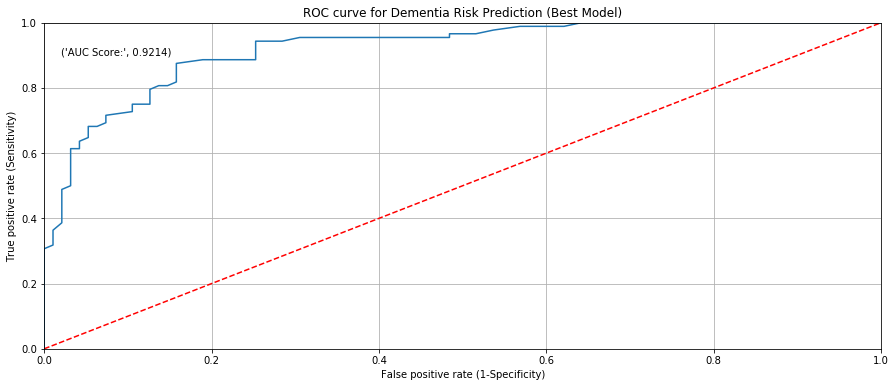

In [126]:
fpr, tpr, thresholds = roc_curve(y_np_test, AB_tuned.predict_proba(X_np_test)[:,1])
plt.figure(figsize=(15,6))
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Dementia Risk Prediction (Best Model)', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 10)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 10)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_np_test, AB_tuned.predict_proba(X_np_test)[:,1]),4)))
                               
plt.grid(True)

In [99]:
#Identify the best cut off value for the model

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

We'll use the Youden's Index method for determing the optimal cut off probability

In [100]:
#create the required dataframe
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

#calculate the difference between TPR and FPR for each threshold
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

#sort the values
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

TPR       FPR  Threshold  Difference
0  0.875000  0.157895       0.41    0.717105
1  0.886364  0.189474       0.40    0.696890
2  0.852273  0.157895       0.43    0.694378
3  0.943182  0.252632       0.33    0.690550
4  0.931818  0.252632       0.34    0.679187